# Covid-19-Trend-Predictor

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
# data
df = pd.read_csv('../Timeseries-Data/timeseries_data.csv')
columns_to_keep = ['Date','Index','Location','Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df = df.astype({"Population_Density":float ,"Lockdown": float,'Num_Cases':float})
df = df[columns_to_keep]
numeric_columns = ['Population_Density','Lockdown','Max_Temp','Min_Temp','Num_Cases']
df_numeric = df[numeric_columns]
df_temp = df[['Min_Temp','Max_Temp']]
final_temp = []
df_numeric.head()
print('Min', np.min(df_numeric))
print('Max', np.max(df_numeric))
dataset = df_numeric.astype('float64')
# scaling
scaler = MinMaxScaler(feature_range=(0.0, 1.0))
scaled_data = scaler.fit_transform(dataset)
temp_deno = (np.max(df['Max_Temp']) - np.min(df['Min_Temp']))
temp_num = np.min(df['Min_Temp'])
for ind in df['Index']:
    index = int(ind)
    df.at[index,'Population_Density'] = scaled_data[index][0]
    df.at[index,'Lockdown'] = scaled_data[index][1]
    df.at[index,'Min_Temp'] = (df.at[index,'Min_Temp'] - temp_num)/ temp_deno
    df.at[index,'Max_Temp'] = (df.at[index,'Max_Temp'] - temp_num)/ temp_deno
df = df.set_index("Date")
df_final = []
df_final.append(df[df.Location=='Australia'].reset_index(drop=True))
df_final.append(df[df.Location == 'India'].reset_index(drop=True))
df_final.append(df[df.Location == 'China'].reset_index(drop=True))
df_final.append(df[df.Location == 'USA'].reset_index(drop=True))
df_final.append(df[df.Location == 'Italy'].reset_index(drop=True))
df_final.append(df[df.Location == 'France'].reset_index(drop=True))
for df_temp in df_final:
    i=0
    for ind in df_temp['Index']:
        df_temp.at[i,'Index'] = i
        i+=1
    for ind in reversed(df_temp['Index']):
        i = int(ind)
        if i != 0:
            df_temp.at[i,'Num_Cases'] -= df_temp.at[i-1,'Num_Cases']
    df_temp['Num_Cases'] /= 1500
df_final[1]

Min Population_Density    7.0
Lockdown              0.0
Max_Temp              5.0
Min_Temp             -8.0
Num_Cases             0.0
dtype: float64
Max Population_Density      1202.0
Lockdown                 100.0
Max_Temp                  40.0
Min_Temp                  26.0
Num_Cases             187321.0
dtype: float64


Index Location  Population_Density  Min_Temp  Max_Temp  Lockdown  \
0       0    India                 1.0  0.479167  0.645833       0.0   
1       1    India                 1.0  0.437500  0.583333       0.0   
2       2    India                 1.0  0.416667  0.625000       0.0   
3       3    India                 1.0  0.500000  0.625000       0.0   
4       4    India                 1.0  0.458333  0.645833       0.0   
5       5    India                 1.0  0.458333  0.645833       0.0   
6       6    India                 1.0  0.479167  0.562500       0.0   
7       7    India                 1.0  0.458333  0.625000       0.0   
8       8    India                 1.0  0.458333  0.604167       0.0   
9       9    India                 1.0  0.479167  0.604167       0.0   
10     10    India                 1.0  0.458333  0.604167       0.0   
11     11    India                 1.0  0.479167  0.645833       0.0   
12     12    India                 1.0  0.479167  0.687500       0.0   
13     13    India                 1.0  0.500000  0.625000       0.0   
14     14    India                 1.0  0.458333  0.645833       0.0   
15     15    India                 1.0  0.479167  0.666667       0.0   
16     16    India                 1.0  0.458333  0.625000       0.0   
17     17    India                 1.0  0.479167  0.666667       0.0   
18     18    India                 1.0  0.500000  0.708333       0.0   
19     19    India                 1.0  0.458333  0.687500       0.0   
20     20    India                 1.0  0.479167  0.708333       0.0   
21     21    India                 1.0  0.500000  0.708333       0.0   
22     22    India                 1.0  0.520833  0.770833       0.0   
23     23    India                 1.0  0.562500  0.687500       0.0   
24     24    India                 1.0  0.520833  0.750000       0.0   
25     25    India                 1.0  0.562500  0.791667       0.0   
26     26    India                 1.0  0.583333  0.770833       0.0   
27     27    India                 1.0  0.541667  0.791667       0.0   
28     28    India                 1.0  0.520833  0.729167       0.0   
29     29    India                 1.0  0.520833  0.750000       0.0   
..    ...      ...                 ...       ...       ...       ...   
40     40    India                 1.0  0.583333  0.791667       0.0   
41     41    India                 1.0  0.625000  0.791667       0.0   
42     42    India                 1.0  0.625000  0.770833       0.0   
43     43    India                 1.0  0.562500  0.770833       0.0   
44     44    India                 1.0  0.416667  0.625000       0.0   
45     45    India                 1.0  0.479167  0.645833       0.0   
46     46    India                 1.0  0.604167  0.729167       0.0   
47     47    India                 1.0  0.562500  0.729167       0.0   
48     48    India                 1.0  0.562500  0.770833       0.0   
49     49    India                 1.0  0.541667  0.729167       0.0   
50     50    India                 1.0  0.583333  0.770833       0.0   
51     51    India                 1.0  0.625000  0.791667       0.0   
52     52    India                 1.0  0.541667  0.708333       0.0   
53     53    India                 1.0  0.541667  0.729167       0.0   
54     54    India                 1.0  0.562500  0.770833       0.0   
55     55    India                 1.0  0.645833  0.791667       0.0   
56     56    India                 1.0  0.645833  0.812500       0.0   
57     57    India                 1.0  0.625000  0.854167       0.0   
58     58    India                 1.0  0.645833  0.895833       0.0   
59     59    India                 1.0  0.687500  0.895833       0.0   
60     60    India                 1.0  0.666667  0.875000       1.0   
61     61    India                 1.0  0.687500  0.875000       1.0   
62     62    India                 1.0  0.708333  0.875000       1.0   
63     63    India                 1.0  0.68

In [3]:
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']

for i in range(len(df_final)):
    df_final[i] = df_final[i][columns_input]

In [4]:
# df_India=df_India.set_index('Date')
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
# input_data = df_India[columns_input]
# output_data = df_India['Num_Cases']
# X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.304761, random_state = 1)
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
df_India = df_final[1][columns_input]
new_df_India = series_to_supervised(df_India,7,1,True)
# new_df.drop(new_df.columns[[-2,-3,-4,-5]], axis=1, inplace=True)

df_China = series_to_supervised(df_final[2],7,1,True)
df_Australia = series_to_supervised(df_final[0],7,1,True)
df_USA= series_to_supervised(df_final[3],7,1,True)
df_Italy=series_to_supervised(df_final[4],7,1,True)
df_France=series_to_supervised(df_final[5],7,1,True)
new_df_India

var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var1(t-6)  \
7         1.0   0.479167   0.645833        0.0   0.000000        1.0   
8         1.0   0.437500   0.583333        0.0   0.000000        1.0   
9         1.0   0.416667   0.625000        0.0   0.000000        1.0   
10        1.0   0.500000   0.625000        0.0   0.000000        1.0   
11        1.0   0.458333   0.645833        0.0   0.000000        1.0   
12        1.0   0.458333   0.645833        0.0   0.000000        1.0   
13        1.0   0.479167   0.562500        0.0   0.000000        1.0   
14        1.0   0.458333   0.625000        0.0   0.000000        1.0   
15        1.0   0.458333   0.604167        0.0   0.000667        1.0   
16        1.0   0.479167   0.604167        0.0   0.000000        1.0   
17        1.0   0.458333   0.604167        0.0   0.000000        1.0   
18        1.0   0.479167   0.645833        0.0   0.000667        1.0   
19        1.0   0.479167   0.687500        0.0   0.000667        1.0   
20        1.0   0.500000   0.625000        0.0   0.000000        1.0   
21        1.0   0.458333   0.645833        0.0   0.000000        1.0   
22        1.0   0.479167   0.666667        0.0   0.000000        1.0   
23        1.0   0.458333   0.625000        0.0   0.000000        1.0   
24        1.0   0.479167   0.666667        0.0   0.000000        1.0   
25        1.0   0.500000   0.708333        0.0   0.000000        1.0   
26        1.0   0.458333   0.687500        0.0   0.000000        1.0   
27        1.0   0.479167   0.708333        0.0   0.000000        1.0   
28        1.0   0.500000   0.708333        0.0   0.000000        1.0   
29        1.0   0.520833   0.770833        0.0   0.000000        1.0   
30        1.0   0.562500   0.687500        0.0   0.000000        1.0   
31        1.0   0.520833   0.750000        0.0   0.000000        1.0   
32        1.0   0.562500   0.791667        0.0   0.000000        1.0   
33        1.0   0.583333   0.770833        0.0   0.000000        1.0   
34        1.0   0.541667   0.791667        0.0   0.000000        1.0   
35        1.0   0.520833   0.729167        0.0   0.000000        1.0   
36        1.0   0.520833   0.750000        0.0   0.000000        1.0   
..        ...        ...        ...        ...        ...        ...   
40        1.0   0.583333   0.750000        0.0   0.000000        1.0   
41        1.0   0.562500   0.770833        0.0   0.000000        1.0   
42        1.0   0.562500   0.854167        0.0   0.000000        1.0   
43        1.0   0.562500   0.833333        0.0   0.000000        1.0   
44        1.0   0.562500   0.750000        0.0   0.000000        1.0   
45        1.0   0.541667   0.812500        0.0   0.000000        1.0   
46        1.0   0.541667   0.770833        0.0   0.000000        1.0   
47        1.0   0.583333   0.791667        0.0   0.001333        1.0   
48        1.0   0.625000   0.791667        0.0   0.000000        1.0   
49        1.0   0.625000   0.770833        0.0   0.015333        1.0   
50        1.0   0.562500   0.770833        0.0   0.001333        1.0   
51        1.0   0.416667   0.625000        0.0   0.000667        1.0   
52        1.0   0.479167   0.645833        0.0   0.002000        1.0   
53        1.0   0.604167   0.729167        0.0   0.003333        1.0   
54        1.0   0.562500   0.729167        0.0   0.002667        1.0   
55        1.0   0.562500   0.770833        0.0   0.008667        1.0   
56        1.0   0.541667   0.729167        0.0   0.004000        1.0   
57        1.0   0.583333   0.770833        0.0   0.007333        1.0   
58        1.0   0.625000   0.791667        0.0   0.006000        1.0   
59        1.0   0.541667   0.708333        0.0   0.013333        1.0   
60        1.0   0.541667   0.729167        0.0   0.007333        1.0   
61        1.0   0.562500   0.770833        0.0   0.004000        1.0   
62        1.0   0.645833   0.791667        0.0   0.015333        1.0   
63        1.0   0.645833   0.812500        0

In [21]:
from numpy import concatenate
values = df_Australia.values
train = values[:,:]
test = values[15:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
batch_size=72
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_China.values
train = values[:,:]
test = values[15:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_France.values
train = values[:,:]
test = values[15:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_USA.values
train = values[:,:]
test = values[5:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_Italy.values
train = values[:,:]
test = values[10:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = new_df_India.values
train = values[:,:]
test = values[7:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                18000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 18,051
Trainable params: 18,051
Non-trainable params: 0
_________________________________________________________________
Train on 63 samples, validate on 48 samples
Epoch 1/10000
 - 0s - loss: 0.0077 - val_loss: 0.0091
Epoch 2/10000
 - 0s - loss: 0.0072 - val_loss: 0.0082
Epoch 3/10000
 - 0s - loss: 0.0066 - val_loss: 0.0074
Epoch 4/10000
 - 0s - loss: 0.0062 - val_loss: 0.0071
Epoch 5/10000
 - 0s - loss: 0.0060 - val_loss: 0.0069
Epoch 6/10000
 - 0s - loss: 0.0058 - val_loss: 0.0068
Epoch 7/10000
 - 0s - loss: 0.0056 - val_loss: 0.0068
Epoch 8/10000
 - 0s - loss: 0.0054 - val_loss: 0.0067
Epoch 9/10000
 - 0s - loss: 0.0053 -

Epoch 129/10000
 - 0s - loss: 3.7105e-04 - val_loss: 4.6054e-04
Epoch 130/10000
 - 0s - loss: 3.6771e-04 - val_loss: 4.5642e-04
Epoch 131/10000
 - 0s - loss: 3.6441e-04 - val_loss: 4.5237e-04
Epoch 132/10000
 - 0s - loss: 3.6116e-04 - val_loss: 4.4839e-04
Epoch 133/10000
 - 0s - loss: 3.5796e-04 - val_loss: 4.4446e-04
Epoch 134/10000
 - 0s - loss: 3.5483e-04 - val_loss: 4.4056e-04
Epoch 135/10000
 - 0s - loss: 3.5173e-04 - val_loss: 4.3673e-04
Epoch 136/10000
 - 0s - loss: 3.4868e-04 - val_loss: 4.3296e-04
Epoch 137/10000
 - 0s - loss: 3.4569e-04 - val_loss: 4.2921e-04
Epoch 138/10000
 - 0s - loss: 3.4273e-04 - val_loss: 4.2552e-04
Epoch 139/10000
 - 0s - loss: 3.3981e-04 - val_loss: 4.2188e-04
Epoch 140/10000
 - 0s - loss: 3.3694e-04 - val_loss: 4.1828e-04
Epoch 141/10000
 - 0s - loss: 3.3411e-04 - val_loss: 4.1471e-04
Epoch 142/10000
 - 0s - loss: 3.3132e-04 - val_loss: 4.1121e-04
Epoch 143/10000
 - 0s - loss: 3.2856e-04 - val_loss: 4.0774e-04
Epoch 144/10000
 - 0s - loss: 3.2585e-04

Epoch 258/10000
 - 0s - loss: 1.4895e-04 - val_loss: 1.7997e-04
Epoch 259/10000
 - 0s - loss: 1.4820e-04 - val_loss: 1.7952e-04
Epoch 260/10000
 - 0s - loss: 1.4744e-04 - val_loss: 1.7798e-04
Epoch 261/10000
 - 0s - loss: 1.4664e-04 - val_loss: 1.7750e-04
Epoch 262/10000
 - 0s - loss: 1.4581e-04 - val_loss: 1.7597e-04
Epoch 263/10000
 - 0s - loss: 1.4497e-04 - val_loss: 1.7538e-04
Epoch 264/10000
 - 0s - loss: 1.4412e-04 - val_loss: 1.7399e-04
Epoch 265/10000
 - 0s - loss: 1.4328e-04 - val_loss: 1.7329e-04
Epoch 266/10000
 - 0s - loss: 1.4246e-04 - val_loss: 1.7209e-04
Epoch 267/10000
 - 0s - loss: 1.4166e-04 - val_loss: 1.7129e-04
Epoch 268/10000
 - 0s - loss: 1.4088e-04 - val_loss: 1.7027e-04
Epoch 269/10000
 - 0s - loss: 1.4012e-04 - val_loss: 1.6937e-04
Epoch 270/10000
 - 0s - loss: 1.3938e-04 - val_loss: 1.6850e-04
Epoch 271/10000
 - 0s - loss: 1.3864e-04 - val_loss: 1.6753e-04
Epoch 272/10000
 - 0s - loss: 1.3792e-04 - val_loss: 1.6678e-04
Epoch 273/10000
 - 0s - loss: 1.3721e-04

Epoch 387/10000
 - 0s - loss: 8.9574e-05 - val_loss: 1.0792e-04
Epoch 388/10000
 - 0s - loss: 8.9378e-05 - val_loss: 1.0800e-04
Epoch 389/10000
 - 0s - loss: 8.9194e-05 - val_loss: 1.0738e-04
Epoch 390/10000
 - 0s - loss: 8.9026e-05 - val_loss: 1.0765e-04
Epoch 391/10000
 - 0s - loss: 8.8882e-05 - val_loss: 1.0692e-04
Epoch 392/10000
 - 0s - loss: 8.8774e-05 - val_loss: 1.0747e-04
Epoch 393/10000
 - 0s - loss: 8.8723e-05 - val_loss: 1.0663e-04
Epoch 394/10000
 - 0s - loss: 8.8760e-05 - val_loss: 1.0769e-04
Epoch 395/10000
 - 0s - loss: 8.8931e-05 - val_loss: 1.0678e-04
Epoch 396/10000
 - 0s - loss: 8.9309e-05 - val_loss: 1.0879e-04
Epoch 397/10000
 - 0s - loss: 8.9988e-05 - val_loss: 1.0793e-04
Epoch 398/10000
 - 0s - loss: 9.1050e-05 - val_loss: 1.1127e-04
Epoch 399/10000
 - 0s - loss: 9.2464e-05 - val_loss: 1.1011e-04
Epoch 400/10000
 - 0s - loss: 9.3950e-05 - val_loss: 1.1349e-04
Epoch 401/10000
 - 0s - loss: 9.4769e-05 - val_loss: 1.1003e-04
Epoch 402/10000
 - 0s - loss: 9.4048e-05

Epoch 516/10000
 - 0s - loss: 7.2234e-05 - val_loss: 8.6656e-05
Epoch 517/10000
 - 0s - loss: 7.2167e-05 - val_loss: 8.6692e-05
Epoch 518/10000
 - 0s - loss: 7.2114e-05 - val_loss: 8.6451e-05
Epoch 519/10000
 - 0s - loss: 7.2065e-05 - val_loss: 8.6592e-05
Epoch 520/10000
 - 0s - loss: 7.2014e-05 - val_loss: 8.6271e-05
Epoch 521/10000
 - 0s - loss: 7.1956e-05 - val_loss: 8.6443e-05
Epoch 522/10000
 - 0s - loss: 7.1890e-05 - val_loss: 8.6088e-05
Epoch 523/10000
 - 0s - loss: 7.1816e-05 - val_loss: 8.6249e-05
Epoch 524/10000
 - 0s - loss: 7.1738e-05 - val_loss: 8.5901e-05
Epoch 525/10000
 - 0s - loss: 7.1656e-05 - val_loss: 8.6034e-05
Epoch 526/10000
 - 0s - loss: 7.1573e-05 - val_loss: 8.5716e-05
Epoch 527/10000
 - 0s - loss: 7.1490e-05 - val_loss: 8.5819e-05
Epoch 528/10000
 - 0s - loss: 7.1410e-05 - val_loss: 8.5536e-05
Epoch 529/10000
 - 0s - loss: 7.1331e-05 - val_loss: 8.5616e-05
Epoch 530/10000
 - 0s - loss: 7.1255e-05 - val_loss: 8.5360e-05
Epoch 531/10000
 - 0s - loss: 7.1181e-05

Epoch 645/10000
 - 0s - loss: 6.5361e-05 - val_loss: 7.8132e-05
Epoch 646/10000
 - 0s - loss: 6.5323e-05 - val_loss: 7.7974e-05
Epoch 647/10000
 - 0s - loss: 6.5287e-05 - val_loss: 7.8053e-05
Epoch 648/10000
 - 0s - loss: 6.5253e-05 - val_loss: 7.7871e-05
Epoch 649/10000
 - 0s - loss: 6.5223e-05 - val_loss: 7.7997e-05
Epoch 650/10000
 - 0s - loss: 6.5198e-05 - val_loss: 7.7776e-05
Epoch 651/10000
 - 0s - loss: 6.5180e-05 - val_loss: 7.7985e-05
Epoch 652/10000
 - 0s - loss: 6.5175e-05 - val_loss: 7.7712e-05
Epoch 653/10000
 - 0s - loss: 6.5190e-05 - val_loss: 7.8072e-05
Epoch 654/10000
 - 0s - loss: 6.5235e-05 - val_loss: 7.7738e-05
Epoch 655/10000
 - 0s - loss: 6.5329e-05 - val_loss: 7.8390e-05
Epoch 656/10000
 - 0s - loss: 6.5504e-05 - val_loss: 7.8033e-05
Epoch 657/10000
 - 0s - loss: 6.5814e-05 - val_loss: 7.9298e-05
Epoch 658/10000
 - 0s - loss: 6.6344e-05 - val_loss: 7.9102e-05
Epoch 659/10000
 - 0s - loss: 6.7232e-05 - val_loss: 8.1681e-05
Epoch 660/10000
 - 0s - loss: 6.8674e-05

Epoch 774/10000
 - 0s - loss: 6.0787e-05 - val_loss: 7.2454e-05
Epoch 775/10000
 - 0s - loss: 6.0754e-05 - val_loss: 7.2442e-05
Epoch 776/10000
 - 0s - loss: 6.0722e-05 - val_loss: 7.2369e-05
Epoch 777/10000
 - 0s - loss: 6.0690e-05 - val_loss: 7.2371e-05
Epoch 778/10000
 - 0s - loss: 6.0658e-05 - val_loss: 7.2283e-05
Epoch 779/10000
 - 0s - loss: 6.0628e-05 - val_loss: 7.2310e-05
Epoch 780/10000
 - 0s - loss: 6.0599e-05 - val_loss: 7.2196e-05
Epoch 781/10000
 - 0s - loss: 6.0573e-05 - val_loss: 7.2269e-05
Epoch 782/10000
 - 0s - loss: 6.0551e-05 - val_loss: 7.2115e-05
Epoch 783/10000
 - 0s - loss: 6.0538e-05 - val_loss: 7.2277e-05
Epoch 784/10000
 - 0s - loss: 6.0539e-05 - val_loss: 7.2069e-05
Epoch 785/10000
 - 0s - loss: 6.0565e-05 - val_loss: 7.2419e-05
Epoch 786/10000
 - 0s - loss: 6.0637e-05 - val_loss: 7.2164e-05
Epoch 787/10000
 - 0s - loss: 6.0792e-05 - val_loss: 7.2951e-05
Epoch 788/10000
 - 0s - loss: 6.1096e-05 - val_loss: 7.2789e-05
Epoch 789/10000
 - 0s - loss: 6.1677e-05

Epoch 903/10000
 - 0s - loss: 5.6928e-05 - val_loss: 6.7858e-05
Epoch 904/10000
 - 0s - loss: 5.6899e-05 - val_loss: 6.7807e-05
Epoch 905/10000
 - 0s - loss: 5.6869e-05 - val_loss: 6.7783e-05
Epoch 906/10000
 - 0s - loss: 5.6839e-05 - val_loss: 6.7741e-05
Epoch 907/10000
 - 0s - loss: 5.6810e-05 - val_loss: 6.7707e-05
Epoch 908/10000
 - 0s - loss: 5.6780e-05 - val_loss: 6.7676e-05
Epoch 909/10000
 - 0s - loss: 5.6751e-05 - val_loss: 6.7632e-05
Epoch 910/10000
 - 0s - loss: 5.6722e-05 - val_loss: 6.7608e-05
Epoch 911/10000
 - 0s - loss: 5.6693e-05 - val_loss: 6.7561e-05
Epoch 912/10000
 - 0s - loss: 5.6663e-05 - val_loss: 6.7537e-05
Epoch 913/10000
 - 0s - loss: 5.6634e-05 - val_loss: 6.7493e-05
Epoch 914/10000
 - 0s - loss: 5.6604e-05 - val_loss: 6.7463e-05
Epoch 915/10000
 - 0s - loss: 5.6575e-05 - val_loss: 6.7426e-05
Epoch 916/10000
 - 0s - loss: 5.6545e-05 - val_loss: 6.7389e-05
Epoch 917/10000
 - 0s - loss: 5.6516e-05 - val_loss: 6.7359e-05
Epoch 918/10000
 - 0s - loss: 5.6487e-05

Epoch 1031/10000
 - 0s - loss: 5.3337e-05 - val_loss: 6.3729e-05
Epoch 1032/10000
 - 0s - loss: 5.3578e-05 - val_loss: 6.4257e-05
Epoch 1033/10000
 - 0s - loss: 5.3735e-05 - val_loss: 6.3672e-05
Epoch 1034/10000
 - 0s - loss: 5.3537e-05 - val_loss: 6.3641e-05
Epoch 1035/10000
 - 0s - loss: 5.3254e-05 - val_loss: 6.3601e-05
Epoch 1036/10000
 - 0s - loss: 5.3223e-05 - val_loss: 6.3528e-05
Epoch 1037/10000
 - 0s - loss: 5.3377e-05 - val_loss: 6.3875e-05
Epoch 1038/10000
 - 0s - loss: 5.3417e-05 - val_loss: 6.3426e-05
Epoch 1039/10000
 - 0s - loss: 5.3255e-05 - val_loss: 6.3422e-05
Epoch 1040/10000
 - 0s - loss: 5.3091e-05 - val_loss: 6.3441e-05
Epoch 1041/10000
 - 0s - loss: 5.3090e-05 - val_loss: 6.3328e-05
Epoch 1042/10000
 - 0s - loss: 5.3173e-05 - val_loss: 6.3568e-05
Epoch 1043/10000
 - 0s - loss: 5.3169e-05 - val_loss: 6.3234e-05
Epoch 1044/10000
 - 0s - loss: 5.3053e-05 - val_loss: 6.3241e-05
Epoch 1045/10000
 - 0s - loss: 5.2951e-05 - val_loss: 6.3260e-05
Epoch 1046/10000
 - 0s - 

Epoch 1158/10000
 - 0s - loss: 4.9930e-05 - val_loss: 5.9599e-05
Epoch 1159/10000
 - 0s - loss: 4.9903e-05 - val_loss: 5.9567e-05
Epoch 1160/10000
 - 0s - loss: 4.9877e-05 - val_loss: 5.9537e-05
Epoch 1161/10000
 - 0s - loss: 4.9850e-05 - val_loss: 5.9504e-05
Epoch 1162/10000
 - 0s - loss: 4.9823e-05 - val_loss: 5.9474e-05
Epoch 1163/10000
 - 0s - loss: 4.9796e-05 - val_loss: 5.9441e-05
Epoch 1164/10000
 - 0s - loss: 4.9770e-05 - val_loss: 5.9411e-05
Epoch 1165/10000
 - 0s - loss: 4.9743e-05 - val_loss: 5.9378e-05
Epoch 1166/10000
 - 0s - loss: 4.9716e-05 - val_loss: 5.9349e-05
Epoch 1167/10000
 - 0s - loss: 4.9690e-05 - val_loss: 5.9316e-05
Epoch 1168/10000
 - 0s - loss: 4.9663e-05 - val_loss: 5.9286e-05
Epoch 1169/10000
 - 0s - loss: 4.9636e-05 - val_loss: 5.9253e-05
Epoch 1170/10000
 - 0s - loss: 4.9610e-05 - val_loss: 5.9224e-05
Epoch 1171/10000
 - 0s - loss: 4.9583e-05 - val_loss: 5.9190e-05
Epoch 1172/10000
 - 0s - loss: 4.9556e-05 - val_loss: 5.9161e-05
Epoch 1173/10000
 - 0s - 

Epoch 1285/10000
 - 0s - loss: 4.6802e-05 - val_loss: 5.6012e-05
Epoch 1286/10000
 - 0s - loss: 4.6781e-05 - val_loss: 5.5922e-05
Epoch 1287/10000
 - 0s - loss: 4.6753e-05 - val_loss: 5.5928e-05
Epoch 1288/10000
 - 0s - loss: 4.6723e-05 - val_loss: 5.5886e-05
Epoch 1289/10000
 - 0s - loss: 4.6697e-05 - val_loss: 5.5841e-05
Epoch 1290/10000
 - 0s - loss: 4.6676e-05 - val_loss: 5.5855e-05
Epoch 1291/10000
 - 0s - loss: 4.6655e-05 - val_loss: 5.5779e-05
Epoch 1292/10000
 - 0s - loss: 4.6630e-05 - val_loss: 5.5785e-05
Epoch 1293/10000
 - 0s - loss: 4.6603e-05 - val_loss: 5.5735e-05
Epoch 1294/10000
 - 0s - loss: 4.6576e-05 - val_loss: 5.5703e-05
Epoch 1295/10000
 - 0s - loss: 4.6552e-05 - val_loss: 5.5698e-05
Epoch 1296/10000
 - 0s - loss: 4.6530e-05 - val_loss: 5.5637e-05
Epoch 1297/10000
 - 0s - loss: 4.6507e-05 - val_loss: 5.5641e-05
Epoch 1298/10000
 - 0s - loss: 4.6482e-05 - val_loss: 5.5586e-05
Epoch 1299/10000
 - 0s - loss: 4.6456e-05 - val_loss: 5.5565e-05
Epoch 1300/10000
 - 0s - 

Epoch 1412/10000
 - 0s - loss: 4.3721e-05 - val_loss: 5.2349e-05
Epoch 1413/10000
 - 0s - loss: 4.3697e-05 - val_loss: 5.2313e-05
Epoch 1414/10000
 - 0s - loss: 4.3673e-05 - val_loss: 5.2295e-05
Epoch 1415/10000
 - 0s - loss: 4.3649e-05 - val_loss: 5.2255e-05
Epoch 1416/10000
 - 0s - loss: 4.3625e-05 - val_loss: 5.2242e-05
Epoch 1417/10000
 - 0s - loss: 4.3601e-05 - val_loss: 5.2195e-05
Epoch 1418/10000
 - 0s - loss: 4.3577e-05 - val_loss: 5.2191e-05
Epoch 1419/10000
 - 0s - loss: 4.3554e-05 - val_loss: 5.2134e-05
Epoch 1420/10000
 - 0s - loss: 4.3531e-05 - val_loss: 5.2147e-05
Epoch 1421/10000
 - 0s - loss: 4.3509e-05 - val_loss: 5.2071e-05
Epoch 1422/10000
 - 0s - loss: 4.3489e-05 - val_loss: 5.2115e-05
Epoch 1423/10000
 - 0s - loss: 4.3471e-05 - val_loss: 5.2011e-05
Epoch 1424/10000
 - 0s - loss: 4.3458e-05 - val_loss: 5.2114e-05
Epoch 1425/10000
 - 0s - loss: 4.3454e-05 - val_loss: 5.1970e-05
Epoch 1426/10000
 - 0s - loss: 4.3465e-05 - val_loss: 5.2199e-05
Epoch 1427/10000
 - 0s - 

 - 0s - loss: 4.0997e-05 - val_loss: 4.9181e-05
Epoch 1539/10000
 - 0s - loss: 4.0976e-05 - val_loss: 4.9177e-05
Epoch 1540/10000
 - 0s - loss: 4.0953e-05 - val_loss: 4.9137e-05
Epoch 1541/10000
 - 0s - loss: 4.0931e-05 - val_loss: 4.9112e-05
Epoch 1542/10000
 - 0s - loss: 4.0909e-05 - val_loss: 4.9097e-05
Epoch 1543/10000
 - 0s - loss: 4.0888e-05 - val_loss: 4.9054e-05
Epoch 1544/10000
 - 0s - loss: 4.0867e-05 - val_loss: 4.9047e-05
Epoch 1545/10000
 - 0s - loss: 4.0845e-05 - val_loss: 4.9006e-05
Epoch 1546/10000
 - 0s - loss: 4.0823e-05 - val_loss: 4.8987e-05
Epoch 1547/10000
 - 0s - loss: 4.0801e-05 - val_loss: 4.8963e-05
Epoch 1548/10000
 - 0s - loss: 4.0779e-05 - val_loss: 4.8928e-05
Epoch 1549/10000
 - 0s - loss: 4.0758e-05 - val_loss: 4.8916e-05
Epoch 1550/10000
 - 0s - loss: 4.0737e-05 - val_loss: 4.8877e-05
Epoch 1551/10000
 - 0s - loss: 4.0715e-05 - val_loss: 4.8861e-05
Epoch 1552/10000
 - 0s - loss: 4.0693e-05 - val_loss: 4.8831e-05
Epoch 1553/10000
 - 0s - loss: 4.0671e-05 

Epoch 1665/10000
 - 0s - loss: 3.8255e-05 - val_loss: 4.5953e-05
Epoch 1666/10000
 - 0s - loss: 3.8233e-05 - val_loss: 4.5930e-05
Epoch 1667/10000
 - 0s - loss: 3.8212e-05 - val_loss: 4.5902e-05
Epoch 1668/10000
 - 0s - loss: 3.8190e-05 - val_loss: 4.5881e-05
Epoch 1669/10000
 - 0s - loss: 3.8169e-05 - val_loss: 4.5851e-05
Epoch 1670/10000
 - 0s - loss: 3.8148e-05 - val_loss: 4.5831e-05
Epoch 1671/10000
 - 0s - loss: 3.8126e-05 - val_loss: 4.5799e-05
Epoch 1672/10000
 - 0s - loss: 3.8105e-05 - val_loss: 4.5783e-05
Epoch 1673/10000
 - 0s - loss: 3.8083e-05 - val_loss: 4.5746e-05
Epoch 1674/10000
 - 0s - loss: 3.8062e-05 - val_loss: 4.5737e-05
Epoch 1675/10000
 - 0s - loss: 3.8041e-05 - val_loss: 4.5692e-05
Epoch 1676/10000
 - 0s - loss: 3.8020e-05 - val_loss: 4.5695e-05
Epoch 1677/10000
 - 0s - loss: 3.8000e-05 - val_loss: 4.5636e-05
Epoch 1678/10000
 - 0s - loss: 3.7981e-05 - val_loss: 4.5661e-05
Epoch 1679/10000
 - 0s - loss: 3.7963e-05 - val_loss: 4.5580e-05
Epoch 1680/10000
 - 0s - 

Epoch 1792/10000
 - 0s - loss: 3.5874e-05 - val_loss: 4.3204e-05
Epoch 1793/10000
 - 0s - loss: 3.5857e-05 - val_loss: 4.3155e-05
Epoch 1794/10000
 - 0s - loss: 3.5838e-05 - val_loss: 4.3154e-05
Epoch 1795/10000
 - 0s - loss: 3.5818e-05 - val_loss: 4.3118e-05
Epoch 1796/10000
 - 0s - loss: 3.5798e-05 - val_loss: 4.3093e-05
Epoch 1797/10000
 - 0s - loss: 3.5780e-05 - val_loss: 4.3086e-05
Epoch 1798/10000
 - 0s - loss: 3.5762e-05 - val_loss: 4.3043e-05
Epoch 1799/10000
 - 0s - loss: 3.5743e-05 - val_loss: 4.3038e-05
Epoch 1800/10000
 - 0s - loss: 3.5724e-05 - val_loss: 4.3005e-05
Epoch 1801/10000
 - 0s - loss: 3.5704e-05 - val_loss: 4.2981e-05
Epoch 1802/10000
 - 0s - loss: 3.5686e-05 - val_loss: 4.2970e-05
Epoch 1803/10000
 - 0s - loss: 3.5668e-05 - val_loss: 4.2932e-05
Epoch 1804/10000
 - 0s - loss: 3.5649e-05 - val_loss: 4.2923e-05
Epoch 1805/10000
 - 0s - loss: 3.5630e-05 - val_loss: 4.2891e-05
Epoch 1806/10000
 - 0s - loss: 3.5611e-05 - val_loss: 4.2869e-05
Epoch 1807/10000
 - 0s - 

Epoch 1919/10000
 - 0s - loss: 3.3507e-05 - val_loss: 4.0359e-05
Epoch 1920/10000
 - 0s - loss: 3.3489e-05 - val_loss: 4.0337e-05
Epoch 1921/10000
 - 0s - loss: 3.3470e-05 - val_loss: 4.0315e-05
Epoch 1922/10000
 - 0s - loss: 3.3452e-05 - val_loss: 4.0293e-05
Epoch 1923/10000
 - 0s - loss: 3.3433e-05 - val_loss: 4.0271e-05
Epoch 1924/10000
 - 0s - loss: 3.3415e-05 - val_loss: 4.0249e-05
Epoch 1925/10000
 - 0s - loss: 3.3397e-05 - val_loss: 4.0227e-05
Epoch 1926/10000
 - 0s - loss: 3.3378e-05 - val_loss: 4.0205e-05
Epoch 1927/10000
 - 0s - loss: 3.3360e-05 - val_loss: 4.0183e-05
Epoch 1928/10000
 - 0s - loss: 3.3341e-05 - val_loss: 4.0161e-05
Epoch 1929/10000
 - 0s - loss: 3.3323e-05 - val_loss: 4.0139e-05
Epoch 1930/10000
 - 0s - loss: 3.3304e-05 - val_loss: 4.0117e-05
Epoch 1931/10000
 - 0s - loss: 3.3286e-05 - val_loss: 4.0095e-05
Epoch 1932/10000
 - 0s - loss: 3.3267e-05 - val_loss: 4.0073e-05
Epoch 1933/10000
 - 0s - loss: 3.3249e-05 - val_loss: 4.0052e-05
Epoch 1934/10000
 - 0s - 

Epoch 2046/10000
 - 0s - loss: 3.1470e-05 - val_loss: 3.8060e-05
Epoch 2047/10000
 - 0s - loss: 3.1473e-05 - val_loss: 3.7900e-05
Epoch 2048/10000
 - 0s - loss: 3.1425e-05 - val_loss: 3.7906e-05
Epoch 2049/10000
 - 0s - loss: 3.1377e-05 - val_loss: 3.7911e-05
Epoch 2050/10000
 - 0s - loss: 3.1370e-05 - val_loss: 3.7841e-05
Epoch 2051/10000
 - 0s - loss: 3.1380e-05 - val_loss: 3.7917e-05
Epoch 2052/10000
 - 0s - loss: 3.1364e-05 - val_loss: 3.7798e-05
Epoch 2053/10000
 - 0s - loss: 3.1324e-05 - val_loss: 3.7793e-05
Epoch 2054/10000
 - 0s - loss: 3.1295e-05 - val_loss: 3.7813e-05
Epoch 2055/10000
 - 0s - loss: 3.1292e-05 - val_loss: 3.7738e-05
Epoch 2056/10000
 - 0s - loss: 3.1289e-05 - val_loss: 3.7787e-05
Epoch 2057/10000
 - 0s - loss: 3.1267e-05 - val_loss: 3.7702e-05
Epoch 2058/10000
 - 0s - loss: 3.1236e-05 - val_loss: 3.7688e-05
Epoch 2059/10000
 - 0s - loss: 3.1217e-05 - val_loss: 3.7709e-05
Epoch 2060/10000
 - 0s - loss: 3.1210e-05 - val_loss: 3.7638e-05
Epoch 2061/10000
 - 0s - 

Epoch 2172/10000
 - 0s - loss: 2.9444e-05 - val_loss: 3.5509e-05
Epoch 2173/10000
 - 0s - loss: 2.9429e-05 - val_loss: 3.5491e-05
Epoch 2174/10000
 - 0s - loss: 2.9413e-05 - val_loss: 3.5472e-05
Epoch 2175/10000
 - 0s - loss: 2.9398e-05 - val_loss: 3.5453e-05
Epoch 2176/10000
 - 0s - loss: 2.9382e-05 - val_loss: 3.5434e-05
Epoch 2177/10000
 - 0s - loss: 2.9367e-05 - val_loss: 3.5416e-05
Epoch 2178/10000
 - 0s - loss: 2.9352e-05 - val_loss: 3.5397e-05
Epoch 2179/10000
 - 0s - loss: 2.9336e-05 - val_loss: 3.5378e-05
Epoch 2180/10000
 - 0s - loss: 2.9321e-05 - val_loss: 3.5360e-05
Epoch 2181/10000
 - 0s - loss: 2.9305e-05 - val_loss: 3.5341e-05
Epoch 2182/10000
 - 0s - loss: 2.9290e-05 - val_loss: 3.5322e-05
Epoch 2183/10000
 - 0s - loss: 2.9274e-05 - val_loss: 3.5303e-05
Epoch 2184/10000
 - 0s - loss: 2.9259e-05 - val_loss: 3.5285e-05
Epoch 2185/10000
 - 0s - loss: 2.9244e-05 - val_loss: 3.5266e-05
Epoch 2186/10000
 - 0s - loss: 2.9228e-05 - val_loss: 3.5247e-05
Epoch 2187/10000
 - 0s - 

Epoch 2299/10000
 - 0s - loss: 2.8123e-05 - val_loss: 3.3760e-05
Epoch 2300/10000
 - 0s - loss: 2.7859e-05 - val_loss: 3.4572e-05
Epoch 2301/10000
 - 0s - loss: 2.9144e-05 - val_loss: 3.5328e-05
Epoch 2302/10000
 - 0s - loss: 2.9319e-05 - val_loss: 3.3719e-05
Epoch 2303/10000
 - 0s - loss: 2.8117e-05 - val_loss: 3.3390e-05
Epoch 2304/10000
 - 0s - loss: 2.7645e-05 - val_loss: 3.4354e-05
Epoch 2305/10000
 - 0s - loss: 2.8403e-05 - val_loss: 3.4218e-05
Epoch 2306/10000
 - 0s - loss: 2.8754e-05 - val_loss: 3.3976e-05
Epoch 2307/10000
 - 0s - loss: 2.8064e-05 - val_loss: 3.3329e-05
Epoch 2308/10000
 - 0s - loss: 2.7557e-05 - val_loss: 3.3535e-05
Epoch 2309/10000
 - 0s - loss: 2.7931e-05 - val_loss: 3.4227e-05
Epoch 2310/10000
 - 0s - loss: 2.8303e-05 - val_loss: 3.3551e-05
Epoch 2311/10000
 - 0s - loss: 2.7972e-05 - val_loss: 3.3320e-05
Epoch 2312/10000
 - 0s - loss: 2.7529e-05 - val_loss: 3.3474e-05
Epoch 2313/10000
 - 0s - loss: 2.7642e-05 - val_loss: 3.3513e-05
Epoch 2314/10000
 - 0s - 

Epoch 2426/10000
 - 0s - loss: 2.6049e-05 - val_loss: 3.1389e-05
Epoch 2427/10000
 - 0s - loss: 2.6037e-05 - val_loss: 3.1373e-05
Epoch 2428/10000
 - 0s - loss: 2.6024e-05 - val_loss: 3.1358e-05
Epoch 2429/10000
 - 0s - loss: 2.6012e-05 - val_loss: 3.1342e-05
Epoch 2430/10000
 - 0s - loss: 2.5999e-05 - val_loss: 3.1326e-05
Epoch 2431/10000
 - 0s - loss: 2.5987e-05 - val_loss: 3.1311e-05
Epoch 2432/10000
 - 0s - loss: 2.5974e-05 - val_loss: 3.1295e-05
Epoch 2433/10000
 - 0s - loss: 2.5962e-05 - val_loss: 3.1280e-05
Epoch 2434/10000
 - 0s - loss: 2.5950e-05 - val_loss: 3.1264e-05
Epoch 2435/10000
 - 0s - loss: 2.5937e-05 - val_loss: 3.1249e-05
Epoch 2436/10000
 - 0s - loss: 2.5925e-05 - val_loss: 3.1234e-05
Epoch 2437/10000
 - 0s - loss: 2.5912e-05 - val_loss: 3.1218e-05
Epoch 2438/10000
 - 0s - loss: 2.5900e-05 - val_loss: 3.1203e-05
Epoch 2439/10000
 - 0s - loss: 2.5887e-05 - val_loss: 3.1187e-05
Epoch 2440/10000
 - 0s - loss: 2.5875e-05 - val_loss: 3.1172e-05
Epoch 2441/10000
 - 0s - 

Epoch 2553/10000
 - 0s - loss: 2.4526e-05 - val_loss: 2.9549e-05
Epoch 2554/10000
 - 0s - loss: 2.4531e-05 - val_loss: 2.9465e-05
Epoch 2555/10000
 - 0s - loss: 2.4549e-05 - val_loss: 2.9630e-05
Epoch 2556/10000
 - 0s - loss: 2.4591e-05 - val_loss: 2.9534e-05
Epoch 2557/10000
 - 0s - loss: 2.4675e-05 - val_loss: 2.9913e-05
Epoch 2558/10000
 - 0s - loss: 2.4838e-05 - val_loss: 2.9889e-05
Epoch 2559/10000
 - 0s - loss: 2.5144e-05 - val_loss: 3.0838e-05
Epoch 2560/10000
 - 0s - loss: 2.5716e-05 - val_loss: 3.1273e-05
Epoch 2561/10000
 - 0s - loss: 2.6778e-05 - val_loss: 3.3873e-05
Epoch 2562/10000
 - 0s - loss: 2.8740e-05 - val_loss: 3.6234e-05
Epoch 2563/10000
 - 0s - loss: 3.2342e-05 - val_loss: 4.3692e-05
Epoch 2564/10000
 - 0s - loss: 3.8811e-05 - val_loss: 5.2382e-05
Epoch 2565/10000
 - 0s - loss: 4.9996e-05 - val_loss: 7.1444e-05
Epoch 2566/10000
 - 0s - loss: 6.7717e-05 - val_loss: 9.0939e-05
Epoch 2567/10000
 - 0s - loss: 9.1559e-05 - val_loss: 1.1476e-04
Epoch 2568/10000
 - 0s - 

Epoch 2680/10000
 - 0s - loss: 2.3277e-05 - val_loss: 2.7959e-05
Epoch 2681/10000
 - 0s - loss: 2.3267e-05 - val_loss: 2.7956e-05
Epoch 2682/10000
 - 0s - loss: 2.3258e-05 - val_loss: 2.7934e-05
Epoch 2683/10000
 - 0s - loss: 2.3247e-05 - val_loss: 2.7926e-05
Epoch 2684/10000
 - 0s - loss: 2.3237e-05 - val_loss: 2.7913e-05
Epoch 2685/10000
 - 0s - loss: 2.3227e-05 - val_loss: 2.7896e-05
Epoch 2686/10000
 - 0s - loss: 2.3218e-05 - val_loss: 2.7891e-05
Epoch 2687/10000
 - 0s - loss: 2.3208e-05 - val_loss: 2.7871e-05
Epoch 2688/10000
 - 0s - loss: 2.3198e-05 - val_loss: 2.7863e-05
Epoch 2689/10000
 - 0s - loss: 2.3188e-05 - val_loss: 2.7848e-05
Epoch 2690/10000
 - 0s - loss: 2.3178e-05 - val_loss: 2.7834e-05
Epoch 2691/10000
 - 0s - loss: 2.3168e-05 - val_loss: 2.7826e-05
Epoch 2692/10000
 - 0s - loss: 2.3159e-05 - val_loss: 2.7808e-05
Epoch 2693/10000
 - 0s - loss: 2.3149e-05 - val_loss: 2.7800e-05
Epoch 2694/10000
 - 0s - loss: 2.3139e-05 - val_loss: 2.7784e-05
Epoch 2695/10000
 - 0s - 

Epoch 2807/10000
 - 0s - loss: 2.2062e-05 - val_loss: 2.6415e-05
Epoch 2808/10000
 - 0s - loss: 2.2053e-05 - val_loss: 2.6403e-05
Epoch 2809/10000
 - 0s - loss: 2.2043e-05 - val_loss: 2.6391e-05
Epoch 2810/10000
 - 0s - loss: 2.2034e-05 - val_loss: 2.6380e-05
Epoch 2811/10000
 - 0s - loss: 2.2025e-05 - val_loss: 2.6368e-05
Epoch 2812/10000
 - 0s - loss: 2.2016e-05 - val_loss: 2.6356e-05
Epoch 2813/10000
 - 0s - loss: 2.2007e-05 - val_loss: 2.6345e-05
Epoch 2814/10000
 - 0s - loss: 2.1997e-05 - val_loss: 2.6333e-05
Epoch 2815/10000
 - 0s - loss: 2.1988e-05 - val_loss: 2.6321e-05
Epoch 2816/10000
 - 0s - loss: 2.1979e-05 - val_loss: 2.6309e-05
Epoch 2817/10000
 - 0s - loss: 2.1970e-05 - val_loss: 2.6298e-05
Epoch 2818/10000
 - 0s - loss: 2.1961e-05 - val_loss: 2.6286e-05
Epoch 2819/10000
 - 0s - loss: 2.1951e-05 - val_loss: 2.6275e-05
Epoch 2820/10000
 - 0s - loss: 2.1942e-05 - val_loss: 2.6263e-05
Epoch 2821/10000
 - 0s - loss: 2.1933e-05 - val_loss: 2.6251e-05
Epoch 2822/10000
 - 0s - 

Epoch 2934/10000
 - 0s - loss: 2.1076e-05 - val_loss: 2.5233e-05
Epoch 2935/10000
 - 0s - loss: 2.1071e-05 - val_loss: 2.5199e-05
Epoch 2936/10000
 - 0s - loss: 2.1100e-05 - val_loss: 2.5281e-05
Epoch 2937/10000
 - 0s - loss: 2.1102e-05 - val_loss: 2.5169e-05
Epoch 2938/10000
 - 0s - loss: 2.1064e-05 - val_loss: 2.5169e-05
Epoch 2939/10000
 - 0s - loss: 2.1032e-05 - val_loss: 2.5182e-05
Epoch 2940/10000
 - 0s - loss: 2.1034e-05 - val_loss: 2.5139e-05
Epoch 2941/10000
 - 0s - loss: 2.1048e-05 - val_loss: 2.5194e-05
Epoch 2942/10000
 - 0s - loss: 2.1039e-05 - val_loss: 2.5112e-05
Epoch 2943/10000
 - 0s - loss: 2.1011e-05 - val_loss: 2.5110e-05
Epoch 2944/10000
 - 0s - loss: 2.0993e-05 - val_loss: 2.5126e-05
Epoch 2945/10000
 - 0s - loss: 2.0994e-05 - val_loss: 2.5081e-05
Epoch 2946/10000
 - 0s - loss: 2.0998e-05 - val_loss: 2.5119e-05
Epoch 2947/10000
 - 0s - loss: 2.0987e-05 - val_loss: 2.5059e-05
Epoch 2948/10000
 - 0s - loss: 2.0967e-05 - val_loss: 2.5055e-05
Epoch 2949/10000
 - 0s - 

Epoch 3061/10000
 - 0s - loss: 2.0127e-05 - val_loss: 2.3955e-05
Epoch 3062/10000
 - 0s - loss: 2.0120e-05 - val_loss: 2.3946e-05
Epoch 3063/10000
 - 0s - loss: 2.0113e-05 - val_loss: 2.3937e-05
Epoch 3064/10000
 - 0s - loss: 2.0106e-05 - val_loss: 2.3927e-05
Epoch 3065/10000
 - 0s - loss: 2.0099e-05 - val_loss: 2.3918e-05
Epoch 3066/10000
 - 0s - loss: 2.0091e-05 - val_loss: 2.3909e-05
Epoch 3067/10000
 - 0s - loss: 2.0084e-05 - val_loss: 2.3900e-05
Epoch 3068/10000
 - 0s - loss: 2.0077e-05 - val_loss: 2.3891e-05
Epoch 3069/10000
 - 0s - loss: 2.0070e-05 - val_loss: 2.3881e-05
Epoch 3070/10000
 - 0s - loss: 2.0063e-05 - val_loss: 2.3872e-05
Epoch 3071/10000
 - 0s - loss: 2.0056e-05 - val_loss: 2.3863e-05
Epoch 3072/10000
 - 0s - loss: 2.0049e-05 - val_loss: 2.3854e-05
Epoch 3073/10000
 - 0s - loss: 2.0042e-05 - val_loss: 2.3845e-05
Epoch 3074/10000
 - 0s - loss: 2.0035e-05 - val_loss: 2.3835e-05
Epoch 3075/10000
 - 0s - loss: 2.0027e-05 - val_loss: 2.3826e-05
Epoch 3076/10000
 - 0s - 

Epoch 3188/10000
 - 0s - loss: 1.9374e-05 - val_loss: 2.5879e-05
Epoch 3189/10000
 - 0s - loss: 2.2685e-05 - val_loss: 3.1370e-05
Epoch 3190/10000
 - 0s - loss: 2.7591e-05 - val_loss: 2.8708e-05
Epoch 3191/10000
 - 0s - loss: 2.5790e-05 - val_loss: 2.4365e-05
Epoch 3192/10000
 - 0s - loss: 2.0541e-05 - val_loss: 2.3541e-05
Epoch 3193/10000
 - 0s - loss: 1.9752e-05 - val_loss: 2.6371e-05
Epoch 3194/10000
 - 0s - loss: 2.3221e-05 - val_loss: 2.8265e-05
Epoch 3195/10000
 - 0s - loss: 2.4445e-05 - val_loss: 2.4888e-05
Epoch 3196/10000
 - 0s - loss: 2.1565e-05 - val_loss: 2.3012e-05
Epoch 3197/10000
 - 0s - loss: 1.9295e-05 - val_loss: 2.4407e-05
Epoch 3198/10000
 - 0s - loss: 2.0587e-05 - val_loss: 2.5714e-05
Epoch 3199/10000
 - 0s - loss: 2.2499e-05 - val_loss: 2.5571e-05
Epoch 3200/10000
 - 0s - loss: 2.1740e-05 - val_loss: 2.3246e-05
Epoch 3201/10000
 - 0s - loss: 1.9696e-05 - val_loss: 2.3046e-05
Epoch 3202/10000
 - 0s - loss: 1.9449e-05 - val_loss: 2.4632e-05
Epoch 3203/10000
 - 0s - 

Epoch 3315/10000
 - 0s - loss: 1.8591e-05 - val_loss: 2.1988e-05
Epoch 3316/10000
 - 0s - loss: 1.8585e-05 - val_loss: 2.1980e-05
Epoch 3317/10000
 - 0s - loss: 1.8580e-05 - val_loss: 2.1973e-05
Epoch 3318/10000
 - 0s - loss: 1.8574e-05 - val_loss: 2.1966e-05
Epoch 3319/10000
 - 0s - loss: 1.8569e-05 - val_loss: 2.1958e-05
Epoch 3320/10000
 - 0s - loss: 1.8563e-05 - val_loss: 2.1952e-05
Epoch 3321/10000
 - 0s - loss: 1.8557e-05 - val_loss: 2.1943e-05
Epoch 3322/10000
 - 0s - loss: 1.8552e-05 - val_loss: 2.1936e-05
Epoch 3323/10000
 - 0s - loss: 1.8546e-05 - val_loss: 2.1929e-05
Epoch 3324/10000
 - 0s - loss: 1.8541e-05 - val_loss: 2.1921e-05
Epoch 3325/10000
 - 0s - loss: 1.8535e-05 - val_loss: 2.1915e-05
Epoch 3326/10000
 - 0s - loss: 1.8530e-05 - val_loss: 2.1907e-05
Epoch 3327/10000
 - 0s - loss: 1.8524e-05 - val_loss: 2.1900e-05
Epoch 3328/10000
 - 0s - loss: 1.8519e-05 - val_loss: 2.1892e-05
Epoch 3329/10000
 - 0s - loss: 1.8513e-05 - val_loss: 2.1885e-05
Epoch 3330/10000
 - 0s - 

Epoch 3442/10000
 - 0s - loss: 1.7904e-05 - val_loss: 2.1097e-05
Epoch 3443/10000
 - 0s - loss: 1.7898e-05 - val_loss: 2.1086e-05
Epoch 3444/10000
 - 0s - loss: 1.7893e-05 - val_loss: 2.1084e-05
Epoch 3445/10000
 - 0s - loss: 1.7888e-05 - val_loss: 2.1071e-05
Epoch 3446/10000
 - 0s - loss: 1.7883e-05 - val_loss: 2.1073e-05
Epoch 3447/10000
 - 0s - loss: 1.7878e-05 - val_loss: 2.1057e-05
Epoch 3448/10000
 - 0s - loss: 1.7873e-05 - val_loss: 2.1063e-05
Epoch 3449/10000
 - 0s - loss: 1.7869e-05 - val_loss: 2.1042e-05
Epoch 3450/10000
 - 0s - loss: 1.7865e-05 - val_loss: 2.1056e-05
Epoch 3451/10000
 - 0s - loss: 1.7861e-05 - val_loss: 2.1027e-05
Epoch 3452/10000
 - 0s - loss: 1.7859e-05 - val_loss: 2.1057e-05
Epoch 3453/10000
 - 0s - loss: 1.7859e-05 - val_loss: 2.1017e-05
Epoch 3454/10000
 - 0s - loss: 1.7862e-05 - val_loss: 2.1079e-05
Epoch 3455/10000
 - 0s - loss: 1.7871e-05 - val_loss: 2.1025e-05
Epoch 3456/10000
 - 0s - loss: 1.7891e-05 - val_loss: 2.1152e-05
Epoch 3457/10000
 - 0s - 

Epoch 3569/10000
 - 0s - loss: 1.7360e-05 - val_loss: 2.0427e-05
Epoch 3570/10000
 - 0s - loss: 1.7356e-05 - val_loss: 2.0414e-05
Epoch 3571/10000
 - 0s - loss: 1.7352e-05 - val_loss: 2.0421e-05
Epoch 3572/10000
 - 0s - loss: 1.7348e-05 - val_loss: 2.0401e-05
Epoch 3573/10000
 - 0s - loss: 1.7343e-05 - val_loss: 2.0403e-05
Epoch 3574/10000
 - 0s - loss: 1.7338e-05 - val_loss: 2.0394e-05
Epoch 3575/10000
 - 0s - loss: 1.7333e-05 - val_loss: 2.0384e-05
Epoch 3576/10000
 - 0s - loss: 1.7329e-05 - val_loss: 2.0388e-05
Epoch 3577/10000
 - 0s - loss: 1.7325e-05 - val_loss: 2.0371e-05
Epoch 3578/10000
 - 0s - loss: 1.7321e-05 - val_loss: 2.0373e-05
Epoch 3579/10000
 - 0s - loss: 1.7316e-05 - val_loss: 2.0363e-05
Epoch 3580/10000
 - 0s - loss: 1.7311e-05 - val_loss: 2.0356e-05
Epoch 3581/10000
 - 0s - loss: 1.7306e-05 - val_loss: 2.0355e-05
Epoch 3582/10000
 - 0s - loss: 1.7302e-05 - val_loss: 2.0342e-05
Epoch 3583/10000
 - 0s - loss: 1.7298e-05 - val_loss: 2.0343e-05
Epoch 3584/10000
 - 0s - 

Epoch 3696/10000
 - 0s - loss: 1.6809e-05 - val_loss: 1.9702e-05
Epoch 3697/10000
 - 0s - loss: 1.6804e-05 - val_loss: 1.9697e-05
Epoch 3698/10000
 - 0s - loss: 1.6800e-05 - val_loss: 1.9691e-05
Epoch 3699/10000
 - 0s - loss: 1.6796e-05 - val_loss: 1.9686e-05
Epoch 3700/10000
 - 0s - loss: 1.6792e-05 - val_loss: 1.9680e-05
Epoch 3701/10000
 - 0s - loss: 1.6788e-05 - val_loss: 1.9675e-05
Epoch 3702/10000
 - 0s - loss: 1.6783e-05 - val_loss: 1.9670e-05
Epoch 3703/10000
 - 0s - loss: 1.6779e-05 - val_loss: 1.9664e-05
Epoch 3704/10000
 - 0s - loss: 1.6775e-05 - val_loss: 1.9659e-05
Epoch 3705/10000
 - 0s - loss: 1.6771e-05 - val_loss: 1.9654e-05
Epoch 3706/10000
 - 0s - loss: 1.6766e-05 - val_loss: 1.9648e-05
Epoch 3707/10000
 - 0s - loss: 1.6762e-05 - val_loss: 1.9643e-05
Epoch 3708/10000
 - 0s - loss: 1.6758e-05 - val_loss: 1.9637e-05
Epoch 3709/10000
 - 0s - loss: 1.6754e-05 - val_loss: 1.9632e-05
Epoch 3710/10000
 - 0s - loss: 1.6750e-05 - val_loss: 1.9627e-05
Epoch 3711/10000
 - 0s - 

Epoch 3823/10000
 - 0s - loss: 1.6680e-05 - val_loss: 2.0324e-05
Epoch 3824/10000
 - 0s - loss: 1.7336e-05 - val_loss: 1.9860e-05
Epoch 3825/10000
 - 0s - loss: 1.7162e-05 - val_loss: 1.9428e-05
Epoch 3826/10000
 - 0s - loss: 1.6500e-05 - val_loss: 1.9303e-05
Epoch 3827/10000
 - 0s - loss: 1.6398e-05 - val_loss: 1.9571e-05
Epoch 3828/10000
 - 0s - loss: 1.6837e-05 - val_loss: 1.9920e-05
Epoch 3829/10000
 - 0s - loss: 1.6964e-05 - val_loss: 1.9351e-05
Epoch 3830/10000
 - 0s - loss: 1.6581e-05 - val_loss: 1.9180e-05
Epoch 3831/10000
 - 0s - loss: 1.6323e-05 - val_loss: 1.9426e-05
Epoch 3832/10000
 - 0s - loss: 1.6515e-05 - val_loss: 1.9464e-05
Epoch 3833/10000
 - 0s - loss: 1.6731e-05 - val_loss: 1.9509e-05
Epoch 3834/10000
 - 0s - loss: 1.6594e-05 - val_loss: 1.9157e-05
Epoch 3835/10000
 - 0s - loss: 1.6343e-05 - val_loss: 1.9156e-05
Epoch 3836/10000
 - 0s - loss: 1.6348e-05 - val_loss: 1.9422e-05
Epoch 3837/10000
 - 0s - loss: 1.6522e-05 - val_loss: 1.9292e-05
Epoch 3838/10000
 - 0s - 

Epoch 3950/10000
 - 0s - loss: 1.5899e-05 - val_loss: 1.8571e-05
Epoch 3951/10000
 - 0s - loss: 1.5895e-05 - val_loss: 1.8566e-05
Epoch 3952/10000
 - 0s - loss: 1.5892e-05 - val_loss: 1.8562e-05
Epoch 3953/10000
 - 0s - loss: 1.5888e-05 - val_loss: 1.8557e-05
Epoch 3954/10000
 - 0s - loss: 1.5885e-05 - val_loss: 1.8553e-05
Epoch 3955/10000
 - 0s - loss: 1.5881e-05 - val_loss: 1.8548e-05
Epoch 3956/10000
 - 0s - loss: 1.5878e-05 - val_loss: 1.8544e-05
Epoch 3957/10000
 - 0s - loss: 1.5874e-05 - val_loss: 1.8540e-05
Epoch 3958/10000
 - 0s - loss: 1.5871e-05 - val_loss: 1.8535e-05
Epoch 3959/10000
 - 0s - loss: 1.5867e-05 - val_loss: 1.8531e-05
Epoch 3960/10000
 - 0s - loss: 1.5864e-05 - val_loss: 1.8526e-05
Epoch 3961/10000
 - 0s - loss: 1.5860e-05 - val_loss: 1.8522e-05
Epoch 3962/10000
 - 0s - loss: 1.5857e-05 - val_loss: 1.8518e-05
Epoch 3963/10000
 - 0s - loss: 1.5854e-05 - val_loss: 1.8513e-05
Epoch 3964/10000
 - 0s - loss: 1.5850e-05 - val_loss: 1.8509e-05
Epoch 3965/10000
 - 0s - 

Epoch 4077/10000
 - 0s - loss: 1.5465e-05 - val_loss: 1.8028e-05
Epoch 4078/10000
 - 0s - loss: 1.5462e-05 - val_loss: 1.8025e-05
Epoch 4079/10000
 - 0s - loss: 1.5458e-05 - val_loss: 1.8019e-05
Epoch 4080/10000
 - 0s - loss: 1.5455e-05 - val_loss: 1.8017e-05
Epoch 4081/10000
 - 0s - loss: 1.5452e-05 - val_loss: 1.8010e-05
Epoch 4082/10000
 - 0s - loss: 1.5449e-05 - val_loss: 1.8010e-05
Epoch 4083/10000
 - 0s - loss: 1.5445e-05 - val_loss: 1.8001e-05
Epoch 4084/10000
 - 0s - loss: 1.5442e-05 - val_loss: 1.8003e-05
Epoch 4085/10000
 - 0s - loss: 1.5439e-05 - val_loss: 1.7992e-05
Epoch 4086/10000
 - 0s - loss: 1.5436e-05 - val_loss: 1.7996e-05
Epoch 4087/10000
 - 0s - loss: 1.5433e-05 - val_loss: 1.7983e-05
Epoch 4088/10000
 - 0s - loss: 1.5430e-05 - val_loss: 1.7992e-05
Epoch 4089/10000
 - 0s - loss: 1.5427e-05 - val_loss: 1.7973e-05
Epoch 4090/10000
 - 0s - loss: 1.5425e-05 - val_loss: 1.7990e-05
Epoch 4091/10000
 - 0s - loss: 1.5423e-05 - val_loss: 1.7965e-05
Epoch 4092/10000
 - 0s - 

Epoch 4204/10000
 - 0s - loss: 1.5106e-05 - val_loss: 1.7629e-05
Epoch 4205/10000
 - 0s - loss: 1.5105e-05 - val_loss: 1.7609e-05
Epoch 4206/10000
 - 0s - loss: 1.5103e-05 - val_loss: 1.7620e-05
Epoch 4207/10000
 - 0s - loss: 1.5099e-05 - val_loss: 1.7603e-05
Epoch 4208/10000
 - 0s - loss: 1.5094e-05 - val_loss: 1.7602e-05
Epoch 4209/10000
 - 0s - loss: 1.5090e-05 - val_loss: 1.7602e-05
Epoch 4210/10000
 - 0s - loss: 1.5088e-05 - val_loss: 1.7589e-05
Epoch 4211/10000
 - 0s - loss: 1.5086e-05 - val_loss: 1.7598e-05
Epoch 4212/10000
 - 0s - loss: 1.5083e-05 - val_loss: 1.7582e-05
Epoch 4213/10000
 - 0s - loss: 1.5080e-05 - val_loss: 1.7585e-05
Epoch 4214/10000
 - 0s - loss: 1.5076e-05 - val_loss: 1.7578e-05
Epoch 4215/10000
 - 0s - loss: 1.5072e-05 - val_loss: 1.7571e-05
Epoch 4216/10000
 - 0s - loss: 1.5070e-05 - val_loss: 1.7575e-05
Epoch 4217/10000
 - 0s - loss: 1.5067e-05 - val_loss: 1.7562e-05
Epoch 4218/10000
 - 0s - loss: 1.5064e-05 - val_loss: 1.7566e-05
Epoch 4219/10000
 - 0s - 

Epoch 4331/10000
 - 0s - loss: 1.4731e-05 - val_loss: 1.7148e-05
Epoch 4332/10000
 - 0s - loss: 1.4728e-05 - val_loss: 1.7144e-05
Epoch 4333/10000
 - 0s - loss: 1.4725e-05 - val_loss: 1.7141e-05
Epoch 4334/10000
 - 0s - loss: 1.4722e-05 - val_loss: 1.7137e-05
Epoch 4335/10000
 - 0s - loss: 1.4719e-05 - val_loss: 1.7134e-05
Epoch 4336/10000
 - 0s - loss: 1.4717e-05 - val_loss: 1.7130e-05
Epoch 4337/10000
 - 0s - loss: 1.4714e-05 - val_loss: 1.7127e-05
Epoch 4338/10000
 - 0s - loss: 1.4711e-05 - val_loss: 1.7123e-05
Epoch 4339/10000
 - 0s - loss: 1.4708e-05 - val_loss: 1.7120e-05
Epoch 4340/10000
 - 0s - loss: 1.4705e-05 - val_loss: 1.7116e-05
Epoch 4341/10000
 - 0s - loss: 1.4702e-05 - val_loss: 1.7113e-05
Epoch 4342/10000
 - 0s - loss: 1.4699e-05 - val_loss: 1.7109e-05
Epoch 4343/10000
 - 0s - loss: 1.4696e-05 - val_loss: 1.7106e-05
Epoch 4344/10000
 - 0s - loss: 1.4693e-05 - val_loss: 1.7102e-05
Epoch 4345/10000
 - 0s - loss: 1.4690e-05 - val_loss: 1.7099e-05
Epoch 4346/10000
 - 0s - 

Epoch 4458/10000
 - 0s - loss: 1.4654e-05 - val_loss: 1.6923e-05
Epoch 4459/10000
 - 0s - loss: 1.4455e-05 - val_loss: 1.6917e-05
Epoch 4460/10000
 - 0s - loss: 1.4451e-05 - val_loss: 1.6962e-05
Epoch 4461/10000
 - 0s - loss: 1.4587e-05 - val_loss: 1.7093e-05
Epoch 4462/10000
 - 0s - loss: 1.4600e-05 - val_loss: 1.6873e-05
Epoch 4463/10000
 - 0s - loss: 1.4472e-05 - val_loss: 1.6843e-05
Epoch 4464/10000
 - 0s - loss: 1.4411e-05 - val_loss: 1.6953e-05
Epoch 4465/10000
 - 0s - loss: 1.4481e-05 - val_loss: 1.6910e-05
Epoch 4466/10000
 - 0s - loss: 1.4533e-05 - val_loss: 1.6944e-05
Epoch 4467/10000
 - 0s - loss: 1.4475e-05 - val_loss: 1.6824e-05
Epoch 4468/10000
 - 0s - loss: 1.4403e-05 - val_loss: 1.6825e-05
Epoch 4469/10000
 - 0s - loss: 1.4418e-05 - val_loss: 1.6932e-05
Epoch 4470/10000
 - 0s - loss: 1.4468e-05 - val_loss: 1.6844e-05
Epoch 4471/10000
 - 0s - loss: 1.4460e-05 - val_loss: 1.6849e-05
Epoch 4472/10000
 - 0s - loss: 1.4406e-05 - val_loss: 1.6815e-05
Epoch 4473/10000
 - 0s - 

Epoch 4585/10000
 - 0s - loss: 1.4103e-05 - val_loss: 1.6418e-05
Epoch 4586/10000
 - 0s - loss: 1.4100e-05 - val_loss: 1.6415e-05
Epoch 4587/10000
 - 0s - loss: 1.4098e-05 - val_loss: 1.6412e-05
Epoch 4588/10000
 - 0s - loss: 1.4095e-05 - val_loss: 1.6409e-05
Epoch 4589/10000
 - 0s - loss: 1.4093e-05 - val_loss: 1.6406e-05
Epoch 4590/10000
 - 0s - loss: 1.4090e-05 - val_loss: 1.6403e-05
Epoch 4591/10000
 - 0s - loss: 1.4088e-05 - val_loss: 1.6400e-05
Epoch 4592/10000
 - 0s - loss: 1.4085e-05 - val_loss: 1.6397e-05
Epoch 4593/10000
 - 0s - loss: 1.4083e-05 - val_loss: 1.6394e-05
Epoch 4594/10000
 - 0s - loss: 1.4080e-05 - val_loss: 1.6391e-05
Epoch 4595/10000
 - 0s - loss: 1.4078e-05 - val_loss: 1.6388e-05
Epoch 4596/10000
 - 0s - loss: 1.4075e-05 - val_loss: 1.6385e-05
Epoch 4597/10000
 - 0s - loss: 1.4073e-05 - val_loss: 1.6382e-05
Epoch 4598/10000
 - 0s - loss: 1.4070e-05 - val_loss: 1.6379e-05
Epoch 4599/10000
 - 0s - loss: 1.4068e-05 - val_loss: 1.6376e-05
Epoch 4600/10000
 - 0s - 

Epoch 4712/10000
 - 0s - loss: 1.3788e-05 - val_loss: 1.6045e-05
Epoch 4713/10000
 - 0s - loss: 1.3785e-05 - val_loss: 1.6043e-05
Epoch 4714/10000
 - 0s - loss: 1.3783e-05 - val_loss: 1.6040e-05
Epoch 4715/10000
 - 0s - loss: 1.3780e-05 - val_loss: 1.6037e-05
Epoch 4716/10000
 - 0s - loss: 1.3778e-05 - val_loss: 1.6034e-05
Epoch 4717/10000
 - 0s - loss: 1.3775e-05 - val_loss: 1.6031e-05
Epoch 4718/10000
 - 0s - loss: 1.3773e-05 - val_loss: 1.6028e-05
Epoch 4719/10000
 - 0s - loss: 1.3770e-05 - val_loss: 1.6025e-05
Epoch 4720/10000
 - 0s - loss: 1.3768e-05 - val_loss: 1.6023e-05
Epoch 4721/10000
 - 0s - loss: 1.3765e-05 - val_loss: 1.6019e-05
Epoch 4722/10000
 - 0s - loss: 1.3763e-05 - val_loss: 1.6017e-05
Epoch 4723/10000
 - 0s - loss: 1.3761e-05 - val_loss: 1.6013e-05
Epoch 4724/10000
 - 0s - loss: 1.3758e-05 - val_loss: 1.6011e-05
Epoch 4725/10000
 - 0s - loss: 1.3756e-05 - val_loss: 1.6008e-05
Epoch 4726/10000
 - 0s - loss: 1.3753e-05 - val_loss: 1.6006e-05
Epoch 4727/10000
 - 0s - 

Epoch 4839/10000
 - 0s - loss: 1.3539e-05 - val_loss: 1.5822e-05
Epoch 4840/10000
 - 0s - loss: 1.3543e-05 - val_loss: 1.5783e-05
Epoch 4841/10000
 - 0s - loss: 1.3536e-05 - val_loss: 1.5794e-05
Epoch 4842/10000
 - 0s - loss: 1.3526e-05 - val_loss: 1.5783e-05
Epoch 4843/10000
 - 0s - loss: 1.3522e-05 - val_loss: 1.5772e-05
Epoch 4844/10000
 - 0s - loss: 1.3524e-05 - val_loss: 1.5796e-05
Epoch 4845/10000
 - 0s - loss: 1.3526e-05 - val_loss: 1.5765e-05
Epoch 4846/10000
 - 0s - loss: 1.3522e-05 - val_loss: 1.5776e-05
Epoch 4847/10000
 - 0s - loss: 1.3515e-05 - val_loss: 1.5765e-05
Epoch 4848/10000
 - 0s - loss: 1.3510e-05 - val_loss: 1.5756e-05
Epoch 4849/10000
 - 0s - loss: 1.3511e-05 - val_loss: 1.5773e-05
Epoch 4850/10000
 - 0s - loss: 1.3511e-05 - val_loss: 1.5749e-05
Epoch 4851/10000
 - 0s - loss: 1.3508e-05 - val_loss: 1.5759e-05
Epoch 4852/10000
 - 0s - loss: 1.3503e-05 - val_loss: 1.5748e-05
Epoch 4853/10000
 - 0s - loss: 1.3499e-05 - val_loss: 1.5742e-05
Epoch 4854/10000
 - 0s - 

Epoch 4966/10000
 - 0s - loss: 1.3253e-05 - val_loss: 1.5442e-05
Epoch 4967/10000
 - 0s - loss: 1.3251e-05 - val_loss: 1.5440e-05
Epoch 4968/10000
 - 0s - loss: 1.3249e-05 - val_loss: 1.5437e-05
Epoch 4969/10000
 - 0s - loss: 1.3247e-05 - val_loss: 1.5435e-05
Epoch 4970/10000
 - 0s - loss: 1.3244e-05 - val_loss: 1.5432e-05
Epoch 4971/10000
 - 0s - loss: 1.3242e-05 - val_loss: 1.5430e-05
Epoch 4972/10000
 - 0s - loss: 1.3240e-05 - val_loss: 1.5427e-05
Epoch 4973/10000
 - 0s - loss: 1.3238e-05 - val_loss: 1.5425e-05
Epoch 4974/10000
 - 0s - loss: 1.3236e-05 - val_loss: 1.5422e-05
Epoch 4975/10000
 - 0s - loss: 1.3234e-05 - val_loss: 1.5419e-05
Epoch 4976/10000
 - 0s - loss: 1.3231e-05 - val_loss: 1.5417e-05
Epoch 4977/10000
 - 0s - loss: 1.3229e-05 - val_loss: 1.5414e-05
Epoch 4978/10000
 - 0s - loss: 1.3227e-05 - val_loss: 1.5412e-05
Epoch 4979/10000
 - 0s - loss: 1.3225e-05 - val_loss: 1.5409e-05
Epoch 4980/10000
 - 0s - loss: 1.3223e-05 - val_loss: 1.5407e-05
Epoch 4981/10000
 - 0s - 

Epoch 5093/10000
 - 0s - loss: 1.5702e-05 - val_loss: 2.6924e-05
Epoch 5094/10000
 - 0s - loss: 2.4740e-05 - val_loss: 2.7126e-05
Epoch 5095/10000
 - 0s - loss: 2.5875e-05 - val_loss: 2.0135e-05
Epoch 5096/10000
 - 0s - loss: 1.7800e-05 - val_loss: 1.5283e-05
Epoch 5097/10000
 - 0s - loss: 1.3023e-05 - val_loss: 1.8871e-05
Epoch 5098/10000
 - 0s - loss: 1.7038e-05 - val_loss: 2.3734e-05
Epoch 5099/10000
 - 0s - loss: 2.1455e-05 - val_loss: 2.0650e-05
Epoch 5100/10000
 - 0s - loss: 1.8923e-05 - val_loss: 1.6201e-05
Epoch 5101/10000
 - 0s - loss: 1.3854e-05 - val_loss: 1.6084e-05
Epoch 5102/10000
 - 0s - loss: 1.3738e-05 - val_loss: 1.9125e-05
Epoch 5103/10000
 - 0s - loss: 1.7281e-05 - val_loss: 2.0317e-05
Epoch 5104/10000
 - 0s - loss: 1.7980e-05 - val_loss: 1.6912e-05
Epoch 5105/10000
 - 0s - loss: 1.4886e-05 - val_loss: 1.5273e-05
Epoch 5106/10000
 - 0s - loss: 1.3001e-05 - val_loss: 1.6974e-05
Epoch 5107/10000
 - 0s - loss: 1.4601e-05 - val_loss: 1.8188e-05
Epoch 5108/10000
 - 0s - 

 - 0s - loss: 1.2773e-05 - val_loss: 1.4912e-05
Epoch 5220/10000
 - 0s - loss: 1.2771e-05 - val_loss: 1.4911e-05
Epoch 5221/10000
 - 0s - loss: 1.2769e-05 - val_loss: 1.4907e-05
Epoch 5222/10000
 - 0s - loss: 1.2767e-05 - val_loss: 1.4905e-05
Epoch 5223/10000
 - 0s - loss: 1.2765e-05 - val_loss: 1.4903e-05
Epoch 5224/10000
 - 0s - loss: 1.2763e-05 - val_loss: 1.4900e-05
Epoch 5225/10000
 - 0s - loss: 1.2761e-05 - val_loss: 1.4899e-05
Epoch 5226/10000
 - 0s - loss: 1.2759e-05 - val_loss: 1.4896e-05
Epoch 5227/10000
 - 0s - loss: 1.2758e-05 - val_loss: 1.4894e-05
Epoch 5228/10000
 - 0s - loss: 1.2756e-05 - val_loss: 1.4892e-05
Epoch 5229/10000
 - 0s - loss: 1.2754e-05 - val_loss: 1.4889e-05
Epoch 5230/10000
 - 0s - loss: 1.2752e-05 - val_loss: 1.4887e-05
Epoch 5231/10000
 - 0s - loss: 1.2750e-05 - val_loss: 1.4884e-05
Epoch 5232/10000
 - 0s - loss: 1.2748e-05 - val_loss: 1.4883e-05
Epoch 5233/10000
 - 0s - loss: 1.2746e-05 - val_loss: 1.4880e-05
Epoch 5234/10000
 - 0s - loss: 1.2744e-05 

Epoch 5346/10000
 - 0s - loss: 1.2530e-05 - val_loss: 1.4629e-05
Epoch 5347/10000
 - 0s - loss: 1.2528e-05 - val_loss: 1.4627e-05
Epoch 5348/10000
 - 0s - loss: 1.2526e-05 - val_loss: 1.4625e-05
Epoch 5349/10000
 - 0s - loss: 1.2524e-05 - val_loss: 1.4623e-05
Epoch 5350/10000
 - 0s - loss: 1.2522e-05 - val_loss: 1.4621e-05
Epoch 5351/10000
 - 0s - loss: 1.2520e-05 - val_loss: 1.4618e-05
Epoch 5352/10000
 - 0s - loss: 1.2518e-05 - val_loss: 1.4616e-05
Epoch 5353/10000
 - 0s - loss: 1.2516e-05 - val_loss: 1.4614e-05
Epoch 5354/10000
 - 0s - loss: 1.2514e-05 - val_loss: 1.4612e-05
Epoch 5355/10000
 - 0s - loss: 1.2512e-05 - val_loss: 1.4609e-05
Epoch 5356/10000
 - 0s - loss: 1.2510e-05 - val_loss: 1.4608e-05
Epoch 5357/10000
 - 0s - loss: 1.2508e-05 - val_loss: 1.4605e-05
Epoch 5358/10000
 - 0s - loss: 1.2507e-05 - val_loss: 1.4603e-05
Epoch 5359/10000
 - 0s - loss: 1.2505e-05 - val_loss: 1.4601e-05
Epoch 5360/10000
 - 0s - loss: 1.2503e-05 - val_loss: 1.4599e-05
Epoch 5361/10000
 - 0s - 

Epoch 5473/10000
 - 0s - loss: 1.2353e-05 - val_loss: 1.4439e-05
Epoch 5474/10000
 - 0s - loss: 1.2333e-05 - val_loss: 1.4440e-05
Epoch 5475/10000
 - 0s - loss: 1.2325e-05 - val_loss: 1.4459e-05
Epoch 5476/10000
 - 0s - loss: 1.2331e-05 - val_loss: 1.4434e-05
Epoch 5477/10000
 - 0s - loss: 1.2340e-05 - val_loss: 1.4469e-05
Epoch 5478/10000
 - 0s - loss: 1.2337e-05 - val_loss: 1.4425e-05
Epoch 5479/10000
 - 0s - loss: 1.2326e-05 - val_loss: 1.4432e-05
Epoch 5480/10000
 - 0s - loss: 1.2317e-05 - val_loss: 1.4432e-05
Epoch 5481/10000
 - 0s - loss: 1.2316e-05 - val_loss: 1.4417e-05
Epoch 5482/10000
 - 0s - loss: 1.2320e-05 - val_loss: 1.4445e-05
Epoch 5483/10000
 - 0s - loss: 1.2322e-05 - val_loss: 1.4412e-05
Epoch 5484/10000
 - 0s - loss: 1.2317e-05 - val_loss: 1.4423e-05
Epoch 5485/10000
 - 0s - loss: 1.2310e-05 - val_loss: 1.4412e-05
Epoch 5486/10000
 - 0s - loss: 1.2306e-05 - val_loss: 1.4404e-05
Epoch 5487/10000
 - 0s - loss: 1.2306e-05 - val_loss: 1.4422e-05
Epoch 5488/10000
 - 0s - 

Epoch 5600/10000
 - 0s - loss: 1.2108e-05 - val_loss: 1.4165e-05
Epoch 5601/10000
 - 0s - loss: 1.2106e-05 - val_loss: 1.4163e-05
Epoch 5602/10000
 - 0s - loss: 1.2104e-05 - val_loss: 1.4161e-05
Epoch 5603/10000
 - 0s - loss: 1.2102e-05 - val_loss: 1.4159e-05
Epoch 5604/10000
 - 0s - loss: 1.2101e-05 - val_loss: 1.4157e-05
Epoch 5605/10000
 - 0s - loss: 1.2099e-05 - val_loss: 1.4155e-05
Epoch 5606/10000
 - 0s - loss: 1.2097e-05 - val_loss: 1.4153e-05
Epoch 5607/10000
 - 0s - loss: 1.2095e-05 - val_loss: 1.4151e-05
Epoch 5608/10000
 - 0s - loss: 1.2094e-05 - val_loss: 1.4149e-05
Epoch 5609/10000
 - 0s - loss: 1.2092e-05 - val_loss: 1.4147e-05
Epoch 5610/10000
 - 0s - loss: 1.2090e-05 - val_loss: 1.4145e-05
Epoch 5611/10000
 - 0s - loss: 1.2088e-05 - val_loss: 1.4143e-05
Epoch 5612/10000
 - 0s - loss: 1.2087e-05 - val_loss: 1.4141e-05
Epoch 5613/10000
 - 0s - loss: 1.2085e-05 - val_loss: 1.4139e-05
Epoch 5614/10000
 - 0s - loss: 1.2083e-05 - val_loss: 1.4137e-05
Epoch 5615/10000
 - 0s - 

Epoch 5727/10000
 - 0s - loss: 1.2331e-05 - val_loss: 1.4109e-05
Epoch 5728/10000
 - 0s - loss: 1.2012e-05 - val_loss: 1.5127e-05
Epoch 5729/10000
 - 0s - loss: 1.2892e-05 - val_loss: 1.5194e-05
Epoch 5730/10000
 - 0s - loss: 1.3276e-05 - val_loss: 1.4776e-05
Epoch 5731/10000
 - 0s - loss: 1.2557e-05 - val_loss: 1.4049e-05
Epoch 5732/10000
 - 0s - loss: 1.1934e-05 - val_loss: 1.4273e-05
Epoch 5733/10000
 - 0s - loss: 1.2238e-05 - val_loss: 1.4973e-05
Epoch 5734/10000
 - 0s - loss: 1.2751e-05 - val_loss: 1.4567e-05
Epoch 5735/10000
 - 0s - loss: 1.2584e-05 - val_loss: 1.4216e-05
Epoch 5736/10000
 - 0s - loss: 1.2049e-05 - val_loss: 1.4101e-05
Epoch 5737/10000
 - 0s - loss: 1.1955e-05 - val_loss: 1.4318e-05
Epoch 5738/10000
 - 0s - loss: 1.2304e-05 - val_loss: 1.4636e-05
Epoch 5739/10000
 - 0s - loss: 1.2441e-05 - val_loss: 1.4193e-05
Epoch 5740/10000
 - 0s - loss: 1.2158e-05 - val_loss: 1.4034e-05
Epoch 5741/10000
 - 0s - loss: 1.1912e-05 - val_loss: 1.4176e-05
Epoch 5742/10000
 - 0s - 

Epoch 5854/10000
 - 0s - loss: 1.1728e-05 - val_loss: 1.3753e-05
Epoch 5855/10000
 - 0s - loss: 1.1726e-05 - val_loss: 1.3751e-05
Epoch 5856/10000
 - 0s - loss: 1.1724e-05 - val_loss: 1.3749e-05
Epoch 5857/10000
 - 0s - loss: 1.1723e-05 - val_loss: 1.3747e-05
Epoch 5858/10000
 - 0s - loss: 1.1721e-05 - val_loss: 1.3746e-05
Epoch 5859/10000
 - 0s - loss: 1.1720e-05 - val_loss: 1.3744e-05
Epoch 5860/10000
 - 0s - loss: 1.1718e-05 - val_loss: 1.3742e-05
Epoch 5861/10000
 - 0s - loss: 1.1717e-05 - val_loss: 1.3740e-05
Epoch 5862/10000
 - 0s - loss: 1.1715e-05 - val_loss: 1.3738e-05
Epoch 5863/10000
 - 0s - loss: 1.1713e-05 - val_loss: 1.3736e-05
Epoch 5864/10000
 - 0s - loss: 1.1712e-05 - val_loss: 1.3735e-05
Epoch 5865/10000
 - 0s - loss: 1.1710e-05 - val_loss: 1.3733e-05
Epoch 5866/10000
 - 0s - loss: 1.1709e-05 - val_loss: 1.3731e-05
Epoch 5867/10000
 - 0s - loss: 1.1707e-05 - val_loss: 1.3729e-05
Epoch 5868/10000
 - 0s - loss: 1.1706e-05 - val_loss: 1.3727e-05
Epoch 5869/10000
 - 0s - 

Epoch 5981/10000
 - 0s - loss: 1.1527e-05 - val_loss: 1.3523e-05
Epoch 5982/10000
 - 0s - loss: 1.1525e-05 - val_loss: 1.3521e-05
Epoch 5983/10000
 - 0s - loss: 1.1524e-05 - val_loss: 1.3520e-05
Epoch 5984/10000
 - 0s - loss: 1.1522e-05 - val_loss: 1.3517e-05
Epoch 5985/10000
 - 0s - loss: 1.1520e-05 - val_loss: 1.3516e-05
Epoch 5986/10000
 - 0s - loss: 1.1519e-05 - val_loss: 1.3513e-05
Epoch 5987/10000
 - 0s - loss: 1.1517e-05 - val_loss: 1.3513e-05
Epoch 5988/10000
 - 0s - loss: 1.1516e-05 - val_loss: 1.3509e-05
Epoch 5989/10000
 - 0s - loss: 1.1514e-05 - val_loss: 1.3510e-05
Epoch 5990/10000
 - 0s - loss: 1.1513e-05 - val_loss: 1.3505e-05
Epoch 5991/10000
 - 0s - loss: 1.1511e-05 - val_loss: 1.3507e-05
Epoch 5992/10000
 - 0s - loss: 1.1509e-05 - val_loss: 1.3501e-05
Epoch 5993/10000
 - 0s - loss: 1.1508e-05 - val_loss: 1.3504e-05
Epoch 5994/10000
 - 0s - loss: 1.1506e-05 - val_loss: 1.3497e-05
Epoch 5995/10000
 - 0s - loss: 1.1505e-05 - val_loss: 1.3503e-05
Epoch 5996/10000
 - 0s - 

Epoch 6108/10000
 - 0s - loss: 1.1371e-05 - val_loss: 1.3378e-05
Epoch 6109/10000
 - 0s - loss: 1.1366e-05 - val_loss: 1.3377e-05
Epoch 6110/10000
 - 0s - loss: 1.1365e-05 - val_loss: 1.3365e-05
Epoch 6111/10000
 - 0s - loss: 1.1366e-05 - val_loss: 1.3382e-05
Epoch 6112/10000
 - 0s - loss: 1.1366e-05 - val_loss: 1.3361e-05
Epoch 6113/10000
 - 0s - loss: 1.1363e-05 - val_loss: 1.3369e-05
Epoch 6114/10000
 - 0s - loss: 1.1360e-05 - val_loss: 1.3362e-05
Epoch 6115/10000
 - 0s - loss: 1.1357e-05 - val_loss: 1.3356e-05
Epoch 6116/10000
 - 0s - loss: 1.1357e-05 - val_loss: 1.3366e-05
Epoch 6117/10000
 - 0s - loss: 1.1357e-05 - val_loss: 1.3351e-05
Epoch 6118/10000
 - 0s - loss: 1.1355e-05 - val_loss: 1.3360e-05
Epoch 6119/10000
 - 0s - loss: 1.1353e-05 - val_loss: 1.3349e-05
Epoch 6120/10000
 - 0s - loss: 1.1350e-05 - val_loss: 1.3348e-05
Epoch 6121/10000
 - 0s - loss: 1.1348e-05 - val_loss: 1.3352e-05
Epoch 6122/10000
 - 0s - loss: 1.1348e-05 - val_loss: 1.3341e-05
Epoch 6123/10000
 - 0s - 

Epoch 6235/10000
 - 0s - loss: 1.1181e-05 - val_loss: 1.3145e-05
Epoch 6236/10000
 - 0s - loss: 1.1179e-05 - val_loss: 1.3143e-05
Epoch 6237/10000
 - 0s - loss: 1.1178e-05 - val_loss: 1.3141e-05
Epoch 6238/10000
 - 0s - loss: 1.1176e-05 - val_loss: 1.3140e-05
Epoch 6239/10000
 - 0s - loss: 1.1175e-05 - val_loss: 1.3138e-05
Epoch 6240/10000
 - 0s - loss: 1.1173e-05 - val_loss: 1.3136e-05
Epoch 6241/10000
 - 0s - loss: 1.1172e-05 - val_loss: 1.3135e-05
Epoch 6242/10000
 - 0s - loss: 1.1170e-05 - val_loss: 1.3133e-05
Epoch 6243/10000
 - 0s - loss: 1.1169e-05 - val_loss: 1.3131e-05
Epoch 6244/10000
 - 0s - loss: 1.1167e-05 - val_loss: 1.3130e-05
Epoch 6245/10000
 - 0s - loss: 1.1166e-05 - val_loss: 1.3128e-05
Epoch 6246/10000
 - 0s - loss: 1.1164e-05 - val_loss: 1.3126e-05
Epoch 6247/10000
 - 0s - loss: 1.1163e-05 - val_loss: 1.3125e-05
Epoch 6248/10000
 - 0s - loss: 1.1162e-05 - val_loss: 1.3123e-05
Epoch 6249/10000
 - 0s - loss: 1.1160e-05 - val_loss: 1.3121e-05
Epoch 6250/10000
 - 0s - 

Epoch 6362/10000
 - 0s - loss: 1.1617e-05 - val_loss: 1.3176e-05
Epoch 6363/10000
 - 0s - loss: 1.1226e-05 - val_loss: 1.3044e-05
Epoch 6364/10000
 - 0s - loss: 1.1031e-05 - val_loss: 1.3295e-05
Epoch 6365/10000
 - 0s - loss: 1.1225e-05 - val_loss: 1.3341e-05
Epoch 6366/10000
 - 0s - loss: 1.1430e-05 - val_loss: 1.3407e-05
Epoch 6367/10000
 - 0s - loss: 1.1329e-05 - val_loss: 1.3063e-05
Epoch 6368/10000
 - 0s - loss: 1.1089e-05 - val_loss: 1.3031e-05
Epoch 6369/10000
 - 0s - loss: 1.1036e-05 - val_loss: 1.3242e-05
Epoch 6370/10000
 - 0s - loss: 1.1183e-05 - val_loss: 1.3201e-05
Epoch 6371/10000
 - 0s - loss: 1.1270e-05 - val_loss: 1.3228e-05
Epoch 6372/10000
 - 0s - loss: 1.1171e-05 - val_loss: 1.3024e-05
Epoch 6373/10000
 - 0s - loss: 1.1036e-05 - val_loss: 1.3022e-05
Epoch 6374/10000
 - 0s - loss: 1.1036e-05 - val_loss: 1.3178e-05
Epoch 6375/10000
 - 0s - loss: 1.1130e-05 - val_loss: 1.3107e-05
Epoch 6376/10000
 - 0s - loss: 1.1162e-05 - val_loss: 1.3129e-05
Epoch 6377/10000
 - 0s - 

Epoch 6489/10000
 - 0s - loss: 1.0856e-05 - val_loss: 1.2791e-05
Epoch 6490/10000
 - 0s - loss: 1.0855e-05 - val_loss: 1.2790e-05
Epoch 6491/10000
 - 0s - loss: 1.0853e-05 - val_loss: 1.2788e-05
Epoch 6492/10000
 - 0s - loss: 1.0852e-05 - val_loss: 1.2786e-05
Epoch 6493/10000
 - 0s - loss: 1.0851e-05 - val_loss: 1.2785e-05
Epoch 6494/10000
 - 0s - loss: 1.0849e-05 - val_loss: 1.2783e-05
Epoch 6495/10000
 - 0s - loss: 1.0848e-05 - val_loss: 1.2781e-05
Epoch 6496/10000
 - 0s - loss: 1.0847e-05 - val_loss: 1.2780e-05
Epoch 6497/10000
 - 0s - loss: 1.0845e-05 - val_loss: 1.2778e-05
Epoch 6498/10000
 - 0s - loss: 1.0844e-05 - val_loss: 1.2777e-05
Epoch 6499/10000
 - 0s - loss: 1.0842e-05 - val_loss: 1.2775e-05
Epoch 6500/10000
 - 0s - loss: 1.0841e-05 - val_loss: 1.2773e-05
Epoch 6501/10000
 - 0s - loss: 1.0840e-05 - val_loss: 1.2772e-05
Epoch 6502/10000
 - 0s - loss: 1.0838e-05 - val_loss: 1.2770e-05
Epoch 6503/10000
 - 0s - loss: 1.0837e-05 - val_loss: 1.2769e-05
Epoch 6504/10000
 - 0s - 

Epoch 6616/10000
 - 0s - loss: 1.2385e-05 - val_loss: 1.5158e-05
Epoch 6617/10000
 - 0s - loss: 1.3600e-05 - val_loss: 1.7721e-05
Epoch 6618/10000
 - 0s - loss: 1.5686e-05 - val_loss: 2.0414e-05
Epoch 6619/10000
 - 0s - loss: 1.9239e-05 - val_loss: 2.7032e-05
Epoch 6620/10000
 - 0s - loss: 2.5144e-05 - val_loss: 3.4916e-05
Epoch 6621/10000
 - 0s - loss: 3.4584e-05 - val_loss: 4.9727e-05
Epoch 6622/10000
 - 0s - loss: 4.8432e-05 - val_loss: 6.4778e-05
Epoch 6623/10000
 - 0s - loss: 6.5936e-05 - val_loss: 8.1771e-05
Epoch 6624/10000
 - 0s - loss: 8.1551e-05 - val_loss: 8.2848e-05
Epoch 6625/10000
 - 0s - loss: 8.4764e-05 - val_loss: 6.7002e-05
Epoch 6626/10000
 - 0s - loss: 6.6474e-05 - val_loss: 3.5230e-05
Epoch 6627/10000
 - 0s - loss: 3.4737e-05 - val_loss: 1.4640e-05
Epoch 6628/10000
 - 0s - loss: 1.2665e-05 - val_loss: 1.7146e-05
Epoch 6629/10000
 - 0s - loss: 1.5190e-05 - val_loss: 3.3497e-05
Epoch 6630/10000
 - 0s - loss: 3.2947e-05 - val_loss: 4.4905e-05
Epoch 6631/10000
 - 0s - 

Epoch 6743/10000
 - 0s - loss: 1.0544e-05 - val_loss: 1.2452e-05
Epoch 6744/10000
 - 0s - loss: 1.0542e-05 - val_loss: 1.2451e-05
Epoch 6745/10000
 - 0s - loss: 1.0541e-05 - val_loss: 1.2447e-05
Epoch 6746/10000
 - 0s - loss: 1.0540e-05 - val_loss: 1.2449e-05
Epoch 6747/10000
 - 0s - loss: 1.0539e-05 - val_loss: 1.2443e-05
Epoch 6748/10000
 - 0s - loss: 1.0537e-05 - val_loss: 1.2445e-05
Epoch 6749/10000
 - 0s - loss: 1.0536e-05 - val_loss: 1.2441e-05
Epoch 6750/10000
 - 0s - loss: 1.0534e-05 - val_loss: 1.2440e-05
Epoch 6751/10000
 - 0s - loss: 1.0533e-05 - val_loss: 1.2440e-05
Epoch 6752/10000
 - 0s - loss: 1.0532e-05 - val_loss: 1.2436e-05
Epoch 6753/10000
 - 0s - loss: 1.0530e-05 - val_loss: 1.2437e-05
Epoch 6754/10000
 - 0s - loss: 1.0529e-05 - val_loss: 1.2432e-05
Epoch 6755/10000
 - 0s - loss: 1.0528e-05 - val_loss: 1.2433e-05
Epoch 6756/10000
 - 0s - loss: 1.0526e-05 - val_loss: 1.2430e-05
Epoch 6757/10000
 - 0s - loss: 1.0525e-05 - val_loss: 1.2428e-05
Epoch 6758/10000
 - 0s - 

Epoch 6870/10000
 - 0s - loss: 1.0374e-05 - val_loss: 1.2251e-05
Epoch 6871/10000
 - 0s - loss: 1.0372e-05 - val_loss: 1.2250e-05
Epoch 6872/10000
 - 0s - loss: 1.0371e-05 - val_loss: 1.2248e-05
Epoch 6873/10000
 - 0s - loss: 1.0370e-05 - val_loss: 1.2246e-05
Epoch 6874/10000
 - 0s - loss: 1.0368e-05 - val_loss: 1.2245e-05
Epoch 6875/10000
 - 0s - loss: 1.0367e-05 - val_loss: 1.2243e-05
Epoch 6876/10000
 - 0s - loss: 1.0366e-05 - val_loss: 1.2242e-05
Epoch 6877/10000
 - 0s - loss: 1.0364e-05 - val_loss: 1.2240e-05
Epoch 6878/10000
 - 0s - loss: 1.0363e-05 - val_loss: 1.2238e-05
Epoch 6879/10000
 - 0s - loss: 1.0362e-05 - val_loss: 1.2237e-05
Epoch 6880/10000
 - 0s - loss: 1.0360e-05 - val_loss: 1.2235e-05
Epoch 6881/10000
 - 0s - loss: 1.0359e-05 - val_loss: 1.2234e-05
Epoch 6882/10000
 - 0s - loss: 1.0357e-05 - val_loss: 1.2232e-05
Epoch 6883/10000
 - 0s - loss: 1.0356e-05 - val_loss: 1.2231e-05
Epoch 6884/10000
 - 0s - loss: 1.0355e-05 - val_loss: 1.2229e-05
Epoch 6885/10000
 - 0s - 

Epoch 6997/10000
 - 0s - loss: 1.0252e-05 - val_loss: 1.2144e-05
Epoch 6998/10000
 - 0s - loss: 1.0249e-05 - val_loss: 1.2170e-05
Epoch 6999/10000
 - 0s - loss: 1.0257e-05 - val_loss: 1.2140e-05
Epoch 7000/10000
 - 0s - loss: 1.0261e-05 - val_loss: 1.2166e-05
Epoch 7001/10000
 - 0s - loss: 1.0254e-05 - val_loss: 1.2134e-05
Epoch 7002/10000
 - 0s - loss: 1.0244e-05 - val_loss: 1.2133e-05
Epoch 7003/10000
 - 0s - loss: 1.0242e-05 - val_loss: 1.2151e-05
Epoch 7004/10000
 - 0s - loss: 1.0246e-05 - val_loss: 1.2127e-05
Epoch 7005/10000
 - 0s - loss: 1.0248e-05 - val_loss: 1.2147e-05
Epoch 7006/10000
 - 0s - loss: 1.0244e-05 - val_loss: 1.2124e-05
Epoch 7007/10000
 - 0s - loss: 1.0237e-05 - val_loss: 1.2123e-05
Epoch 7008/10000
 - 0s - loss: 1.0235e-05 - val_loss: 1.2135e-05
Epoch 7009/10000
 - 0s - loss: 1.0237e-05 - val_loss: 1.2116e-05
Epoch 7010/10000
 - 0s - loss: 1.0238e-05 - val_loss: 1.2133e-05
Epoch 7011/10000
 - 0s - loss: 1.0235e-05 - val_loss: 1.2114e-05
Epoch 7012/10000
 - 0s - 

 - 0s - loss: 1.0088e-05 - val_loss: 1.1936e-05
Epoch 7124/10000
 - 0s - loss: 1.0087e-05 - val_loss: 1.1934e-05
Epoch 7125/10000
 - 0s - loss: 1.0086e-05 - val_loss: 1.1933e-05
Epoch 7126/10000
 - 0s - loss: 1.0084e-05 - val_loss: 1.1931e-05
Epoch 7127/10000
 - 0s - loss: 1.0083e-05 - val_loss: 1.1930e-05
Epoch 7128/10000
 - 0s - loss: 1.0082e-05 - val_loss: 1.1928e-05
Epoch 7129/10000
 - 0s - loss: 1.0080e-05 - val_loss: 1.1927e-05
Epoch 7130/10000
 - 0s - loss: 1.0079e-05 - val_loss: 1.1925e-05
Epoch 7131/10000
 - 0s - loss: 1.0078e-05 - val_loss: 1.1924e-05
Epoch 7132/10000
 - 0s - loss: 1.0077e-05 - val_loss: 1.1922e-05
Epoch 7133/10000
 - 0s - loss: 1.0075e-05 - val_loss: 1.1921e-05
Epoch 7134/10000
 - 0s - loss: 1.0074e-05 - val_loss: 1.1919e-05
Epoch 7135/10000
 - 0s - loss: 1.0073e-05 - val_loss: 1.1918e-05
Epoch 7136/10000
 - 0s - loss: 1.0071e-05 - val_loss: 1.1916e-05
Epoch 7137/10000
 - 0s - loss: 1.0070e-05 - val_loss: 1.1915e-05
Epoch 7138/10000
 - 0s - loss: 1.0069e-05 

Epoch 7250/10000
 - 0s - loss: 1.1058e-04 - val_loss: 6.7038e-05
Epoch 7251/10000
 - 0s - loss: 6.8117e-05 - val_loss: 2.2349e-05
Epoch 7252/10000
 - 0s - loss: 2.0671e-05 - val_loss: 1.4748e-05
Epoch 7253/10000
 - 0s - loss: 1.2880e-05 - val_loss: 4.1413e-05
Epoch 7254/10000
 - 0s - loss: 4.1267e-05 - val_loss: 6.1229e-05
Epoch 7255/10000
 - 0s - loss: 6.0750e-05 - val_loss: 4.3484e-05
Epoch 7256/10000
 - 0s - loss: 4.3471e-05 - val_loss: 1.6680e-05
Epoch 7257/10000
 - 0s - loss: 1.4797e-05 - val_loss: 1.5861e-05
Epoch 7258/10000
 - 0s - loss: 1.3950e-05 - val_loss: 3.4192e-05
Epoch 7259/10000
 - 0s - loss: 3.3740e-05 - val_loss: 3.9104e-05
Epoch 7260/10000
 - 0s - loss: 3.7835e-05 - val_loss: 2.1324e-05
Epoch 7261/10000
 - 0s - loss: 2.0137e-05 - val_loss: 1.1913e-05
Epoch 7262/10000
 - 0s - loss: 1.0044e-05 - val_loss: 2.1971e-05
Epoch 7263/10000
 - 0s - loss: 2.0129e-05 - val_loss: 2.9087e-05
Epoch 7264/10000
 - 0s - loss: 2.8369e-05 - val_loss: 2.1689e-05
Epoch 7265/10000
 - 0s - 

Epoch 7377/10000
 - 0s - loss: 9.8179e-06 - val_loss: 1.1643e-05
Epoch 7378/10000
 - 0s - loss: 9.8168e-06 - val_loss: 1.1644e-05
Epoch 7379/10000
 - 0s - loss: 9.8155e-06 - val_loss: 1.1640e-05
Epoch 7380/10000
 - 0s - loss: 9.8143e-06 - val_loss: 1.1639e-05
Epoch 7381/10000
 - 0s - loss: 9.8130e-06 - val_loss: 1.1638e-05
Epoch 7382/10000
 - 0s - loss: 9.8118e-06 - val_loss: 1.1635e-05
Epoch 7383/10000
 - 0s - loss: 9.8106e-06 - val_loss: 1.1636e-05
Epoch 7384/10000
 - 0s - loss: 9.8094e-06 - val_loss: 1.1632e-05
Epoch 7385/10000
 - 0s - loss: 9.8081e-06 - val_loss: 1.1632e-05
Epoch 7386/10000
 - 0s - loss: 9.8069e-06 - val_loss: 1.1630e-05
Epoch 7387/10000
 - 0s - loss: 9.8057e-06 - val_loss: 1.1627e-05
Epoch 7388/10000
 - 0s - loss: 9.8045e-06 - val_loss: 1.1628e-05
Epoch 7389/10000
 - 0s - loss: 9.8033e-06 - val_loss: 1.1624e-05
Epoch 7390/10000
 - 0s - loss: 9.8020e-06 - val_loss: 1.1624e-05
Epoch 7391/10000
 - 0s - loss: 9.8008e-06 - val_loss: 1.1622e-05
Epoch 7392/10000
 - 0s - 

Epoch 7504/10000
 - 0s - loss: 9.6614e-06 - val_loss: 1.1455e-05
Epoch 7505/10000
 - 0s - loss: 9.6602e-06 - val_loss: 1.1453e-05
Epoch 7506/10000
 - 0s - loss: 9.6590e-06 - val_loss: 1.1452e-05
Epoch 7507/10000
 - 0s - loss: 9.6577e-06 - val_loss: 1.1450e-05
Epoch 7508/10000
 - 0s - loss: 9.6564e-06 - val_loss: 1.1449e-05
Epoch 7509/10000
 - 0s - loss: 9.6552e-06 - val_loss: 1.1448e-05
Epoch 7510/10000
 - 0s - loss: 9.6540e-06 - val_loss: 1.1446e-05
Epoch 7511/10000
 - 0s - loss: 9.6527e-06 - val_loss: 1.1445e-05
Epoch 7512/10000
 - 0s - loss: 9.6515e-06 - val_loss: 1.1443e-05
Epoch 7513/10000
 - 0s - loss: 9.6502e-06 - val_loss: 1.1442e-05
Epoch 7514/10000
 - 0s - loss: 9.6489e-06 - val_loss: 1.1440e-05
Epoch 7515/10000
 - 0s - loss: 9.6477e-06 - val_loss: 1.1439e-05
Epoch 7516/10000
 - 0s - loss: 9.6464e-06 - val_loss: 1.1437e-05
Epoch 7517/10000
 - 0s - loss: 9.6452e-06 - val_loss: 1.1436e-05
Epoch 7518/10000
 - 0s - loss: 9.6439e-06 - val_loss: 1.1434e-05
Epoch 7519/10000
 - 0s - 

Epoch 7631/10000
 - 0s - loss: 9.5742e-06 - val_loss: 1.7661e-05
Epoch 7632/10000
 - 0s - loss: 1.6379e-05 - val_loss: 2.5634e-05
Epoch 7633/10000
 - 0s - loss: 2.3919e-05 - val_loss: 2.0621e-05
Epoch 7634/10000
 - 0s - loss: 1.9528e-05 - val_loss: 1.2831e-05
Epoch 7635/10000
 - 0s - loss: 1.0887e-05 - val_loss: 1.2915e-05
Epoch 7636/10000
 - 0s - loss: 1.0965e-05 - val_loss: 1.8300e-05
Epoch 7637/10000
 - 0s - loss: 1.7063e-05 - val_loss: 1.9652e-05
Epoch 7638/10000
 - 0s - loss: 1.7782e-05 - val_loss: 1.3824e-05
Epoch 7639/10000
 - 0s - loss: 1.2255e-05 - val_loss: 1.1443e-05
Epoch 7640/10000
 - 0s - loss: 9.6066e-06 - val_loss: 1.4791e-05
Epoch 7641/10000
 - 0s - loss: 1.2836e-05 - val_loss: 1.6565e-05
Epoch 7642/10000
 - 0s - loss: 1.5206e-05 - val_loss: 1.4605e-05
Epoch 7643/10000
 - 0s - loss: 1.2643e-05 - val_loss: 1.1494e-05
Epoch 7644/10000
 - 0s - loss: 9.6791e-06 - val_loss: 1.2355e-05
Epoch 7645/10000
 - 0s - loss: 1.0675e-05 - val_loss: 1.4927e-05
Epoch 7646/10000
 - 0s - 

Epoch 7758/10000
 - 0s - loss: 9.3954e-06 - val_loss: 1.1161e-05
Epoch 7759/10000
 - 0s - loss: 9.3942e-06 - val_loss: 1.1158e-05
Epoch 7760/10000
 - 0s - loss: 9.3930e-06 - val_loss: 1.1158e-05
Epoch 7761/10000
 - 0s - loss: 9.3918e-06 - val_loss: 1.1156e-05
Epoch 7762/10000
 - 0s - loss: 9.3906e-06 - val_loss: 1.1154e-05
Epoch 7763/10000
 - 0s - loss: 9.3893e-06 - val_loss: 1.1154e-05
Epoch 7764/10000
 - 0s - loss: 9.3882e-06 - val_loss: 1.1151e-05
Epoch 7765/10000
 - 0s - loss: 9.3870e-06 - val_loss: 1.1150e-05
Epoch 7766/10000
 - 0s - loss: 9.3857e-06 - val_loss: 1.1148e-05
Epoch 7767/10000
 - 0s - loss: 9.3845e-06 - val_loss: 1.1147e-05
Epoch 7768/10000
 - 0s - loss: 9.3833e-06 - val_loss: 1.1146e-05
Epoch 7769/10000
 - 0s - loss: 9.3821e-06 - val_loss: 1.1143e-05
Epoch 7770/10000
 - 0s - loss: 9.3809e-06 - val_loss: 1.1143e-05
Epoch 7771/10000
 - 0s - loss: 9.3797e-06 - val_loss: 1.1140e-05
Epoch 7772/10000
 - 0s - loss: 9.3785e-06 - val_loss: 1.1140e-05
Epoch 7773/10000
 - 0s - 

Epoch 7885/10000
 - 0s - loss: 9.2397e-06 - val_loss: 1.0975e-05
Epoch 7886/10000
 - 0s - loss: 9.2385e-06 - val_loss: 1.0973e-05
Epoch 7887/10000
 - 0s - loss: 9.2372e-06 - val_loss: 1.0972e-05
Epoch 7888/10000
 - 0s - loss: 9.2359e-06 - val_loss: 1.0970e-05
Epoch 7889/10000
 - 0s - loss: 9.2347e-06 - val_loss: 1.0969e-05
Epoch 7890/10000
 - 0s - loss: 9.2334e-06 - val_loss: 1.0967e-05
Epoch 7891/10000
 - 0s - loss: 9.2322e-06 - val_loss: 1.0966e-05
Epoch 7892/10000
 - 0s - loss: 9.2309e-06 - val_loss: 1.0964e-05
Epoch 7893/10000
 - 0s - loss: 9.2297e-06 - val_loss: 1.0963e-05
Epoch 7894/10000
 - 0s - loss: 9.2284e-06 - val_loss: 1.0961e-05
Epoch 7895/10000
 - 0s - loss: 9.2272e-06 - val_loss: 1.0960e-05
Epoch 7896/10000
 - 0s - loss: 9.2259e-06 - val_loss: 1.0958e-05
Epoch 7897/10000
 - 0s - loss: 9.2247e-06 - val_loss: 1.0957e-05
Epoch 7898/10000
 - 0s - loss: 9.2234e-06 - val_loss: 1.0956e-05
Epoch 7899/10000
 - 0s - loss: 9.2222e-06 - val_loss: 1.0954e-05
Epoch 7900/10000
 - 0s - 

Epoch 8012/10000
 - 0s - loss: 9.1506e-06 - val_loss: 1.0942e-05
Epoch 8013/10000
 - 0s - loss: 9.1503e-06 - val_loss: 1.0939e-05
Epoch 8014/10000
 - 0s - loss: 9.2144e-06 - val_loss: 1.1041e-05
Epoch 8015/10000
 - 0s - loss: 9.2262e-06 - val_loss: 1.0907e-05
Epoch 8016/10000
 - 0s - loss: 9.1688e-06 - val_loss: 1.0900e-05
Epoch 8017/10000
 - 0s - loss: 9.1306e-06 - val_loss: 1.0947e-05
Epoch 8018/10000
 - 0s - loss: 9.1555e-06 - val_loss: 1.0913e-05
Epoch 8019/10000
 - 0s - loss: 9.1882e-06 - val_loss: 1.0969e-05
Epoch 8020/10000
 - 0s - loss: 9.1733e-06 - val_loss: 1.0882e-05
Epoch 8021/10000
 - 0s - loss: 9.1349e-06 - val_loss: 1.0880e-05
Epoch 8022/10000
 - 0s - loss: 9.1268e-06 - val_loss: 1.0934e-05
Epoch 8023/10000
 - 0s - loss: 9.1494e-06 - val_loss: 1.0887e-05
Epoch 8024/10000
 - 0s - loss: 9.1598e-06 - val_loss: 1.0920e-05
Epoch 8025/10000
 - 0s - loss: 9.1410e-06 - val_loss: 1.0871e-05
Epoch 8026/10000
 - 0s - loss: 9.1207e-06 - val_loss: 1.0867e-05
Epoch 8027/10000
 - 0s - 

Epoch 8138/10000
 - 0s - loss: 8.9846e-06 - val_loss: 1.0687e-05
Epoch 8139/10000
 - 0s - loss: 8.9835e-06 - val_loss: 1.0686e-05
Epoch 8140/10000
 - 0s - loss: 8.9823e-06 - val_loss: 1.0684e-05
Epoch 8141/10000
 - 0s - loss: 8.9810e-06 - val_loss: 1.0683e-05
Epoch 8142/10000
 - 0s - loss: 8.9798e-06 - val_loss: 1.0681e-05
Epoch 8143/10000
 - 0s - loss: 8.9786e-06 - val_loss: 1.0680e-05
Epoch 8144/10000
 - 0s - loss: 8.9774e-06 - val_loss: 1.0678e-05
Epoch 8145/10000
 - 0s - loss: 8.9762e-06 - val_loss: 1.0677e-05
Epoch 8146/10000
 - 0s - loss: 8.9750e-06 - val_loss: 1.0676e-05
Epoch 8147/10000
 - 0s - loss: 8.9738e-06 - val_loss: 1.0674e-05
Epoch 8148/10000
 - 0s - loss: 8.9726e-06 - val_loss: 1.0673e-05
Epoch 8149/10000
 - 0s - loss: 8.9714e-06 - val_loss: 1.0671e-05
Epoch 8150/10000
 - 0s - loss: 8.9702e-06 - val_loss: 1.0670e-05
Epoch 8151/10000
 - 0s - loss: 8.9690e-06 - val_loss: 1.0668e-05
Epoch 8152/10000
 - 0s - loss: 8.9678e-06 - val_loss: 1.0667e-05
Epoch 8153/10000
 - 0s - 

Epoch 8265/10000
 - 0s - loss: 8.8305e-06 - val_loss: 1.0497e-05
Epoch 8266/10000
 - 0s - loss: 8.8305e-06 - val_loss: 1.0518e-05
Epoch 8267/10000
 - 0s - loss: 8.8313e-06 - val_loss: 1.0494e-05
Epoch 8268/10000
 - 0s - loss: 8.8335e-06 - val_loss: 1.0532e-05
Epoch 8269/10000
 - 0s - loss: 8.8382e-06 - val_loss: 1.0496e-05
Epoch 8270/10000
 - 0s - loss: 8.8470e-06 - val_loss: 1.0569e-05
Epoch 8271/10000
 - 0s - loss: 8.8632e-06 - val_loss: 1.0521e-05
Epoch 8272/10000
 - 0s - loss: 8.8922e-06 - val_loss: 1.0669e-05
Epoch 8273/10000
 - 0s - loss: 8.9437e-06 - val_loss: 1.0627e-05
Epoch 8274/10000
 - 0s - loss: 9.0353e-06 - val_loss: 1.0955e-05
Epoch 8275/10000
 - 0s - loss: 9.1982e-06 - val_loss: 1.1007e-05
Epoch 8276/10000
 - 0s - loss: 9.4890e-06 - val_loss: 1.1809e-05
Epoch 8277/10000
 - 0s - loss: 1.0009e-05 - val_loss: 1.2304e-05
Epoch 8278/10000
 - 0s - loss: 1.0944e-05 - val_loss: 1.4450e-05
Epoch 8279/10000
 - 0s - loss: 1.2618e-05 - val_loss: 1.6610e-05
Epoch 8280/10000
 - 0s - 

Epoch 8392/10000
 - 0s - loss: 8.7288e-06 - val_loss: 1.0404e-05
Epoch 8393/10000
 - 0s - loss: 8.7270e-06 - val_loss: 1.0403e-05
Epoch 8394/10000
 - 0s - loss: 8.7257e-06 - val_loss: 1.0396e-05
Epoch 8395/10000
 - 0s - loss: 8.7250e-06 - val_loss: 1.0403e-05
Epoch 8396/10000
 - 0s - loss: 8.7241e-06 - val_loss: 1.0393e-05
Epoch 8397/10000
 - 0s - loss: 8.7226e-06 - val_loss: 1.0396e-05
Epoch 8398/10000
 - 0s - loss: 8.7210e-06 - val_loss: 1.0393e-05
Epoch 8399/10000
 - 0s - loss: 8.7197e-06 - val_loss: 1.0389e-05
Epoch 8400/10000
 - 0s - loss: 8.7187e-06 - val_loss: 1.0393e-05
Epoch 8401/10000
 - 0s - loss: 8.7177e-06 - val_loss: 1.0385e-05
Epoch 8402/10000
 - 0s - loss: 8.7165e-06 - val_loss: 1.0388e-05
Epoch 8403/10000
 - 0s - loss: 8.7151e-06 - val_loss: 1.0384e-05
Epoch 8404/10000
 - 0s - loss: 8.7137e-06 - val_loss: 1.0382e-05
Epoch 8405/10000
 - 0s - loss: 8.7125e-06 - val_loss: 1.0384e-05
Epoch 8406/10000
 - 0s - loss: 8.7114e-06 - val_loss: 1.0377e-05
Epoch 8407/10000
 - 0s - 

Epoch 8518/10000
 - 0s - loss: 8.5761e-06 - val_loss: 1.0215e-05
Epoch 8519/10000
 - 0s - loss: 8.5748e-06 - val_loss: 1.0213e-05
Epoch 8520/10000
 - 0s - loss: 8.5736e-06 - val_loss: 1.0212e-05
Epoch 8521/10000
 - 0s - loss: 8.5724e-06 - val_loss: 1.0210e-05
Epoch 8522/10000
 - 0s - loss: 8.5712e-06 - val_loss: 1.0209e-05
Epoch 8523/10000
 - 0s - loss: 8.5700e-06 - val_loss: 1.0207e-05
Epoch 8524/10000
 - 0s - loss: 8.5687e-06 - val_loss: 1.0206e-05
Epoch 8525/10000
 - 0s - loss: 8.5675e-06 - val_loss: 1.0204e-05
Epoch 8526/10000
 - 0s - loss: 8.5663e-06 - val_loss: 1.0203e-05
Epoch 8527/10000
 - 0s - loss: 8.5650e-06 - val_loss: 1.0202e-05
Epoch 8528/10000
 - 0s - loss: 8.5638e-06 - val_loss: 1.0200e-05
Epoch 8529/10000
 - 0s - loss: 8.5626e-06 - val_loss: 1.0199e-05
Epoch 8530/10000
 - 0s - loss: 8.5613e-06 - val_loss: 1.0197e-05
Epoch 8531/10000
 - 0s - loss: 8.5601e-06 - val_loss: 1.0196e-05
Epoch 8532/10000
 - 0s - loss: 8.5589e-06 - val_loss: 1.0194e-05
Epoch 8533/10000
 - 0s - 

Epoch 8645/10000
 - 0s - loss: 9.7666e-06 - val_loss: 1.0206e-05
Epoch 8646/10000
 - 0s - loss: 8.4911e-06 - val_loss: 1.1024e-05
Epoch 8647/10000
 - 0s - loss: 9.4995e-06 - val_loss: 1.2265e-05
Epoch 8648/10000
 - 0s - loss: 1.0419e-05 - val_loss: 1.1020e-05
Epoch 8649/10000
 - 0s - loss: 9.5027e-06 - val_loss: 1.0231e-05
Epoch 8650/10000
 - 0s - loss: 8.5025e-06 - val_loss: 1.0796e-05
Epoch 8651/10000
 - 0s - loss: 8.9977e-06 - val_loss: 1.1200e-05
Epoch 8652/10000
 - 0s - loss: 9.7251e-06 - val_loss: 1.1092e-05
Epoch 8653/10000
 - 0s - loss: 9.2790e-06 - val_loss: 1.0194e-05
Epoch 8654/10000
 - 0s - loss: 8.5310e-06 - val_loss: 1.0323e-05
Epoch 8655/10000
 - 0s - loss: 8.7092e-06 - val_loss: 1.1055e-05
Epoch 8656/10000
 - 0s - loss: 9.2478e-06 - val_loss: 1.0635e-05
Epoch 8657/10000
 - 0s - loss: 9.0888e-06 - val_loss: 1.0298e-05
Epoch 8658/10000
 - 0s - loss: 8.5599e-06 - val_loss: 1.0291e-05
Epoch 8659/10000
 - 0s - loss: 8.5554e-06 - val_loss: 1.0490e-05
Epoch 8660/10000
 - 0s - 

Epoch 8772/10000
 - 0s - loss: 8.3302e-06 - val_loss: 9.9355e-06
Epoch 8773/10000
 - 0s - loss: 8.3290e-06 - val_loss: 9.9342e-06
Epoch 8774/10000
 - 0s - loss: 8.3278e-06 - val_loss: 9.9330e-06
Epoch 8775/10000
 - 0s - loss: 8.3266e-06 - val_loss: 9.9310e-06
Epoch 8776/10000
 - 0s - loss: 8.3254e-06 - val_loss: 9.9301e-06
Epoch 8777/10000
 - 0s - loss: 8.3242e-06 - val_loss: 9.9281e-06
Epoch 8778/10000
 - 0s - loss: 8.3230e-06 - val_loss: 9.9269e-06
Epoch 8779/10000
 - 0s - loss: 8.3218e-06 - val_loss: 9.9255e-06
Epoch 8780/10000
 - 0s - loss: 8.3206e-06 - val_loss: 9.9238e-06
Epoch 8781/10000
 - 0s - loss: 8.3194e-06 - val_loss: 9.9227e-06
Epoch 8782/10000
 - 0s - loss: 8.3182e-06 - val_loss: 9.9208e-06
Epoch 8783/10000
 - 0s - loss: 8.3170e-06 - val_loss: 9.9197e-06
Epoch 8784/10000
 - 0s - loss: 8.3158e-06 - val_loss: 9.9180e-06
Epoch 8785/10000
 - 0s - loss: 8.3146e-06 - val_loss: 9.9166e-06
Epoch 8786/10000
 - 0s - loss: 8.3134e-06 - val_loss: 9.9153e-06
Epoch 8787/10000
 - 0s - 

Epoch 8899/10000
 - 0s - loss: 8.1754e-06 - val_loss: 9.7509e-06
Epoch 8900/10000
 - 0s - loss: 8.1742e-06 - val_loss: 9.7495e-06
Epoch 8901/10000
 - 0s - loss: 8.1729e-06 - val_loss: 9.7479e-06
Epoch 8902/10000
 - 0s - loss: 8.1716e-06 - val_loss: 9.7466e-06
Epoch 8903/10000
 - 0s - loss: 8.1704e-06 - val_loss: 9.7450e-06
Epoch 8904/10000
 - 0s - loss: 8.1692e-06 - val_loss: 9.7437e-06
Epoch 8905/10000
 - 0s - loss: 8.1679e-06 - val_loss: 9.7420e-06
Epoch 8906/10000
 - 0s - loss: 8.1667e-06 - val_loss: 9.7408e-06
Epoch 8907/10000
 - 0s - loss: 8.1654e-06 - val_loss: 9.7391e-06
Epoch 8908/10000
 - 0s - loss: 8.1642e-06 - val_loss: 9.7379e-06
Epoch 8909/10000
 - 0s - loss: 8.1629e-06 - val_loss: 9.7361e-06
Epoch 8910/10000
 - 0s - loss: 8.1617e-06 - val_loss: 9.7350e-06
Epoch 8911/10000
 - 0s - loss: 8.1604e-06 - val_loss: 9.7331e-06
Epoch 8912/10000
 - 0s - loss: 8.1592e-06 - val_loss: 9.7321e-06
Epoch 8913/10000
 - 0s - loss: 8.1579e-06 - val_loss: 9.7301e-06
Epoch 8914/10000
 - 0s - 

Epoch 9026/10000
 - 0s - loss: 8.0773e-06 - val_loss: 9.6678e-06
Epoch 9027/10000
 - 0s - loss: 8.0697e-06 - val_loss: 9.6527e-06
Epoch 9028/10000
 - 0s - loss: 8.0888e-06 - val_loss: 9.7227e-06
Epoch 9029/10000
 - 0s - loss: 8.1032e-06 - val_loss: 9.6510e-06
Epoch 9030/10000
 - 0s - loss: 8.0936e-06 - val_loss: 9.6734e-06
Epoch 9031/10000
 - 0s - loss: 8.0718e-06 - val_loss: 9.6475e-06
Epoch 9032/10000
 - 0s - loss: 8.0616e-06 - val_loss: 9.6370e-06
Epoch 9033/10000
 - 0s - loss: 8.0691e-06 - val_loss: 9.6855e-06
Epoch 9034/10000
 - 0s - loss: 8.0796e-06 - val_loss: 9.6352e-06
Epoch 9035/10000
 - 0s - loss: 8.0780e-06 - val_loss: 9.6621e-06
Epoch 9036/10000
 - 0s - loss: 8.0657e-06 - val_loss: 9.6315e-06
Epoch 9037/10000
 - 0s - loss: 8.0559e-06 - val_loss: 9.6270e-06
Epoch 9038/10000
 - 0s - loss: 8.0563e-06 - val_loss: 9.6564e-06
Epoch 9039/10000
 - 0s - loss: 8.0624e-06 - val_loss: 9.6221e-06
Epoch 9040/10000
 - 0s - loss: 8.0643e-06 - val_loss: 9.6499e-06
Epoch 9041/10000
 - 0s - 

Epoch 9153/10000
 - 0s - loss: 7.9110e-06 - val_loss: 9.4462e-06
Epoch 9154/10000
 - 0s - loss: 7.9097e-06 - val_loss: 9.4448e-06
Epoch 9155/10000
 - 0s - loss: 7.9084e-06 - val_loss: 9.4432e-06
Epoch 9156/10000
 - 0s - loss: 7.9072e-06 - val_loss: 9.4418e-06
Epoch 9157/10000
 - 0s - loss: 7.9059e-06 - val_loss: 9.4402e-06
Epoch 9158/10000
 - 0s - loss: 7.9047e-06 - val_loss: 9.4388e-06
Epoch 9159/10000
 - 0s - loss: 7.9034e-06 - val_loss: 9.4372e-06
Epoch 9160/10000
 - 0s - loss: 7.9022e-06 - val_loss: 9.4358e-06
Epoch 9161/10000
 - 0s - loss: 7.9009e-06 - val_loss: 9.4343e-06
Epoch 9162/10000
 - 0s - loss: 7.8996e-06 - val_loss: 9.4328e-06
Epoch 9163/10000
 - 0s - loss: 7.8984e-06 - val_loss: 9.4313e-06
Epoch 9164/10000
 - 0s - loss: 7.8971e-06 - val_loss: 9.4298e-06
Epoch 9165/10000
 - 0s - loss: 7.8958e-06 - val_loss: 9.4283e-06
Epoch 9166/10000
 - 0s - loss: 7.8946e-06 - val_loss: 9.4268e-06
Epoch 9167/10000
 - 0s - loss: 7.8933e-06 - val_loss: 9.4253e-06
Epoch 9168/10000
 - 0s - 

Epoch 9280/10000
 - 0s - loss: 7.8150e-06 - val_loss: 9.6360e-06
Epoch 9281/10000
 - 0s - loss: 8.1626e-06 - val_loss: 1.0271e-05
Epoch 9282/10000
 - 0s - loss: 8.5740e-06 - val_loss: 9.8005e-06
Epoch 9283/10000
 - 0s - loss: 8.3633e-06 - val_loss: 9.5270e-06
Epoch 9284/10000
 - 0s - loss: 7.8999e-06 - val_loss: 9.4751e-06
Epoch 9285/10000
 - 0s - loss: 7.8599e-06 - val_loss: 9.6370e-06
Epoch 9286/10000
 - 0s - loss: 8.1738e-06 - val_loss: 9.9446e-06
Epoch 9287/10000
 - 0s - loss: 8.2729e-06 - val_loss: 9.5055e-06
Epoch 9288/10000
 - 0s - loss: 8.0148e-06 - val_loss: 9.3905e-06
Epoch 9289/10000
 - 0s - loss: 7.8060e-06 - val_loss: 9.5300e-06
Epoch 9290/10000
 - 0s - loss: 7.9070e-06 - val_loss: 9.5577e-06
Epoch 9291/10000
 - 0s - loss: 8.0848e-06 - val_loss: 9.6872e-06
Epoch 9292/10000
 - 0s - loss: 8.0439e-06 - val_loss: 9.3857e-06
Epoch 9293/10000
 - 0s - loss: 7.8604e-06 - val_loss: 9.3568e-06
Epoch 9294/10000
 - 0s - loss: 7.8007e-06 - val_loss: 9.5252e-06
Epoch 9295/10000
 - 0s - 

Epoch 9407/10000
 - 0s - loss: 7.6502e-06 - val_loss: 9.1461e-06
Epoch 9408/10000
 - 0s - loss: 7.6490e-06 - val_loss: 9.1451e-06
Epoch 9409/10000
 - 0s - loss: 7.6477e-06 - val_loss: 9.1432e-06
Epoch 9410/10000
 - 0s - loss: 7.6464e-06 - val_loss: 9.1419e-06
Epoch 9411/10000
 - 0s - loss: 7.6452e-06 - val_loss: 9.1403e-06
Epoch 9412/10000
 - 0s - loss: 7.6439e-06 - val_loss: 9.1387e-06
Epoch 9413/10000
 - 0s - loss: 7.6426e-06 - val_loss: 9.1374e-06
Epoch 9414/10000
 - 0s - loss: 7.6413e-06 - val_loss: 9.1356e-06
Epoch 9415/10000
 - 0s - loss: 7.6401e-06 - val_loss: 9.1344e-06
Epoch 9416/10000
 - 0s - loss: 7.6388e-06 - val_loss: 9.1326e-06
Epoch 9417/10000
 - 0s - loss: 7.6375e-06 - val_loss: 9.1312e-06
Epoch 9418/10000
 - 0s - loss: 7.6362e-06 - val_loss: 9.1297e-06
Epoch 9419/10000
 - 0s - loss: 7.6350e-06 - val_loss: 9.1281e-06
Epoch 9420/10000
 - 0s - loss: 7.6337e-06 - val_loss: 9.1267e-06
Epoch 9421/10000
 - 0s - loss: 7.6324e-06 - val_loss: 9.1250e-06
Epoch 9422/10000
 - 0s - 

Epoch 9534/10000
 - 0s - loss: 7.5663e-06 - val_loss: 9.1508e-06
Epoch 9535/10000
 - 0s - loss: 7.6249e-06 - val_loss: 9.1035e-06
Epoch 9536/10000
 - 0s - loss: 7.7298e-06 - val_loss: 9.4795e-06
Epoch 9537/10000
 - 0s - loss: 7.9179e-06 - val_loss: 9.5429e-06
Epoch 9538/10000
 - 0s - loss: 8.2563e-06 - val_loss: 1.0475e-05
Epoch 9539/10000
 - 0s - loss: 8.8663e-06 - val_loss: 1.1068e-05
Epoch 9540/10000
 - 0s - loss: 9.9693e-06 - val_loss: 1.3597e-05
Epoch 9541/10000
 - 0s - loss: 1.1959e-05 - val_loss: 1.6191e-05
Epoch 9542/10000
 - 0s - loss: 1.5528e-05 - val_loss: 2.3299e-05
Epoch 9543/10000
 - 0s - loss: 2.1801e-05 - val_loss: 3.2073e-05
Epoch 9544/10000
 - 0s - loss: 3.2430e-05 - val_loss: 4.9778e-05
Epoch 9545/10000
 - 0s - loss: 4.9036e-05 - val_loss: 6.9057e-05
Epoch 9546/10000
 - 0s - loss: 7.1337e-05 - val_loss: 9.1516e-05
Epoch 9547/10000
 - 0s - loss: 9.2407e-05 - val_loss: 9.3691e-05
Epoch 9548/10000
 - 0s - loss: 9.6823e-05 - val_loss: 7.0791e-05
Epoch 9549/10000
 - 0s - 

Epoch 9661/10000
 - 0s - loss: 7.3891e-06 - val_loss: 8.8459e-06
Epoch 9662/10000
 - 0s - loss: 7.3876e-06 - val_loss: 8.8490e-06
Epoch 9663/10000
 - 0s - loss: 7.3860e-06 - val_loss: 8.8460e-06
Epoch 9664/10000
 - 0s - loss: 7.3846e-06 - val_loss: 8.8418e-06
Epoch 9665/10000
 - 0s - loss: 7.3834e-06 - val_loss: 8.8456e-06
Epoch 9666/10000
 - 0s - loss: 7.3823e-06 - val_loss: 8.8378e-06
Epoch 9667/10000
 - 0s - loss: 7.3809e-06 - val_loss: 8.8409e-06
Epoch 9668/10000
 - 0s - loss: 7.3794e-06 - val_loss: 8.8369e-06
Epoch 9669/10000
 - 0s - loss: 7.3780e-06 - val_loss: 8.8344e-06
Epoch 9670/10000
 - 0s - loss: 7.3767e-06 - val_loss: 8.8362e-06
Epoch 9671/10000
 - 0s - loss: 7.3756e-06 - val_loss: 8.8301e-06
Epoch 9672/10000
 - 0s - loss: 7.3743e-06 - val_loss: 8.8327e-06
Epoch 9673/10000
 - 0s - loss: 7.3729e-06 - val_loss: 8.8281e-06
Epoch 9674/10000
 - 0s - loss: 7.3715e-06 - val_loss: 8.8271e-06
Epoch 9675/10000
 - 0s - loss: 7.3702e-06 - val_loss: 8.8270e-06
Epoch 9676/10000
 - 0s - 

Epoch 9788/10000
 - 0s - loss: 7.2208e-06 - val_loss: 8.6483e-06
Epoch 9789/10000
 - 0s - loss: 7.2195e-06 - val_loss: 8.6466e-06
Epoch 9790/10000
 - 0s - loss: 7.2181e-06 - val_loss: 8.6451e-06
Epoch 9791/10000
 - 0s - loss: 7.2168e-06 - val_loss: 8.6435e-06
Epoch 9792/10000
 - 0s - loss: 7.2154e-06 - val_loss: 8.6420e-06
Epoch 9793/10000
 - 0s - loss: 7.2141e-06 - val_loss: 8.6403e-06
Epoch 9794/10000
 - 0s - loss: 7.2127e-06 - val_loss: 8.6388e-06
Epoch 9795/10000
 - 0s - loss: 7.2114e-06 - val_loss: 8.6372e-06
Epoch 9796/10000
 - 0s - loss: 7.2100e-06 - val_loss: 8.6356e-06
Epoch 9797/10000
 - 0s - loss: 7.2087e-06 - val_loss: 8.6341e-06
Epoch 9798/10000
 - 0s - loss: 7.2073e-06 - val_loss: 8.6325e-06
Epoch 9799/10000
 - 0s - loss: 7.2060e-06 - val_loss: 8.6309e-06
Epoch 9800/10000
 - 0s - loss: 7.2046e-06 - val_loss: 8.6293e-06
Epoch 9801/10000
 - 0s - loss: 7.2033e-06 - val_loss: 8.6278e-06
Epoch 9802/10000
 - 0s - loss: 7.2019e-06 - val_loss: 8.6261e-06
Epoch 9803/10000
 - 0s - 

Epoch 9915/10000
 - 0s - loss: 7.4918e-06 - val_loss: 8.6249e-06
Epoch 9916/10000
 - 0s - loss: 7.1368e-06 - val_loss: 8.8176e-06
Epoch 9917/10000
 - 0s - loss: 7.4427e-06 - val_loss: 9.2889e-06
Epoch 9918/10000
 - 0s - loss: 7.7007e-06 - val_loss: 8.8050e-06
Epoch 9919/10000
 - 0s - loss: 7.4253e-06 - val_loss: 8.6278e-06
Epoch 9920/10000
 - 0s - loss: 7.1356e-06 - val_loss: 8.8186e-06
Epoch 9921/10000
 - 0s - loss: 7.2802e-06 - val_loss: 8.8520e-06
Epoch 9922/10000
 - 0s - loss: 7.4919e-06 - val_loss: 8.9122e-06
Epoch 9923/10000
 - 0s - loss: 7.3644e-06 - val_loss: 8.5932e-06
Epoch 9924/10000
 - 0s - loss: 7.1423e-06 - val_loss: 8.6110e-06
Epoch 9925/10000
 - 0s - loss: 7.1846e-06 - val_loss: 8.8859e-06
Epoch 9926/10000
 - 0s - loss: 7.3432e-06 - val_loss: 8.6934e-06
Epoch 9927/10000
 - 0s - loss: 7.3075e-06 - val_loss: 8.6479e-06
Epoch 9928/10000
 - 0s - loss: 7.1508e-06 - val_loss: 8.6213e-06
Epoch 9929/10000
 - 0s - loss: 7.1338e-06 - val_loss: 8.6344e-06
Epoch 9930/10000
 - 0s - 

Epoch 48/10000
 - 0s - loss: 0.9351 - val_loss: 1.0536
Epoch 49/10000
 - 0s - loss: 0.9241 - val_loss: 1.0362
Epoch 50/10000
 - 0s - loss: 0.9126 - val_loss: 1.0192
Epoch 51/10000
 - 0s - loss: 0.9011 - val_loss: 1.0023
Epoch 52/10000
 - 0s - loss: 0.8899 - val_loss: 0.9853
Epoch 53/10000
 - 0s - loss: 0.8789 - val_loss: 0.9682
Epoch 54/10000
 - 0s - loss: 0.8680 - val_loss: 0.9521
Epoch 55/10000
 - 0s - loss: 0.8572 - val_loss: 0.9381
Epoch 56/10000
 - 0s - loss: 0.8465 - val_loss: 0.9261
Epoch 57/10000
 - 0s - loss: 0.8356 - val_loss: 0.9150
Epoch 58/10000
 - 0s - loss: 0.8247 - val_loss: 0.9033
Epoch 59/10000
 - 0s - loss: 0.8139 - val_loss: 0.8897
Epoch 60/10000
 - 0s - loss: 0.8032 - val_loss: 0.8742
Epoch 61/10000
 - 0s - loss: 0.7925 - val_loss: 0.8580
Epoch 62/10000
 - 0s - loss: 0.7819 - val_loss: 0.8423
Epoch 63/10000
 - 0s - loss: 0.7714 - val_loss: 0.8277
Epoch 64/10000
 - 0s - loss: 0.7609 - val_loss: 0.8134
Epoch 65/10000
 - 0s - loss: 0.7504 - val_loss: 0.7987
Epoch 66/1

Epoch 196/10000
 - 0s - loss: 0.0321 - val_loss: 0.0098
Epoch 197/10000
 - 0s - loss: 0.0314 - val_loss: 0.0094
Epoch 198/10000
 - 0s - loss: 0.0307 - val_loss: 0.0091
Epoch 199/10000
 - 0s - loss: 0.0300 - val_loss: 0.0088
Epoch 200/10000
 - 0s - loss: 0.0293 - val_loss: 0.0085
Epoch 201/10000
 - 0s - loss: 0.0287 - val_loss: 0.0082
Epoch 202/10000
 - 0s - loss: 0.0280 - val_loss: 0.0080
Epoch 203/10000
 - 0s - loss: 0.0274 - val_loss: 0.0077
Epoch 204/10000
 - 0s - loss: 0.0268 - val_loss: 0.0075
Epoch 205/10000
 - 0s - loss: 0.0262 - val_loss: 0.0072
Epoch 206/10000
 - 0s - loss: 0.0256 - val_loss: 0.0070
Epoch 207/10000
 - 0s - loss: 0.0250 - val_loss: 0.0068
Epoch 208/10000
 - 0s - loss: 0.0245 - val_loss: 0.0066
Epoch 209/10000
 - 0s - loss: 0.0239 - val_loss: 0.0063
Epoch 210/10000
 - 0s - loss: 0.0234 - val_loss: 0.0061
Epoch 211/10000
 - 0s - loss: 0.0229 - val_loss: 0.0060
Epoch 212/10000
 - 0s - loss: 0.0224 - val_loss: 0.0058
Epoch 213/10000
 - 0s - loss: 0.0219 - val_loss:

Epoch 339/10000
 - 0s - loss: 0.0016 - val_loss: 5.4076e-04
Epoch 340/10000
 - 0s - loss: 0.0016 - val_loss: 5.3570e-04
Epoch 341/10000
 - 0s - loss: 0.0016 - val_loss: 5.3071e-04
Epoch 342/10000
 - 0s - loss: 0.0016 - val_loss: 5.2582e-04
Epoch 343/10000
 - 0s - loss: 0.0015 - val_loss: 5.2102e-04
Epoch 344/10000
 - 0s - loss: 0.0015 - val_loss: 5.1632e-04
Epoch 345/10000
 - 0s - loss: 0.0015 - val_loss: 5.1168e-04
Epoch 346/10000
 - 0s - loss: 0.0014 - val_loss: 5.0713e-04
Epoch 347/10000
 - 0s - loss: 0.0014 - val_loss: 5.0267e-04
Epoch 348/10000
 - 0s - loss: 0.0014 - val_loss: 4.9827e-04
Epoch 349/10000
 - 0s - loss: 0.0014 - val_loss: 4.9397e-04
Epoch 350/10000
 - 0s - loss: 0.0013 - val_loss: 4.8974e-04
Epoch 351/10000
 - 0s - loss: 0.0013 - val_loss: 4.8557e-04
Epoch 352/10000
 - 0s - loss: 0.0013 - val_loss: 4.8149e-04
Epoch 353/10000
 - 0s - loss: 0.0013 - val_loss: 4.7747e-04
Epoch 354/10000
 - 0s - loss: 0.0013 - val_loss: 4.7352e-04
Epoch 355/10000
 - 0s - loss: 0.0012 - v

Epoch 469/10000
 - 0s - loss: 2.6180e-04 - val_loss: 2.5299e-04
Epoch 470/10000
 - 0s - loss: 2.5957e-04 - val_loss: 2.5211e-04
Epoch 471/10000
 - 0s - loss: 2.5739e-04 - val_loss: 2.5124e-04
Epoch 472/10000
 - 0s - loss: 2.5524e-04 - val_loss: 2.5038e-04
Epoch 473/10000
 - 0s - loss: 2.5314e-04 - val_loss: 2.4953e-04
Epoch 474/10000
 - 0s - loss: 2.5107e-04 - val_loss: 2.4869e-04
Epoch 475/10000
 - 0s - loss: 2.4904e-04 - val_loss: 2.4786e-04
Epoch 476/10000
 - 0s - loss: 2.4705e-04 - val_loss: 2.4703e-04
Epoch 477/10000
 - 0s - loss: 2.4510e-04 - val_loss: 2.4621e-04
Epoch 478/10000
 - 0s - loss: 2.4318e-04 - val_loss: 2.4541e-04
Epoch 479/10000
 - 0s - loss: 2.4130e-04 - val_loss: 2.4461e-04
Epoch 480/10000
 - 0s - loss: 2.3945e-04 - val_loss: 2.4381e-04
Epoch 481/10000
 - 0s - loss: 2.3763e-04 - val_loss: 2.4303e-04
Epoch 482/10000
 - 0s - loss: 2.3585e-04 - val_loss: 2.4225e-04
Epoch 483/10000
 - 0s - loss: 2.3410e-04 - val_loss: 2.4148e-04
Epoch 484/10000
 - 0s - loss: 2.3238e-04

 - 0s - loss: 1.4533e-04 - val_loss: 1.8614e-04
Epoch 598/10000
 - 0s - loss: 1.4502e-04 - val_loss: 1.8583e-04
Epoch 599/10000
 - 0s - loss: 1.4470e-04 - val_loss: 1.8552e-04
Epoch 600/10000
 - 0s - loss: 1.4440e-04 - val_loss: 1.8522e-04
Epoch 601/10000
 - 0s - loss: 1.4409e-04 - val_loss: 1.8491e-04
Epoch 602/10000
 - 0s - loss: 1.4379e-04 - val_loss: 1.8461e-04
Epoch 603/10000
 - 0s - loss: 1.4349e-04 - val_loss: 1.8431e-04
Epoch 604/10000
 - 0s - loss: 1.4319e-04 - val_loss: 1.8402e-04
Epoch 605/10000
 - 0s - loss: 1.4290e-04 - val_loss: 1.8372e-04
Epoch 606/10000
 - 0s - loss: 1.4261e-04 - val_loss: 1.8343e-04
Epoch 607/10000
 - 0s - loss: 1.4232e-04 - val_loss: 1.8314e-04
Epoch 608/10000
 - 0s - loss: 1.4203e-04 - val_loss: 1.8284e-04
Epoch 609/10000
 - 0s - loss: 1.4175e-04 - val_loss: 1.8256e-04
Epoch 610/10000
 - 0s - loss: 1.4147e-04 - val_loss: 1.8227e-04
Epoch 611/10000
 - 0s - loss: 1.4119e-04 - val_loss: 1.8198e-04
Epoch 612/10000
 - 0s - loss: 1.4092e-04 - val_loss: 1.8

Epoch 726/10000
 - 0s - loss: 1.1978e-04 - val_loss: 1.5686e-04
Epoch 727/10000
 - 0s - loss: 1.1965e-04 - val_loss: 1.5669e-04
Epoch 728/10000
 - 0s - loss: 1.1951e-04 - val_loss: 1.5652e-04
Epoch 729/10000
 - 0s - loss: 1.1938e-04 - val_loss: 1.5635e-04
Epoch 730/10000
 - 0s - loss: 1.1925e-04 - val_loss: 1.5618e-04
Epoch 731/10000
 - 0s - loss: 1.1912e-04 - val_loss: 1.5601e-04
Epoch 732/10000
 - 0s - loss: 1.1898e-04 - val_loss: 1.5585e-04
Epoch 733/10000
 - 0s - loss: 1.1885e-04 - val_loss: 1.5568e-04
Epoch 734/10000
 - 0s - loss: 1.1872e-04 - val_loss: 1.5551e-04
Epoch 735/10000
 - 0s - loss: 1.1859e-04 - val_loss: 1.5534e-04
Epoch 736/10000
 - 0s - loss: 1.1846e-04 - val_loss: 1.5518e-04
Epoch 737/10000
 - 0s - loss: 1.1833e-04 - val_loss: 1.5501e-04
Epoch 738/10000
 - 0s - loss: 1.1821e-04 - val_loss: 1.5484e-04
Epoch 739/10000
 - 0s - loss: 1.1808e-04 - val_loss: 1.5468e-04
Epoch 740/10000
 - 0s - loss: 1.1795e-04 - val_loss: 1.5451e-04
Epoch 741/10000
 - 0s - loss: 1.1782e-04

Epoch 855/10000
 - 0s - loss: 1.0548e-04 - val_loss: 1.3829e-04
Epoch 856/10000
 - 0s - loss: 1.0539e-04 - val_loss: 1.3817e-04
Epoch 857/10000
 - 0s - loss: 1.0529e-04 - val_loss: 1.3804e-04
Epoch 858/10000
 - 0s - loss: 1.0520e-04 - val_loss: 1.3792e-04
Epoch 859/10000
 - 0s - loss: 1.0511e-04 - val_loss: 1.3780e-04
Epoch 860/10000
 - 0s - loss: 1.0501e-04 - val_loss: 1.3768e-04
Epoch 861/10000
 - 0s - loss: 1.0492e-04 - val_loss: 1.3756e-04
Epoch 862/10000
 - 0s - loss: 1.0483e-04 - val_loss: 1.3743e-04
Epoch 863/10000
 - 0s - loss: 1.0473e-04 - val_loss: 1.3731e-04
Epoch 864/10000
 - 0s - loss: 1.0464e-04 - val_loss: 1.3719e-04
Epoch 865/10000
 - 0s - loss: 1.0455e-04 - val_loss: 1.3707e-04
Epoch 866/10000
 - 0s - loss: 1.0446e-04 - val_loss: 1.3695e-04
Epoch 867/10000
 - 0s - loss: 1.0437e-04 - val_loss: 1.3683e-04
Epoch 868/10000
 - 0s - loss: 1.0427e-04 - val_loss: 1.3671e-04
Epoch 869/10000
 - 0s - loss: 1.0418e-04 - val_loss: 1.3659e-04
Epoch 870/10000
 - 0s - loss: 1.0409e-04

Epoch 984/10000
 - 0s - loss: 9.4695e-05 - val_loss: 1.2416e-04
Epoch 985/10000
 - 0s - loss: 9.4620e-05 - val_loss: 1.2406e-04
Epoch 986/10000
 - 0s - loss: 9.4545e-05 - val_loss: 1.2396e-04
Epoch 987/10000
 - 0s - loss: 9.4469e-05 - val_loss: 1.2387e-04
Epoch 988/10000
 - 0s - loss: 9.4396e-05 - val_loss: 1.2377e-04
Epoch 989/10000
 - 0s - loss: 9.4321e-05 - val_loss: 1.2367e-04
Epoch 990/10000
 - 0s - loss: 9.4246e-05 - val_loss: 1.2357e-04
Epoch 991/10000
 - 0s - loss: 9.4172e-05 - val_loss: 1.2348e-04
Epoch 992/10000
 - 0s - loss: 9.4098e-05 - val_loss: 1.2338e-04
Epoch 993/10000
 - 0s - loss: 9.4024e-05 - val_loss: 1.2328e-04
Epoch 994/10000
 - 0s - loss: 9.3950e-05 - val_loss: 1.2319e-04
Epoch 995/10000
 - 0s - loss: 9.3877e-05 - val_loss: 1.2309e-04
Epoch 996/10000
 - 0s - loss: 9.3803e-05 - val_loss: 1.2299e-04
Epoch 997/10000
 - 0s - loss: 9.3729e-05 - val_loss: 1.2289e-04
Epoch 998/10000
 - 0s - loss: 9.3654e-05 - val_loss: 1.2280e-04
Epoch 999/10000
 - 0s - loss: 9.3582e-05

Epoch 1111/10000
 - 0s - loss: 8.5955e-05 - val_loss: 1.1271e-04
Epoch 1112/10000
 - 0s - loss: 8.5892e-05 - val_loss: 1.1263e-04
Epoch 1113/10000
 - 0s - loss: 8.5829e-05 - val_loss: 1.1254e-04
Epoch 1114/10000
 - 0s - loss: 8.5766e-05 - val_loss: 1.1246e-04
Epoch 1115/10000
 - 0s - loss: 8.5702e-05 - val_loss: 1.1238e-04
Epoch 1116/10000
 - 0s - loss: 8.5640e-05 - val_loss: 1.1229e-04
Epoch 1117/10000
 - 0s - loss: 8.5576e-05 - val_loss: 1.1221e-04
Epoch 1118/10000
 - 0s - loss: 8.5514e-05 - val_loss: 1.1213e-04
Epoch 1119/10000
 - 0s - loss: 8.5451e-05 - val_loss: 1.1205e-04
Epoch 1120/10000
 - 0s - loss: 8.5388e-05 - val_loss: 1.1196e-04
Epoch 1121/10000
 - 0s - loss: 8.5326e-05 - val_loss: 1.1188e-04
Epoch 1122/10000
 - 0s - loss: 8.5263e-05 - val_loss: 1.1180e-04
Epoch 1123/10000
 - 0s - loss: 8.5201e-05 - val_loss: 1.1172e-04
Epoch 1124/10000
 - 0s - loss: 8.5138e-05 - val_loss: 1.1164e-04
Epoch 1125/10000
 - 0s - loss: 8.5076e-05 - val_loss: 1.1156e-04
Epoch 1126/10000
 - 0s - 

Epoch 1237/10000
 - 0s - loss: 7.8531e-05 - val_loss: 1.0298e-04
Epoch 1238/10000
 - 0s - loss: 7.8476e-05 - val_loss: 1.0291e-04
Epoch 1239/10000
 - 0s - loss: 7.8421e-05 - val_loss: 1.0284e-04
Epoch 1240/10000
 - 0s - loss: 7.8367e-05 - val_loss: 1.0276e-04
Epoch 1241/10000
 - 0s - loss: 7.8312e-05 - val_loss: 1.0269e-04
Epoch 1242/10000
 - 0s - loss: 7.8257e-05 - val_loss: 1.0262e-04
Epoch 1243/10000
 - 0s - loss: 7.8203e-05 - val_loss: 1.0255e-04
Epoch 1244/10000
 - 0s - loss: 7.8148e-05 - val_loss: 1.0248e-04
Epoch 1245/10000
 - 0s - loss: 7.8094e-05 - val_loss: 1.0241e-04
Epoch 1246/10000
 - 0s - loss: 7.8039e-05 - val_loss: 1.0233e-04
Epoch 1247/10000
 - 0s - loss: 7.7985e-05 - val_loss: 1.0226e-04
Epoch 1248/10000
 - 0s - loss: 7.7930e-05 - val_loss: 1.0219e-04
Epoch 1249/10000
 - 0s - loss: 7.7877e-05 - val_loss: 1.0212e-04
Epoch 1250/10000
 - 0s - loss: 7.7822e-05 - val_loss: 1.0205e-04
Epoch 1251/10000
 - 0s - loss: 7.7768e-05 - val_loss: 1.0198e-04
Epoch 1252/10000
 - 0s - 

Epoch 1364/10000
 - 0s - loss: 7.2284e-05 - val_loss: 9.4790e-05
Epoch 1365/10000
 - 0s - loss: 7.2236e-05 - val_loss: 9.4730e-05
Epoch 1366/10000
 - 0s - loss: 7.2188e-05 - val_loss: 9.4669e-05
Epoch 1367/10000
 - 0s - loss: 7.2142e-05 - val_loss: 9.4610e-05
Epoch 1368/10000
 - 0s - loss: 7.2098e-05 - val_loss: 9.4554e-05
Epoch 1369/10000
 - 0s - loss: 7.2054e-05 - val_loss: 9.4495e-05
Epoch 1370/10000
 - 0s - loss: 7.2011e-05 - val_loss: 9.4438e-05
Epoch 1371/10000
 - 0s - loss: 7.1965e-05 - val_loss: 9.4376e-05
Epoch 1372/10000
 - 0s - loss: 7.1920e-05 - val_loss: 9.4317e-05
Epoch 1373/10000
 - 0s - loss: 7.1873e-05 - val_loss: 9.4258e-05
Epoch 1374/10000
 - 0s - loss: 7.1829e-05 - val_loss: 9.4199e-05
Epoch 1375/10000
 - 0s - loss: 7.1784e-05 - val_loss: 9.4140e-05
Epoch 1376/10000
 - 0s - loss: 7.1739e-05 - val_loss: 9.4082e-05
Epoch 1377/10000
 - 0s - loss: 7.1695e-05 - val_loss: 9.4025e-05
Epoch 1378/10000
 - 0s - loss: 7.1651e-05 - val_loss: 9.3964e-05
Epoch 1379/10000
 - 0s - 

Epoch 1491/10000
 - 0s - loss: 6.6851e-05 - val_loss: 8.7674e-05
Epoch 1492/10000
 - 0s - loss: 6.6810e-05 - val_loss: 8.7620e-05
Epoch 1493/10000
 - 0s - loss: 6.6770e-05 - val_loss: 8.7569e-05
Epoch 1494/10000
 - 0s - loss: 6.6730e-05 - val_loss: 8.7515e-05
Epoch 1495/10000
 - 0s - loss: 6.6690e-05 - val_loss: 8.7464e-05
Epoch 1496/10000
 - 0s - loss: 6.6650e-05 - val_loss: 8.7410e-05
Epoch 1497/10000
 - 0s - loss: 6.6610e-05 - val_loss: 8.7360e-05
Epoch 1498/10000
 - 0s - loss: 6.6571e-05 - val_loss: 8.7306e-05
Epoch 1499/10000
 - 0s - loss: 6.6532e-05 - val_loss: 8.7258e-05
Epoch 1500/10000
 - 0s - loss: 6.6494e-05 - val_loss: 8.7204e-05
Epoch 1501/10000
 - 0s - loss: 6.6457e-05 - val_loss: 8.7160e-05
Epoch 1502/10000
 - 0s - loss: 6.6420e-05 - val_loss: 8.7109e-05
Epoch 1503/10000
 - 0s - loss: 6.6387e-05 - val_loss: 8.7071e-05
Epoch 1504/10000
 - 0s - loss: 6.6357e-05 - val_loss: 8.7026e-05
Epoch 1505/10000
 - 0s - loss: 6.6333e-05 - val_loss: 8.7006e-05
Epoch 1506/10000
 - 0s - 

Epoch 1617/10000
 - 0s - loss: 6.2232e-05 - val_loss: 8.1618e-05
Epoch 1618/10000
 - 0s - loss: 6.2196e-05 - val_loss: 8.1574e-05
Epoch 1619/10000
 - 0s - loss: 6.2161e-05 - val_loss: 8.1525e-05
Epoch 1620/10000
 - 0s - loss: 6.2125e-05 - val_loss: 8.1482e-05
Epoch 1621/10000
 - 0s - loss: 6.2090e-05 - val_loss: 8.1436e-05
Epoch 1622/10000
 - 0s - loss: 6.2055e-05 - val_loss: 8.1391e-05
Epoch 1623/10000
 - 0s - loss: 6.2022e-05 - val_loss: 8.1348e-05
Epoch 1624/10000
 - 0s - loss: 6.1988e-05 - val_loss: 8.1301e-05
Epoch 1625/10000
 - 0s - loss: 6.1953e-05 - val_loss: 8.1259e-05
Epoch 1626/10000
 - 0s - loss: 6.1920e-05 - val_loss: 8.1212e-05
Epoch 1627/10000
 - 0s - loss: 6.1886e-05 - val_loss: 8.1168e-05
Epoch 1628/10000
 - 0s - loss: 6.1851e-05 - val_loss: 8.1122e-05
Epoch 1629/10000
 - 0s - loss: 6.1817e-05 - val_loss: 8.1078e-05
Epoch 1630/10000
 - 0s - loss: 6.1782e-05 - val_loss: 8.1033e-05
Epoch 1631/10000
 - 0s - loss: 6.1749e-05 - val_loss: 8.0988e-05
Epoch 1632/10000
 - 0s - 

Epoch 1744/10000
 - 0s - loss: 7.8283e-05 - val_loss: 8.7947e-05
Epoch 1745/10000
 - 0s - loss: 7.2523e-05 - val_loss: 8.0173e-05
Epoch 1746/10000
 - 0s - loss: 6.2950e-05 - val_loss: 7.6126e-05
Epoch 1747/10000
 - 0s - loss: 5.8039e-05 - val_loss: 7.8183e-05
Epoch 1748/10000
 - 0s - loss: 6.0589e-05 - val_loss: 8.2731e-05
Epoch 1749/10000
 - 0s - loss: 6.6212e-05 - val_loss: 8.4499e-05
Epoch 1750/10000
 - 0s - loss: 6.8637e-05 - val_loss: 8.2284e-05
Epoch 1751/10000
 - 0s - loss: 6.5689e-05 - val_loss: 7.8083e-05
Epoch 1752/10000
 - 0s - loss: 6.0538e-05 - val_loss: 7.5896e-05
Epoch 1753/10000
 - 0s - loss: 5.7843e-05 - val_loss: 7.6990e-05
Epoch 1754/10000
 - 0s - loss: 5.9184e-05 - val_loss: 7.9375e-05
Epoch 1755/10000
 - 0s - loss: 6.2203e-05 - val_loss: 8.0447e-05
Epoch 1756/10000
 - 0s - loss: 6.3501e-05 - val_loss: 7.9043e-05
Epoch 1757/10000
 - 0s - loss: 6.1914e-05 - val_loss: 7.6867e-05
Epoch 1758/10000
 - 0s - loss: 5.9139e-05 - val_loss: 7.5652e-05
Epoch 1759/10000
 - 0s - 

Epoch 1870/10000
 - 0s - loss: 5.4524e-05 - val_loss: 7.1518e-05
Epoch 1871/10000
 - 0s - loss: 5.4496e-05 - val_loss: 7.1482e-05
Epoch 1872/10000
 - 0s - loss: 5.4469e-05 - val_loss: 7.1446e-05
Epoch 1873/10000
 - 0s - loss: 5.4442e-05 - val_loss: 7.1411e-05
Epoch 1874/10000
 - 0s - loss: 5.4415e-05 - val_loss: 7.1375e-05
Epoch 1875/10000
 - 0s - loss: 5.4388e-05 - val_loss: 7.1339e-05
Epoch 1876/10000
 - 0s - loss: 5.4360e-05 - val_loss: 7.1304e-05
Epoch 1877/10000
 - 0s - loss: 5.4333e-05 - val_loss: 7.1268e-05
Epoch 1878/10000
 - 0s - loss: 5.4306e-05 - val_loss: 7.1232e-05
Epoch 1879/10000
 - 0s - loss: 5.4279e-05 - val_loss: 7.1197e-05
Epoch 1880/10000
 - 0s - loss: 5.4252e-05 - val_loss: 7.1162e-05
Epoch 1881/10000
 - 0s - loss: 5.4225e-05 - val_loss: 7.1126e-05
Epoch 1882/10000
 - 0s - loss: 5.4198e-05 - val_loss: 7.1091e-05
Epoch 1883/10000
 - 0s - loss: 5.4171e-05 - val_loss: 7.1055e-05
Epoch 1884/10000
 - 0s - loss: 5.4144e-05 - val_loss: 7.1019e-05
Epoch 1885/10000
 - 0s - 

Epoch 1997/10000
 - 0s - loss: 5.1519e-05 - val_loss: 6.7300e-05
Epoch 1998/10000
 - 0s - loss: 5.1319e-05 - val_loss: 6.7876e-05
Epoch 1999/10000
 - 0s - loss: 5.2112e-05 - val_loss: 6.8442e-05
Epoch 2000/10000
 - 0s - loss: 5.2813e-05 - val_loss: 6.8267e-05
Epoch 2001/10000
 - 0s - loss: 5.2645e-05 - val_loss: 6.7651e-05
Epoch 2002/10000
 - 0s - loss: 5.1830e-05 - val_loss: 6.7122e-05
Epoch 2003/10000
 - 0s - loss: 5.1179e-05 - val_loss: 6.7123e-05
Epoch 2004/10000
 - 0s - loss: 5.1195e-05 - val_loss: 6.7475e-05
Epoch 2005/10000
 - 0s - loss: 5.1654e-05 - val_loss: 6.7672e-05
Epoch 2006/10000
 - 0s - loss: 5.1962e-05 - val_loss: 6.7557e-05
Epoch 2007/10000
 - 0s - loss: 5.1789e-05 - val_loss: 6.7168e-05
Epoch 2008/10000
 - 0s - loss: 5.1322e-05 - val_loss: 6.6911e-05
Epoch 2009/10000
 - 0s - loss: 5.0993e-05 - val_loss: 6.6923e-05
Epoch 2010/10000
 - 0s - loss: 5.1023e-05 - val_loss: 6.7085e-05
Epoch 2011/10000
 - 0s - loss: 5.1264e-05 - val_loss: 6.7197e-05
Epoch 2012/10000
 - 0s - 

Epoch 2123/10000
 - 0s - loss: 4.8375e-05 - val_loss: 6.3456e-05
Epoch 2124/10000
 - 0s - loss: 4.8353e-05 - val_loss: 6.3427e-05
Epoch 2125/10000
 - 0s - loss: 4.8331e-05 - val_loss: 6.3397e-05
Epoch 2126/10000
 - 0s - loss: 4.8308e-05 - val_loss: 6.3369e-05
Epoch 2127/10000
 - 0s - loss: 4.8286e-05 - val_loss: 6.3339e-05
Epoch 2128/10000
 - 0s - loss: 4.8263e-05 - val_loss: 6.3311e-05
Epoch 2129/10000
 - 0s - loss: 4.8242e-05 - val_loss: 6.3281e-05
Epoch 2130/10000
 - 0s - loss: 4.8219e-05 - val_loss: 6.3252e-05
Epoch 2131/10000
 - 0s - loss: 4.8197e-05 - val_loss: 6.3223e-05
Epoch 2132/10000
 - 0s - loss: 4.8175e-05 - val_loss: 6.3193e-05
Epoch 2133/10000
 - 0s - loss: 4.8152e-05 - val_loss: 6.3164e-05
Epoch 2134/10000
 - 0s - loss: 4.8130e-05 - val_loss: 6.3135e-05
Epoch 2135/10000
 - 0s - loss: 4.8108e-05 - val_loss: 6.3106e-05
Epoch 2136/10000
 - 0s - loss: 4.8086e-05 - val_loss: 6.3077e-05
Epoch 2137/10000
 - 0s - loss: 4.8063e-05 - val_loss: 6.3048e-05
Epoch 2138/10000
 - 0s - 

Epoch 2250/10000
 - 0s - loss: 4.6843e-05 - val_loss: 6.0135e-05
Epoch 2251/10000
 - 0s - loss: 4.5936e-05 - val_loss: 5.9913e-05
Epoch 2252/10000
 - 0s - loss: 4.5658e-05 - val_loss: 6.0195e-05
Epoch 2253/10000
 - 0s - loss: 4.6061e-05 - val_loss: 6.0572e-05
Epoch 2254/10000
 - 0s - loss: 4.6561e-05 - val_loss: 6.0568e-05
Epoch 2255/10000
 - 0s - loss: 4.6600e-05 - val_loss: 6.0254e-05
Epoch 2256/10000
 - 0s - loss: 4.6162e-05 - val_loss: 5.9868e-05
Epoch 2257/10000
 - 0s - loss: 4.5677e-05 - val_loss: 5.9755e-05
Epoch 2258/10000
 - 0s - loss: 4.5538e-05 - val_loss: 5.9910e-05
Epoch 2259/10000
 - 0s - loss: 4.5750e-05 - val_loss: 6.0077e-05
Epoch 2260/10000
 - 0s - loss: 4.6005e-05 - val_loss: 6.0092e-05
Epoch 2261/10000
 - 0s - loss: 4.6021e-05 - val_loss: 5.9888e-05
Epoch 2262/10000
 - 0s - loss: 4.5784e-05 - val_loss: 5.9686e-05
Epoch 2263/10000
 - 0s - loss: 4.5513e-05 - val_loss: 5.9597e-05
Epoch 2264/10000
 - 0s - loss: 4.5412e-05 - val_loss: 5.9648e-05
Epoch 2265/10000
 - 0s - 

Epoch 2377/10000
 - 0s - loss: 4.3251e-05 - val_loss: 5.6736e-05
Epoch 2378/10000
 - 0s - loss: 4.3232e-05 - val_loss: 5.6711e-05
Epoch 2379/10000
 - 0s - loss: 4.3212e-05 - val_loss: 5.6687e-05
Epoch 2380/10000
 - 0s - loss: 4.3194e-05 - val_loss: 5.6662e-05
Epoch 2381/10000
 - 0s - loss: 4.3175e-05 - val_loss: 5.6638e-05
Epoch 2382/10000
 - 0s - loss: 4.3156e-05 - val_loss: 5.6613e-05
Epoch 2383/10000
 - 0s - loss: 4.3138e-05 - val_loss: 5.6589e-05
Epoch 2384/10000
 - 0s - loss: 4.3119e-05 - val_loss: 5.6564e-05
Epoch 2385/10000
 - 0s - loss: 4.3100e-05 - val_loss: 5.6539e-05
Epoch 2386/10000
 - 0s - loss: 4.3081e-05 - val_loss: 5.6514e-05
Epoch 2387/10000
 - 0s - loss: 4.3062e-05 - val_loss: 5.6490e-05
Epoch 2388/10000
 - 0s - loss: 4.3044e-05 - val_loss: 5.6466e-05
Epoch 2389/10000
 - 0s - loss: 4.3025e-05 - val_loss: 5.6440e-05
Epoch 2390/10000
 - 0s - loss: 4.3006e-05 - val_loss: 5.6417e-05
Epoch 2391/10000
 - 0s - loss: 4.2988e-05 - val_loss: 5.6391e-05
Epoch 2392/10000
 - 0s - 

Epoch 2504/10000
 - 0s - loss: 4.1195e-05 - val_loss: 5.4121e-05
Epoch 2505/10000
 - 0s - loss: 4.1465e-05 - val_loss: 5.4165e-05
Epoch 2506/10000
 - 0s - loss: 4.1520e-05 - val_loss: 5.3990e-05
Epoch 2507/10000
 - 0s - loss: 4.1314e-05 - val_loss: 5.3784e-05
Epoch 2508/10000
 - 0s - loss: 4.1034e-05 - val_loss: 5.3669e-05
Epoch 2509/10000
 - 0s - loss: 4.0895e-05 - val_loss: 5.3700e-05
Epoch 2510/10000
 - 0s - loss: 4.0953e-05 - val_loss: 5.3801e-05
Epoch 2511/10000
 - 0s - loss: 4.1094e-05 - val_loss: 5.3826e-05
Epoch 2512/10000
 - 0s - loss: 4.1154e-05 - val_loss: 5.3768e-05
Epoch 2513/10000
 - 0s - loss: 4.1074e-05 - val_loss: 5.3636e-05
Epoch 2514/10000
 - 0s - loss: 4.0919e-05 - val_loss: 5.3546e-05
Epoch 2515/10000
 - 0s - loss: 4.0805e-05 - val_loss: 5.3528e-05
Epoch 2516/10000
 - 0s - loss: 4.0792e-05 - val_loss: 5.3556e-05
Epoch 2517/10000
 - 0s - loss: 4.0849e-05 - val_loss: 5.3587e-05
Epoch 2518/10000
 - 0s - loss: 4.0896e-05 - val_loss: 5.3558e-05
Epoch 2519/10000
 - 0s - 

Epoch 2631/10000
 - 0s - loss: 3.8885e-05 - val_loss: 5.1011e-05
Epoch 2632/10000
 - 0s - loss: 3.8869e-05 - val_loss: 5.0990e-05
Epoch 2633/10000
 - 0s - loss: 3.8852e-05 - val_loss: 5.0968e-05
Epoch 2634/10000
 - 0s - loss: 3.8836e-05 - val_loss: 5.0947e-05
Epoch 2635/10000
 - 0s - loss: 3.8820e-05 - val_loss: 5.0925e-05
Epoch 2636/10000
 - 0s - loss: 3.8803e-05 - val_loss: 5.0905e-05
Epoch 2637/10000
 - 0s - loss: 3.8787e-05 - val_loss: 5.0883e-05
Epoch 2638/10000
 - 0s - loss: 3.8771e-05 - val_loss: 5.0862e-05
Epoch 2639/10000
 - 0s - loss: 3.8755e-05 - val_loss: 5.0840e-05
Epoch 2640/10000
 - 0s - loss: 3.8738e-05 - val_loss: 5.0819e-05
Epoch 2641/10000
 - 0s - loss: 3.8722e-05 - val_loss: 5.0798e-05
Epoch 2642/10000
 - 0s - loss: 3.8706e-05 - val_loss: 5.0776e-05
Epoch 2643/10000
 - 0s - loss: 3.8690e-05 - val_loss: 5.0755e-05
Epoch 2644/10000
 - 0s - loss: 3.8673e-05 - val_loss: 5.0734e-05
Epoch 2645/10000
 - 0s - loss: 3.8657e-05 - val_loss: 5.0713e-05
Epoch 2646/10000
 - 0s - 

Epoch 2758/10000
 - 0s - loss: 3.7076e-05 - val_loss: 4.8506e-05
Epoch 2759/10000
 - 0s - loss: 3.6996e-05 - val_loss: 4.8446e-05
Epoch 2760/10000
 - 0s - loss: 3.6921e-05 - val_loss: 4.8415e-05
Epoch 2761/10000
 - 0s - loss: 3.6890e-05 - val_loss: 4.8414e-05
Epoch 2762/10000
 - 0s - loss: 3.6903e-05 - val_loss: 4.8426e-05
Epoch 2763/10000
 - 0s - loss: 3.6927e-05 - val_loss: 4.8415e-05
Epoch 2764/10000
 - 0s - loss: 3.6929e-05 - val_loss: 4.8387e-05
Epoch 2765/10000
 - 0s - loss: 3.6897e-05 - val_loss: 4.8340e-05
Epoch 2766/10000
 - 0s - loss: 3.6849e-05 - val_loss: 4.8305e-05
Epoch 2767/10000
 - 0s - loss: 3.6808e-05 - val_loss: 4.8281e-05
Epoch 2768/10000
 - 0s - loss: 3.6789e-05 - val_loss: 4.8271e-05
Epoch 2769/10000
 - 0s - loss: 3.6789e-05 - val_loss: 4.8268e-05
Epoch 2770/10000
 - 0s - loss: 3.6792e-05 - val_loss: 4.8251e-05
Epoch 2771/10000
 - 0s - loss: 3.6785e-05 - val_loss: 4.8229e-05
Epoch 2772/10000
 - 0s - loss: 3.6762e-05 - val_loss: 4.8196e-05
Epoch 2773/10000
 - 0s - 

Epoch 2885/10000
 - 0s - loss: 3.5101e-05 - val_loss: 4.6048e-05
Epoch 2886/10000
 - 0s - loss: 3.5087e-05 - val_loss: 4.6031e-05
Epoch 2887/10000
 - 0s - loss: 3.5073e-05 - val_loss: 4.6011e-05
Epoch 2888/10000
 - 0s - loss: 3.5058e-05 - val_loss: 4.5993e-05
Epoch 2889/10000
 - 0s - loss: 3.5044e-05 - val_loss: 4.5973e-05
Epoch 2890/10000
 - 0s - loss: 3.5029e-05 - val_loss: 4.5954e-05
Epoch 2891/10000
 - 0s - loss: 3.5015e-05 - val_loss: 4.5936e-05
Epoch 2892/10000
 - 0s - loss: 3.5001e-05 - val_loss: 4.5917e-05
Epoch 2893/10000
 - 0s - loss: 3.4987e-05 - val_loss: 4.5898e-05
Epoch 2894/10000
 - 0s - loss: 3.4972e-05 - val_loss: 4.5879e-05
Epoch 2895/10000
 - 0s - loss: 3.4958e-05 - val_loss: 4.5861e-05
Epoch 2896/10000
 - 0s - loss: 3.4944e-05 - val_loss: 4.5843e-05
Epoch 2897/10000
 - 0s - loss: 3.4930e-05 - val_loss: 4.5823e-05
Epoch 2898/10000
 - 0s - loss: 3.4915e-05 - val_loss: 4.5805e-05
Epoch 2899/10000
 - 0s - loss: 3.4902e-05 - val_loss: 4.5787e-05
Epoch 2900/10000
 - 0s - 

Epoch 3012/10000
 - 0s - loss: 3.3416e-05 - val_loss: 4.3842e-05
Epoch 3013/10000
 - 0s - loss: 3.3408e-05 - val_loss: 4.3840e-05
Epoch 3014/10000
 - 0s - loss: 3.3418e-05 - val_loss: 4.3837e-05
Epoch 3015/10000
 - 0s - loss: 3.3420e-05 - val_loss: 4.3811e-05
Epoch 3016/10000
 - 0s - loss: 3.3399e-05 - val_loss: 4.3782e-05
Epoch 3017/10000
 - 0s - loss: 3.3366e-05 - val_loss: 4.3754e-05
Epoch 3018/10000
 - 0s - loss: 3.3339e-05 - val_loss: 4.3738e-05
Epoch 3019/10000
 - 0s - loss: 3.3328e-05 - val_loss: 4.3732e-05
Epoch 3020/10000
 - 0s - loss: 3.3327e-05 - val_loss: 4.3719e-05
Epoch 3021/10000
 - 0s - loss: 3.3323e-05 - val_loss: 4.3704e-05
Epoch 3022/10000
 - 0s - loss: 3.3309e-05 - val_loss: 4.3678e-05
Epoch 3023/10000
 - 0s - loss: 3.3286e-05 - val_loss: 4.3655e-05
Epoch 3024/10000
 - 0s - loss: 3.3264e-05 - val_loss: 4.3638e-05
Epoch 3025/10000
 - 0s - loss: 3.3250e-05 - val_loss: 4.3625e-05
Epoch 3026/10000
 - 0s - loss: 3.3243e-05 - val_loss: 4.3614e-05
Epoch 3027/10000
 - 0s - 

Epoch 3139/10000
 - 0s - loss: 3.1819e-05 - val_loss: 4.1743e-05
Epoch 3140/10000
 - 0s - loss: 3.1806e-05 - val_loss: 4.1726e-05
Epoch 3141/10000
 - 0s - loss: 3.1794e-05 - val_loss: 4.1710e-05
Epoch 3142/10000
 - 0s - loss: 3.1781e-05 - val_loss: 4.1694e-05
Epoch 3143/10000
 - 0s - loss: 3.1769e-05 - val_loss: 4.1678e-05
Epoch 3144/10000
 - 0s - loss: 3.1756e-05 - val_loss: 4.1661e-05
Epoch 3145/10000
 - 0s - loss: 3.1744e-05 - val_loss: 4.1644e-05
Epoch 3146/10000
 - 0s - loss: 3.1731e-05 - val_loss: 4.1629e-05
Epoch 3147/10000
 - 0s - loss: 3.1719e-05 - val_loss: 4.1612e-05
Epoch 3148/10000
 - 0s - loss: 3.1706e-05 - val_loss: 4.1596e-05
Epoch 3149/10000
 - 0s - loss: 3.1694e-05 - val_loss: 4.1580e-05
Epoch 3150/10000
 - 0s - loss: 3.1682e-05 - val_loss: 4.1564e-05
Epoch 3151/10000
 - 0s - loss: 3.1669e-05 - val_loss: 4.1546e-05
Epoch 3152/10000
 - 0s - loss: 3.1656e-05 - val_loss: 4.1531e-05
Epoch 3153/10000
 - 0s - loss: 3.1644e-05 - val_loss: 4.1514e-05
Epoch 3154/10000
 - 0s - 

Epoch 3266/10000
 - 0s - loss: 3.0467e-05 - val_loss: 3.9785e-05
Epoch 3267/10000
 - 0s - loss: 3.0324e-05 - val_loss: 3.9759e-05
Epoch 3268/10000
 - 0s - loss: 3.0298e-05 - val_loss: 3.9799e-05
Epoch 3269/10000
 - 0s - loss: 3.0368e-05 - val_loss: 3.9851e-05
Epoch 3270/10000
 - 0s - loss: 3.0443e-05 - val_loss: 3.9843e-05
Epoch 3271/10000
 - 0s - loss: 3.0449e-05 - val_loss: 3.9790e-05
Epoch 3272/10000
 - 0s - loss: 3.0377e-05 - val_loss: 3.9712e-05
Epoch 3273/10000
 - 0s - loss: 3.0282e-05 - val_loss: 3.9665e-05
Epoch 3274/10000
 - 0s - loss: 3.0224e-05 - val_loss: 3.9659e-05
Epoch 3275/10000
 - 0s - loss: 3.0224e-05 - val_loss: 3.9675e-05
Epoch 3276/10000
 - 0s - loss: 3.0259e-05 - val_loss: 3.9689e-05
Epoch 3277/10000
 - 0s - loss: 3.0283e-05 - val_loss: 3.9669e-05
Epoch 3278/10000
 - 0s - loss: 3.0270e-05 - val_loss: 3.9633e-05
Epoch 3279/10000
 - 0s - loss: 3.0224e-05 - val_loss: 3.9587e-05
Epoch 3280/10000
 - 0s - loss: 3.0173e-05 - val_loss: 3.9560e-05
Epoch 3281/10000
 - 0s - 

Epoch 3393/10000
 - 0s - loss: 2.8890e-05 - val_loss: 3.7901e-05
Epoch 3394/10000
 - 0s - loss: 2.8878e-05 - val_loss: 3.7886e-05
Epoch 3395/10000
 - 0s - loss: 2.8867e-05 - val_loss: 3.7872e-05
Epoch 3396/10000
 - 0s - loss: 2.8856e-05 - val_loss: 3.7857e-05
Epoch 3397/10000
 - 0s - loss: 2.8845e-05 - val_loss: 3.7842e-05
Epoch 3398/10000
 - 0s - loss: 2.8834e-05 - val_loss: 3.7828e-05
Epoch 3399/10000
 - 0s - loss: 2.8823e-05 - val_loss: 3.7813e-05
Epoch 3400/10000
 - 0s - loss: 2.8812e-05 - val_loss: 3.7798e-05
Epoch 3401/10000
 - 0s - loss: 2.8800e-05 - val_loss: 3.7784e-05
Epoch 3402/10000
 - 0s - loss: 2.8790e-05 - val_loss: 3.7769e-05
Epoch 3403/10000
 - 0s - loss: 2.8778e-05 - val_loss: 3.7755e-05
Epoch 3404/10000
 - 0s - loss: 2.8767e-05 - val_loss: 3.7740e-05
Epoch 3405/10000
 - 0s - loss: 2.8756e-05 - val_loss: 3.7726e-05
Epoch 3406/10000
 - 0s - loss: 2.8745e-05 - val_loss: 3.7711e-05
Epoch 3407/10000
 - 0s - loss: 2.8733e-05 - val_loss: 3.7696e-05
Epoch 3408/10000
 - 0s - 

Epoch 3520/10000
 - 0s - loss: 2.7672e-05 - val_loss: 3.6274e-05
Epoch 3521/10000
 - 0s - loss: 2.7707e-05 - val_loss: 3.6236e-05
Epoch 3522/10000
 - 0s - loss: 2.7658e-05 - val_loss: 3.6169e-05
Epoch 3523/10000
 - 0s - loss: 2.7575e-05 - val_loss: 3.6134e-05
Epoch 3524/10000
 - 0s - loss: 2.7532e-05 - val_loss: 3.6142e-05
Epoch 3525/10000
 - 0s - loss: 2.7550e-05 - val_loss: 3.6156e-05
Epoch 3526/10000
 - 0s - loss: 2.7583e-05 - val_loss: 3.6152e-05
Epoch 3527/10000
 - 0s - loss: 2.7581e-05 - val_loss: 3.6114e-05
Epoch 3528/10000
 - 0s - loss: 2.7539e-05 - val_loss: 3.6076e-05
Epoch 3529/10000
 - 0s - loss: 2.7491e-05 - val_loss: 3.6058e-05
Epoch 3530/10000
 - 0s - loss: 2.7475e-05 - val_loss: 3.6059e-05
Epoch 3531/10000
 - 0s - loss: 2.7486e-05 - val_loss: 3.6063e-05
Epoch 3532/10000
 - 0s - loss: 2.7497e-05 - val_loss: 3.6046e-05
Epoch 3533/10000
 - 0s - loss: 2.7485e-05 - val_loss: 3.6020e-05
Epoch 3534/10000
 - 0s - loss: 2.7454e-05 - val_loss: 3.5994e-05
Epoch 3535/10000
 - 0s - 

Epoch 3647/10000
 - 0s - loss: 2.6329e-05 - val_loss: 3.4542e-05
Epoch 3648/10000
 - 0s - loss: 2.6319e-05 - val_loss: 3.4529e-05
Epoch 3649/10000
 - 0s - loss: 2.6309e-05 - val_loss: 3.4516e-05
Epoch 3650/10000
 - 0s - loss: 2.6299e-05 - val_loss: 3.4503e-05
Epoch 3651/10000
 - 0s - loss: 2.6289e-05 - val_loss: 3.4491e-05
Epoch 3652/10000
 - 0s - loss: 2.6280e-05 - val_loss: 3.4478e-05
Epoch 3653/10000
 - 0s - loss: 2.6270e-05 - val_loss: 3.4465e-05
Epoch 3654/10000
 - 0s - loss: 2.6260e-05 - val_loss: 3.4452e-05
Epoch 3655/10000
 - 0s - loss: 2.6251e-05 - val_loss: 3.4440e-05
Epoch 3656/10000
 - 0s - loss: 2.6241e-05 - val_loss: 3.4426e-05
Epoch 3657/10000
 - 0s - loss: 2.6231e-05 - val_loss: 3.4414e-05
Epoch 3658/10000
 - 0s - loss: 2.6222e-05 - val_loss: 3.4401e-05
Epoch 3659/10000
 - 0s - loss: 2.6212e-05 - val_loss: 3.4389e-05
Epoch 3660/10000
 - 0s - loss: 2.6202e-05 - val_loss: 3.4375e-05
Epoch 3661/10000
 - 0s - loss: 2.6192e-05 - val_loss: 3.4363e-05
Epoch 3662/10000
 - 0s - 

Epoch 3773/10000
 - 0s - loss: 2.8166e-05 - val_loss: 3.3275e-05
Epoch 3774/10000
 - 0s - loss: 2.5547e-05 - val_loss: 3.3165e-05
Epoch 3775/10000
 - 0s - loss: 2.5392e-05 - val_loss: 3.4376e-05
Epoch 3776/10000
 - 0s - loss: 2.7144e-05 - val_loss: 3.5372e-05
Epoch 3777/10000
 - 0s - loss: 2.8532e-05 - val_loss: 3.5022e-05
Epoch 3778/10000
 - 0s - loss: 2.8094e-05 - val_loss: 3.3871e-05
Epoch 3779/10000
 - 0s - loss: 2.6421e-05 - val_loss: 3.2986e-05
Epoch 3780/10000
 - 0s - loss: 2.5184e-05 - val_loss: 3.3081e-05
Epoch 3781/10000
 - 0s - loss: 2.5328e-05 - val_loss: 3.3782e-05
Epoch 3782/10000
 - 0s - loss: 2.6326e-05 - val_loss: 3.4218e-05
Epoch 3783/10000
 - 0s - loss: 2.6962e-05 - val_loss: 3.3973e-05
Epoch 3784/10000
 - 0s - loss: 2.6608e-05 - val_loss: 3.3309e-05
Epoch 3785/10000
 - 0s - loss: 2.5683e-05 - val_loss: 3.2873e-05
Epoch 3786/10000
 - 0s - loss: 2.5064e-05 - val_loss: 3.2950e-05
Epoch 3787/10000
 - 0s - loss: 2.5179e-05 - val_loss: 3.3313e-05
Epoch 3788/10000
 - 0s - 

Epoch 3900/10000
 - 0s - loss: 2.4029e-05 - val_loss: 3.1524e-05
Epoch 3901/10000
 - 0s - loss: 2.4020e-05 - val_loss: 3.1513e-05
Epoch 3902/10000
 - 0s - loss: 2.4011e-05 - val_loss: 3.1502e-05
Epoch 3903/10000
 - 0s - loss: 2.4002e-05 - val_loss: 3.1490e-05
Epoch 3904/10000
 - 0s - loss: 2.3994e-05 - val_loss: 3.1479e-05
Epoch 3905/10000
 - 0s - loss: 2.3985e-05 - val_loss: 3.1468e-05
Epoch 3906/10000
 - 0s - loss: 2.3977e-05 - val_loss: 3.1456e-05
Epoch 3907/10000
 - 0s - loss: 2.3967e-05 - val_loss: 3.1445e-05
Epoch 3908/10000
 - 0s - loss: 2.3959e-05 - val_loss: 3.1433e-05
Epoch 3909/10000
 - 0s - loss: 2.3950e-05 - val_loss: 3.1422e-05
Epoch 3910/10000
 - 0s - loss: 2.3941e-05 - val_loss: 3.1410e-05
Epoch 3911/10000
 - 0s - loss: 2.3933e-05 - val_loss: 3.1399e-05
Epoch 3912/10000
 - 0s - loss: 2.3924e-05 - val_loss: 3.1387e-05
Epoch 3913/10000
 - 0s - loss: 2.3915e-05 - val_loss: 3.1376e-05
Epoch 3914/10000
 - 0s - loss: 2.3906e-05 - val_loss: 3.1365e-05
Epoch 3915/10000
 - 0s - 

Epoch 4027/10000
 - 0s - loss: 2.3003e-05 - val_loss: 3.1174e-05
Epoch 4028/10000
 - 0s - loss: 2.4470e-05 - val_loss: 3.2330e-05
Epoch 4029/10000
 - 0s - loss: 2.6097e-05 - val_loss: 3.2127e-05
Epoch 4030/10000
 - 0s - loss: 2.5845e-05 - val_loss: 3.0954e-05
Epoch 4031/10000
 - 0s - loss: 2.4156e-05 - val_loss: 3.0122e-05
Epoch 4032/10000
 - 0s - loss: 2.2975e-05 - val_loss: 3.0370e-05
Epoch 4033/10000
 - 0s - loss: 2.3336e-05 - val_loss: 3.1118e-05
Epoch 4034/10000
 - 0s - loss: 2.4412e-05 - val_loss: 3.1360e-05
Epoch 4035/10000
 - 0s - loss: 2.4780e-05 - val_loss: 3.0866e-05
Epoch 4036/10000
 - 0s - loss: 2.4063e-05 - val_loss: 3.0204e-05
Epoch 4037/10000
 - 0s - loss: 2.3128e-05 - val_loss: 3.0052e-05
Epoch 4038/10000
 - 0s - loss: 2.2916e-05 - val_loss: 3.0407e-05
Epoch 4039/10000
 - 0s - loss: 2.3426e-05 - val_loss: 3.0730e-05
Epoch 4040/10000
 - 0s - loss: 2.3907e-05 - val_loss: 3.0651e-05
Epoch 4041/10000
 - 0s - loss: 2.3789e-05 - val_loss: 3.0263e-05
Epoch 4042/10000
 - 0s - 

Epoch 4154/10000
 - 0s - loss: 2.1982e-05 - val_loss: 2.8841e-05
Epoch 4155/10000
 - 0s - loss: 2.1975e-05 - val_loss: 2.8830e-05
Epoch 4156/10000
 - 0s - loss: 2.1967e-05 - val_loss: 2.8821e-05
Epoch 4157/10000
 - 0s - loss: 2.1959e-05 - val_loss: 2.8810e-05
Epoch 4158/10000
 - 0s - loss: 2.1951e-05 - val_loss: 2.8800e-05
Epoch 4159/10000
 - 0s - loss: 2.1944e-05 - val_loss: 2.8790e-05
Epoch 4160/10000
 - 0s - loss: 2.1936e-05 - val_loss: 2.8780e-05
Epoch 4161/10000
 - 0s - loss: 2.1928e-05 - val_loss: 2.8770e-05
Epoch 4162/10000
 - 0s - loss: 2.1921e-05 - val_loss: 2.8759e-05
Epoch 4163/10000
 - 0s - loss: 2.1913e-05 - val_loss: 2.8750e-05
Epoch 4164/10000
 - 0s - loss: 2.1906e-05 - val_loss: 2.8739e-05
Epoch 4165/10000
 - 0s - loss: 2.1898e-05 - val_loss: 2.8729e-05
Epoch 4166/10000
 - 0s - loss: 2.1890e-05 - val_loss: 2.8719e-05
Epoch 4167/10000
 - 0s - loss: 2.1882e-05 - val_loss: 2.8709e-05
Epoch 4168/10000
 - 0s - loss: 2.1874e-05 - val_loss: 2.8699e-05
Epoch 4169/10000
 - 0s - 

Epoch 4281/10000
 - 0s - loss: 3.9630e-05 - val_loss: 3.3920e-05
Epoch 4282/10000
 - 0s - loss: 3.0128e-05 - val_loss: 2.8279e-05
Epoch 4283/10000
 - 0s - loss: 2.2033e-05 - val_loss: 2.8367e-05
Epoch 4284/10000
 - 0s - loss: 2.2172e-05 - val_loss: 3.2490e-05
Epoch 4285/10000
 - 0s - loss: 2.8087e-05 - val_loss: 3.5326e-05
Epoch 4286/10000
 - 0s - loss: 3.2238e-05 - val_loss: 3.4027e-05
Epoch 4287/10000
 - 0s - loss: 3.0315e-05 - val_loss: 3.0134e-05
Epoch 4288/10000
 - 0s - loss: 2.4764e-05 - val_loss: 2.7643e-05
Epoch 4289/10000
 - 0s - loss: 2.1143e-05 - val_loss: 2.8322e-05
Epoch 4290/10000
 - 0s - loss: 2.2122e-05 - val_loss: 3.0630e-05
Epoch 4291/10000
 - 0s - loss: 2.5481e-05 - val_loss: 3.1820e-05
Epoch 4292/10000
 - 0s - loss: 2.7199e-05 - val_loss: 3.0720e-05
Epoch 4293/10000
 - 0s - loss: 2.5625e-05 - val_loss: 2.8619e-05
Epoch 4294/10000
 - 0s - loss: 2.2580e-05 - val_loss: 2.7482e-05
Epoch 4295/10000
 - 0s - loss: 2.0951e-05 - val_loss: 2.8025e-05
Epoch 4296/10000
 - 0s - 

Epoch 4408/10000
 - 0s - loss: 2.0142e-05 - val_loss: 2.6427e-05
Epoch 4409/10000
 - 0s - loss: 2.0135e-05 - val_loss: 2.6417e-05
Epoch 4410/10000
 - 0s - loss: 2.0128e-05 - val_loss: 2.6408e-05
Epoch 4411/10000
 - 0s - loss: 2.0121e-05 - val_loss: 2.6399e-05
Epoch 4412/10000
 - 0s - loss: 2.0114e-05 - val_loss: 2.6390e-05
Epoch 4413/10000
 - 0s - loss: 2.0108e-05 - val_loss: 2.6382e-05
Epoch 4414/10000
 - 0s - loss: 2.0101e-05 - val_loss: 2.6372e-05
Epoch 4415/10000
 - 0s - loss: 2.0094e-05 - val_loss: 2.6363e-05
Epoch 4416/10000
 - 0s - loss: 2.0087e-05 - val_loss: 2.6354e-05
Epoch 4417/10000
 - 0s - loss: 2.0080e-05 - val_loss: 2.6345e-05
Epoch 4418/10000
 - 0s - loss: 2.0073e-05 - val_loss: 2.6336e-05
Epoch 4419/10000
 - 0s - loss: 2.0066e-05 - val_loss: 2.6327e-05
Epoch 4420/10000
 - 0s - loss: 2.0059e-05 - val_loss: 2.6317e-05
Epoch 4421/10000
 - 0s - loss: 2.0052e-05 - val_loss: 2.6308e-05
Epoch 4422/10000
 - 0s - loss: 2.0045e-05 - val_loss: 2.6299e-05
Epoch 4423/10000
 - 0s - 

Epoch 4535/10000
 - 0s - loss: 2.2777e-05 - val_loss: 2.8200e-05
Epoch 4536/10000
 - 0s - loss: 2.3516e-05 - val_loss: 2.7188e-05
Epoch 4537/10000
 - 0s - loss: 2.2004e-05 - val_loss: 2.5757e-05
Epoch 4538/10000
 - 0s - loss: 1.9952e-05 - val_loss: 2.5304e-05
Epoch 4539/10000
 - 0s - loss: 1.9292e-05 - val_loss: 2.5952e-05
Epoch 4540/10000
 - 0s - loss: 2.0237e-05 - val_loss: 2.6750e-05
Epoch 4541/10000
 - 0s - loss: 2.1411e-05 - val_loss: 2.6813e-05
Epoch 4542/10000
 - 0s - loss: 2.1499e-05 - val_loss: 2.6118e-05
Epoch 4543/10000
 - 0s - loss: 2.0500e-05 - val_loss: 2.5407e-05
Epoch 4544/10000
 - 0s - loss: 1.9465e-05 - val_loss: 2.5278e-05
Epoch 4545/10000
 - 0s - loss: 1.9285e-05 - val_loss: 2.5677e-05
Epoch 4546/10000
 - 0s - loss: 1.9878e-05 - val_loss: 2.6081e-05
Epoch 4547/10000
 - 0s - loss: 2.0457e-05 - val_loss: 2.6036e-05
Epoch 4548/10000
 - 0s - loss: 2.0408e-05 - val_loss: 2.5640e-05
Epoch 4549/10000
 - 0s - loss: 1.9830e-05 - val_loss: 2.5266e-05
Epoch 4550/10000
 - 0s - 

Epoch 4662/10000
 - 0s - loss: 1.8503e-05 - val_loss: 2.4276e-05
Epoch 4663/10000
 - 0s - loss: 1.8497e-05 - val_loss: 2.4268e-05
Epoch 4664/10000
 - 0s - loss: 1.8491e-05 - val_loss: 2.4260e-05
Epoch 4665/10000
 - 0s - loss: 1.8484e-05 - val_loss: 2.4252e-05
Epoch 4666/10000
 - 0s - loss: 1.8478e-05 - val_loss: 2.4244e-05
Epoch 4667/10000
 - 0s - loss: 1.8472e-05 - val_loss: 2.4236e-05
Epoch 4668/10000
 - 0s - loss: 1.8466e-05 - val_loss: 2.4227e-05
Epoch 4669/10000
 - 0s - loss: 1.8460e-05 - val_loss: 2.4219e-05
Epoch 4670/10000
 - 0s - loss: 1.8453e-05 - val_loss: 2.4211e-05
Epoch 4671/10000
 - 0s - loss: 1.8447e-05 - val_loss: 2.4203e-05
Epoch 4672/10000
 - 0s - loss: 1.8441e-05 - val_loss: 2.4194e-05
Epoch 4673/10000
 - 0s - loss: 1.8434e-05 - val_loss: 2.4186e-05
Epoch 4674/10000
 - 0s - loss: 1.8428e-05 - val_loss: 2.4178e-05
Epoch 4675/10000
 - 0s - loss: 1.8422e-05 - val_loss: 2.4170e-05
Epoch 4676/10000
 - 0s - loss: 1.8416e-05 - val_loss: 2.4162e-05
Epoch 4677/10000
 - 0s - 

Epoch 4789/10000
 - 0s - loss: 1.7852e-05 - val_loss: 2.4128e-05
Epoch 4790/10000
 - 0s - loss: 1.8971e-05 - val_loss: 2.4847e-05
Epoch 4791/10000
 - 0s - loss: 2.0022e-05 - val_loss: 2.4736e-05
Epoch 4792/10000
 - 0s - loss: 1.9874e-05 - val_loss: 2.3984e-05
Epoch 4793/10000
 - 0s - loss: 1.8776e-05 - val_loss: 2.3339e-05
Epoch 4794/10000
 - 0s - loss: 1.7845e-05 - val_loss: 2.3328e-05
Epoch 4795/10000
 - 0s - loss: 1.7832e-05 - val_loss: 2.3777e-05
Epoch 4796/10000
 - 0s - loss: 1.8485e-05 - val_loss: 2.4109e-05
Epoch 4797/10000
 - 0s - loss: 1.8987e-05 - val_loss: 2.4000e-05
Epoch 4798/10000
 - 0s - loss: 1.8827e-05 - val_loss: 2.3575e-05
Epoch 4799/10000
 - 0s - loss: 1.8214e-05 - val_loss: 2.3248e-05
Epoch 4800/10000
 - 0s - loss: 1.7739e-05 - val_loss: 2.3255e-05
Epoch 4801/10000
 - 0s - loss: 1.7754e-05 - val_loss: 2.3490e-05
Epoch 4802/10000
 - 0s - loss: 1.8105e-05 - val_loss: 2.3668e-05
Epoch 4803/10000
 - 0s - loss: 1.8366e-05 - val_loss: 2.3602e-05
Epoch 4804/10000
 - 0s - 

Epoch 4916/10000
 - 0s - loss: 1.7038e-05 - val_loss: 2.2355e-05
Epoch 4917/10000
 - 0s - loss: 1.7033e-05 - val_loss: 2.2347e-05
Epoch 4918/10000
 - 0s - loss: 1.7027e-05 - val_loss: 2.2340e-05
Epoch 4919/10000
 - 0s - loss: 1.7022e-05 - val_loss: 2.2332e-05
Epoch 4920/10000
 - 0s - loss: 1.7016e-05 - val_loss: 2.2325e-05
Epoch 4921/10000
 - 0s - loss: 1.7010e-05 - val_loss: 2.2318e-05
Epoch 4922/10000
 - 0s - loss: 1.7005e-05 - val_loss: 2.2311e-05
Epoch 4923/10000
 - 0s - loss: 1.6999e-05 - val_loss: 2.2303e-05
Epoch 4924/10000
 - 0s - loss: 1.6993e-05 - val_loss: 2.2296e-05
Epoch 4925/10000
 - 0s - loss: 1.6988e-05 - val_loss: 2.2288e-05
Epoch 4926/10000
 - 0s - loss: 1.6982e-05 - val_loss: 2.2282e-05
Epoch 4927/10000
 - 0s - loss: 1.6977e-05 - val_loss: 2.2274e-05
Epoch 4928/10000
 - 0s - loss: 1.6971e-05 - val_loss: 2.2267e-05
Epoch 4929/10000
 - 0s - loss: 1.6966e-05 - val_loss: 2.2260e-05
Epoch 4930/10000
 - 0s - loss: 1.6960e-05 - val_loss: 2.2253e-05
Epoch 4931/10000
 - 0s - 

Epoch 5043/10000
 - 0s - loss: 2.0397e-05 - val_loss: 2.2753e-05
Epoch 5044/10000
 - 0s - loss: 1.8245e-05 - val_loss: 2.1545e-05
Epoch 5045/10000
 - 0s - loss: 1.6474e-05 - val_loss: 2.1794e-05
Epoch 5046/10000
 - 0s - loss: 1.6839e-05 - val_loss: 2.2799e-05
Epoch 5047/10000
 - 0s - loss: 1.8320e-05 - val_loss: 2.3137e-05
Epoch 5048/10000
 - 0s - loss: 1.8835e-05 - val_loss: 2.2453e-05
Epoch 5049/10000
 - 0s - loss: 1.7822e-05 - val_loss: 2.1600e-05
Epoch 5050/10000
 - 0s - loss: 1.6579e-05 - val_loss: 2.1494e-05
Epoch 5051/10000
 - 0s - loss: 1.6425e-05 - val_loss: 2.2027e-05
Epoch 5052/10000
 - 0s - loss: 1.7211e-05 - val_loss: 2.2403e-05
Epoch 5053/10000
 - 0s - loss: 1.7773e-05 - val_loss: 2.2170e-05
Epoch 5054/10000
 - 0s - loss: 1.7434e-05 - val_loss: 2.1639e-05
Epoch 5055/10000
 - 0s - loss: 1.6655e-05 - val_loss: 2.1397e-05
Epoch 5056/10000
 - 0s - loss: 1.6303e-05 - val_loss: 2.1604e-05
Epoch 5057/10000
 - 0s - loss: 1.6612e-05 - val_loss: 2.1900e-05
Epoch 5058/10000
 - 0s - 

Epoch 5170/10000
 - 0s - loss: 1.5741e-05 - val_loss: 2.0653e-05
Epoch 5171/10000
 - 0s - loss: 1.5736e-05 - val_loss: 2.0647e-05
Epoch 5172/10000
 - 0s - loss: 1.5731e-05 - val_loss: 2.0640e-05
Epoch 5173/10000
 - 0s - loss: 1.5726e-05 - val_loss: 2.0633e-05
Epoch 5174/10000
 - 0s - loss: 1.5721e-05 - val_loss: 2.0627e-05
Epoch 5175/10000
 - 0s - loss: 1.5716e-05 - val_loss: 2.0621e-05
Epoch 5176/10000
 - 0s - loss: 1.5712e-05 - val_loss: 2.0614e-05
Epoch 5177/10000
 - 0s - loss: 1.5706e-05 - val_loss: 2.0608e-05
Epoch 5178/10000
 - 0s - loss: 1.5702e-05 - val_loss: 2.0601e-05
Epoch 5179/10000
 - 0s - loss: 1.5697e-05 - val_loss: 2.0594e-05
Epoch 5180/10000
 - 0s - loss: 1.5691e-05 - val_loss: 2.0588e-05
Epoch 5181/10000
 - 0s - loss: 1.5687e-05 - val_loss: 2.0582e-05
Epoch 5182/10000
 - 0s - loss: 1.5682e-05 - val_loss: 2.0575e-05
Epoch 5183/10000
 - 0s - loss: 1.5677e-05 - val_loss: 2.0569e-05
Epoch 5184/10000
 - 0s - loss: 1.5672e-05 - val_loss: 2.0562e-05
Epoch 5185/10000
 - 0s - 

Epoch 5297/10000
 - 0s - loss: 3.9401e-05 - val_loss: 7.6506e-05
Epoch 5298/10000
 - 0s - loss: 9.8309e-05 - val_loss: 8.9288e-05
Epoch 5299/10000
 - 0s - loss: 1.1738e-04 - val_loss: 6.0840e-05
Epoch 5300/10000
 - 0s - loss: 7.6214e-05 - val_loss: 2.6813e-05
Epoch 5301/10000
 - 0s - loss: 2.5558e-05 - val_loss: 2.2550e-05
Epoch 5302/10000
 - 0s - loss: 1.8942e-05 - val_loss: 4.4131e-05
Epoch 5303/10000
 - 0s - loss: 5.0903e-05 - val_loss: 5.9530e-05
Epoch 5304/10000
 - 0s - loss: 7.3680e-05 - val_loss: 4.9249e-05
Epoch 5305/10000
 - 0s - loss: 5.8937e-05 - val_loss: 2.7875e-05
Epoch 5306/10000
 - 0s - loss: 2.7166e-05 - val_loss: 2.0017e-05
Epoch 5307/10000
 - 0s - loss: 1.5380e-05 - val_loss: 3.0448e-05
Epoch 5308/10000
 - 0s - loss: 3.0763e-05 - val_loss: 4.1830e-05
Epoch 5309/10000
 - 0s - loss: 4.7729e-05 - val_loss: 3.9128e-05
Epoch 5310/10000
 - 0s - loss: 4.3838e-05 - val_loss: 2.6749e-05
Epoch 5311/10000
 - 0s - loss: 2.5496e-05 - val_loss: 1.9800e-05
Epoch 5312/10000
 - 0s - 

Epoch 5424/10000
 - 0s - loss: 1.4578e-05 - val_loss: 1.9127e-05
Epoch 5425/10000
 - 0s - loss: 1.4574e-05 - val_loss: 1.9122e-05
Epoch 5426/10000
 - 0s - loss: 1.4569e-05 - val_loss: 1.9116e-05
Epoch 5427/10000
 - 0s - loss: 1.4565e-05 - val_loss: 1.9110e-05
Epoch 5428/10000
 - 0s - loss: 1.4560e-05 - val_loss: 1.9105e-05
Epoch 5429/10000
 - 0s - loss: 1.4556e-05 - val_loss: 1.9099e-05
Epoch 5430/10000
 - 0s - loss: 1.4552e-05 - val_loss: 1.9094e-05
Epoch 5431/10000
 - 0s - loss: 1.4548e-05 - val_loss: 1.9088e-05
Epoch 5432/10000
 - 0s - loss: 1.4543e-05 - val_loss: 1.9082e-05
Epoch 5433/10000
 - 0s - loss: 1.4539e-05 - val_loss: 1.9076e-05
Epoch 5434/10000
 - 0s - loss: 1.4534e-05 - val_loss: 1.9070e-05
Epoch 5435/10000
 - 0s - loss: 1.4530e-05 - val_loss: 1.9065e-05
Epoch 5436/10000
 - 0s - loss: 1.4526e-05 - val_loss: 1.9059e-05
Epoch 5437/10000
 - 0s - loss: 1.4521e-05 - val_loss: 1.9053e-05
Epoch 5438/10000
 - 0s - loss: 1.4517e-05 - val_loss: 1.9047e-05
Epoch 5439/10000
 - 0s - 

Epoch 5551/10000
 - 0s - loss: 1.4384e-05 - val_loss: 1.8808e-05
Epoch 5552/10000
 - 0s - loss: 1.4604e-05 - val_loss: 1.9055e-05
Epoch 5553/10000
 - 0s - loss: 1.4970e-05 - val_loss: 1.9481e-05
Epoch 5554/10000
 - 0s - loss: 1.5584e-05 - val_loss: 2.0187e-05
Epoch 5555/10000
 - 0s - loss: 1.6616e-05 - val_loss: 2.1397e-05
Epoch 5556/10000
 - 0s - loss: 1.8358e-05 - val_loss: 2.3427e-05
Epoch 5557/10000
 - 0s - loss: 2.1306e-05 - val_loss: 2.6901e-05
Epoch 5558/10000
 - 0s - loss: 2.6309e-05 - val_loss: 3.2760e-05
Epoch 5559/10000
 - 0s - loss: 3.4787e-05 - val_loss: 4.2711e-05
Epoch 5560/10000
 - 0s - loss: 4.9118e-05 - val_loss: 5.9241e-05
Epoch 5561/10000
 - 0s - loss: 7.3011e-05 - val_loss: 8.6275e-05
Epoch 5562/10000
 - 0s - loss: 1.1199e-04 - val_loss: 1.2810e-04
Epoch 5563/10000
 - 0s - loss: 1.7249e-04 - val_loss: 1.8787e-04
Epoch 5564/10000
 - 0s - loss: 2.5898e-04 - val_loss: 2.5937e-04
Epoch 5565/10000
 - 0s - loss: 3.6308e-04 - val_loss: 3.1952e-04
Epoch 5566/10000
 - 0s - 

Epoch 5678/10000
 - 0s - loss: 1.3544e-05 - val_loss: 1.7771e-05
Epoch 5679/10000
 - 0s - loss: 1.3541e-05 - val_loss: 1.7765e-05
Epoch 5680/10000
 - 0s - loss: 1.3537e-05 - val_loss: 1.7759e-05
Epoch 5681/10000
 - 0s - loss: 1.3532e-05 - val_loss: 1.7753e-05
Epoch 5682/10000
 - 0s - loss: 1.3527e-05 - val_loss: 1.7748e-05
Epoch 5683/10000
 - 0s - loss: 1.3523e-05 - val_loss: 1.7744e-05
Epoch 5684/10000
 - 0s - loss: 1.3520e-05 - val_loss: 1.7740e-05
Epoch 5685/10000
 - 0s - loss: 1.3516e-05 - val_loss: 1.7734e-05
Epoch 5686/10000
 - 0s - loss: 1.3512e-05 - val_loss: 1.7729e-05
Epoch 5687/10000
 - 0s - loss: 1.3508e-05 - val_loss: 1.7723e-05
Epoch 5688/10000
 - 0s - loss: 1.3504e-05 - val_loss: 1.7718e-05
Epoch 5689/10000
 - 0s - loss: 1.3500e-05 - val_loss: 1.7713e-05
Epoch 5690/10000
 - 0s - loss: 1.3496e-05 - val_loss: 1.7708e-05
Epoch 5691/10000
 - 0s - loss: 1.3492e-05 - val_loss: 1.7704e-05
Epoch 5692/10000
 - 0s - loss: 1.3489e-05 - val_loss: 1.7698e-05
Epoch 5693/10000
 - 0s - 

Epoch 5805/10000
 - 0s - loss: 1.3058e-05 - val_loss: 1.7133e-05
Epoch 5806/10000
 - 0s - loss: 1.3054e-05 - val_loss: 1.7128e-05
Epoch 5807/10000
 - 0s - loss: 1.3050e-05 - val_loss: 1.7124e-05
Epoch 5808/10000
 - 0s - loss: 1.3047e-05 - val_loss: 1.7119e-05
Epoch 5809/10000
 - 0s - loss: 1.3043e-05 - val_loss: 1.7114e-05
Epoch 5810/10000
 - 0s - loss: 1.3039e-05 - val_loss: 1.7109e-05
Epoch 5811/10000
 - 0s - loss: 1.3035e-05 - val_loss: 1.7104e-05
Epoch 5812/10000
 - 0s - loss: 1.3032e-05 - val_loss: 1.7098e-05
Epoch 5813/10000
 - 0s - loss: 1.3028e-05 - val_loss: 1.7094e-05
Epoch 5814/10000
 - 0s - loss: 1.3024e-05 - val_loss: 1.7089e-05
Epoch 5815/10000
 - 0s - loss: 1.3021e-05 - val_loss: 1.7084e-05
Epoch 5816/10000
 - 0s - loss: 1.3017e-05 - val_loss: 1.7079e-05
Epoch 5817/10000
 - 0s - loss: 1.3014e-05 - val_loss: 1.7074e-05
Epoch 5818/10000
 - 0s - loss: 1.3010e-05 - val_loss: 1.7069e-05
Epoch 5819/10000
 - 0s - loss: 1.3007e-05 - val_loss: 1.7065e-05
Epoch 5820/10000
 - 0s - 

 - 0s - loss: 1.2662e-05 - val_loss: 1.6595e-05
Epoch 5932/10000
 - 0s - loss: 1.2674e-05 - val_loss: 1.6597e-05
Epoch 5933/10000
 - 0s - loss: 1.2667e-05 - val_loss: 1.6586e-05
Epoch 5934/10000
 - 0s - loss: 1.2648e-05 - val_loss: 1.6569e-05
Epoch 5935/10000
 - 0s - loss: 1.2626e-05 - val_loss: 1.6553e-05
Epoch 5936/10000
 - 0s - loss: 1.2612e-05 - val_loss: 1.6550e-05
Epoch 5937/10000
 - 0s - loss: 1.2613e-05 - val_loss: 1.6558e-05
Epoch 5938/10000
 - 0s - loss: 1.2622e-05 - val_loss: 1.6561e-05
Epoch 5939/10000
 - 0s - loss: 1.2627e-05 - val_loss: 1.6553e-05
Epoch 5940/10000
 - 0s - loss: 1.2621e-05 - val_loss: 1.6538e-05
Epoch 5941/10000
 - 0s - loss: 1.2607e-05 - val_loss: 1.6527e-05
Epoch 5942/10000
 - 0s - loss: 1.2595e-05 - val_loss: 1.6522e-05
Epoch 5943/10000
 - 0s - loss: 1.2589e-05 - val_loss: 1.6520e-05
Epoch 5944/10000
 - 0s - loss: 1.2587e-05 - val_loss: 1.6517e-05
Epoch 5945/10000
 - 0s - loss: 1.2588e-05 - val_loss: 1.6514e-05
Epoch 5946/10000
 - 0s - loss: 1.2590e-05 

Epoch 6058/10000
 - 0s - loss: 1.2208e-05 - val_loss: 1.6019e-05
Epoch 6059/10000
 - 0s - loss: 1.2205e-05 - val_loss: 1.6015e-05
Epoch 6060/10000
 - 0s - loss: 1.2202e-05 - val_loss: 1.6011e-05
Epoch 6061/10000
 - 0s - loss: 1.2199e-05 - val_loss: 1.6006e-05
Epoch 6062/10000
 - 0s - loss: 1.2195e-05 - val_loss: 1.6002e-05
Epoch 6063/10000
 - 0s - loss: 1.2192e-05 - val_loss: 1.5997e-05
Epoch 6064/10000
 - 0s - loss: 1.2189e-05 - val_loss: 1.5993e-05
Epoch 6065/10000
 - 0s - loss: 1.2185e-05 - val_loss: 1.5989e-05
Epoch 6066/10000
 - 0s - loss: 1.2182e-05 - val_loss: 1.5984e-05
Epoch 6067/10000
 - 0s - loss: 1.2179e-05 - val_loss: 1.5980e-05
Epoch 6068/10000
 - 0s - loss: 1.2176e-05 - val_loss: 1.5976e-05
Epoch 6069/10000
 - 0s - loss: 1.2172e-05 - val_loss: 1.5971e-05
Epoch 6070/10000
 - 0s - loss: 1.2169e-05 - val_loss: 1.5967e-05
Epoch 6071/10000
 - 0s - loss: 1.2166e-05 - val_loss: 1.5963e-05
Epoch 6072/10000
 - 0s - loss: 1.2163e-05 - val_loss: 1.5960e-05
Epoch 6073/10000
 - 0s - 

Epoch 6185/10000
 - 0s - loss: 1.1847e-05 - val_loss: 1.5521e-05
Epoch 6186/10000
 - 0s - loss: 1.1826e-05 - val_loss: 1.5527e-05
Epoch 6187/10000
 - 0s - loss: 1.1838e-05 - val_loss: 1.5541e-05
Epoch 6188/10000
 - 0s - loss: 1.1860e-05 - val_loss: 1.5542e-05
Epoch 6189/10000
 - 0s - loss: 1.1864e-05 - val_loss: 1.5526e-05
Epoch 6190/10000
 - 0s - loss: 1.1845e-05 - val_loss: 1.5507e-05
Epoch 6191/10000
 - 0s - loss: 1.1819e-05 - val_loss: 1.5498e-05
Epoch 6192/10000
 - 0s - loss: 1.1808e-05 - val_loss: 1.5500e-05
Epoch 6193/10000
 - 0s - loss: 1.1814e-05 - val_loss: 1.5505e-05
Epoch 6194/10000
 - 0s - loss: 1.1824e-05 - val_loss: 1.5504e-05
Epoch 6195/10000
 - 0s - loss: 1.1825e-05 - val_loss: 1.5494e-05
Epoch 6196/10000
 - 0s - loss: 1.1813e-05 - val_loss: 1.5482e-05
Epoch 6197/10000
 - 0s - loss: 1.1798e-05 - val_loss: 1.5475e-05
Epoch 6198/10000
 - 0s - loss: 1.1790e-05 - val_loss: 1.5474e-05
Epoch 6199/10000
 - 0s - loss: 1.1792e-05 - val_loss: 1.5474e-05
Epoch 6200/10000
 - 0s - 

Epoch 6312/10000
 - 0s - loss: 1.1457e-05 - val_loss: 1.5033e-05
Epoch 6313/10000
 - 0s - loss: 1.1454e-05 - val_loss: 1.5030e-05
Epoch 6314/10000
 - 0s - loss: 1.1451e-05 - val_loss: 1.5026e-05
Epoch 6315/10000
 - 0s - loss: 1.1448e-05 - val_loss: 1.5022e-05
Epoch 6316/10000
 - 0s - loss: 1.1446e-05 - val_loss: 1.5018e-05
Epoch 6317/10000
 - 0s - loss: 1.1443e-05 - val_loss: 1.5014e-05
Epoch 6318/10000
 - 0s - loss: 1.1440e-05 - val_loss: 1.5011e-05
Epoch 6319/10000
 - 0s - loss: 1.1437e-05 - val_loss: 1.5007e-05
Epoch 6320/10000
 - 0s - loss: 1.1434e-05 - val_loss: 1.5003e-05
Epoch 6321/10000
 - 0s - loss: 1.1431e-05 - val_loss: 1.4999e-05
Epoch 6322/10000
 - 0s - loss: 1.1428e-05 - val_loss: 1.4996e-05
Epoch 6323/10000
 - 0s - loss: 1.1425e-05 - val_loss: 1.4992e-05
Epoch 6324/10000
 - 0s - loss: 1.1422e-05 - val_loss: 1.4988e-05
Epoch 6325/10000
 - 0s - loss: 1.1419e-05 - val_loss: 1.4984e-05
Epoch 6326/10000
 - 0s - loss: 1.1416e-05 - val_loss: 1.4980e-05
Epoch 6327/10000
 - 0s - 

Epoch 6439/10000
 - 0s - loss: 1.1888e-05 - val_loss: 1.9890e-05
Epoch 6440/10000
 - 0s - loss: 1.8882e-05 - val_loss: 2.1644e-05
Epoch 6441/10000
 - 0s - loss: 2.1508e-05 - val_loss: 1.7595e-05
Epoch 6442/10000
 - 0s - loss: 1.5671e-05 - val_loss: 1.4594e-05
Epoch 6443/10000
 - 0s - loss: 1.1140e-05 - val_loss: 1.6519e-05
Epoch 6444/10000
 - 0s - loss: 1.3890e-05 - val_loss: 1.9030e-05
Epoch 6445/10000
 - 0s - loss: 1.7701e-05 - val_loss: 1.7858e-05
Epoch 6446/10000
 - 0s - loss: 1.5987e-05 - val_loss: 1.5065e-05
Epoch 6447/10000
 - 0s - loss: 1.1881e-05 - val_loss: 1.4919e-05
Epoch 6448/10000
 - 0s - loss: 1.1597e-05 - val_loss: 1.6834e-05
Epoch 6449/10000
 - 0s - loss: 1.4421e-05 - val_loss: 1.7271e-05
Epoch 6450/10000
 - 0s - loss: 1.5124e-05 - val_loss: 1.5623e-05
Epoch 6451/10000
 - 0s - loss: 1.2711e-05 - val_loss: 1.4546e-05
Epoch 6452/10000
 - 0s - loss: 1.1085e-05 - val_loss: 1.5357e-05
Epoch 6453/10000
 - 0s - loss: 1.2256e-05 - val_loss: 1.6314e-05
Epoch 6454/10000
 - 0s - 

Epoch 6566/10000
 - 0s - loss: 1.0796e-05 - val_loss: 1.4166e-05
Epoch 6567/10000
 - 0s - loss: 1.0793e-05 - val_loss: 1.4163e-05
Epoch 6568/10000
 - 0s - loss: 1.0791e-05 - val_loss: 1.4159e-05
Epoch 6569/10000
 - 0s - loss: 1.0788e-05 - val_loss: 1.4156e-05
Epoch 6570/10000
 - 0s - loss: 1.0786e-05 - val_loss: 1.4153e-05
Epoch 6571/10000
 - 0s - loss: 1.0783e-05 - val_loss: 1.4149e-05
Epoch 6572/10000
 - 0s - loss: 1.0781e-05 - val_loss: 1.4146e-05
Epoch 6573/10000
 - 0s - loss: 1.0778e-05 - val_loss: 1.4143e-05
Epoch 6574/10000
 - 0s - loss: 1.0776e-05 - val_loss: 1.4139e-05
Epoch 6575/10000
 - 0s - loss: 1.0773e-05 - val_loss: 1.4137e-05
Epoch 6576/10000
 - 0s - loss: 1.0771e-05 - val_loss: 1.4133e-05
Epoch 6577/10000
 - 0s - loss: 1.0768e-05 - val_loss: 1.4129e-05
Epoch 6578/10000
 - 0s - loss: 1.0765e-05 - val_loss: 1.4127e-05
Epoch 6579/10000
 - 0s - loss: 1.0763e-05 - val_loss: 1.4123e-05
Epoch 6580/10000
 - 0s - loss: 1.0760e-05 - val_loss: 1.4120e-05
Epoch 6581/10000
 - 0s - 

Epoch 6693/10000
 - 0s - loss: 1.0479e-05 - val_loss: 1.3750e-05
Epoch 6694/10000
 - 0s - loss: 1.0477e-05 - val_loss: 1.3747e-05
Epoch 6695/10000
 - 0s - loss: 1.0474e-05 - val_loss: 1.3744e-05
Epoch 6696/10000
 - 0s - loss: 1.0472e-05 - val_loss: 1.3740e-05
Epoch 6697/10000
 - 0s - loss: 1.0469e-05 - val_loss: 1.3737e-05
Epoch 6698/10000
 - 0s - loss: 1.0466e-05 - val_loss: 1.3734e-05
Epoch 6699/10000
 - 0s - loss: 1.0464e-05 - val_loss: 1.3731e-05
Epoch 6700/10000
 - 0s - loss: 1.0462e-05 - val_loss: 1.3728e-05
Epoch 6701/10000
 - 0s - loss: 1.0459e-05 - val_loss: 1.3724e-05
Epoch 6702/10000
 - 0s - loss: 1.0457e-05 - val_loss: 1.3721e-05
Epoch 6703/10000
 - 0s - loss: 1.0454e-05 - val_loss: 1.3717e-05
Epoch 6704/10000
 - 0s - loss: 1.0452e-05 - val_loss: 1.3714e-05
Epoch 6705/10000
 - 0s - loss: 1.0449e-05 - val_loss: 1.3711e-05
Epoch 6706/10000
 - 0s - loss: 1.0447e-05 - val_loss: 1.3708e-05
Epoch 6707/10000
 - 0s - loss: 1.0444e-05 - val_loss: 1.3705e-05
Epoch 6708/10000
 - 0s - 

Epoch 6820/10000
 - 0s - loss: 1.0746e-05 - val_loss: 1.4221e-05
Epoch 6821/10000
 - 0s - loss: 1.1140e-05 - val_loss: 1.4242e-05
Epoch 6822/10000
 - 0s - loss: 1.1017e-05 - val_loss: 1.3707e-05
Epoch 6823/10000
 - 0s - loss: 1.0478e-05 - val_loss: 1.3369e-05
Epoch 6824/10000
 - 0s - loss: 1.0190e-05 - val_loss: 1.3626e-05
Epoch 6825/10000
 - 0s - loss: 1.0442e-05 - val_loss: 1.3978e-05
Epoch 6826/10000
 - 0s - loss: 1.0773e-05 - val_loss: 1.3877e-05
Epoch 6827/10000
 - 0s - loss: 1.0706e-05 - val_loss: 1.3514e-05
Epoch 6828/10000
 - 0s - loss: 1.0376e-05 - val_loss: 1.3370e-05
Epoch 6829/10000
 - 0s - loss: 1.0206e-05 - val_loss: 1.3510e-05
Epoch 6830/10000
 - 0s - loss: 1.0303e-05 - val_loss: 1.3630e-05
Epoch 6831/10000
 - 0s - loss: 1.0449e-05 - val_loss: 1.3570e-05
Epoch 6832/10000
 - 0s - loss: 1.0467e-05 - val_loss: 1.3444e-05
Epoch 6833/10000
 - 0s - loss: 1.0363e-05 - val_loss: 1.3373e-05
Epoch 6834/10000
 - 0s - loss: 1.0237e-05 - val_loss: 1.3375e-05
Epoch 6835/10000
 - 0s - 

Epoch 6947/10000
 - 0s - loss: 9.9204e-06 - val_loss: 1.3018e-05
Epoch 6948/10000
 - 0s - loss: 9.9183e-06 - val_loss: 1.3015e-05
Epoch 6949/10000
 - 0s - loss: 9.9160e-06 - val_loss: 1.3012e-05
Epoch 6950/10000
 - 0s - loss: 9.9141e-06 - val_loss: 1.3009e-05
Epoch 6951/10000
 - 0s - loss: 9.9119e-06 - val_loss: 1.3006e-05
Epoch 6952/10000
 - 0s - loss: 9.9096e-06 - val_loss: 1.3003e-05
Epoch 6953/10000
 - 0s - loss: 9.9076e-06 - val_loss: 1.3001e-05
Epoch 6954/10000
 - 0s - loss: 9.9053e-06 - val_loss: 1.2998e-05
Epoch 6955/10000
 - 0s - loss: 9.9034e-06 - val_loss: 1.2995e-05
Epoch 6956/10000
 - 0s - loss: 9.9010e-06 - val_loss: 1.2992e-05
Epoch 6957/10000
 - 0s - loss: 9.8990e-06 - val_loss: 1.2989e-05
Epoch 6958/10000
 - 0s - loss: 9.8969e-06 - val_loss: 1.2987e-05
Epoch 6959/10000
 - 0s - loss: 9.8949e-06 - val_loss: 1.2984e-05
Epoch 6960/10000
 - 0s - loss: 9.8924e-06 - val_loss: 1.2981e-05
Epoch 6961/10000
 - 0s - loss: 9.8906e-06 - val_loss: 1.2978e-05
Epoch 6962/10000
 - 0s - 

Epoch 7074/10000
 - 0s - loss: 1.1782e-04 - val_loss: 6.7207e-05
Epoch 7075/10000
 - 0s - loss: 9.2736e-05 - val_loss: 2.8654e-05
Epoch 7076/10000
 - 0s - loss: 3.4474e-05 - val_loss: 1.2775e-05
Epoch 7077/10000
 - 0s - loss: 9.8235e-06 - val_loss: 2.9656e-05
Epoch 7078/10000
 - 0s - loss: 3.5657e-05 - val_loss: 5.0843e-05
Epoch 7079/10000
 - 0s - loss: 6.7997e-05 - val_loss: 4.8512e-05
Epoch 7080/10000
 - 0s - loss: 6.3802e-05 - val_loss: 2.6981e-05
Epoch 7081/10000
 - 0s - loss: 3.0812e-05 - val_loss: 1.2959e-05
Epoch 7082/10000
 - 0s - loss: 9.9739e-06 - val_loss: 1.9527e-05
Epoch 7083/10000
 - 0s - loss: 2.0607e-05 - val_loss: 3.3443e-05
Epoch 7084/10000
 - 0s - loss: 4.1328e-05 - val_loss: 3.5227e-05
Epoch 7085/10000
 - 0s - loss: 4.3101e-05 - val_loss: 2.3537e-05
Epoch 7086/10000
 - 0s - loss: 2.5071e-05 - val_loss: 1.3401e-05
Epoch 7087/10000
 - 0s - loss: 1.0492e-05 - val_loss: 1.5498e-05
Epoch 7088/10000
 - 0s - loss: 1.4312e-05 - val_loss: 2.4068e-05
Epoch 7089/10000
 - 0s - 

Epoch 7201/10000
 - 0s - loss: 9.4221e-06 - val_loss: 1.2364e-05
Epoch 7202/10000
 - 0s - loss: 9.4203e-06 - val_loss: 1.2362e-05
Epoch 7203/10000
 - 0s - loss: 9.4189e-06 - val_loss: 1.2359e-05
Epoch 7204/10000
 - 0s - loss: 9.4165e-06 - val_loss: 1.2357e-05
Epoch 7205/10000
 - 0s - loss: 9.4150e-06 - val_loss: 1.2354e-05
Epoch 7206/10000
 - 0s - loss: 9.4129e-06 - val_loss: 1.2352e-05
Epoch 7207/10000
 - 0s - loss: 9.4111e-06 - val_loss: 1.2349e-05
Epoch 7208/10000
 - 0s - loss: 9.4090e-06 - val_loss: 1.2347e-05
Epoch 7209/10000
 - 0s - loss: 9.4071e-06 - val_loss: 1.2345e-05
Epoch 7210/10000
 - 0s - loss: 9.4055e-06 - val_loss: 1.2342e-05
Epoch 7211/10000
 - 0s - loss: 9.4034e-06 - val_loss: 1.2339e-05
Epoch 7212/10000
 - 0s - loss: 9.4015e-06 - val_loss: 1.2337e-05
Epoch 7213/10000
 - 0s - loss: 9.3995e-06 - val_loss: 1.2334e-05
Epoch 7214/10000
 - 0s - loss: 9.3978e-06 - val_loss: 1.2332e-05
Epoch 7215/10000
 - 0s - loss: 9.3960e-06 - val_loss: 1.2329e-05
Epoch 7216/10000
 - 0s - 

Epoch 7328/10000
 - 0s - loss: 9.2001e-06 - val_loss: 1.2069e-05
Epoch 7329/10000
 - 0s - loss: 9.2082e-06 - val_loss: 1.2078e-05
Epoch 7330/10000
 - 0s - loss: 9.2231e-06 - val_loss: 1.2095e-05
Epoch 7331/10000
 - 0s - loss: 9.2484e-06 - val_loss: 1.2124e-05
Epoch 7332/10000
 - 0s - loss: 9.2916e-06 - val_loss: 1.2174e-05
Epoch 7333/10000
 - 0s - loss: 9.3644e-06 - val_loss: 1.2258e-05
Epoch 7334/10000
 - 0s - loss: 9.4878e-06 - val_loss: 1.2405e-05
Epoch 7335/10000
 - 0s - loss: 9.6964e-06 - val_loss: 1.2651e-05
Epoch 7336/10000
 - 0s - loss: 1.0051e-05 - val_loss: 1.3075e-05
Epoch 7337/10000
 - 0s - loss: 1.0655e-05 - val_loss: 1.3799e-05
Epoch 7338/10000
 - 0s - loss: 1.1692e-05 - val_loss: 1.5052e-05
Epoch 7339/10000
 - 0s - loss: 1.3477e-05 - val_loss: 1.7209e-05
Epoch 7340/10000
 - 0s - loss: 1.6559e-05 - val_loss: 2.0957e-05
Epoch 7341/10000
 - 0s - loss: 2.1899e-05 - val_loss: 2.7432e-05
Epoch 7342/10000
 - 0s - loss: 3.1145e-05 - val_loss: 3.8618e-05
Epoch 7343/10000
 - 0s - 

Epoch 7455/10000
 - 0s - loss: 8.9821e-06 - val_loss: 1.1786e-05
Epoch 7456/10000
 - 0s - loss: 8.9827e-06 - val_loss: 1.1783e-05
Epoch 7457/10000
 - 0s - loss: 8.9799e-06 - val_loss: 1.1779e-05
Epoch 7458/10000
 - 0s - loss: 8.9760e-06 - val_loss: 1.1775e-05
Epoch 7459/10000
 - 0s - loss: 8.9720e-06 - val_loss: 1.1774e-05
Epoch 7460/10000
 - 0s - loss: 8.9706e-06 - val_loss: 1.1773e-05
Epoch 7461/10000
 - 0s - loss: 8.9705e-06 - val_loss: 1.1771e-05
Epoch 7462/10000
 - 0s - loss: 8.9699e-06 - val_loss: 1.1768e-05
Epoch 7463/10000
 - 0s - loss: 8.9679e-06 - val_loss: 1.1765e-05
Epoch 7464/10000
 - 0s - loss: 8.9648e-06 - val_loss: 1.1762e-05
Epoch 7465/10000
 - 0s - loss: 8.9619e-06 - val_loss: 1.1760e-05
Epoch 7466/10000
 - 0s - loss: 8.9601e-06 - val_loss: 1.1759e-05
Epoch 7467/10000
 - 0s - loss: 8.9593e-06 - val_loss: 1.1757e-05
Epoch 7468/10000
 - 0s - loss: 8.9581e-06 - val_loss: 1.1754e-05
Epoch 7469/10000
 - 0s - loss: 8.9565e-06 - val_loss: 1.1752e-05
Epoch 7470/10000
 - 0s - 

Epoch 7582/10000
 - 0s - loss: 8.7682e-06 - val_loss: 1.1506e-05
Epoch 7583/10000
 - 0s - loss: 8.7667e-06 - val_loss: 1.1504e-05
Epoch 7584/10000
 - 0s - loss: 8.7648e-06 - val_loss: 1.1502e-05
Epoch 7585/10000
 - 0s - loss: 8.7633e-06 - val_loss: 1.1499e-05
Epoch 7586/10000
 - 0s - loss: 8.7614e-06 - val_loss: 1.1497e-05
Epoch 7587/10000
 - 0s - loss: 8.7601e-06 - val_loss: 1.1495e-05
Epoch 7588/10000
 - 0s - loss: 8.7583e-06 - val_loss: 1.1493e-05
Epoch 7589/10000
 - 0s - loss: 8.7568e-06 - val_loss: 1.1491e-05
Epoch 7590/10000
 - 0s - loss: 8.7549e-06 - val_loss: 1.1489e-05
Epoch 7591/10000
 - 0s - loss: 8.7534e-06 - val_loss: 1.1486e-05
Epoch 7592/10000
 - 0s - loss: 8.7516e-06 - val_loss: 1.1484e-05
Epoch 7593/10000
 - 0s - loss: 8.7501e-06 - val_loss: 1.1482e-05
Epoch 7594/10000
 - 0s - loss: 8.7484e-06 - val_loss: 1.1480e-05
Epoch 7595/10000
 - 0s - loss: 8.7467e-06 - val_loss: 1.1478e-05
Epoch 7596/10000
 - 0s - loss: 8.7452e-06 - val_loss: 1.1475e-05
Epoch 7597/10000
 - 0s - 

Epoch 7709/10000
 - 0s - loss: 9.4847e-06 - val_loss: 1.1352e-05
Epoch 7710/10000
 - 0s - loss: 8.7796e-06 - val_loss: 1.1324e-05
Epoch 7711/10000
 - 0s - loss: 8.6483e-06 - val_loss: 1.1540e-05
Epoch 7712/10000
 - 0s - loss: 9.1022e-06 - val_loss: 1.1722e-05
Epoch 7713/10000
 - 0s - loss: 9.5154e-06 - val_loss: 1.1661e-05
Epoch 7714/10000
 - 0s - loss: 9.3923e-06 - val_loss: 1.1441e-05
Epoch 7715/10000
 - 0s - loss: 8.9132e-06 - val_loss: 1.1284e-05
Epoch 7716/10000
 - 0s - loss: 8.6032e-06 - val_loss: 1.1298e-05
Epoch 7717/10000
 - 0s - loss: 8.6840e-06 - val_loss: 1.1418e-05
Epoch 7718/10000
 - 0s - loss: 8.9369e-06 - val_loss: 1.1529e-05
Epoch 7719/10000
 - 0s - loss: 9.0601e-06 - val_loss: 1.1532e-05
Epoch 7720/10000
 - 0s - loss: 8.9594e-06 - val_loss: 1.1419e-05
Epoch 7721/10000
 - 0s - loss: 8.7469e-06 - val_loss: 1.1281e-05
Epoch 7722/10000
 - 0s - loss: 8.5973e-06 - val_loss: 1.1257e-05
Epoch 7723/10000
 - 0s - loss: 8.6127e-06 - val_loss: 1.1369e-05
Epoch 7724/10000
 - 0s - 

Epoch 7836/10000
 - 0s - loss: 8.3964e-06 - val_loss: 1.1018e-05
Epoch 7837/10000
 - 0s - loss: 8.3951e-06 - val_loss: 1.1016e-05
Epoch 7838/10000
 - 0s - loss: 8.3935e-06 - val_loss: 1.1015e-05
Epoch 7839/10000
 - 0s - loss: 8.3922e-06 - val_loss: 1.1013e-05
Epoch 7840/10000
 - 0s - loss: 8.3908e-06 - val_loss: 1.1011e-05
Epoch 7841/10000
 - 0s - loss: 8.3892e-06 - val_loss: 1.1009e-05
Epoch 7842/10000
 - 0s - loss: 8.3878e-06 - val_loss: 1.1007e-05
Epoch 7843/10000
 - 0s - loss: 8.3863e-06 - val_loss: 1.1005e-05
Epoch 7844/10000
 - 0s - loss: 8.3848e-06 - val_loss: 1.1003e-05
Epoch 7845/10000
 - 0s - loss: 8.3835e-06 - val_loss: 1.1001e-05
Epoch 7846/10000
 - 0s - loss: 8.3821e-06 - val_loss: 1.0999e-05
Epoch 7847/10000
 - 0s - loss: 8.3806e-06 - val_loss: 1.0998e-05
Epoch 7848/10000
 - 0s - loss: 8.3791e-06 - val_loss: 1.0996e-05
Epoch 7849/10000
 - 0s - loss: 8.3777e-06 - val_loss: 1.0994e-05
Epoch 7850/10000
 - 0s - loss: 8.3763e-06 - val_loss: 1.0992e-05
Epoch 7851/10000
 - 0s - 

Epoch 7963/10000
 - 0s - loss: 1.0456e-05 - val_loss: 1.2830e-05
Epoch 7964/10000
 - 0s - loss: 1.1276e-05 - val_loss: 1.2230e-05
Epoch 7965/10000
 - 0s - loss: 1.0364e-05 - val_loss: 1.1211e-05
Epoch 7966/10000
 - 0s - loss: 8.8333e-06 - val_loss: 1.0795e-05
Epoch 7967/10000
 - 0s - loss: 8.2282e-06 - val_loss: 1.1209e-05
Epoch 7968/10000
 - 0s - loss: 8.8637e-06 - val_loss: 1.1812e-05
Epoch 7969/10000
 - 0s - loss: 9.7499e-06 - val_loss: 1.1886e-05
Epoch 7970/10000
 - 0s - loss: 9.8480e-06 - val_loss: 1.1407e-05
Epoch 7971/10000
 - 0s - loss: 9.1198e-06 - val_loss: 1.0894e-05
Epoch 7972/10000
 - 0s - loss: 8.3676e-06 - val_loss: 1.0815e-05
Epoch 7973/10000
 - 0s - loss: 8.2685e-06 - val_loss: 1.1125e-05
Epoch 7974/10000
 - 0s - loss: 8.7305e-06 - val_loss: 1.1406e-05
Epoch 7975/10000
 - 0s - loss: 9.1364e-06 - val_loss: 1.1354e-05
Epoch 7976/10000
 - 0s - loss: 9.0488e-06 - val_loss: 1.1049e-05
Epoch 7977/10000
 - 0s - loss: 8.5991e-06 - val_loss: 1.0802e-05
Epoch 7978/10000
 - 0s - 

Epoch 8090/10000
 - 0s - loss: 8.0639e-06 - val_loss: 1.0583e-05
Epoch 8091/10000
 - 0s - loss: 8.0630e-06 - val_loss: 1.0581e-05
Epoch 8092/10000
 - 0s - loss: 8.0616e-06 - val_loss: 1.0579e-05
Epoch 8093/10000
 - 0s - loss: 8.0600e-06 - val_loss: 1.0577e-05
Epoch 8094/10000
 - 0s - loss: 8.0591e-06 - val_loss: 1.0576e-05
Epoch 8095/10000
 - 0s - loss: 8.0577e-06 - val_loss: 1.0574e-05
Epoch 8096/10000
 - 0s - loss: 8.0563e-06 - val_loss: 1.0572e-05
Epoch 8097/10000
 - 0s - loss: 8.0551e-06 - val_loss: 1.0570e-05
Epoch 8098/10000
 - 0s - loss: 8.0535e-06 - val_loss: 1.0569e-05
Epoch 8099/10000
 - 0s - loss: 8.0525e-06 - val_loss: 1.0567e-05
Epoch 8100/10000
 - 0s - loss: 8.0511e-06 - val_loss: 1.0565e-05
Epoch 8101/10000
 - 0s - loss: 8.0499e-06 - val_loss: 1.0563e-05
Epoch 8102/10000
 - 0s - loss: 8.0484e-06 - val_loss: 1.0562e-05
Epoch 8103/10000
 - 0s - loss: 8.0474e-06 - val_loss: 1.0560e-05
Epoch 8104/10000
 - 0s - loss: 8.0460e-06 - val_loss: 1.0559e-05
Epoch 8105/10000
 - 0s - 

Epoch 8216/10000
 - 0s - loss: 8.3418e-06 - val_loss: 1.3226e-05
Epoch 8217/10000
 - 0s - loss: 1.1888e-05 - val_loss: 1.9542e-05
Epoch 8218/10000
 - 0s - loss: 2.1010e-05 - val_loss: 1.9939e-05
Epoch 8219/10000
 - 0s - loss: 2.1872e-05 - val_loss: 1.4390e-05
Epoch 8220/10000
 - 0s - loss: 1.3928e-05 - val_loss: 1.0465e-05
Epoch 8221/10000
 - 0s - loss: 8.0685e-06 - val_loss: 1.2286e-05
Epoch 8222/10000
 - 0s - loss: 1.0543e-05 - val_loss: 1.5995e-05
Epoch 8223/10000
 - 0s - loss: 1.5902e-05 - val_loss: 1.6008e-05
Epoch 8224/10000
 - 0s - loss: 1.6158e-05 - val_loss: 1.2686e-05
Epoch 8225/10000
 - 0s - loss: 1.1364e-05 - val_loss: 1.0411e-05
Epoch 8226/10000
 - 0s - loss: 7.9825e-06 - val_loss: 1.1547e-05
Epoch 8227/10000
 - 0s - loss: 9.5163e-06 - val_loss: 1.3746e-05
Epoch 8228/10000
 - 0s - loss: 1.2683e-05 - val_loss: 1.3749e-05
Epoch 8229/10000
 - 0s - loss: 1.2836e-05 - val_loss: 1.1767e-05
Epoch 8230/10000
 - 0s - loss: 1.0010e-05 - val_loss: 1.0398e-05
Epoch 8231/10000
 - 0s - 

Epoch 8343/10000
 - 0s - loss: 7.7688e-06 - val_loss: 1.0195e-05
Epoch 8344/10000
 - 0s - loss: 7.7675e-06 - val_loss: 1.0193e-05
Epoch 8345/10000
 - 0s - loss: 7.7664e-06 - val_loss: 1.0192e-05
Epoch 8346/10000
 - 0s - loss: 7.7654e-06 - val_loss: 1.0191e-05
Epoch 8347/10000
 - 0s - loss: 7.7643e-06 - val_loss: 1.0189e-05
Epoch 8348/10000
 - 0s - loss: 7.7632e-06 - val_loss: 1.0188e-05
Epoch 8349/10000
 - 0s - loss: 7.7620e-06 - val_loss: 1.0186e-05
Epoch 8350/10000
 - 0s - loss: 7.7605e-06 - val_loss: 1.0184e-05
Epoch 8351/10000
 - 0s - loss: 7.7596e-06 - val_loss: 1.0183e-05
Epoch 8352/10000
 - 0s - loss: 7.7583e-06 - val_loss: 1.0181e-05
Epoch 8353/10000
 - 0s - loss: 7.7574e-06 - val_loss: 1.0180e-05
Epoch 8354/10000
 - 0s - loss: 7.7560e-06 - val_loss: 1.0178e-05
Epoch 8355/10000
 - 0s - loss: 7.7551e-06 - val_loss: 1.0177e-05
Epoch 8356/10000
 - 0s - loss: 7.7539e-06 - val_loss: 1.0175e-05
Epoch 8357/10000
 - 0s - loss: 7.7528e-06 - val_loss: 1.0174e-05
Epoch 8358/10000
 - 0s - 

Epoch 8470/10000
 - 0s - loss: 2.6697e-05 - val_loss: 2.8824e-05
Epoch 8471/10000
 - 0s - loss: 3.0959e-05 - val_loss: 2.8694e-05
Epoch 8472/10000
 - 0s - loss: 3.2329e-05 - val_loss: 2.4599e-05
Epoch 8473/10000
 - 0s - loss: 2.9584e-05 - val_loss: 1.8747e-05
Epoch 8474/10000
 - 0s - loss: 2.4352e-05 - val_loss: 1.6040e-05
Epoch 8475/10000
 - 0s - loss: 2.1118e-05 - val_loss: 2.1074e-05
Epoch 8476/10000
 - 0s - loss: 2.4357e-05 - val_loss: 3.4891e-05
Epoch 8477/10000
 - 0s - loss: 3.5789e-05 - val_loss: 5.5177e-05
Epoch 8478/10000
 - 0s - loss: 5.4463e-05 - val_loss: 7.7661e-05
Epoch 8479/10000
 - 0s - loss: 7.8704e-05 - val_loss: 9.9092e-05
Epoch 8480/10000
 - 0s - loss: 1.0854e-04 - val_loss: 1.1842e-04
Epoch 8481/10000
 - 0s - loss: 1.4659e-04 - val_loss: 1.3807e-04
Epoch 8482/10000
 - 0s - loss: 1.9602e-04 - val_loss: 1.5801e-04
Epoch 8483/10000
 - 0s - loss: 2.5245e-04 - val_loss: 1.7287e-04
Epoch 8484/10000
 - 0s - loss: 2.9645e-04 - val_loss: 1.6817e-04
Epoch 8485/10000
 - 0s - 

Epoch 8597/10000
 - 0s - loss: 7.4979e-06 - val_loss: 9.8382e-06
Epoch 8598/10000
 - 0s - loss: 7.4960e-06 - val_loss: 9.8366e-06
Epoch 8599/10000
 - 0s - loss: 7.4946e-06 - val_loss: 9.8353e-06
Epoch 8600/10000
 - 0s - loss: 7.4938e-06 - val_loss: 9.8344e-06
Epoch 8601/10000
 - 0s - loss: 7.4935e-06 - val_loss: 9.8334e-06
Epoch 8602/10000
 - 0s - loss: 7.4930e-06 - val_loss: 9.8321e-06
Epoch 8603/10000
 - 0s - loss: 7.4921e-06 - val_loss: 9.8312e-06
Epoch 8604/10000
 - 0s - loss: 7.4913e-06 - val_loss: 9.8298e-06
Epoch 8605/10000
 - 0s - loss: 7.4900e-06 - val_loss: 9.8285e-06
Epoch 8606/10000
 - 0s - loss: 7.4889e-06 - val_loss: 9.8268e-06
Epoch 8607/10000
 - 0s - loss: 7.4874e-06 - val_loss: 9.8252e-06
Epoch 8608/10000
 - 0s - loss: 7.4861e-06 - val_loss: 9.8232e-06
Epoch 8609/10000
 - 0s - loss: 7.4845e-06 - val_loss: 9.8222e-06
Epoch 8610/10000
 - 0s - loss: 7.4837e-06 - val_loss: 9.8206e-06
Epoch 8611/10000
 - 0s - loss: 7.4824e-06 - val_loss: 9.8194e-06
Epoch 8612/10000
 - 0s - 

Epoch 8724/10000
 - 0s - loss: 6.7498e-05 - val_loss: 2.3408e-05
Epoch 8725/10000
 - 0s - loss: 2.7390e-05 - val_loss: 9.6998e-06
Epoch 8726/10000
 - 0s - loss: 7.4070e-06 - val_loss: 2.2132e-05
Epoch 8727/10000
 - 0s - loss: 2.5345e-05 - val_loss: 3.7651e-05
Epoch 8728/10000
 - 0s - loss: 4.7809e-05 - val_loss: 3.3561e-05
Epoch 8729/10000
 - 0s - loss: 4.2190e-05 - val_loss: 1.6955e-05
Epoch 8730/10000
 - 0s - loss: 1.8106e-05 - val_loss: 9.7610e-06
Epoch 8731/10000
 - 0s - loss: 7.4856e-06 - val_loss: 1.7894e-05
Epoch 8732/10000
 - 0s - loss: 1.9191e-05 - val_loss: 2.6582e-05
Epoch 8733/10000
 - 0s - loss: 3.1923e-05 - val_loss: 2.3238e-05
Epoch 8734/10000
 - 0s - loss: 2.7285e-05 - val_loss: 1.3328e-05
Epoch 8735/10000
 - 0s - loss: 1.2852e-05 - val_loss: 9.8218e-06
Epoch 8736/10000
 - 0s - loss: 7.5751e-06 - val_loss: 1.5113e-05
Epoch 8737/10000
 - 0s - loss: 1.5172e-05 - val_loss: 1.9820e-05
Epoch 8738/10000
 - 0s - loss: 2.2260e-05 - val_loss: 1.7379e-05
Epoch 8739/10000
 - 0s - 

Epoch 8851/10000
 - 0s - loss: 7.2606e-06 - val_loss: 9.5286e-06
Epoch 8852/10000
 - 0s - loss: 7.2600e-06 - val_loss: 9.5273e-06
Epoch 8853/10000
 - 0s - loss: 7.2590e-06 - val_loss: 9.5259e-06
Epoch 8854/10000
 - 0s - loss: 7.2580e-06 - val_loss: 9.5246e-06
Epoch 8855/10000
 - 0s - loss: 7.2569e-06 - val_loss: 9.5233e-06
Epoch 8856/10000
 - 0s - loss: 7.2559e-06 - val_loss: 9.5223e-06
Epoch 8857/10000
 - 0s - loss: 7.2552e-06 - val_loss: 9.5208e-06
Epoch 8858/10000
 - 0s - loss: 7.2540e-06 - val_loss: 9.5199e-06
Epoch 8859/10000
 - 0s - loss: 7.2533e-06 - val_loss: 9.5186e-06
Epoch 8860/10000
 - 0s - loss: 7.2524e-06 - val_loss: 9.5175e-06
Epoch 8861/10000
 - 0s - loss: 7.2515e-06 - val_loss: 9.5161e-06
Epoch 8862/10000
 - 0s - loss: 7.2504e-06 - val_loss: 9.5149e-06
Epoch 8863/10000
 - 0s - loss: 7.2495e-06 - val_loss: 9.5138e-06
Epoch 8864/10000
 - 0s - loss: 7.2487e-06 - val_loss: 9.5124e-06
Epoch 8865/10000
 - 0s - loss: 7.2476e-06 - val_loss: 9.5115e-06
Epoch 8866/10000
 - 0s - 

Epoch 8978/10000
 - 0s - loss: 7.1486e-06 - val_loss: 9.3798e-06
Epoch 8979/10000
 - 0s - loss: 7.1501e-06 - val_loss: 9.3810e-06
Epoch 8980/10000
 - 0s - loss: 7.1526e-06 - val_loss: 9.3831e-06
Epoch 8981/10000
 - 0s - loss: 7.1566e-06 - val_loss: 9.3872e-06
Epoch 8982/10000
 - 0s - loss: 7.1634e-06 - val_loss: 9.3944e-06
Epoch 8983/10000
 - 0s - loss: 7.1744e-06 - val_loss: 9.4055e-06
Epoch 8984/10000
 - 0s - loss: 7.1916e-06 - val_loss: 9.4235e-06
Epoch 8985/10000
 - 0s - loss: 7.2185e-06 - val_loss: 9.4520e-06
Epoch 8986/10000
 - 0s - loss: 7.2609e-06 - val_loss: 9.4977e-06
Epoch 8987/10000
 - 0s - loss: 7.3278e-06 - val_loss: 9.5702e-06
Epoch 8988/10000
 - 0s - loss: 7.4339e-06 - val_loss: 9.6866e-06
Epoch 8989/10000
 - 0s - loss: 7.6030e-06 - val_loss: 9.8727e-06
Epoch 8990/10000
 - 0s - loss: 7.8739e-06 - val_loss: 1.0175e-05
Epoch 8991/10000
 - 0s - loss: 8.3110e-06 - val_loss: 1.0663e-05
Epoch 8992/10000
 - 0s - loss: 9.0193e-06 - val_loss: 1.1463e-05
Epoch 8993/10000
 - 0s - 

Epoch 9105/10000
 - 0s - loss: 7.0503e-06 - val_loss: 9.2494e-06
Epoch 9106/10000
 - 0s - loss: 7.0518e-06 - val_loss: 9.2470e-06
Epoch 9107/10000
 - 0s - loss: 7.0495e-06 - val_loss: 9.2429e-06
Epoch 9108/10000
 - 0s - loss: 7.0446e-06 - val_loss: 9.2394e-06
Epoch 9109/10000
 - 0s - loss: 7.0402e-06 - val_loss: 9.2379e-06
Epoch 9110/10000
 - 0s - loss: 7.0384e-06 - val_loss: 9.2379e-06
Epoch 9111/10000
 - 0s - loss: 7.0390e-06 - val_loss: 9.2383e-06
Epoch 9112/10000
 - 0s - loss: 7.0403e-06 - val_loss: 9.2381e-06
Epoch 9113/10000
 - 0s - loss: 7.0408e-06 - val_loss: 9.2365e-06
Epoch 9114/10000
 - 0s - loss: 7.0395e-06 - val_loss: 9.2337e-06
Epoch 9115/10000
 - 0s - loss: 7.0366e-06 - val_loss: 9.2315e-06
Epoch 9116/10000
 - 0s - loss: 7.0340e-06 - val_loss: 9.2299e-06
Epoch 9117/10000
 - 0s - loss: 7.0324e-06 - val_loss: 9.2295e-06
Epoch 9118/10000
 - 0s - loss: 7.0322e-06 - val_loss: 9.2288e-06
Epoch 9119/10000
 - 0s - loss: 7.0322e-06 - val_loss: 9.2286e-06
Epoch 9120/10000
 - 0s - 

Epoch 9232/10000
 - 0s - loss: 6.9368e-06 - val_loss: 9.1025e-06
Epoch 9233/10000
 - 0s - loss: 6.9363e-06 - val_loss: 9.1019e-06
Epoch 9234/10000
 - 0s - loss: 6.9361e-06 - val_loss: 9.1011e-06
Epoch 9235/10000
 - 0s - loss: 6.9360e-06 - val_loss: 9.1009e-06
Epoch 9236/10000
 - 0s - loss: 6.9366e-06 - val_loss: 9.1010e-06
Epoch 9237/10000
 - 0s - loss: 6.9377e-06 - val_loss: 9.1017e-06
Epoch 9238/10000
 - 0s - loss: 6.9397e-06 - val_loss: 9.1026e-06
Epoch 9239/10000
 - 0s - loss: 6.9427e-06 - val_loss: 9.1050e-06
Epoch 9240/10000
 - 0s - loss: 6.9479e-06 - val_loss: 9.1093e-06
Epoch 9241/10000
 - 0s - loss: 6.9562e-06 - val_loss: 9.1163e-06
Epoch 9242/10000
 - 0s - loss: 6.9692e-06 - val_loss: 9.1275e-06
Epoch 9243/10000
 - 0s - loss: 6.9894e-06 - val_loss: 9.1452e-06
Epoch 9244/10000
 - 0s - loss: 7.0205e-06 - val_loss: 9.1726e-06
Epoch 9245/10000
 - 0s - loss: 7.0690e-06 - val_loss: 9.2161e-06
Epoch 9246/10000
 - 0s - loss: 7.1447e-06 - val_loss: 9.2853e-06
Epoch 9247/10000
 - 0s - 

Epoch 9359/10000
 - 0s - loss: 6.8444e-06 - val_loss: 8.9832e-06
Epoch 9360/10000
 - 0s - loss: 6.8462e-06 - val_loss: 8.9852e-06
Epoch 9361/10000
 - 0s - loss: 6.8521e-06 - val_loss: 8.9857e-06
Epoch 9362/10000
 - 0s - loss: 6.8546e-06 - val_loss: 8.9843e-06
Epoch 9363/10000
 - 0s - loss: 6.8520e-06 - val_loss: 8.9821e-06
Epoch 9364/10000
 - 0s - loss: 6.8467e-06 - val_loss: 8.9804e-06
Epoch 9365/10000
 - 0s - loss: 6.8429e-06 - val_loss: 8.9784e-06
Epoch 9366/10000
 - 0s - loss: 6.8409e-06 - val_loss: 8.9762e-06
Epoch 9367/10000
 - 0s - loss: 6.8401e-06 - val_loss: 8.9753e-06
Epoch 9368/10000
 - 0s - loss: 6.8402e-06 - val_loss: 8.9763e-06
Epoch 9369/10000
 - 0s - loss: 6.8411e-06 - val_loss: 8.9773e-06
Epoch 9370/10000
 - 0s - loss: 6.8415e-06 - val_loss: 8.9762e-06
Epoch 9371/10000
 - 0s - loss: 6.8400e-06 - val_loss: 8.9730e-06
Epoch 9372/10000
 - 0s - loss: 6.8371e-06 - val_loss: 8.9696e-06
Epoch 9373/10000
 - 0s - loss: 6.8342e-06 - val_loss: 8.9685e-06
Epoch 9374/10000
 - 0s - 

 - 0s - loss: 6.7495e-06 - val_loss: 8.8577e-06
Epoch 9486/10000
 - 0s - loss: 6.7491e-06 - val_loss: 8.8567e-06
Epoch 9487/10000
 - 0s - loss: 6.7484e-06 - val_loss: 8.8561e-06
Epoch 9488/10000
 - 0s - loss: 6.7480e-06 - val_loss: 8.8554e-06
Epoch 9489/10000
 - 0s - loss: 6.7478e-06 - val_loss: 8.8551e-06
Epoch 9490/10000
 - 0s - loss: 6.7479e-06 - val_loss: 8.8547e-06
Epoch 9491/10000
 - 0s - loss: 6.7482e-06 - val_loss: 8.8552e-06
Epoch 9492/10000
 - 0s - loss: 6.7494e-06 - val_loss: 8.8555e-06
Epoch 9493/10000
 - 0s - loss: 6.7512e-06 - val_loss: 8.8576e-06
Epoch 9494/10000
 - 0s - loss: 6.7550e-06 - val_loss: 8.8615e-06
Epoch 9495/10000
 - 0s - loss: 6.7615e-06 - val_loss: 8.8672e-06
Epoch 9496/10000
 - 0s - loss: 6.7713e-06 - val_loss: 8.8779e-06
Epoch 9497/10000
 - 0s - loss: 6.7883e-06 - val_loss: 8.8956e-06
Epoch 9498/10000
 - 0s - loss: 6.8157e-06 - val_loss: 8.9248e-06
Epoch 9499/10000
 - 0s - loss: 6.8606e-06 - val_loss: 8.9730e-06
Epoch 9500/10000
 - 0s - loss: 6.9338e-06 

Epoch 9612/10000
 - 0s - loss: 6.6737e-06 - val_loss: 8.7517e-06
Epoch 9613/10000
 - 0s - loss: 6.6680e-06 - val_loss: 8.7538e-06
Epoch 9614/10000
 - 0s - loss: 6.6715e-06 - val_loss: 8.7580e-06
Epoch 9615/10000
 - 0s - loss: 6.6780e-06 - val_loss: 8.7592e-06
Epoch 9616/10000
 - 0s - loss: 6.6801e-06 - val_loss: 8.7555e-06
Epoch 9617/10000
 - 0s - loss: 6.6755e-06 - val_loss: 8.7495e-06
Epoch 9618/10000
 - 0s - loss: 6.6680e-06 - val_loss: 8.7462e-06
Epoch 9619/10000
 - 0s - loss: 6.6639e-06 - val_loss: 8.7464e-06
Epoch 9620/10000
 - 0s - loss: 6.6646e-06 - val_loss: 8.7484e-06
Epoch 9621/10000
 - 0s - loss: 6.6679e-06 - val_loss: 8.7489e-06
Epoch 9622/10000
 - 0s - loss: 6.6694e-06 - val_loss: 8.7469e-06
Epoch 9623/10000
 - 0s - loss: 6.6673e-06 - val_loss: 8.7438e-06
Epoch 9624/10000
 - 0s - loss: 6.6634e-06 - val_loss: 8.7412e-06
Epoch 9625/10000
 - 0s - loss: 6.6602e-06 - val_loss: 8.7402e-06
Epoch 9626/10000
 - 0s - loss: 6.6594e-06 - val_loss: 8.7405e-06
Epoch 9627/10000
 - 0s - 

Epoch 9739/10000
 - 0s - loss: 6.5813e-06 - val_loss: 8.6367e-06
Epoch 9740/10000
 - 0s - loss: 6.5804e-06 - val_loss: 8.6359e-06
Epoch 9741/10000
 - 0s - loss: 6.5798e-06 - val_loss: 8.6348e-06
Epoch 9742/10000
 - 0s - loss: 6.5789e-06 - val_loss: 8.6340e-06
Epoch 9743/10000
 - 0s - loss: 6.5783e-06 - val_loss: 8.6333e-06
Epoch 9744/10000
 - 0s - loss: 6.5778e-06 - val_loss: 8.6324e-06
Epoch 9745/10000
 - 0s - loss: 6.5771e-06 - val_loss: 8.6312e-06
Epoch 9746/10000
 - 0s - loss: 6.5762e-06 - val_loss: 8.6306e-06
Epoch 9747/10000
 - 0s - loss: 6.5758e-06 - val_loss: 8.6298e-06
Epoch 9748/10000
 - 0s - loss: 6.5751e-06 - val_loss: 8.6288e-06
Epoch 9749/10000
 - 0s - loss: 6.5743e-06 - val_loss: 8.6278e-06
Epoch 9750/10000
 - 0s - loss: 6.5736e-06 - val_loss: 8.6269e-06
Epoch 9751/10000
 - 0s - loss: 6.5729e-06 - val_loss: 8.6260e-06
Epoch 9752/10000
 - 0s - loss: 6.5722e-06 - val_loss: 8.6253e-06
Epoch 9753/10000
 - 0s - loss: 6.5717e-06 - val_loss: 8.6241e-06
Epoch 9754/10000
 - 0s - 

 - 0s - loss: 7.0916e-06 - val_loss: 8.8051e-06
Epoch 9866/10000
 - 0s - loss: 6.9025e-06 - val_loss: 8.6146e-06
Epoch 9867/10000
 - 0s - loss: 6.6176e-06 - val_loss: 8.5370e-06
Epoch 9868/10000
 - 0s - loss: 6.5047e-06 - val_loss: 8.6130e-06
Epoch 9869/10000
 - 0s - loss: 6.6173e-06 - val_loss: 8.7259e-06
Epoch 9870/10000
 - 0s - loss: 6.7839e-06 - val_loss: 8.7466e-06
Epoch 9871/10000
 - 0s - loss: 6.8176e-06 - val_loss: 8.6653e-06
Epoch 9872/10000
 - 0s - loss: 6.6961e-06 - val_loss: 8.5637e-06
Epoch 9873/10000
 - 0s - loss: 6.5473e-06 - val_loss: 8.5333e-06
Epoch 9874/10000
 - 0s - loss: 6.5026e-06 - val_loss: 8.5790e-06
Epoch 9875/10000
 - 0s - loss: 6.5705e-06 - val_loss: 8.6366e-06
Epoch 9876/10000
 - 0s - loss: 6.6564e-06 - val_loss: 8.6446e-06
Epoch 9877/10000
 - 0s - loss: 6.6683e-06 - val_loss: 8.5979e-06
Epoch 9878/10000
 - 0s - loss: 6.6007e-06 - val_loss: 8.5439e-06
Epoch 9879/10000
 - 0s - loss: 6.5217e-06 - val_loss: 8.5275e-06
Epoch 9880/10000
 - 0s - loss: 6.4976e-06 

Epoch 9992/10000
 - 0s - loss: 6.4252e-06 - val_loss: 8.4325e-06
Epoch 9993/10000
 - 0s - loss: 6.4248e-06 - val_loss: 8.4316e-06
Epoch 9994/10000
 - 0s - loss: 6.4241e-06 - val_loss: 8.4307e-06
Epoch 9995/10000
 - 0s - loss: 6.4234e-06 - val_loss: 8.4301e-06
Epoch 9996/10000
 - 0s - loss: 6.4230e-06 - val_loss: 8.4291e-06
Epoch 9997/10000
 - 0s - loss: 6.4222e-06 - val_loss: 8.4282e-06
Epoch 9998/10000
 - 0s - loss: 6.4216e-06 - val_loss: 8.4275e-06
Epoch 9999/10000
 - 0s - loss: 6.4210e-06 - val_loss: 8.4267e-06
Epoch 10000/10000
 - 0s - loss: 6.4204e-06 - val_loss: 8.4259e-06
Train on 63 samples, validate on 48 samples
Epoch 1/10000
 - 0s - loss: 1.1334 - val_loss: 1.1821
Epoch 2/10000
 - 0s - loss: 0.9018 - val_loss: 0.9327
Epoch 3/10000
 - 0s - loss: 0.7173 - val_loss: 0.8068
Epoch 4/10000
 - 0s - loss: 0.6347 - val_loss: 0.7470
Epoch 5/10000
 - 0s - loss: 0.5948 - val_loss: 0.6781
Epoch 6/10000
 - 0s - loss: 0.5370 - val_loss: 0.5891
Epoch 7/10000
 - 0s - loss: 0.4593 - val_loss:

Epoch 138/10000
 - 0s - loss: 0.0040 - val_loss: 0.0050
Epoch 139/10000
 - 0s - loss: 0.0039 - val_loss: 0.0049
Epoch 140/10000
 - 0s - loss: 0.0039 - val_loss: 0.0048
Epoch 141/10000
 - 0s - loss: 0.0038 - val_loss: 0.0047
Epoch 142/10000
 - 0s - loss: 0.0038 - val_loss: 0.0046
Epoch 143/10000
 - 0s - loss: 0.0037 - val_loss: 0.0046
Epoch 144/10000
 - 0s - loss: 0.0036 - val_loss: 0.0045
Epoch 145/10000
 - 0s - loss: 0.0036 - val_loss: 0.0044
Epoch 146/10000
 - 0s - loss: 0.0035 - val_loss: 0.0043
Epoch 147/10000
 - 0s - loss: 0.0035 - val_loss: 0.0043
Epoch 148/10000
 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 149/10000
 - 0s - loss: 0.0034 - val_loss: 0.0041
Epoch 150/10000
 - 0s - loss: 0.0033 - val_loss: 0.0041
Epoch 151/10000
 - 0s - loss: 0.0033 - val_loss: 0.0040
Epoch 152/10000
 - 0s - loss: 0.0032 - val_loss: 0.0040
Epoch 153/10000
 - 0s - loss: 0.0032 - val_loss: 0.0039
Epoch 154/10000
 - 0s - loss: 0.0031 - val_loss: 0.0039
Epoch 155/10000
 - 0s - loss: 0.0031 - val_loss:

Epoch 285/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 286/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 287/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 288/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 289/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 290/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 291/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 292/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 293/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 294/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 295/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 296/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 297/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 298/10000
 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 299/10000
 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 300/10000
 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 301/10000
 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 302/10000
 - 0s - loss: 0.0015 - val_loss:

Epoch 432/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 433/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 434/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 435/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 436/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 437/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 438/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 439/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 440/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 441/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 442/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 443/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 444/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 445/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 446/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 447/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 448/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 449/10000
 - 0s - loss: 0.0013 - val_loss:

Epoch 579/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 580/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 581/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 582/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 583/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 584/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 585/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 586/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 587/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 588/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 589/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 590/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 591/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 592/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 593/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 594/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 595/10000
 - 0s - loss: 0.0011 - val_loss: 0.0013
Epoch 596/10000
 - 0s - loss: 0.0011 - val_loss:

Epoch 724/10000
 - 0s - loss: 9.6517e-04 - val_loss: 0.0011
Epoch 725/10000
 - 0s - loss: 9.6391e-04 - val_loss: 0.0011
Epoch 726/10000
 - 0s - loss: 9.6265e-04 - val_loss: 0.0011
Epoch 727/10000
 - 0s - loss: 9.6138e-04 - val_loss: 0.0011
Epoch 728/10000
 - 0s - loss: 9.6012e-04 - val_loss: 0.0011
Epoch 729/10000
 - 0s - loss: 9.5885e-04 - val_loss: 0.0011
Epoch 730/10000
 - 0s - loss: 9.5757e-04 - val_loss: 0.0011
Epoch 731/10000
 - 0s - loss: 9.5630e-04 - val_loss: 0.0011
Epoch 732/10000
 - 0s - loss: 9.5502e-04 - val_loss: 0.0011
Epoch 733/10000
 - 0s - loss: 9.5374e-04 - val_loss: 0.0011
Epoch 734/10000
 - 0s - loss: 9.5246e-04 - val_loss: 0.0011
Epoch 735/10000
 - 0s - loss: 9.5117e-04 - val_loss: 0.0011
Epoch 736/10000
 - 0s - loss: 9.4989e-04 - val_loss: 0.0011
Epoch 737/10000
 - 0s - loss: 9.4860e-04 - val_loss: 0.0011
Epoch 738/10000
 - 0s - loss: 9.4731e-04 - val_loss: 0.0011
Epoch 739/10000
 - 0s - loss: 9.4601e-04 - val_loss: 0.0011
Epoch 740/10000
 - 0s - loss: 9.4471e-04

Epoch 858/10000
 - 0s - loss: 7.7407e-04 - val_loss: 9.1080e-04
Epoch 859/10000
 - 0s - loss: 7.7248e-04 - val_loss: 9.0822e-04
Epoch 860/10000
 - 0s - loss: 7.7090e-04 - val_loss: 9.0710e-04
Epoch 861/10000
 - 0s - loss: 7.6932e-04 - val_loss: 9.0409e-04
Epoch 862/10000
 - 0s - loss: 7.6774e-04 - val_loss: 9.0358e-04
Epoch 863/10000
 - 0s - loss: 7.6619e-04 - val_loss: 8.9986e-04
Epoch 864/10000
 - 0s - loss: 7.6466e-04 - val_loss: 9.0043e-04
Epoch 865/10000
 - 0s - loss: 7.6318e-04 - val_loss: 8.9559e-04
Epoch 866/10000
 - 0s - loss: 7.6177e-04 - val_loss: 8.9795e-04
Epoch 867/10000
 - 0s - loss: 7.6047e-04 - val_loss: 8.9155e-04
Epoch 868/10000
 - 0s - loss: 7.5926e-04 - val_loss: 8.9585e-04
Epoch 869/10000
 - 0s - loss: 7.5806e-04 - val_loss: 8.8779e-04
Epoch 870/10000
 - 0s - loss: 7.5661e-04 - val_loss: 8.9156e-04
Epoch 871/10000
 - 0s - loss: 7.5472e-04 - val_loss: 8.8401e-04
Epoch 872/10000
 - 0s - loss: 7.5247e-04 - val_loss: 8.8420e-04
Epoch 873/10000
 - 0s - loss: 7.5037e-04

 - 0s - loss: 5.7173e-04 - val_loss: 6.6310e-04
Epoch 987/10000
 - 0s - loss: 5.7016e-04 - val_loss: 6.6069e-04
Epoch 988/10000
 - 0s - loss: 5.6859e-04 - val_loss: 6.5945e-04
Epoch 989/10000
 - 0s - loss: 5.6702e-04 - val_loss: 6.5670e-04
Epoch 990/10000
 - 0s - loss: 5.6548e-04 - val_loss: 6.5602e-04
Epoch 991/10000
 - 0s - loss: 5.6395e-04 - val_loss: 6.5267e-04
Epoch 992/10000
 - 0s - loss: 5.6247e-04 - val_loss: 6.5306e-04
Epoch 993/10000
 - 0s - loss: 5.6108e-04 - val_loss: 6.4874e-04
Epoch 994/10000
 - 0s - loss: 5.5981e-04 - val_loss: 6.5115e-04
Epoch 995/10000
 - 0s - loss: 5.5874e-04 - val_loss: 6.4533e-04
Epoch 996/10000
 - 0s - loss: 5.5790e-04 - val_loss: 6.5035e-04
Epoch 997/10000
 - 0s - loss: 5.5713e-04 - val_loss: 6.4209e-04
Epoch 998/10000
 - 0s - loss: 5.5596e-04 - val_loss: 6.4651e-04
Epoch 999/10000
 - 0s - loss: 5.5390e-04 - val_loss: 6.3746e-04
Epoch 1000/10000
 - 0s - loss: 5.5109e-04 - val_loss: 6.3757e-04
Epoch 1001/10000
 - 0s - loss: 5.4857e-04 - val_loss: 6

Epoch 1113/10000
 - 0s - loss: 3.9753e-04 - val_loss: 4.5508e-04
Epoch 1114/10000
 - 0s - loss: 3.9632e-04 - val_loss: 4.5327e-04
Epoch 1115/10000
 - 0s - loss: 3.9512e-04 - val_loss: 4.5236e-04
Epoch 1116/10000
 - 0s - loss: 3.9392e-04 - val_loss: 4.5031e-04
Epoch 1117/10000
 - 0s - loss: 3.9273e-04 - val_loss: 4.4980e-04
Epoch 1118/10000
 - 0s - loss: 3.9156e-04 - val_loss: 4.4729e-04
Epoch 1119/10000
 - 0s - loss: 3.9043e-04 - val_loss: 4.4758e-04
Epoch 1120/10000
 - 0s - loss: 3.8934e-04 - val_loss: 4.4430e-04
Epoch 1121/10000
 - 0s - loss: 3.8834e-04 - val_loss: 4.4616e-04
Epoch 1122/10000
 - 0s - loss: 3.8751e-04 - val_loss: 4.4169e-04
Epoch 1123/10000
 - 0s - loss: 3.8694e-04 - val_loss: 4.4650e-04
Epoch 1124/10000
 - 0s - loss: 3.8675e-04 - val_loss: 4.4030e-04
Epoch 1125/10000
 - 0s - loss: 3.8692e-04 - val_loss: 4.4803e-04
Epoch 1126/10000
 - 0s - loss: 3.8699e-04 - val_loss: 4.3855e-04
Epoch 1127/10000
 - 0s - loss: 3.8594e-04 - val_loss: 4.4278e-04
Epoch 1128/10000
 - 0s - 

Epoch 1240/10000
 - 0s - loss: 2.7677e-04 - val_loss: 3.1438e-04
Epoch 1241/10000
 - 0s - loss: 2.7598e-04 - val_loss: 3.1345e-04
Epoch 1242/10000
 - 0s - loss: 2.7521e-04 - val_loss: 3.1259e-04
Epoch 1243/10000
 - 0s - loss: 2.7443e-04 - val_loss: 3.1166e-04
Epoch 1244/10000
 - 0s - loss: 2.7366e-04 - val_loss: 3.1082e-04
Epoch 1245/10000
 - 0s - loss: 2.7288e-04 - val_loss: 3.0987e-04
Epoch 1246/10000
 - 0s - loss: 2.7212e-04 - val_loss: 3.0906e-04
Epoch 1247/10000
 - 0s - loss: 2.7135e-04 - val_loss: 3.0810e-04
Epoch 1248/10000
 - 0s - loss: 2.7058e-04 - val_loss: 3.0732e-04
Epoch 1249/10000
 - 0s - loss: 2.6982e-04 - val_loss: 3.0632e-04
Epoch 1250/10000
 - 0s - loss: 2.6906e-04 - val_loss: 3.0561e-04
Epoch 1251/10000
 - 0s - loss: 2.6831e-04 - val_loss: 3.0453e-04
Epoch 1252/10000
 - 0s - loss: 2.6755e-04 - val_loss: 3.0394e-04
Epoch 1253/10000
 - 0s - loss: 2.6681e-04 - val_loss: 3.0273e-04
Epoch 1254/10000
 - 0s - loss: 2.6606e-04 - val_loss: 3.0235e-04
Epoch 1255/10000
 - 0s - 

Epoch 1367/10000
 - 0s - loss: 2.0092e-04 - val_loss: 2.2750e-04
Epoch 1368/10000
 - 0s - loss: 2.0044e-04 - val_loss: 2.2699e-04
Epoch 1369/10000
 - 0s - loss: 1.9996e-04 - val_loss: 2.2642e-04
Epoch 1370/10000
 - 0s - loss: 1.9949e-04 - val_loss: 2.2591e-04
Epoch 1371/10000
 - 0s - loss: 1.9901e-04 - val_loss: 2.2535e-04
Epoch 1372/10000
 - 0s - loss: 1.9854e-04 - val_loss: 2.2483e-04
Epoch 1373/10000
 - 0s - loss: 1.9807e-04 - val_loss: 2.2429e-04
Epoch 1374/10000
 - 0s - loss: 1.9760e-04 - val_loss: 2.2376e-04
Epoch 1375/10000
 - 0s - loss: 1.9714e-04 - val_loss: 2.2324e-04
Epoch 1376/10000
 - 0s - loss: 1.9667e-04 - val_loss: 2.2269e-04
Epoch 1377/10000
 - 0s - loss: 1.9621e-04 - val_loss: 2.2219e-04
Epoch 1378/10000
 - 0s - loss: 1.9574e-04 - val_loss: 2.2164e-04
Epoch 1379/10000
 - 0s - loss: 1.9528e-04 - val_loss: 2.2114e-04
Epoch 1380/10000
 - 0s - loss: 1.9482e-04 - val_loss: 2.2059e-04
Epoch 1381/10000
 - 0s - loss: 1.9436e-04 - val_loss: 2.2009e-04
Epoch 1382/10000
 - 0s - 

Epoch 1494/10000
 - 0s - loss: 1.5294e-04 - val_loss: 1.7315e-04
Epoch 1495/10000
 - 0s - loss: 1.5264e-04 - val_loss: 1.7273e-04
Epoch 1496/10000
 - 0s - loss: 1.5234e-04 - val_loss: 1.7241e-04
Epoch 1497/10000
 - 0s - loss: 1.5205e-04 - val_loss: 1.7212e-04
Epoch 1498/10000
 - 0s - loss: 1.5176e-04 - val_loss: 1.7171e-04
Epoch 1499/10000
 - 0s - loss: 1.5147e-04 - val_loss: 1.7147e-04
Epoch 1500/10000
 - 0s - loss: 1.5118e-04 - val_loss: 1.7107e-04
Epoch 1501/10000
 - 0s - loss: 1.5088e-04 - val_loss: 1.7077e-04
Epoch 1502/10000
 - 0s - loss: 1.5059e-04 - val_loss: 1.7046e-04
Epoch 1503/10000
 - 0s - loss: 1.5031e-04 - val_loss: 1.7008e-04
Epoch 1504/10000
 - 0s - loss: 1.5002e-04 - val_loss: 1.6983e-04
Epoch 1505/10000
 - 0s - loss: 1.4974e-04 - val_loss: 1.6944e-04
Epoch 1506/10000
 - 0s - loss: 1.4945e-04 - val_loss: 1.6915e-04
Epoch 1507/10000
 - 0s - loss: 1.4916e-04 - val_loss: 1.6882e-04
Epoch 1508/10000
 - 0s - loss: 1.4888e-04 - val_loss: 1.6847e-04
Epoch 1509/10000
 - 0s - 

Epoch 1621/10000
 - 0s - loss: 1.2096e-04 - val_loss: 1.3693e-04
Epoch 1622/10000
 - 0s - loss: 1.2075e-04 - val_loss: 1.3665e-04
Epoch 1623/10000
 - 0s - loss: 1.2055e-04 - val_loss: 1.3647e-04
Epoch 1624/10000
 - 0s - loss: 1.2034e-04 - val_loss: 1.3618e-04
Epoch 1625/10000
 - 0s - loss: 1.2015e-04 - val_loss: 1.3608e-04
Epoch 1626/10000
 - 0s - loss: 1.1998e-04 - val_loss: 1.3579e-04
Epoch 1627/10000
 - 0s - loss: 1.1984e-04 - val_loss: 1.3589e-04
Epoch 1628/10000
 - 0s - loss: 1.1977e-04 - val_loss: 1.3570e-04
Epoch 1629/10000
 - 0s - loss: 1.1983e-04 - val_loss: 1.3638e-04
Epoch 1630/10000
 - 0s - loss: 1.2013e-04 - val_loss: 1.3674e-04
Epoch 1631/10000
 - 0s - loss: 1.2089e-04 - val_loss: 1.3907e-04
Epoch 1632/10000
 - 0s - loss: 1.2242e-04 - val_loss: 1.4113e-04
Epoch 1633/10000
 - 0s - loss: 1.2501e-04 - val_loss: 1.4603e-04
Epoch 1634/10000
 - 0s - loss: 1.2845e-04 - val_loss: 1.4781e-04
Epoch 1635/10000
 - 0s - loss: 1.3103e-04 - val_loss: 1.4767e-04
Epoch 1636/10000
 - 0s - 

Epoch 1748/10000
 - 0s - loss: 9.9785e-05 - val_loss: 1.1271e-04
Epoch 1749/10000
 - 0s - loss: 9.9643e-05 - val_loss: 1.1255e-04
Epoch 1750/10000
 - 0s - loss: 9.9501e-05 - val_loss: 1.1239e-04
Epoch 1751/10000
 - 0s - loss: 9.9358e-05 - val_loss: 1.1223e-04
Epoch 1752/10000
 - 0s - loss: 9.9217e-05 - val_loss: 1.1206e-04
Epoch 1753/10000
 - 0s - loss: 9.9075e-05 - val_loss: 1.1190e-04
Epoch 1754/10000
 - 0s - loss: 9.8934e-05 - val_loss: 1.1174e-04
Epoch 1755/10000
 - 0s - loss: 9.8793e-05 - val_loss: 1.1158e-04
Epoch 1756/10000
 - 0s - loss: 9.8653e-05 - val_loss: 1.1142e-04
Epoch 1757/10000
 - 0s - loss: 9.8513e-05 - val_loss: 1.1126e-04
Epoch 1758/10000
 - 0s - loss: 9.8372e-05 - val_loss: 1.1110e-04
Epoch 1759/10000
 - 0s - loss: 9.8233e-05 - val_loss: 1.1094e-04
Epoch 1760/10000
 - 0s - loss: 9.8093e-05 - val_loss: 1.1078e-04
Epoch 1761/10000
 - 0s - loss: 9.7955e-05 - val_loss: 1.1062e-04
Epoch 1762/10000
 - 0s - loss: 9.7815e-05 - val_loss: 1.1046e-04
Epoch 1763/10000
 - 0s - 

Epoch 1875/10000
 - 0s - loss: 8.4389e-05 - val_loss: 9.4896e-05
Epoch 1876/10000
 - 0s - loss: 8.4301e-05 - val_loss: 9.9268e-05
Epoch 1877/10000
 - 0s - loss: 8.7400e-05 - val_loss: 1.0028e-04
Epoch 1878/10000
 - 0s - loss: 8.9545e-05 - val_loss: 1.0014e-04
Epoch 1879/10000
 - 0s - loss: 8.8109e-05 - val_loss: 9.5262e-05
Epoch 1880/10000
 - 0s - loss: 8.4753e-05 - val_loss: 9.3852e-05
Epoch 1881/10000
 - 0s - loss: 8.3213e-05 - val_loss: 9.5786e-05
Epoch 1882/10000
 - 0s - loss: 8.4545e-05 - val_loss: 9.6779e-05
Epoch 1883/10000
 - 0s - loss: 8.6255e-05 - val_loss: 9.7425e-05
Epoch 1884/10000
 - 0s - loss: 8.5839e-05 - val_loss: 9.4244e-05
Epoch 1885/10000
 - 0s - loss: 8.3838e-05 - val_loss: 9.3317e-05
Epoch 1886/10000
 - 0s - loss: 8.2721e-05 - val_loss: 9.4417e-05
Epoch 1887/10000
 - 0s - loss: 8.3432e-05 - val_loss: 9.4795e-05
Epoch 1888/10000
 - 0s - loss: 8.4439e-05 - val_loss: 9.5342e-05
Epoch 1889/10000
 - 0s - loss: 8.4129e-05 - val_loss: 9.3248e-05
Epoch 1890/10000
 - 0s - 

Epoch 2002/10000
 - 0s - loss: 7.2676e-05 - val_loss: 8.1578e-05
Epoch 2003/10000
 - 0s - loss: 7.2597e-05 - val_loss: 8.1488e-05
Epoch 2004/10000
 - 0s - loss: 7.2519e-05 - val_loss: 8.1399e-05
Epoch 2005/10000
 - 0s - loss: 7.2441e-05 - val_loss: 8.1307e-05
Epoch 2006/10000
 - 0s - loss: 7.2364e-05 - val_loss: 8.1221e-05
Epoch 2007/10000
 - 0s - loss: 7.2286e-05 - val_loss: 8.1129e-05
Epoch 2008/10000
 - 0s - loss: 7.2209e-05 - val_loss: 8.1042e-05
Epoch 2009/10000
 - 0s - loss: 7.2131e-05 - val_loss: 8.0950e-05
Epoch 2010/10000
 - 0s - loss: 7.2055e-05 - val_loss: 8.0865e-05
Epoch 2011/10000
 - 0s - loss: 7.1978e-05 - val_loss: 8.0773e-05
Epoch 2012/10000
 - 0s - loss: 7.1900e-05 - val_loss: 8.0685e-05
Epoch 2013/10000
 - 0s - loss: 7.1824e-05 - val_loss: 8.0597e-05
Epoch 2014/10000
 - 0s - loss: 7.1747e-05 - val_loss: 8.0508e-05
Epoch 2015/10000
 - 0s - loss: 7.1671e-05 - val_loss: 8.0421e-05
Epoch 2016/10000
 - 0s - loss: 7.1594e-05 - val_loss: 8.0331e-05
Epoch 2017/10000
 - 0s - 

Epoch 2129/10000
 - 0s - loss: 6.4497e-05 - val_loss: 7.2795e-05
Epoch 2130/10000
 - 0s - loss: 6.4583e-05 - val_loss: 7.1528e-05
Epoch 2131/10000
 - 0s - loss: 6.4243e-05 - val_loss: 7.1608e-05
Epoch 2132/10000
 - 0s - loss: 6.3852e-05 - val_loss: 7.1494e-05
Epoch 2133/10000
 - 0s - loss: 6.3777e-05 - val_loss: 7.1259e-05
Epoch 2134/10000
 - 0s - loss: 6.3950e-05 - val_loss: 7.2052e-05
Epoch 2135/10000
 - 0s - loss: 6.4033e-05 - val_loss: 7.1149e-05
Epoch 2136/10000
 - 0s - loss: 6.3859e-05 - val_loss: 7.1318e-05
Epoch 2137/10000
 - 0s - loss: 6.3590e-05 - val_loss: 7.1057e-05
Epoch 2138/10000
 - 0s - loss: 6.3470e-05 - val_loss: 7.0879e-05
Epoch 2139/10000
 - 0s - loss: 6.3527e-05 - val_loss: 7.1441e-05
Epoch 2140/10000
 - 0s - loss: 6.3584e-05 - val_loss: 7.0780e-05
Epoch 2141/10000
 - 0s - loss: 6.3501e-05 - val_loss: 7.1016e-05
Epoch 2142/10000
 - 0s - loss: 6.3324e-05 - val_loss: 7.0683e-05
Epoch 2143/10000
 - 0s - loss: 6.3195e-05 - val_loss: 7.0561e-05
Epoch 2144/10000
 - 0s - 

Epoch 2256/10000
 - 0s - loss: 5.7561e-05 - val_loss: 6.4109e-05
Epoch 2257/10000
 - 0s - loss: 5.7516e-05 - val_loss: 6.4057e-05
Epoch 2258/10000
 - 0s - loss: 5.7470e-05 - val_loss: 6.4004e-05
Epoch 2259/10000
 - 0s - loss: 5.7424e-05 - val_loss: 6.3951e-05
Epoch 2260/10000
 - 0s - loss: 5.7379e-05 - val_loss: 6.3899e-05
Epoch 2261/10000
 - 0s - loss: 5.7334e-05 - val_loss: 6.3846e-05
Epoch 2262/10000
 - 0s - loss: 5.7288e-05 - val_loss: 6.3795e-05
Epoch 2263/10000
 - 0s - loss: 5.7242e-05 - val_loss: 6.3741e-05
Epoch 2264/10000
 - 0s - loss: 5.7197e-05 - val_loss: 6.3689e-05
Epoch 2265/10000
 - 0s - loss: 5.7152e-05 - val_loss: 6.3636e-05
Epoch 2266/10000
 - 0s - loss: 5.7106e-05 - val_loss: 6.3586e-05
Epoch 2267/10000
 - 0s - loss: 5.7062e-05 - val_loss: 6.3531e-05
Epoch 2268/10000
 - 0s - loss: 5.7016e-05 - val_loss: 6.3482e-05
Epoch 2269/10000
 - 0s - loss: 5.6972e-05 - val_loss: 6.3428e-05
Epoch 2270/10000
 - 0s - loss: 5.6926e-05 - val_loss: 6.3377e-05
Epoch 2271/10000
 - 0s - 

Epoch 2383/10000
 - 0s - loss: 5.2514e-05 - val_loss: 5.8415e-05
Epoch 2384/10000
 - 0s - loss: 5.2473e-05 - val_loss: 5.8127e-05
Epoch 2385/10000
 - 0s - loss: 5.2423e-05 - val_loss: 5.8206e-05
Epoch 2386/10000
 - 0s - loss: 5.2375e-05 - val_loss: 5.8145e-05
Epoch 2387/10000
 - 0s - loss: 5.2339e-05 - val_loss: 5.8026e-05
Epoch 2388/10000
 - 0s - loss: 5.2312e-05 - val_loss: 5.8162e-05
Epoch 2389/10000
 - 0s - loss: 5.2287e-05 - val_loss: 5.7923e-05
Epoch 2390/10000
 - 0s - loss: 5.2256e-05 - val_loss: 5.8074e-05
Epoch 2391/10000
 - 0s - loss: 5.2217e-05 - val_loss: 5.7873e-05
Epoch 2392/10000
 - 0s - loss: 5.2174e-05 - val_loss: 5.7909e-05
Epoch 2393/10000
 - 0s - loss: 5.2135e-05 - val_loss: 5.7869e-05
Epoch 2394/10000
 - 0s - loss: 5.2101e-05 - val_loss: 5.7763e-05
Epoch 2395/10000
 - 0s - loss: 5.2071e-05 - val_loss: 5.7849e-05
Epoch 2396/10000
 - 0s - loss: 5.2041e-05 - val_loss: 5.7667e-05
Epoch 2397/10000
 - 0s - loss: 5.2009e-05 - val_loss: 5.7764e-05
Epoch 2398/10000
 - 0s - 

Epoch 2509/10000
 - 0s - loss: 4.8507e-05 - val_loss: 5.3943e-05
Epoch 2510/10000
 - 0s - loss: 4.8507e-05 - val_loss: 5.3428e-05
Epoch 2511/10000
 - 0s - loss: 4.8521e-05 - val_loss: 5.4127e-05
Epoch 2512/10000
 - 0s - loss: 4.8560e-05 - val_loss: 5.3405e-05
Epoch 2513/10000
 - 0s - loss: 4.8637e-05 - val_loss: 5.4564e-05
Epoch 2514/10000
 - 0s - loss: 4.8772e-05 - val_loss: 5.3579e-05
Epoch 2515/10000
 - 0s - loss: 4.9001e-05 - val_loss: 5.5561e-05
Epoch 2516/10000
 - 0s - loss: 4.9374e-05 - val_loss: 5.4305e-05
Epoch 2517/10000
 - 0s - loss: 4.9967e-05 - val_loss: 5.7760e-05
Epoch 2518/10000
 - 0s - loss: 5.0883e-05 - val_loss: 5.6356e-05
Epoch 2519/10000
 - 0s - loss: 5.2246e-05 - val_loss: 6.2161e-05
Epoch 2520/10000
 - 0s - loss: 5.4147e-05 - val_loss: 6.0601e-05
Epoch 2521/10000
 - 0s - loss: 5.6554e-05 - val_loss: 6.8521e-05
Epoch 2522/10000
 - 0s - loss: 5.9074e-05 - val_loss: 6.5050e-05
Epoch 2523/10000
 - 0s - loss: 6.0850e-05 - val_loss: 7.0545e-05
Epoch 2524/10000
 - 0s - 

Epoch 2636/10000
 - 0s - loss: 4.5214e-05 - val_loss: 4.9881e-05
Epoch 2637/10000
 - 0s - loss: 4.5190e-05 - val_loss: 4.9875e-05
Epoch 2638/10000
 - 0s - loss: 4.5167e-05 - val_loss: 4.9829e-05
Epoch 2639/10000
 - 0s - loss: 4.5143e-05 - val_loss: 4.9817e-05
Epoch 2640/10000
 - 0s - loss: 4.5119e-05 - val_loss: 4.9777e-05
Epoch 2641/10000
 - 0s - loss: 4.5095e-05 - val_loss: 4.9761e-05
Epoch 2642/10000
 - 0s - loss: 4.5072e-05 - val_loss: 4.9726e-05
Epoch 2643/10000
 - 0s - loss: 4.5048e-05 - val_loss: 4.9703e-05
Epoch 2644/10000
 - 0s - loss: 4.5024e-05 - val_loss: 4.9676e-05
Epoch 2645/10000
 - 0s - loss: 4.5001e-05 - val_loss: 4.9645e-05
Epoch 2646/10000
 - 0s - loss: 4.4977e-05 - val_loss: 4.9624e-05
Epoch 2647/10000
 - 0s - loss: 4.4954e-05 - val_loss: 4.9589e-05
Epoch 2648/10000
 - 0s - loss: 4.4930e-05 - val_loss: 4.9573e-05
Epoch 2649/10000
 - 0s - loss: 4.4907e-05 - val_loss: 4.9534e-05
Epoch 2650/10000
 - 0s - loss: 4.4883e-05 - val_loss: 4.9520e-05
Epoch 2651/10000
 - 0s - 

Epoch 2763/10000
 - 0s - loss: 4.2499e-05 - val_loss: 4.6921e-05
Epoch 2764/10000
 - 0s - loss: 4.2489e-05 - val_loss: 4.6658e-05
Epoch 2765/10000
 - 0s - loss: 4.2474e-05 - val_loss: 4.6877e-05
Epoch 2766/10000
 - 0s - loss: 4.2451e-05 - val_loss: 4.6638e-05
Epoch 2767/10000
 - 0s - loss: 4.2423e-05 - val_loss: 4.6749e-05
Epoch 2768/10000
 - 0s - loss: 4.2396e-05 - val_loss: 4.6659e-05
Epoch 2769/10000
 - 0s - loss: 4.2373e-05 - val_loss: 4.6621e-05
Epoch 2770/10000
 - 0s - loss: 4.2354e-05 - val_loss: 4.6692e-05
Epoch 2771/10000
 - 0s - loss: 4.2339e-05 - val_loss: 4.6534e-05
Epoch 2772/10000
 - 0s - loss: 4.2324e-05 - val_loss: 4.6680e-05
Epoch 2773/10000
 - 0s - loss: 4.2307e-05 - val_loss: 4.6491e-05
Epoch 2774/10000
 - 0s - loss: 4.2286e-05 - val_loss: 4.6608e-05
Epoch 2775/10000
 - 0s - loss: 4.2263e-05 - val_loss: 4.6478e-05
Epoch 2776/10000
 - 0s - loss: 4.2241e-05 - val_loss: 4.6508e-05
Epoch 2777/10000
 - 0s - loss: 4.2219e-05 - val_loss: 4.6483e-05
Epoch 2778/10000
 - 0s - 

Epoch 2890/10000
 - 0s - loss: 4.4243e-05 - val_loss: 4.3967e-05
Epoch 2891/10000
 - 0s - loss: 4.0334e-05 - val_loss: 4.4483e-05
Epoch 2892/10000
 - 0s - loss: 4.1152e-05 - val_loss: 5.1419e-05
Epoch 2893/10000
 - 0s - loss: 4.4857e-05 - val_loss: 5.1148e-05
Epoch 2894/10000
 - 0s - loss: 4.8111e-05 - val_loss: 5.6107e-05
Epoch 2895/10000
 - 0s - loss: 4.8374e-05 - val_loss: 4.8586e-05
Epoch 2896/10000
 - 0s - loss: 4.5563e-05 - val_loss: 4.7306e-05
Epoch 2897/10000
 - 0s - loss: 4.1912e-05 - val_loss: 4.3846e-05
Epoch 2898/10000
 - 0s - loss: 4.0047e-05 - val_loss: 4.4175e-05
Epoch 2899/10000
 - 0s - loss: 4.0797e-05 - val_loss: 4.8669e-05
Epoch 2900/10000
 - 0s - loss: 4.2848e-05 - val_loss: 4.7162e-05
Epoch 2901/10000
 - 0s - loss: 4.4154e-05 - val_loss: 4.9748e-05
Epoch 2902/10000
 - 0s - loss: 4.3615e-05 - val_loss: 4.4976e-05
Epoch 2903/10000
 - 0s - loss: 4.1804e-05 - val_loss: 4.4689e-05
Epoch 2904/10000
 - 0s - loss: 4.0235e-05 - val_loss: 4.4156e-05
Epoch 2905/10000
 - 0s - 

Epoch 3017/10000
 - 0s - loss: 3.8171e-05 - val_loss: 4.1863e-05
Epoch 3018/10000
 - 0s - loss: 3.8155e-05 - val_loss: 4.1836e-05
Epoch 3019/10000
 - 0s - loss: 3.8141e-05 - val_loss: 4.1829e-05
Epoch 3020/10000
 - 0s - loss: 3.8125e-05 - val_loss: 4.1801e-05
Epoch 3021/10000
 - 0s - loss: 3.8110e-05 - val_loss: 4.1795e-05
Epoch 3022/10000
 - 0s - loss: 3.8095e-05 - val_loss: 4.1766e-05
Epoch 3023/10000
 - 0s - loss: 3.8080e-05 - val_loss: 4.1760e-05
Epoch 3024/10000
 - 0s - loss: 3.8065e-05 - val_loss: 4.1732e-05
Epoch 3025/10000
 - 0s - loss: 3.8050e-05 - val_loss: 4.1725e-05
Epoch 3026/10000
 - 0s - loss: 3.8034e-05 - val_loss: 4.1699e-05
Epoch 3027/10000
 - 0s - loss: 3.8020e-05 - val_loss: 4.1689e-05
Epoch 3028/10000
 - 0s - loss: 3.8004e-05 - val_loss: 4.1665e-05
Epoch 3029/10000
 - 0s - loss: 3.7989e-05 - val_loss: 4.1655e-05
Epoch 3030/10000
 - 0s - loss: 3.7974e-05 - val_loss: 4.1631e-05
Epoch 3031/10000
 - 0s - loss: 3.7959e-05 - val_loss: 4.1620e-05
Epoch 3032/10000
 - 0s - 

Epoch 3144/10000
 - 0s - loss: 3.6424e-05 - val_loss: 3.9775e-05
Epoch 3145/10000
 - 0s - loss: 3.6430e-05 - val_loss: 4.0059e-05
Epoch 3146/10000
 - 0s - loss: 3.6429e-05 - val_loss: 3.9737e-05
Epoch 3147/10000
 - 0s - loss: 3.6414e-05 - val_loss: 3.9970e-05
Epoch 3148/10000
 - 0s - loss: 3.6387e-05 - val_loss: 3.9758e-05
Epoch 3149/10000
 - 0s - loss: 3.6360e-05 - val_loss: 3.9806e-05
Epoch 3150/10000
 - 0s - loss: 3.6340e-05 - val_loss: 3.9837e-05
Epoch 3151/10000
 - 0s - loss: 3.6332e-05 - val_loss: 3.9697e-05
Epoch 3152/10000
 - 0s - loss: 3.6328e-05 - val_loss: 3.9887e-05
Epoch 3153/10000
 - 0s - loss: 3.6322e-05 - val_loss: 3.9658e-05
Epoch 3154/10000
 - 0s - loss: 3.6309e-05 - val_loss: 3.9828e-05
Epoch 3155/10000
 - 0s - loss: 3.6290e-05 - val_loss: 3.9665e-05
Epoch 3156/10000
 - 0s - loss: 3.6270e-05 - val_loss: 3.9714e-05
Epoch 3157/10000
 - 0s - loss: 3.6253e-05 - val_loss: 3.9709e-05
Epoch 3158/10000
 - 0s - loss: 3.6241e-05 - val_loss: 3.9622e-05
Epoch 3159/10000
 - 0s - 

Epoch 3271/10000
 - 0s - loss: 3.4837e-05 - val_loss: 3.8125e-05
Epoch 3272/10000
 - 0s - loss: 3.4826e-05 - val_loss: 3.7991e-05
Epoch 3273/10000
 - 0s - loss: 3.4816e-05 - val_loss: 3.8129e-05
Epoch 3274/10000
 - 0s - loss: 3.4807e-05 - val_loss: 3.7941e-05
Epoch 3275/10000
 - 0s - loss: 3.4800e-05 - val_loss: 3.8156e-05
Epoch 3276/10000
 - 0s - loss: 3.4795e-05 - val_loss: 3.7887e-05
Epoch 3277/10000
 - 0s - loss: 3.4795e-05 - val_loss: 3.8224e-05
Epoch 3278/10000
 - 0s - loss: 3.4800e-05 - val_loss: 3.7836e-05
Epoch 3279/10000
 - 0s - loss: 3.4816e-05 - val_loss: 3.8378e-05
Epoch 3280/10000
 - 0s - loss: 3.4847e-05 - val_loss: 3.7817e-05
Epoch 3281/10000
 - 0s - loss: 3.4904e-05 - val_loss: 3.8716e-05
Epoch 3282/10000
 - 0s - loss: 3.5000e-05 - val_loss: 3.7925e-05
Epoch 3283/10000
 - 0s - loss: 3.5160e-05 - val_loss: 3.9471e-05
Epoch 3284/10000
 - 0s - loss: 3.5425e-05 - val_loss: 3.8430e-05
Epoch 3285/10000
 - 0s - loss: 3.5859e-05 - val_loss: 4.1228e-05
Epoch 3286/10000
 - 0s - 

Epoch 3398/10000
 - 0s - loss: 3.3455e-05 - val_loss: 3.6512e-05
Epoch 3399/10000
 - 0s - loss: 3.3445e-05 - val_loss: 3.6477e-05
Epoch 3400/10000
 - 0s - loss: 3.3435e-05 - val_loss: 3.6500e-05
Epoch 3401/10000
 - 0s - loss: 3.3424e-05 - val_loss: 3.6448e-05
Epoch 3402/10000
 - 0s - loss: 3.3414e-05 - val_loss: 3.6476e-05
Epoch 3403/10000
 - 0s - loss: 3.3403e-05 - val_loss: 3.6426e-05
Epoch 3404/10000
 - 0s - loss: 3.3392e-05 - val_loss: 3.6447e-05
Epoch 3405/10000
 - 0s - loss: 3.3382e-05 - val_loss: 3.6409e-05
Epoch 3406/10000
 - 0s - loss: 3.3371e-05 - val_loss: 3.6411e-05
Epoch 3407/10000
 - 0s - loss: 3.3360e-05 - val_loss: 3.6396e-05
Epoch 3408/10000
 - 0s - loss: 3.3350e-05 - val_loss: 3.6378e-05
Epoch 3409/10000
 - 0s - loss: 3.3339e-05 - val_loss: 3.6379e-05
Epoch 3410/10000
 - 0s - loss: 3.3329e-05 - val_loss: 3.6348e-05
Epoch 3411/10000
 - 0s - loss: 3.3319e-05 - val_loss: 3.6360e-05
Epoch 3412/10000
 - 0s - loss: 3.3308e-05 - val_loss: 3.6322e-05
Epoch 3413/10000
 - 0s - 

Epoch 3524/10000
 - 0s - loss: 3.2418e-05 - val_loss: 3.5651e-05
Epoch 3525/10000
 - 0s - loss: 3.2390e-05 - val_loss: 3.5987e-05
Epoch 3526/10000
 - 0s - loss: 3.3714e-05 - val_loss: 3.9514e-05
Epoch 3527/10000
 - 0s - loss: 3.4889e-05 - val_loss: 3.7034e-05
Epoch 3528/10000
 - 0s - loss: 3.4840e-05 - val_loss: 3.7806e-05
Epoch 3529/10000
 - 0s - loss: 3.3706e-05 - val_loss: 3.4994e-05
Epoch 3530/10000
 - 0s - loss: 3.2502e-05 - val_loss: 3.4910e-05
Epoch 3531/10000
 - 0s - loss: 3.2115e-05 - val_loss: 3.6094e-05
Epoch 3532/10000
 - 0s - loss: 3.2608e-05 - val_loss: 3.5636e-05
Epoch 3533/10000
 - 0s - loss: 3.3331e-05 - val_loss: 3.7647e-05
Epoch 3534/10000
 - 0s - loss: 3.3586e-05 - val_loss: 3.5495e-05
Epoch 3535/10000
 - 0s - loss: 3.3186e-05 - val_loss: 3.5948e-05
Epoch 3536/10000
 - 0s - loss: 3.2509e-05 - val_loss: 3.4825e-05
Epoch 3537/10000
 - 0s - loss: 3.2082e-05 - val_loss: 3.4791e-05
Epoch 3538/10000
 - 0s - loss: 3.2138e-05 - val_loss: 3.5939e-05
Epoch 3539/10000
 - 0s - 

Epoch 3651/10000
 - 0s - loss: 3.1016e-05 - val_loss: 3.3734e-05
Epoch 3652/10000
 - 0s - loss: 3.1007e-05 - val_loss: 3.3708e-05
Epoch 3653/10000
 - 0s - loss: 3.0998e-05 - val_loss: 3.3711e-05
Epoch 3654/10000
 - 0s - loss: 3.0989e-05 - val_loss: 3.3689e-05
Epoch 3655/10000
 - 0s - loss: 3.0980e-05 - val_loss: 3.3690e-05
Epoch 3656/10000
 - 0s - loss: 3.0970e-05 - val_loss: 3.3668e-05
Epoch 3657/10000
 - 0s - loss: 3.0962e-05 - val_loss: 3.3667e-05
Epoch 3658/10000
 - 0s - loss: 3.0952e-05 - val_loss: 3.3648e-05
Epoch 3659/10000
 - 0s - loss: 3.0943e-05 - val_loss: 3.3646e-05
Epoch 3660/10000
 - 0s - loss: 3.0934e-05 - val_loss: 3.3628e-05
Epoch 3661/10000
 - 0s - loss: 3.0925e-05 - val_loss: 3.3625e-05
Epoch 3662/10000
 - 0s - loss: 3.0916e-05 - val_loss: 3.3607e-05
Epoch 3663/10000
 - 0s - loss: 3.0907e-05 - val_loss: 3.3604e-05
Epoch 3664/10000
 - 0s - loss: 3.0898e-05 - val_loss: 3.3586e-05
Epoch 3665/10000
 - 0s - loss: 3.0889e-05 - val_loss: 3.3584e-05
Epoch 3666/10000
 - 0s - 

Epoch 3778/10000
 - 0s - loss: 2.9977e-05 - val_loss: 3.2570e-05
Epoch 3779/10000
 - 0s - loss: 2.9954e-05 - val_loss: 3.2552e-05
Epoch 3780/10000
 - 0s - loss: 2.9945e-05 - val_loss: 3.2455e-05
Epoch 3781/10000
 - 0s - loss: 2.9947e-05 - val_loss: 3.2639e-05
Epoch 3782/10000
 - 0s - loss: 2.9950e-05 - val_loss: 3.2416e-05
Epoch 3783/10000
 - 0s - loss: 2.9946e-05 - val_loss: 3.2614e-05
Epoch 3784/10000
 - 0s - loss: 2.9933e-05 - val_loss: 3.2419e-05
Epoch 3785/10000
 - 0s - loss: 2.9915e-05 - val_loss: 3.2508e-05
Epoch 3786/10000
 - 0s - loss: 2.9899e-05 - val_loss: 3.2466e-05
Epoch 3787/10000
 - 0s - loss: 2.9889e-05 - val_loss: 3.2415e-05
Epoch 3788/10000
 - 0s - loss: 2.9884e-05 - val_loss: 3.2519e-05
Epoch 3789/10000
 - 0s - loss: 2.9882e-05 - val_loss: 3.2372e-05
Epoch 3790/10000
 - 0s - loss: 2.9878e-05 - val_loss: 3.2513e-05
Epoch 3791/10000
 - 0s - loss: 2.9869e-05 - val_loss: 3.2365e-05
Epoch 3792/10000
 - 0s - loss: 2.9857e-05 - val_loss: 3.2447e-05
Epoch 3793/10000
 - 0s - 

Epoch 3905/10000
 - 0s - loss: 2.8958e-05 - val_loss: 3.1404e-05
Epoch 3906/10000
 - 0s - loss: 2.8951e-05 - val_loss: 3.1344e-05
Epoch 3907/10000
 - 0s - loss: 2.8943e-05 - val_loss: 3.1399e-05
Epoch 3908/10000
 - 0s - loss: 2.8936e-05 - val_loss: 3.1315e-05
Epoch 3909/10000
 - 0s - loss: 2.8929e-05 - val_loss: 3.1401e-05
Epoch 3910/10000
 - 0s - loss: 2.8923e-05 - val_loss: 3.1281e-05
Epoch 3911/10000
 - 0s - loss: 2.8918e-05 - val_loss: 3.1419e-05
Epoch 3912/10000
 - 0s - loss: 2.8915e-05 - val_loss: 3.1241e-05
Epoch 3913/10000
 - 0s - loss: 2.8913e-05 - val_loss: 3.1465e-05
Epoch 3914/10000
 - 0s - loss: 2.8916e-05 - val_loss: 3.1203e-05
Epoch 3915/10000
 - 0s - loss: 2.8926e-05 - val_loss: 3.1570e-05
Epoch 3916/10000
 - 0s - loss: 2.8945e-05 - val_loss: 3.1182e-05
Epoch 3917/10000
 - 0s - loss: 2.8982e-05 - val_loss: 3.1807e-05
Epoch 3918/10000
 - 0s - loss: 2.9046e-05 - val_loss: 3.1246e-05
Epoch 3919/10000
 - 0s - loss: 2.9156e-05 - val_loss: 3.2355e-05
Epoch 3920/10000
 - 0s - 

Epoch 4032/10000
 - 0s - loss: 2.8078e-05 - val_loss: 3.0365e-05
Epoch 4033/10000
 - 0s - loss: 2.8070e-05 - val_loss: 3.0387e-05
Epoch 4034/10000
 - 0s - loss: 2.8062e-05 - val_loss: 3.0380e-05
Epoch 4035/10000
 - 0s - loss: 2.8055e-05 - val_loss: 3.0344e-05
Epoch 4036/10000
 - 0s - loss: 2.8049e-05 - val_loss: 3.0387e-05
Epoch 4037/10000
 - 0s - loss: 2.8043e-05 - val_loss: 3.0319e-05
Epoch 4038/10000
 - 0s - loss: 2.8036e-05 - val_loss: 3.0370e-05
Epoch 4039/10000
 - 0s - loss: 2.8029e-05 - val_loss: 3.0312e-05
Epoch 4040/10000
 - 0s - loss: 2.8022e-05 - val_loss: 3.0336e-05
Epoch 4041/10000
 - 0s - loss: 2.8014e-05 - val_loss: 3.0316e-05
Epoch 4042/10000
 - 0s - loss: 2.8007e-05 - val_loss: 3.0299e-05
Epoch 4043/10000
 - 0s - loss: 2.8001e-05 - val_loss: 3.0319e-05
Epoch 4044/10000
 - 0s - loss: 2.7994e-05 - val_loss: 3.0272e-05
Epoch 4045/10000
 - 0s - loss: 2.7987e-05 - val_loss: 3.0307e-05
Epoch 4046/10000
 - 0s - loss: 2.7981e-05 - val_loss: 3.0259e-05
Epoch 4047/10000
 - 0s - 

Epoch 4159/10000
 - 0s - loss: 2.7235e-05 - val_loss: 2.9290e-05
Epoch 4160/10000
 - 0s - loss: 2.7245e-05 - val_loss: 2.9650e-05
Epoch 4161/10000
 - 0s - loss: 2.7264e-05 - val_loss: 2.9277e-05
Epoch 4162/10000
 - 0s - loss: 2.7299e-05 - val_loss: 2.9867e-05
Epoch 4163/10000
 - 0s - loss: 2.7359e-05 - val_loss: 2.9336e-05
Epoch 4164/10000
 - 0s - loss: 2.7457e-05 - val_loss: 3.0349e-05
Epoch 4165/10000
 - 0s - loss: 2.7618e-05 - val_loss: 2.9642e-05
Epoch 4166/10000
 - 0s - loss: 2.7884e-05 - val_loss: 3.1471e-05
Epoch 4167/10000
 - 0s - loss: 2.8320e-05 - val_loss: 3.0681e-05
Epoch 4168/10000
 - 0s - loss: 2.9032e-05 - val_loss: 3.4199e-05
Epoch 4169/10000
 - 0s - loss: 3.0203e-05 - val_loss: 3.3843e-05
Epoch 4170/10000
 - 0s - loss: 3.2124e-05 - val_loss: 4.1071e-05
Epoch 4171/10000
 - 0s - loss: 3.5271e-05 - val_loss: 4.2897e-05
Epoch 4172/10000
 - 0s - loss: 4.0389e-05 - val_loss: 5.8376e-05
Epoch 4173/10000
 - 0s - loss: 4.8588e-05 - val_loss: 6.6763e-05
Epoch 4174/10000
 - 0s - 

Epoch 4286/10000
 - 0s - loss: 2.6428e-05 - val_loss: 2.8494e-05
Epoch 4287/10000
 - 0s - loss: 2.6422e-05 - val_loss: 2.8525e-05
Epoch 4288/10000
 - 0s - loss: 2.6417e-05 - val_loss: 2.8472e-05
Epoch 4289/10000
 - 0s - loss: 2.6411e-05 - val_loss: 2.8512e-05
Epoch 4290/10000
 - 0s - loss: 2.6404e-05 - val_loss: 2.8462e-05
Epoch 4291/10000
 - 0s - loss: 2.6398e-05 - val_loss: 2.8487e-05
Epoch 4292/10000
 - 0s - loss: 2.6391e-05 - val_loss: 2.8461e-05
Epoch 4293/10000
 - 0s - loss: 2.6385e-05 - val_loss: 2.8458e-05
Epoch 4294/10000
 - 0s - loss: 2.6379e-05 - val_loss: 2.8461e-05
Epoch 4295/10000
 - 0s - loss: 2.6373e-05 - val_loss: 2.8434e-05
Epoch 4296/10000
 - 0s - loss: 2.6367e-05 - val_loss: 2.8454e-05
Epoch 4297/10000
 - 0s - loss: 2.6361e-05 - val_loss: 2.8416e-05
Epoch 4298/10000
 - 0s - loss: 2.6355e-05 - val_loss: 2.8440e-05
Epoch 4299/10000
 - 0s - loss: 2.6349e-05 - val_loss: 2.8406e-05
Epoch 4300/10000
 - 0s - loss: 2.6343e-05 - val_loss: 2.8418e-05
Epoch 4301/10000
 - 0s - 

Epoch 4413/10000
 - 0s - loss: 8.0203e-05 - val_loss: 1.3470e-04
Epoch 4414/10000
 - 0s - loss: 1.0909e-04 - val_loss: 1.6468e-04
Epoch 4415/10000
 - 0s - loss: 1.4463e-04 - val_loss: 2.1954e-04
Epoch 4416/10000
 - 0s - loss: 1.7733e-04 - val_loss: 2.1645e-04
Epoch 4417/10000
 - 0s - loss: 1.8828e-04 - val_loss: 1.9846e-04
Epoch 4418/10000
 - 0s - loss: 1.6027e-04 - val_loss: 1.1183e-04
Epoch 4419/10000
 - 0s - loss: 9.9729e-05 - val_loss: 5.1563e-05
Epoch 4420/10000
 - 0s - loss: 4.3161e-05 - val_loss: 2.8597e-05
Epoch 4421/10000
 - 0s - loss: 2.6101e-05 - val_loss: 5.3900e-05
Epoch 4422/10000
 - 0s - loss: 4.9946e-05 - val_loss: 1.0371e-04
Epoch 4423/10000
 - 0s - loss: 8.4321e-05 - val_loss: 1.0656e-04
Epoch 4424/10000
 - 0s - loss: 9.5161e-05 - val_loss: 8.9311e-05
Epoch 4425/10000
 - 0s - loss: 7.2860e-05 - val_loss: 4.2091e-05
Epoch 4426/10000
 - 0s - loss: 3.9583e-05 - val_loss: 2.7462e-05
Epoch 4427/10000
 - 0s - loss: 2.5590e-05 - val_loss: 4.4855e-05
Epoch 4428/10000
 - 0s - 

Epoch 4540/10000
 - 0s - loss: 2.4967e-05 - val_loss: 2.6843e-05
Epoch 4541/10000
 - 0s - loss: 2.4961e-05 - val_loss: 2.6845e-05
Epoch 4542/10000
 - 0s - loss: 2.4956e-05 - val_loss: 2.6823e-05
Epoch 4543/10000
 - 0s - loss: 2.4950e-05 - val_loss: 2.6836e-05
Epoch 4544/10000
 - 0s - loss: 2.4945e-05 - val_loss: 2.6808e-05
Epoch 4545/10000
 - 0s - loss: 2.4939e-05 - val_loss: 2.6823e-05
Epoch 4546/10000
 - 0s - loss: 2.4934e-05 - val_loss: 2.6799e-05
Epoch 4547/10000
 - 0s - loss: 2.4928e-05 - val_loss: 2.6804e-05
Epoch 4548/10000
 - 0s - loss: 2.4923e-05 - val_loss: 2.6793e-05
Epoch 4549/10000
 - 0s - loss: 2.4917e-05 - val_loss: 2.6785e-05
Epoch 4550/10000
 - 0s - loss: 2.4912e-05 - val_loss: 2.6786e-05
Epoch 4551/10000
 - 0s - loss: 2.4907e-05 - val_loss: 2.6768e-05
Epoch 4552/10000
 - 0s - loss: 2.4901e-05 - val_loss: 2.6776e-05
Epoch 4553/10000
 - 0s - loss: 2.4895e-05 - val_loss: 2.6755e-05
Epoch 4554/10000
 - 0s - loss: 2.4890e-05 - val_loss: 2.6762e-05
Epoch 4555/10000
 - 0s - 

Epoch 4667/10000
 - 0s - loss: 1.0453e-04 - val_loss: 5.8638e-05
Epoch 4668/10000
 - 0s - loss: 4.8566e-05 - val_loss: 2.5958e-05
Epoch 4669/10000
 - 0s - loss: 2.4385e-05 - val_loss: 4.1788e-05
Epoch 4670/10000
 - 0s - loss: 3.9279e-05 - val_loss: 8.7782e-05
Epoch 4671/10000
 - 0s - loss: 7.1596e-05 - val_loss: 1.0136e-04
Epoch 4672/10000
 - 0s - loss: 9.0606e-05 - val_loss: 9.8410e-05
Epoch 4673/10000
 - 0s - loss: 8.0044e-05 - val_loss: 5.4151e-05
Epoch 4674/10000
 - 0s - loss: 5.0111e-05 - val_loss: 3.0499e-05
Epoch 4675/10000
 - 0s - loss: 2.7076e-05 - val_loss: 3.1039e-05
Epoch 4676/10000
 - 0s - loss: 2.7463e-05 - val_loss: 4.7518e-05
Epoch 4677/10000
 - 0s - loss: 4.4338e-05 - val_loss: 7.0082e-05
Epoch 4678/10000
 - 0s - loss: 5.7571e-05 - val_loss: 5.8568e-05
Epoch 4679/10000
 - 0s - loss: 5.3926e-05 - val_loss: 4.5126e-05
Epoch 4680/10000
 - 0s - loss: 3.8067e-05 - val_loss: 2.6882e-05
Epoch 4681/10000
 - 0s - loss: 2.5574e-05 - val_loss: 2.7557e-05
Epoch 4682/10000
 - 0s - 

Epoch 4794/10000
 - 0s - loss: 2.3640e-05 - val_loss: 2.5343e-05
Epoch 4795/10000
 - 0s - loss: 2.3636e-05 - val_loss: 2.5318e-05
Epoch 4796/10000
 - 0s - loss: 2.3631e-05 - val_loss: 2.5332e-05
Epoch 4797/10000
 - 0s - loss: 2.3625e-05 - val_loss: 2.5307e-05
Epoch 4798/10000
 - 0s - loss: 2.3620e-05 - val_loss: 2.5318e-05
Epoch 4799/10000
 - 0s - loss: 2.3615e-05 - val_loss: 2.5298e-05
Epoch 4800/10000
 - 0s - loss: 2.3610e-05 - val_loss: 2.5302e-05
Epoch 4801/10000
 - 0s - loss: 2.3605e-05 - val_loss: 2.5292e-05
Epoch 4802/10000
 - 0s - loss: 2.3600e-05 - val_loss: 2.5285e-05
Epoch 4803/10000
 - 0s - loss: 2.3595e-05 - val_loss: 2.5284e-05
Epoch 4804/10000
 - 0s - loss: 2.3590e-05 - val_loss: 2.5270e-05
Epoch 4805/10000
 - 0s - loss: 2.3585e-05 - val_loss: 2.5276e-05
Epoch 4806/10000
 - 0s - loss: 2.3580e-05 - val_loss: 2.5256e-05
Epoch 4807/10000
 - 0s - loss: 2.3575e-05 - val_loss: 2.5265e-05
Epoch 4808/10000
 - 0s - loss: 2.3570e-05 - val_loss: 2.5246e-05
Epoch 4809/10000
 - 0s - 

Epoch 4921/10000
 - 0s - loss: 3.3871e-05 - val_loss: 3.5507e-05
Epoch 4922/10000
 - 0s - loss: 3.0594e-05 - val_loss: 2.6417e-05
Epoch 4923/10000
 - 0s - loss: 2.5293e-05 - val_loss: 2.4572e-05
Epoch 4924/10000
 - 0s - loss: 2.3002e-05 - val_loss: 2.7803e-05
Epoch 4925/10000
 - 0s - loss: 2.4938e-05 - val_loss: 2.9318e-05
Epoch 4926/10000
 - 0s - loss: 2.8067e-05 - val_loss: 3.3176e-05
Epoch 4927/10000
 - 0s - loss: 2.8837e-05 - val_loss: 2.7828e-05
Epoch 4928/10000
 - 0s - loss: 2.6653e-05 - val_loss: 2.6251e-05
Epoch 4929/10000
 - 0s - loss: 2.3877e-05 - val_loss: 2.4716e-05
Epoch 4930/10000
 - 0s - loss: 2.3005e-05 - val_loss: 2.5435e-05
Epoch 4931/10000
 - 0s - loss: 2.4278e-05 - val_loss: 2.9175e-05
Epoch 4932/10000
 - 0s - loss: 2.5894e-05 - val_loss: 2.7246e-05
Epoch 4933/10000
 - 0s - loss: 2.6099e-05 - val_loss: 2.7642e-05
Epoch 4934/10000
 - 0s - loss: 2.4809e-05 - val_loss: 2.4636e-05
Epoch 4935/10000
 - 0s - loss: 2.3356e-05 - val_loss: 2.4467e-05
Epoch 4936/10000
 - 0s - 

Epoch 5048/10000
 - 0s - loss: 2.2427e-05 - val_loss: 2.3956e-05
Epoch 5049/10000
 - 0s - loss: 2.2422e-05 - val_loss: 2.3941e-05
Epoch 5050/10000
 - 0s - loss: 2.2417e-05 - val_loss: 2.3944e-05
Epoch 5051/10000
 - 0s - loss: 2.2412e-05 - val_loss: 2.3932e-05
Epoch 5052/10000
 - 0s - loss: 2.2408e-05 - val_loss: 2.3933e-05
Epoch 5053/10000
 - 0s - loss: 2.2403e-05 - val_loss: 2.3921e-05
Epoch 5054/10000
 - 0s - loss: 2.2398e-05 - val_loss: 2.3921e-05
Epoch 5055/10000
 - 0s - loss: 2.2394e-05 - val_loss: 2.3912e-05
Epoch 5056/10000
 - 0s - loss: 2.2389e-05 - val_loss: 2.3908e-05
Epoch 5057/10000
 - 0s - loss: 2.2384e-05 - val_loss: 2.3902e-05
Epoch 5058/10000
 - 0s - loss: 2.2380e-05 - val_loss: 2.3897e-05
Epoch 5059/10000
 - 0s - loss: 2.2375e-05 - val_loss: 2.3891e-05
Epoch 5060/10000
 - 0s - loss: 2.2370e-05 - val_loss: 2.3885e-05
Epoch 5061/10000
 - 0s - loss: 2.2365e-05 - val_loss: 2.3882e-05
Epoch 5062/10000
 - 0s - loss: 2.2361e-05 - val_loss: 2.3873e-05
Epoch 5063/10000
 - 0s - 

Epoch 5175/10000
 - 0s - loss: 2.2097e-05 - val_loss: 2.3822e-05
Epoch 5176/10000
 - 0s - loss: 2.2767e-05 - val_loss: 2.5506e-05
Epoch 5177/10000
 - 0s - loss: 2.3103e-05 - val_loss: 2.3838e-05
Epoch 5178/10000
 - 0s - loss: 2.2786e-05 - val_loss: 2.4054e-05
Epoch 5179/10000
 - 0s - loss: 2.2176e-05 - val_loss: 2.3249e-05
Epoch 5180/10000
 - 0s - loss: 2.1841e-05 - val_loss: 2.3233e-05
Epoch 5181/10000
 - 0s - loss: 2.1990e-05 - val_loss: 2.4355e-05
Epoch 5182/10000
 - 0s - loss: 2.2348e-05 - val_loss: 2.3598e-05
Epoch 5183/10000
 - 0s - loss: 2.2507e-05 - val_loss: 2.4319e-05
Epoch 5184/10000
 - 0s - loss: 2.2324e-05 - val_loss: 2.3224e-05
Epoch 5185/10000
 - 0s - loss: 2.1995e-05 - val_loss: 2.3304e-05
Epoch 5186/10000
 - 0s - loss: 2.1814e-05 - val_loss: 2.3527e-05
Epoch 5187/10000
 - 0s - loss: 2.1885e-05 - val_loss: 2.3263e-05
Epoch 5188/10000
 - 0s - loss: 2.2073e-05 - val_loss: 2.4069e-05
Epoch 5189/10000
 - 0s - loss: 2.2166e-05 - val_loss: 2.3267e-05
Epoch 5190/10000
 - 0s - 

Epoch 5302/10000
 - 0s - loss: 2.1309e-05 - val_loss: 2.2680e-05
Epoch 5303/10000
 - 0s - loss: 2.1304e-05 - val_loss: 2.2674e-05
Epoch 5304/10000
 - 0s - loss: 2.1300e-05 - val_loss: 2.2671e-05
Epoch 5305/10000
 - 0s - loss: 2.1295e-05 - val_loss: 2.2664e-05
Epoch 5306/10000
 - 0s - loss: 2.1291e-05 - val_loss: 2.2661e-05
Epoch 5307/10000
 - 0s - loss: 2.1286e-05 - val_loss: 2.2653e-05
Epoch 5308/10000
 - 0s - loss: 2.1282e-05 - val_loss: 2.2650e-05
Epoch 5309/10000
 - 0s - loss: 2.1278e-05 - val_loss: 2.2644e-05
Epoch 5310/10000
 - 0s - loss: 2.1273e-05 - val_loss: 2.2640e-05
Epoch 5311/10000
 - 0s - loss: 2.1269e-05 - val_loss: 2.2634e-05
Epoch 5312/10000
 - 0s - loss: 2.1264e-05 - val_loss: 2.2630e-05
Epoch 5313/10000
 - 0s - loss: 2.1260e-05 - val_loss: 2.2623e-05
Epoch 5314/10000
 - 0s - loss: 2.1256e-05 - val_loss: 2.2620e-05
Epoch 5315/10000
 - 0s - loss: 2.1251e-05 - val_loss: 2.2613e-05
Epoch 5316/10000
 - 0s - loss: 2.1247e-05 - val_loss: 2.2610e-05
Epoch 5317/10000
 - 0s - 

Epoch 5429/10000
 - 0s - loss: 2.1068e-05 - val_loss: 2.2024e-05
Epoch 5430/10000
 - 0s - loss: 2.0804e-05 - val_loss: 2.2011e-05
Epoch 5431/10000
 - 0s - loss: 2.0823e-05 - val_loss: 2.2696e-05
Epoch 5432/10000
 - 0s - loss: 2.1026e-05 - val_loss: 2.2184e-05
Epoch 5433/10000
 - 0s - loss: 2.1170e-05 - val_loss: 2.2855e-05
Epoch 5434/10000
 - 0s - loss: 2.1113e-05 - val_loss: 2.2025e-05
Epoch 5435/10000
 - 0s - loss: 2.0923e-05 - val_loss: 2.2171e-05
Epoch 5436/10000
 - 0s - loss: 2.0773e-05 - val_loss: 2.2167e-05
Epoch 5437/10000
 - 0s - loss: 2.0769e-05 - val_loss: 2.1995e-05
Epoch 5438/10000
 - 0s - loss: 2.0870e-05 - val_loss: 2.2583e-05
Epoch 5439/10000
 - 0s - loss: 2.0953e-05 - val_loss: 2.2019e-05
Epoch 5440/10000
 - 0s - loss: 2.0937e-05 - val_loss: 2.2369e-05
Epoch 5441/10000
 - 0s - loss: 2.0842e-05 - val_loss: 2.1976e-05
Epoch 5442/10000
 - 0s - loss: 2.0751e-05 - val_loss: 2.2003e-05
Epoch 5443/10000
 - 0s - loss: 2.0730e-05 - val_loss: 2.2223e-05
Epoch 5444/10000
 - 0s - 

Epoch 5556/10000
 - 0s - loss: 2.0268e-05 - val_loss: 2.1496e-05
Epoch 5557/10000
 - 0s - loss: 2.0264e-05 - val_loss: 2.1497e-05
Epoch 5558/10000
 - 0s - loss: 2.0260e-05 - val_loss: 2.1487e-05
Epoch 5559/10000
 - 0s - loss: 2.0256e-05 - val_loss: 2.1486e-05
Epoch 5560/10000
 - 0s - loss: 2.0252e-05 - val_loss: 2.1479e-05
Epoch 5561/10000
 - 0s - loss: 2.0248e-05 - val_loss: 2.1476e-05
Epoch 5562/10000
 - 0s - loss: 2.0244e-05 - val_loss: 2.1470e-05
Epoch 5563/10000
 - 0s - loss: 2.0239e-05 - val_loss: 2.1466e-05
Epoch 5564/10000
 - 0s - loss: 2.0235e-05 - val_loss: 2.1461e-05
Epoch 5565/10000
 - 0s - loss: 2.0231e-05 - val_loss: 2.1456e-05
Epoch 5566/10000
 - 0s - loss: 2.0227e-05 - val_loss: 2.1451e-05
Epoch 5567/10000
 - 0s - loss: 2.0223e-05 - val_loss: 2.1447e-05
Epoch 5568/10000
 - 0s - loss: 2.0219e-05 - val_loss: 2.1442e-05
Epoch 5569/10000
 - 0s - loss: 2.0215e-05 - val_loss: 2.1437e-05
Epoch 5570/10000
 - 0s - loss: 2.0211e-05 - val_loss: 2.1433e-05
Epoch 5571/10000
 - 0s - 

Epoch 5683/10000
 - 0s - loss: 1.9823e-05 - val_loss: 2.0984e-05
Epoch 5684/10000
 - 0s - loss: 1.9776e-05 - val_loss: 2.0877e-05
Epoch 5685/10000
 - 0s - loss: 1.9844e-05 - val_loss: 2.1388e-05
Epoch 5686/10000
 - 0s - loss: 1.9934e-05 - val_loss: 2.0912e-05
Epoch 5687/10000
 - 0s - loss: 1.9956e-05 - val_loss: 2.1314e-05
Epoch 5688/10000
 - 0s - loss: 1.9893e-05 - val_loss: 2.0859e-05
Epoch 5689/10000
 - 0s - loss: 1.9803e-05 - val_loss: 2.0949e-05
Epoch 5690/10000
 - 0s - loss: 1.9752e-05 - val_loss: 2.1025e-05
Epoch 5691/10000
 - 0s - loss: 1.9766e-05 - val_loss: 2.0846e-05
Epoch 5692/10000
 - 0s - loss: 1.9812e-05 - val_loss: 2.1223e-05
Epoch 5693/10000
 - 0s - loss: 1.9841e-05 - val_loss: 2.0839e-05
Epoch 5694/10000
 - 0s - loss: 1.9825e-05 - val_loss: 2.1089e-05
Epoch 5695/10000
 - 0s - loss: 1.9779e-05 - val_loss: 2.0853e-05
Epoch 5696/10000
 - 0s - loss: 1.9738e-05 - val_loss: 2.0878e-05
Epoch 5697/10000
 - 0s - loss: 1.9726e-05 - val_loss: 2.0999e-05
Epoch 5698/10000
 - 0s - 

Epoch 5810/10000
 - 0s - loss: 1.9292e-05 - val_loss: 2.0390e-05
Epoch 5811/10000
 - 0s - loss: 1.9288e-05 - val_loss: 2.0388e-05
Epoch 5812/10000
 - 0s - loss: 1.9284e-05 - val_loss: 2.0382e-05
Epoch 5813/10000
 - 0s - loss: 1.9280e-05 - val_loss: 2.0379e-05
Epoch 5814/10000
 - 0s - loss: 1.9276e-05 - val_loss: 2.0372e-05
Epoch 5815/10000
 - 0s - loss: 1.9272e-05 - val_loss: 2.0371e-05
Epoch 5816/10000
 - 0s - loss: 1.9268e-05 - val_loss: 2.0362e-05
Epoch 5817/10000
 - 0s - loss: 1.9264e-05 - val_loss: 2.0361e-05
Epoch 5818/10000
 - 0s - loss: 1.9261e-05 - val_loss: 2.0354e-05
Epoch 5819/10000
 - 0s - loss: 1.9257e-05 - val_loss: 2.0353e-05
Epoch 5820/10000
 - 0s - loss: 1.9253e-05 - val_loss: 2.0344e-05
Epoch 5821/10000
 - 0s - loss: 1.9249e-05 - val_loss: 2.0346e-05
Epoch 5822/10000
 - 0s - loss: 1.9245e-05 - val_loss: 2.0334e-05
Epoch 5823/10000
 - 0s - loss: 1.9241e-05 - val_loss: 2.0337e-05
Epoch 5824/10000
 - 0s - loss: 1.9237e-05 - val_loss: 2.0325e-05
Epoch 5825/10000
 - 0s - 

Epoch 5937/10000
 - 0s - loss: 1.8841e-05 - val_loss: 1.9816e-05
Epoch 5938/10000
 - 0s - loss: 1.8882e-05 - val_loss: 2.0166e-05
Epoch 5939/10000
 - 0s - loss: 1.8920e-05 - val_loss: 1.9812e-05
Epoch 5940/10000
 - 0s - loss: 1.8914e-05 - val_loss: 2.0061e-05
Epoch 5941/10000
 - 0s - loss: 1.8871e-05 - val_loss: 1.9823e-05
Epoch 5942/10000
 - 0s - loss: 1.8828e-05 - val_loss: 1.9845e-05
Epoch 5943/10000
 - 0s - loss: 1.8816e-05 - val_loss: 1.9974e-05
Epoch 5944/10000
 - 0s - loss: 1.8833e-05 - val_loss: 1.9787e-05
Epoch 5945/10000
 - 0s - loss: 1.8854e-05 - val_loss: 2.0042e-05
Epoch 5946/10000
 - 0s - loss: 1.8854e-05 - val_loss: 1.9783e-05
Epoch 5947/10000
 - 0s - loss: 1.8832e-05 - val_loss: 1.9910e-05
Epoch 5948/10000
 - 0s - loss: 1.8806e-05 - val_loss: 1.9839e-05
Epoch 5949/10000
 - 0s - loss: 1.8793e-05 - val_loss: 1.9793e-05
Epoch 5950/10000
 - 0s - loss: 1.8797e-05 - val_loss: 1.9941e-05
Epoch 5951/10000
 - 0s - loss: 1.8807e-05 - val_loss: 1.9764e-05
Epoch 5952/10000
 - 0s - 

Epoch 6064/10000
 - 0s - loss: 1.8380e-05 - val_loss: 1.9360e-05
Epoch 6065/10000
 - 0s - loss: 1.8376e-05 - val_loss: 1.9354e-05
Epoch 6066/10000
 - 0s - loss: 1.8372e-05 - val_loss: 1.9352e-05
Epoch 6067/10000
 - 0s - loss: 1.8369e-05 - val_loss: 1.9345e-05
Epoch 6068/10000
 - 0s - loss: 1.8365e-05 - val_loss: 1.9344e-05
Epoch 6069/10000
 - 0s - loss: 1.8361e-05 - val_loss: 1.9337e-05
Epoch 6070/10000
 - 0s - loss: 1.8358e-05 - val_loss: 1.9336e-05
Epoch 6071/10000
 - 0s - loss: 1.8354e-05 - val_loss: 1.9328e-05
Epoch 6072/10000
 - 0s - loss: 1.8350e-05 - val_loss: 1.9328e-05
Epoch 6073/10000
 - 0s - loss: 1.8347e-05 - val_loss: 1.9319e-05
Epoch 6074/10000
 - 0s - loss: 1.8343e-05 - val_loss: 1.9319e-05
Epoch 6075/10000
 - 0s - loss: 1.8339e-05 - val_loss: 1.9311e-05
Epoch 6076/10000
 - 0s - loss: 1.8336e-05 - val_loss: 1.9312e-05
Epoch 6077/10000
 - 0s - loss: 1.8332e-05 - val_loss: 1.9301e-05
Epoch 6078/10000
 - 0s - loss: 1.8328e-05 - val_loss: 1.9304e-05
Epoch 6079/10000
 - 0s - 

 - 0s - loss: 1.8075e-05 - val_loss: 1.8867e-05
Epoch 6191/10000
 - 0s - loss: 1.8143e-05 - val_loss: 1.9333e-05
Epoch 6192/10000
 - 0s - loss: 1.8121e-05 - val_loss: 1.8813e-05
Epoch 6193/10000
 - 0s - loss: 1.8033e-05 - val_loss: 1.8968e-05
Epoch 6194/10000
 - 0s - loss: 1.7953e-05 - val_loss: 1.8898e-05
Epoch 6195/10000
 - 0s - loss: 1.7935e-05 - val_loss: 1.8796e-05
Epoch 6196/10000
 - 0s - loss: 1.7972e-05 - val_loss: 1.9139e-05
Epoch 6197/10000
 - 0s - loss: 1.8016e-05 - val_loss: 1.8796e-05
Epoch 6198/10000
 - 0s - loss: 1.8025e-05 - val_loss: 1.9092e-05
Epoch 6199/10000
 - 0s - loss: 1.7992e-05 - val_loss: 1.8785e-05
Epoch 6200/10000
 - 0s - loss: 1.7942e-05 - val_loss: 1.8864e-05
Epoch 6201/10000
 - 0s - loss: 1.7913e-05 - val_loss: 1.8897e-05
Epoch 6202/10000
 - 0s - loss: 1.7916e-05 - val_loss: 1.8771e-05
Epoch 6203/10000
 - 0s - loss: 1.7938e-05 - val_loss: 1.9022e-05
Epoch 6204/10000
 - 0s - loss: 1.7954e-05 - val_loss: 1.8760e-05
Epoch 6205/10000
 - 0s - loss: 1.7948e-05 

Epoch 6317/10000
 - 0s - loss: 1.7515e-05 - val_loss: 1.8383e-05
Epoch 6318/10000
 - 0s - loss: 1.7511e-05 - val_loss: 1.8376e-05
Epoch 6319/10000
 - 0s - loss: 1.7508e-05 - val_loss: 1.8375e-05
Epoch 6320/10000
 - 0s - loss: 1.7504e-05 - val_loss: 1.8368e-05
Epoch 6321/10000
 - 0s - loss: 1.7501e-05 - val_loss: 1.8367e-05
Epoch 6322/10000
 - 0s - loss: 1.7497e-05 - val_loss: 1.8359e-05
Epoch 6323/10000
 - 0s - loss: 1.7494e-05 - val_loss: 1.8360e-05
Epoch 6324/10000
 - 0s - loss: 1.7491e-05 - val_loss: 1.8352e-05
Epoch 6325/10000
 - 0s - loss: 1.7487e-05 - val_loss: 1.8352e-05
Epoch 6326/10000
 - 0s - loss: 1.7484e-05 - val_loss: 1.8343e-05
Epoch 6327/10000
 - 0s - loss: 1.7480e-05 - val_loss: 1.8344e-05
Epoch 6328/10000
 - 0s - loss: 1.7477e-05 - val_loss: 1.8335e-05
Epoch 6329/10000
 - 0s - loss: 1.7473e-05 - val_loss: 1.8337e-05
Epoch 6330/10000
 - 0s - loss: 1.7470e-05 - val_loss: 1.8326e-05
Epoch 6331/10000
 - 0s - loss: 1.7466e-05 - val_loss: 1.8329e-05
Epoch 6332/10000
 - 0s - 

Epoch 6444/10000
 - 0s - loss: 1.7209e-05 - val_loss: 1.8134e-05
Epoch 6445/10000
 - 0s - loss: 1.7163e-05 - val_loss: 1.7882e-05
Epoch 6446/10000
 - 0s - loss: 1.7114e-05 - val_loss: 1.7905e-05
Epoch 6447/10000
 - 0s - loss: 1.7100e-05 - val_loss: 1.8039e-05
Epoch 6448/10000
 - 0s - loss: 1.7121e-05 - val_loss: 1.7854e-05
Epoch 6449/10000
 - 0s - loss: 1.7145e-05 - val_loss: 1.8112e-05
Epoch 6450/10000
 - 0s - loss: 1.7145e-05 - val_loss: 1.7848e-05
Epoch 6451/10000
 - 0s - loss: 1.7120e-05 - val_loss: 1.7968e-05
Epoch 6452/10000
 - 0s - loss: 1.7092e-05 - val_loss: 1.7908e-05
Epoch 6453/10000
 - 0s - loss: 1.7080e-05 - val_loss: 1.7853e-05
Epoch 6454/10000
 - 0s - loss: 1.7087e-05 - val_loss: 1.8014e-05
Epoch 6455/10000
 - 0s - loss: 1.7099e-05 - val_loss: 1.7831e-05
Epoch 6456/10000
 - 0s - loss: 1.7101e-05 - val_loss: 1.7995e-05
Epoch 6457/10000
 - 0s - loss: 1.7089e-05 - val_loss: 1.7844e-05
Epoch 6458/10000
 - 0s - loss: 1.7072e-05 - val_loss: 1.7889e-05
Epoch 6459/10000
 - 0s - 

Epoch 6571/10000
 - 0s - loss: 1.6700e-05 - val_loss: 1.7463e-05
Epoch 6572/10000
 - 0s - loss: 1.6697e-05 - val_loss: 1.7457e-05
Epoch 6573/10000
 - 0s - loss: 1.6693e-05 - val_loss: 1.7456e-05
Epoch 6574/10000
 - 0s - loss: 1.6690e-05 - val_loss: 1.7450e-05
Epoch 6575/10000
 - 0s - loss: 1.6687e-05 - val_loss: 1.7449e-05
Epoch 6576/10000
 - 0s - loss: 1.6684e-05 - val_loss: 1.7442e-05
Epoch 6577/10000
 - 0s - loss: 1.6680e-05 - val_loss: 1.7440e-05
Epoch 6578/10000
 - 0s - loss: 1.6677e-05 - val_loss: 1.7435e-05
Epoch 6579/10000
 - 0s - loss: 1.6673e-05 - val_loss: 1.7433e-05
Epoch 6580/10000
 - 0s - loss: 1.6670e-05 - val_loss: 1.7428e-05
Epoch 6581/10000
 - 0s - loss: 1.6667e-05 - val_loss: 1.7425e-05
Epoch 6582/10000
 - 0s - loss: 1.6664e-05 - val_loss: 1.7421e-05
Epoch 6583/10000
 - 0s - loss: 1.6660e-05 - val_loss: 1.7417e-05
Epoch 6584/10000
 - 0s - loss: 1.6657e-05 - val_loss: 1.7414e-05
Epoch 6585/10000
 - 0s - loss: 1.6654e-05 - val_loss: 1.7409e-05
Epoch 6586/10000
 - 0s - 

Epoch 6698/10000
 - 0s - loss: 1.6510e-05 - val_loss: 1.7066e-05
Epoch 6699/10000
 - 0s - loss: 1.6564e-05 - val_loss: 1.7495e-05
Epoch 6700/10000
 - 0s - loss: 1.6495e-05 - val_loss: 1.6965e-05
Epoch 6701/10000
 - 0s - loss: 1.6372e-05 - val_loss: 1.7050e-05
Epoch 6702/10000
 - 0s - loss: 1.6301e-05 - val_loss: 1.7135e-05
Epoch 6703/10000
 - 0s - loss: 1.6321e-05 - val_loss: 1.6963e-05
Epoch 6704/10000
 - 0s - loss: 1.6388e-05 - val_loss: 1.7377e-05
Epoch 6705/10000
 - 0s - loss: 1.6426e-05 - val_loss: 1.6962e-05
Epoch 6706/10000
 - 0s - loss: 1.6400e-05 - val_loss: 1.7193e-05
Epoch 6707/10000
 - 0s - loss: 1.6336e-05 - val_loss: 1.6966e-05
Epoch 6708/10000
 - 0s - loss: 1.6287e-05 - val_loss: 1.6963e-05
Epoch 6709/10000
 - 0s - loss: 1.6283e-05 - val_loss: 1.7147e-05
Epoch 6710/10000
 - 0s - loss: 1.6313e-05 - val_loss: 1.6931e-05
Epoch 6711/10000
 - 0s - loss: 1.6340e-05 - val_loss: 1.7211e-05
Epoch 6712/10000
 - 0s - loss: 1.6336e-05 - val_loss: 1.6922e-05
Epoch 6713/10000
 - 0s - 

Epoch 6825/10000
 - 0s - loss: 1.5922e-05 - val_loss: 1.6585e-05
Epoch 6826/10000
 - 0s - loss: 1.5919e-05 - val_loss: 1.6583e-05
Epoch 6827/10000
 - 0s - loss: 1.5916e-05 - val_loss: 1.6578e-05
Epoch 6828/10000
 - 0s - loss: 1.5913e-05 - val_loss: 1.6576e-05
Epoch 6829/10000
 - 0s - loss: 1.5909e-05 - val_loss: 1.6570e-05
Epoch 6830/10000
 - 0s - loss: 1.5906e-05 - val_loss: 1.6570e-05
Epoch 6831/10000
 - 0s - loss: 1.5903e-05 - val_loss: 1.6563e-05
Epoch 6832/10000
 - 0s - loss: 1.5900e-05 - val_loss: 1.6562e-05
Epoch 6833/10000
 - 0s - loss: 1.5897e-05 - val_loss: 1.6557e-05
Epoch 6834/10000
 - 0s - loss: 1.5894e-05 - val_loss: 1.6555e-05
Epoch 6835/10000
 - 0s - loss: 1.5891e-05 - val_loss: 1.6549e-05
Epoch 6836/10000
 - 0s - loss: 1.5887e-05 - val_loss: 1.6547e-05
Epoch 6837/10000
 - 0s - loss: 1.5884e-05 - val_loss: 1.6542e-05
Epoch 6838/10000
 - 0s - loss: 1.5881e-05 - val_loss: 1.6540e-05
Epoch 6839/10000
 - 0s - loss: 1.5878e-05 - val_loss: 1.6536e-05
Epoch 6840/10000
 - 0s - 

Epoch 6952/10000
 - 0s - loss: 1.6407e-05 - val_loss: 1.6889e-05
Epoch 6953/10000
 - 0s - loss: 1.5884e-05 - val_loss: 1.6158e-05
Epoch 6954/10000
 - 0s - loss: 1.5554e-05 - val_loss: 1.6180e-05
Epoch 6955/10000
 - 0s - loss: 1.5745e-05 - val_loss: 1.7193e-05
Epoch 6956/10000
 - 0s - loss: 1.6068e-05 - val_loss: 1.6408e-05
Epoch 6957/10000
 - 0s - loss: 1.6047e-05 - val_loss: 1.6639e-05
Epoch 6958/10000
 - 0s - loss: 1.5733e-05 - val_loss: 1.6152e-05
Epoch 6959/10000
 - 0s - loss: 1.5539e-05 - val_loss: 1.6125e-05
Epoch 6960/10000
 - 0s - loss: 1.5650e-05 - val_loss: 1.6832e-05
Epoch 6961/10000
 - 0s - loss: 1.5841e-05 - val_loss: 1.6232e-05
Epoch 6962/10000
 - 0s - loss: 1.5834e-05 - val_loss: 1.6490e-05
Epoch 6963/10000
 - 0s - loss: 1.5650e-05 - val_loss: 1.6130e-05
Epoch 6964/10000
 - 0s - loss: 1.5526e-05 - val_loss: 1.6091e-05
Epoch 6965/10000
 - 0s - loss: 1.5581e-05 - val_loss: 1.6583e-05
Epoch 6966/10000
 - 0s - loss: 1.5695e-05 - val_loss: 1.6140e-05
Epoch 6967/10000
 - 0s - 

Epoch 7079/10000
 - 0s - loss: 1.5199e-05 - val_loss: 1.5777e-05
Epoch 7080/10000
 - 0s - loss: 1.5197e-05 - val_loss: 1.5774e-05
Epoch 7081/10000
 - 0s - loss: 1.5194e-05 - val_loss: 1.5768e-05
Epoch 7082/10000
 - 0s - loss: 1.5191e-05 - val_loss: 1.5768e-05
Epoch 7083/10000
 - 0s - loss: 1.5188e-05 - val_loss: 1.5763e-05
Epoch 7084/10000
 - 0s - loss: 1.5185e-05 - val_loss: 1.5760e-05
Epoch 7085/10000
 - 0s - loss: 1.5182e-05 - val_loss: 1.5756e-05
Epoch 7086/10000
 - 0s - loss: 1.5179e-05 - val_loss: 1.5755e-05
Epoch 7087/10000
 - 0s - loss: 1.5176e-05 - val_loss: 1.5750e-05
Epoch 7088/10000
 - 0s - loss: 1.5174e-05 - val_loss: 1.5747e-05
Epoch 7089/10000
 - 0s - loss: 1.5171e-05 - val_loss: 1.5745e-05
Epoch 7090/10000
 - 0s - loss: 1.5168e-05 - val_loss: 1.5739e-05
Epoch 7091/10000
 - 0s - loss: 1.5165e-05 - val_loss: 1.5738e-05
Epoch 7092/10000
 - 0s - loss: 1.5162e-05 - val_loss: 1.5734e-05
Epoch 7093/10000
 - 0s - loss: 1.5159e-05 - val_loss: 1.5731e-05
Epoch 7094/10000
 - 0s - 

Epoch 7205/10000
 - 0s - loss: 2.8312e-05 - val_loss: 4.4747e-05
Epoch 7206/10000
 - 0s - loss: 3.7087e-05 - val_loss: 5.6409e-05
Epoch 7207/10000
 - 0s - loss: 5.1376e-05 - val_loss: 9.1037e-05
Epoch 7208/10000
 - 0s - loss: 7.4066e-05 - val_loss: 1.2344e-04
Epoch 7209/10000
 - 0s - loss: 1.0836e-04 - val_loss: 1.9218e-04
Epoch 7210/10000
 - 0s - loss: 1.5585e-04 - val_loss: 2.4586e-04
Epoch 7211/10000
 - 0s - loss: 2.1142e-04 - val_loss: 3.1631e-04
Epoch 7212/10000
 - 0s - loss: 2.5680e-04 - val_loss: 3.0431e-04
Epoch 7213/10000
 - 0s - loss: 2.6041e-04 - val_loss: 2.4788e-04
Epoch 7214/10000
 - 0s - loss: 2.0103e-04 - val_loss: 1.1587e-04
Epoch 7215/10000
 - 0s - loss: 1.0192e-04 - val_loss: 3.1868e-05
Epoch 7216/10000
 - 0s - loss: 2.6986e-05 - val_loss: 2.4543e-05
Epoch 7217/10000
 - 0s - loss: 2.1338e-05 - val_loss: 7.8058e-05
Epoch 7218/10000
 - 0s - loss: 6.9778e-05 - val_loss: 1.4364e-04
Epoch 7219/10000
 - 0s - loss: 1.1656e-04 - val_loss: 1.3180e-04
Epoch 7220/10000
 - 0s - 

Epoch 7332/10000
 - 0s - loss: 1.4501e-05 - val_loss: 1.4983e-05
Epoch 7333/10000
 - 0s - loss: 1.4498e-05 - val_loss: 1.5006e-05
Epoch 7334/10000
 - 0s - loss: 1.4496e-05 - val_loss: 1.4975e-05
Epoch 7335/10000
 - 0s - loss: 1.4493e-05 - val_loss: 1.4998e-05
Epoch 7336/10000
 - 0s - loss: 1.4490e-05 - val_loss: 1.4974e-05
Epoch 7337/10000
 - 0s - loss: 1.4487e-05 - val_loss: 1.4982e-05
Epoch 7338/10000
 - 0s - loss: 1.4484e-05 - val_loss: 1.4978e-05
Epoch 7339/10000
 - 0s - loss: 1.4482e-05 - val_loss: 1.4967e-05
Epoch 7340/10000
 - 0s - loss: 1.4479e-05 - val_loss: 1.4978e-05
Epoch 7341/10000
 - 0s - loss: 1.4476e-05 - val_loss: 1.4957e-05
Epoch 7342/10000
 - 0s - loss: 1.4474e-05 - val_loss: 1.4973e-05
Epoch 7343/10000
 - 0s - loss: 1.4471e-05 - val_loss: 1.4953e-05
Epoch 7344/10000
 - 0s - loss: 1.4468e-05 - val_loss: 1.4962e-05
Epoch 7345/10000
 - 0s - loss: 1.4465e-05 - val_loss: 1.4952e-05
Epoch 7346/10000
 - 0s - loss: 1.4463e-05 - val_loss: 1.4949e-05
Epoch 7347/10000
 - 0s - 

Epoch 7459/10000
 - 0s - loss: 1.5027e-05 - val_loss: 1.6869e-05
Epoch 7460/10000
 - 0s - loss: 1.5530e-05 - val_loss: 1.6491e-05
Epoch 7461/10000
 - 0s - loss: 1.6340e-05 - val_loss: 1.9787e-05
Epoch 7462/10000
 - 0s - loss: 1.7648e-05 - val_loss: 2.0187e-05
Epoch 7463/10000
 - 0s - loss: 1.9770e-05 - val_loss: 2.7100e-05
Epoch 7464/10000
 - 0s - loss: 2.3213e-05 - val_loss: 3.0356e-05
Epoch 7465/10000
 - 0s - loss: 2.8790e-05 - val_loss: 4.5656e-05
Epoch 7466/10000
 - 0s - loss: 3.7772e-05 - val_loss: 5.7261e-05
Epoch 7467/10000
 - 0s - loss: 5.2016e-05 - val_loss: 9.0940e-05
Epoch 7468/10000
 - 0s - loss: 7.3991e-05 - val_loss: 1.2099e-04
Epoch 7469/10000
 - 0s - loss: 1.0615e-04 - val_loss: 1.8379e-04
Epoch 7470/10000
 - 0s - loss: 1.4909e-04 - val_loss: 2.2912e-04
Epoch 7471/10000
 - 0s - loss: 1.9718e-04 - val_loss: 2.8826e-04
Epoch 7472/10000
 - 0s - loss: 2.3403e-04 - val_loss: 2.7269e-04
Epoch 7473/10000
 - 0s - loss: 2.3371e-04 - val_loss: 2.2267e-04
Epoch 7474/10000
 - 0s - 

Epoch 7586/10000
 - 0s - loss: 1.3832e-05 - val_loss: 1.4227e-05
Epoch 7587/10000
 - 0s - loss: 1.3830e-05 - val_loss: 1.4264e-05
Epoch 7588/10000
 - 0s - loss: 1.3828e-05 - val_loss: 1.4222e-05
Epoch 7589/10000
 - 0s - loss: 1.3824e-05 - val_loss: 1.4250e-05
Epoch 7590/10000
 - 0s - loss: 1.3822e-05 - val_loss: 1.4226e-05
Epoch 7591/10000
 - 0s - loss: 1.3818e-05 - val_loss: 1.4230e-05
Epoch 7592/10000
 - 0s - loss: 1.3815e-05 - val_loss: 1.4232e-05
Epoch 7593/10000
 - 0s - loss: 1.3813e-05 - val_loss: 1.4215e-05
Epoch 7594/10000
 - 0s - loss: 1.3811e-05 - val_loss: 1.4235e-05
Epoch 7595/10000
 - 0s - loss: 1.3808e-05 - val_loss: 1.4206e-05
Epoch 7596/10000
 - 0s - loss: 1.3806e-05 - val_loss: 1.4228e-05
Epoch 7597/10000
 - 0s - loss: 1.3803e-05 - val_loss: 1.4203e-05
Epoch 7598/10000
 - 0s - loss: 1.3801e-05 - val_loss: 1.4216e-05
Epoch 7599/10000
 - 0s - loss: 1.3798e-05 - val_loss: 1.4203e-05
Epoch 7600/10000
 - 0s - loss: 1.3795e-05 - val_loss: 1.4202e-05
Epoch 7601/10000
 - 0s - 

Epoch 7713/10000
 - 0s - loss: 4.2961e-05 - val_loss: 6.8554e-05
Epoch 7714/10000
 - 0s - loss: 6.1569e-05 - val_loss: 1.1132e-04
Epoch 7715/10000
 - 0s - loss: 9.0434e-05 - val_loss: 1.5205e-04
Epoch 7716/10000
 - 0s - loss: 1.3223e-04 - val_loss: 2.2886e-04
Epoch 7717/10000
 - 0s - loss: 1.8577e-04 - val_loss: 2.7939e-04
Epoch 7718/10000
 - 0s - loss: 2.3918e-04 - val_loss: 3.2720e-04
Epoch 7719/10000
 - 0s - loss: 2.6584e-04 - val_loss: 2.7442e-04
Epoch 7720/10000
 - 0s - loss: 2.3497e-04 - val_loss: 1.8122e-04
Epoch 7721/10000
 - 0s - loss: 1.4698e-04 - val_loss: 5.7888e-05
Epoch 7722/10000
 - 0s - loss: 5.2455e-05 - val_loss: 1.3929e-05
Epoch 7723/10000
 - 0s - loss: 1.3519e-05 - val_loss: 5.2581e-05
Epoch 7724/10000
 - 0s - loss: 4.3264e-05 - val_loss: 1.1224e-04
Epoch 7725/10000
 - 0s - loss: 9.8495e-05 - val_loss: 1.5045e-04
Epoch 7726/10000
 - 0s - loss: 1.2214e-04 - val_loss: 1.0426e-04
Epoch 7727/10000
 - 0s - loss: 9.1784e-05 - val_loss: 4.6951e-05
Epoch 7728/10000
 - 0s - 

Epoch 7840/10000
 - 0s - loss: 1.3198e-05 - val_loss: 1.3552e-05
Epoch 7841/10000
 - 0s - loss: 1.3195e-05 - val_loss: 1.3523e-05
Epoch 7842/10000
 - 0s - loss: 1.3193e-05 - val_loss: 1.3540e-05
Epoch 7843/10000
 - 0s - loss: 1.3190e-05 - val_loss: 1.3526e-05
Epoch 7844/10000
 - 0s - loss: 1.3187e-05 - val_loss: 1.3525e-05
Epoch 7845/10000
 - 0s - loss: 1.3185e-05 - val_loss: 1.3529e-05
Epoch 7846/10000
 - 0s - loss: 1.3182e-05 - val_loss: 1.3513e-05
Epoch 7847/10000
 - 0s - loss: 1.3180e-05 - val_loss: 1.3527e-05
Epoch 7848/10000
 - 0s - loss: 1.3178e-05 - val_loss: 1.3506e-05
Epoch 7849/10000
 - 0s - loss: 1.3175e-05 - val_loss: 1.3520e-05
Epoch 7850/10000
 - 0s - loss: 1.3173e-05 - val_loss: 1.3504e-05
Epoch 7851/10000
 - 0s - loss: 1.3170e-05 - val_loss: 1.3508e-05
Epoch 7852/10000
 - 0s - loss: 1.3167e-05 - val_loss: 1.3505e-05
Epoch 7853/10000
 - 0s - loss: 1.3165e-05 - val_loss: 1.3497e-05
Epoch 7854/10000
 - 0s - loss: 1.3163e-05 - val_loss: 1.3503e-05
Epoch 7855/10000
 - 0s - 

Epoch 7967/10000
 - 0s - loss: 1.4151e-05 - val_loss: 1.4929e-05
Epoch 7968/10000
 - 0s - loss: 1.4897e-05 - val_loss: 1.7959e-05
Epoch 7969/10000
 - 0s - loss: 1.6105e-05 - val_loss: 1.8339e-05
Epoch 7970/10000
 - 0s - loss: 1.8063e-05 - val_loss: 2.4716e-05
Epoch 7971/10000
 - 0s - loss: 2.1248e-05 - val_loss: 2.7764e-05
Epoch 7972/10000
 - 0s - loss: 2.6421e-05 - val_loss: 4.1963e-05
Epoch 7973/10000
 - 0s - loss: 3.4785e-05 - val_loss: 5.2912e-05
Epoch 7974/10000
 - 0s - loss: 4.8122e-05 - val_loss: 8.4561e-05
Epoch 7975/10000
 - 0s - loss: 6.8869e-05 - val_loss: 1.1356e-04
Epoch 7976/10000
 - 0s - loss: 9.9627e-05 - val_loss: 1.7443e-04
Epoch 7977/10000
 - 0s - loss: 1.4159e-04 - val_loss: 2.2148e-04
Epoch 7978/10000
 - 0s - loss: 1.9046e-04 - val_loss: 2.8497e-04
Epoch 7979/10000
 - 0s - loss: 2.3153e-04 - val_loss: 2.7936e-04
Epoch 7980/10000
 - 0s - loss: 2.3895e-04 - val_loss: 2.3795e-04
Epoch 7981/10000
 - 0s - loss: 1.9317e-04 - val_loss: 1.2338e-04
Epoch 7982/10000
 - 0s - 

Epoch 8094/10000
 - 0s - loss: 1.2594e-05 - val_loss: 1.2883e-05
Epoch 8095/10000
 - 0s - loss: 1.2591e-05 - val_loss: 1.2849e-05
Epoch 8096/10000
 - 0s - loss: 1.2588e-05 - val_loss: 1.2866e-05
Epoch 8097/10000
 - 0s - loss: 1.2585e-05 - val_loss: 1.2855e-05
Epoch 8098/10000
 - 0s - loss: 1.2583e-05 - val_loss: 1.2849e-05
Epoch 8099/10000
 - 0s - loss: 1.2581e-05 - val_loss: 1.2861e-05
Epoch 8100/10000
 - 0s - loss: 1.2578e-05 - val_loss: 1.2836e-05
Epoch 8101/10000
 - 0s - loss: 1.2576e-05 - val_loss: 1.2860e-05
Epoch 8102/10000
 - 0s - loss: 1.2574e-05 - val_loss: 1.2831e-05
Epoch 8103/10000
 - 0s - loss: 1.2572e-05 - val_loss: 1.2851e-05
Epoch 8104/10000
 - 0s - loss: 1.2569e-05 - val_loss: 1.2831e-05
Epoch 8105/10000
 - 0s - loss: 1.2566e-05 - val_loss: 1.2837e-05
Epoch 8106/10000
 - 0s - loss: 1.2564e-05 - val_loss: 1.2833e-05
Epoch 8107/10000
 - 0s - loss: 1.2562e-05 - val_loss: 1.2825e-05
Epoch 8108/10000
 - 0s - loss: 1.2559e-05 - val_loss: 1.2833e-05
Epoch 8109/10000
 - 0s - 

Epoch 8221/10000
 - 0s - loss: 1.5188e-05 - val_loss: 1.9462e-05
Epoch 8222/10000
 - 0s - loss: 1.7154e-05 - val_loss: 2.1077e-05
Epoch 8223/10000
 - 0s - loss: 2.0490e-05 - val_loss: 3.1065e-05
Epoch 8224/10000
 - 0s - loss: 2.6149e-05 - val_loss: 3.8516e-05
Epoch 8225/10000
 - 0s - loss: 3.5689e-05 - val_loss: 6.3034e-05
Epoch 8226/10000
 - 0s - loss: 5.1577e-05 - val_loss: 8.7312e-05
Epoch 8227/10000
 - 0s - loss: 7.7310e-05 - val_loss: 1.4401e-04
Epoch 8228/10000
 - 0s - loss: 1.1696e-04 - val_loss: 2.0011e-04
Epoch 8229/10000
 - 0s - loss: 1.7237e-04 - val_loss: 2.9154e-04
Epoch 8230/10000
 - 0s - loss: 2.3699e-04 - val_loss: 3.3609e-04
Epoch 8231/10000
 - 0s - loss: 2.8630e-04 - val_loss: 3.4583e-04
Epoch 8232/10000
 - 0s - loss: 2.8122e-04 - val_loss: 2.3363e-04
Epoch 8233/10000
 - 0s - loss: 2.0043e-04 - val_loss: 1.0463e-04
Epoch 8234/10000
 - 0s - loss: 8.5021e-05 - val_loss: 1.5989e-05
Epoch 8235/10000
 - 0s - loss: 1.5912e-05 - val_loss: 3.5147e-05
Epoch 8236/10000
 - 0s - 

Epoch 8348/10000
 - 0s - loss: 1.2022e-05 - val_loss: 1.2239e-05
Epoch 8349/10000
 - 0s - loss: 1.2020e-05 - val_loss: 1.2219e-05
Epoch 8350/10000
 - 0s - loss: 1.2018e-05 - val_loss: 1.2244e-05
Epoch 8351/10000
 - 0s - loss: 1.2016e-05 - val_loss: 1.2211e-05
Epoch 8352/10000
 - 0s - loss: 1.2014e-05 - val_loss: 1.2235e-05
Epoch 8353/10000
 - 0s - loss: 1.2012e-05 - val_loss: 1.2213e-05
Epoch 8354/10000
 - 0s - loss: 1.2009e-05 - val_loss: 1.2218e-05
Epoch 8355/10000
 - 0s - loss: 1.2007e-05 - val_loss: 1.2219e-05
Epoch 8356/10000
 - 0s - loss: 1.2004e-05 - val_loss: 1.2204e-05
Epoch 8357/10000
 - 0s - loss: 1.2003e-05 - val_loss: 1.2221e-05
Epoch 8358/10000
 - 0s - loss: 1.2000e-05 - val_loss: 1.2198e-05
Epoch 8359/10000
 - 0s - loss: 1.1998e-05 - val_loss: 1.2214e-05
Epoch 8360/10000
 - 0s - loss: 1.1996e-05 - val_loss: 1.2198e-05
Epoch 8361/10000
 - 0s - loss: 1.1993e-05 - val_loss: 1.2201e-05
Epoch 8362/10000
 - 0s - loss: 1.1991e-05 - val_loss: 1.2200e-05
Epoch 8363/10000
 - 0s - 

Epoch 8475/10000
 - 0s - loss: 1.1739e-05 - val_loss: 1.1905e-05
Epoch 8476/10000
 - 0s - loss: 1.1737e-05 - val_loss: 1.1921e-05
Epoch 8477/10000
 - 0s - loss: 1.1735e-05 - val_loss: 1.1898e-05
Epoch 8478/10000
 - 0s - loss: 1.1733e-05 - val_loss: 1.1920e-05
Epoch 8479/10000
 - 0s - loss: 1.1731e-05 - val_loss: 1.1888e-05
Epoch 8480/10000
 - 0s - loss: 1.1729e-05 - val_loss: 1.1922e-05
Epoch 8481/10000
 - 0s - loss: 1.1727e-05 - val_loss: 1.1879e-05
Epoch 8482/10000
 - 0s - loss: 1.1725e-05 - val_loss: 1.1926e-05
Epoch 8483/10000
 - 0s - loss: 1.1724e-05 - val_loss: 1.1867e-05
Epoch 8484/10000
 - 0s - loss: 1.1723e-05 - val_loss: 1.1936e-05
Epoch 8485/10000
 - 0s - loss: 1.1723e-05 - val_loss: 1.1854e-05
Epoch 8486/10000
 - 0s - loss: 1.1723e-05 - val_loss: 1.1957e-05
Epoch 8487/10000
 - 0s - loss: 1.1725e-05 - val_loss: 1.1840e-05
Epoch 8488/10000
 - 0s - loss: 1.1729e-05 - val_loss: 1.1996e-05
Epoch 8489/10000
 - 0s - loss: 1.1737e-05 - val_loss: 1.1833e-05
Epoch 8490/10000
 - 0s - 

Epoch 8602/10000
 - 0s - loss: 1.1494e-05 - val_loss: 1.1593e-05
Epoch 8603/10000
 - 0s - loss: 1.1487e-05 - val_loss: 1.1667e-05
Epoch 8604/10000
 - 0s - loss: 1.1478e-05 - val_loss: 1.1614e-05
Epoch 8605/10000
 - 0s - loss: 1.1472e-05 - val_loss: 1.1613e-05
Epoch 8606/10000
 - 0s - loss: 1.1469e-05 - val_loss: 1.1653e-05
Epoch 8607/10000
 - 0s - loss: 1.1471e-05 - val_loss: 1.1587e-05
Epoch 8608/10000
 - 0s - loss: 1.1472e-05 - val_loss: 1.1667e-05
Epoch 8609/10000
 - 0s - loss: 1.1471e-05 - val_loss: 1.1583e-05
Epoch 8610/10000
 - 0s - loss: 1.1467e-05 - val_loss: 1.1640e-05
Epoch 8611/10000
 - 0s - loss: 1.1461e-05 - val_loss: 1.1598e-05
Epoch 8612/10000
 - 0s - loss: 1.1457e-05 - val_loss: 1.1601e-05
Epoch 8613/10000
 - 0s - loss: 1.1454e-05 - val_loss: 1.1622e-05
Epoch 8614/10000
 - 0s - loss: 1.1453e-05 - val_loss: 1.1579e-05
Epoch 8615/10000
 - 0s - loss: 1.1453e-05 - val_loss: 1.1632e-05
Epoch 8616/10000
 - 0s - loss: 1.1452e-05 - val_loss: 1.1573e-05
Epoch 8617/10000
 - 0s - 

Epoch 8729/10000
 - 0s - loss: 1.1212e-05 - val_loss: 1.1369e-05
Epoch 8730/10000
 - 0s - loss: 1.1212e-05 - val_loss: 1.1292e-05
Epoch 8731/10000
 - 0s - loss: 1.1212e-05 - val_loss: 1.1386e-05
Epoch 8732/10000
 - 0s - loss: 1.1213e-05 - val_loss: 1.1280e-05
Epoch 8733/10000
 - 0s - loss: 1.1216e-05 - val_loss: 1.1418e-05
Epoch 8734/10000
 - 0s - loss: 1.1221e-05 - val_loss: 1.1271e-05
Epoch 8735/10000
 - 0s - loss: 1.1231e-05 - val_loss: 1.1480e-05
Epoch 8736/10000
 - 0s - loss: 1.1245e-05 - val_loss: 1.1277e-05
Epoch 8737/10000
 - 0s - loss: 1.1268e-05 - val_loss: 1.1603e-05
Epoch 8738/10000
 - 0s - loss: 1.1305e-05 - val_loss: 1.1325e-05
Epoch 8739/10000
 - 0s - loss: 1.1362e-05 - val_loss: 1.1860e-05
Epoch 8740/10000
 - 0s - loss: 1.1450e-05 - val_loss: 1.1501e-05
Epoch 8741/10000
 - 0s - loss: 1.1589e-05 - val_loss: 1.2419e-05
Epoch 8742/10000
 - 0s - loss: 1.1809e-05 - val_loss: 1.2028e-05
Epoch 8743/10000
 - 0s - loss: 1.2156e-05 - val_loss: 1.3707e-05
Epoch 8744/10000
 - 0s - 

Epoch 8856/10000
 - 0s - loss: 1.0960e-05 - val_loss: 1.1035e-05
Epoch 8857/10000
 - 0s - loss: 1.0961e-05 - val_loss: 1.1095e-05
Epoch 8858/10000
 - 0s - loss: 1.0961e-05 - val_loss: 1.1026e-05
Epoch 8859/10000
 - 0s - loss: 1.0959e-05 - val_loss: 1.1084e-05
Epoch 8860/10000
 - 0s - loss: 1.0955e-05 - val_loss: 1.1031e-05
Epoch 8861/10000
 - 0s - loss: 1.0951e-05 - val_loss: 1.1055e-05
Epoch 8862/10000
 - 0s - loss: 1.0948e-05 - val_loss: 1.1046e-05
Epoch 8863/10000
 - 0s - loss: 1.0945e-05 - val_loss: 1.1031e-05
Epoch 8864/10000
 - 0s - loss: 1.0944e-05 - val_loss: 1.1061e-05
Epoch 8865/10000
 - 0s - loss: 1.0943e-05 - val_loss: 1.1017e-05
Epoch 8866/10000
 - 0s - loss: 1.0942e-05 - val_loss: 1.1061e-05
Epoch 8867/10000
 - 0s - loss: 1.0940e-05 - val_loss: 1.1015e-05
Epoch 8868/10000
 - 0s - loss: 1.0937e-05 - val_loss: 1.1045e-05
Epoch 8869/10000
 - 0s - loss: 1.0934e-05 - val_loss: 1.1022e-05
Epoch 8870/10000
 - 0s - loss: 1.0931e-05 - val_loss: 1.1025e-05
Epoch 8871/10000
 - 0s - 

Epoch 8983/10000
 - 0s - loss: 1.1264e-05 - val_loss: 1.1430e-05
Epoch 8984/10000
 - 0s - loss: 1.1596e-05 - val_loss: 1.3043e-05
Epoch 8985/10000
 - 0s - loss: 1.2138e-05 - val_loss: 1.2899e-05
Epoch 8986/10000
 - 0s - loss: 1.3024e-05 - val_loss: 1.6209e-05
Epoch 8987/10000
 - 0s - loss: 1.4481e-05 - val_loss: 1.7132e-05
Epoch 8988/10000
 - 0s - loss: 1.6880e-05 - val_loss: 2.4449e-05
Epoch 8989/10000
 - 0s - loss: 2.0839e-05 - val_loss: 2.9078e-05
Epoch 8990/10000
 - 0s - loss: 2.7350e-05 - val_loss: 4.6083e-05
Epoch 8991/10000
 - 0s - loss: 3.7980e-05 - val_loss: 6.1382e-05
Epoch 8992/10000
 - 0s - loss: 5.5020e-05 - val_loss: 1.0008e-04
Epoch 8993/10000
 - 0s - loss: 8.1464e-05 - val_loss: 1.3823e-04
Epoch 8994/10000
 - 0s - loss: 1.1998e-04 - val_loss: 2.0929e-04
Epoch 8995/10000
 - 0s - loss: 1.7020e-04 - val_loss: 2.6054e-04
Epoch 8996/10000
 - 0s - loss: 2.2264e-04 - val_loss: 3.1225e-04
Epoch 8997/10000
 - 0s - loss: 2.5417e-04 - val_loss: 2.7486e-04
Epoch 8998/10000
 - 0s - 

Epoch 9110/10000
 - 0s - loss: 1.0469e-05 - val_loss: 1.0510e-05
Epoch 9111/10000
 - 0s - loss: 1.0468e-05 - val_loss: 1.0533e-05
Epoch 9112/10000
 - 0s - loss: 1.0467e-05 - val_loss: 1.0500e-05
Epoch 9113/10000
 - 0s - loss: 1.0465e-05 - val_loss: 1.0530e-05
Epoch 9114/10000
 - 0s - loss: 1.0463e-05 - val_loss: 1.0499e-05
Epoch 9115/10000
 - 0s - loss: 1.0460e-05 - val_loss: 1.0516e-05
Epoch 9116/10000
 - 0s - loss: 1.0458e-05 - val_loss: 1.0505e-05
Epoch 9117/10000
 - 0s - loss: 1.0456e-05 - val_loss: 1.0500e-05
Epoch 9118/10000
 - 0s - loss: 1.0454e-05 - val_loss: 1.0510e-05
Epoch 9119/10000
 - 0s - loss: 1.0452e-05 - val_loss: 1.0490e-05
Epoch 9120/10000
 - 0s - loss: 1.0451e-05 - val_loss: 1.0509e-05
Epoch 9121/10000
 - 0s - loss: 1.0449e-05 - val_loss: 1.0486e-05
Epoch 9122/10000
 - 0s - loss: 1.0447e-05 - val_loss: 1.0501e-05
Epoch 9123/10000
 - 0s - loss: 1.0445e-05 - val_loss: 1.0487e-05
Epoch 9124/10000
 - 0s - loss: 1.0443e-05 - val_loss: 1.0489e-05
Epoch 9125/10000
 - 0s - 

Epoch 9237/10000
 - 0s - loss: 1.0472e-05 - val_loss: 1.0436e-05
Epoch 9238/10000
 - 0s - loss: 1.0603e-05 - val_loss: 1.1291e-05
Epoch 9239/10000
 - 0s - loss: 1.0810e-05 - val_loss: 1.0935e-05
Epoch 9240/10000
 - 0s - loss: 1.1139e-05 - val_loss: 1.2513e-05
Epoch 9241/10000
 - 0s - loss: 1.1664e-05 - val_loss: 1.2344e-05
Epoch 9242/10000
 - 0s - loss: 1.2504e-05 - val_loss: 1.5472e-05
Epoch 9243/10000
 - 0s - loss: 1.3857e-05 - val_loss: 1.6227e-05
Epoch 9244/10000
 - 0s - loss: 1.6041e-05 - val_loss: 2.2885e-05
Epoch 9245/10000
 - 0s - loss: 1.9574e-05 - val_loss: 2.6749e-05
Epoch 9246/10000
 - 0s - loss: 2.5275e-05 - val_loss: 4.1636e-05
Epoch 9247/10000
 - 0s - loss: 3.4415e-05 - val_loss: 5.4207e-05
Epoch 9248/10000
 - 0s - loss: 4.8832e-05 - val_loss: 8.7050e-05
Epoch 9249/10000
 - 0s - loss: 7.0943e-05 - val_loss: 1.1824e-04
Epoch 9250/10000
 - 0s - loss: 1.0304e-04 - val_loss: 1.7882e-04
Epoch 9251/10000
 - 0s - loss: 1.4545e-04 - val_loss: 2.2433e-04
Epoch 9252/10000
 - 0s - 

Epoch 9364/10000
 - 0s - loss: 1.0003e-05 - val_loss: 1.0000e-05
Epoch 9365/10000
 - 0s - loss: 1.0000e-05 - val_loss: 1.0004e-05
Epoch 9366/10000
 - 0s - loss: 9.9979e-06 - val_loss: 1.0010e-05
Epoch 9367/10000
 - 0s - loss: 9.9964e-06 - val_loss: 9.9892e-06
Epoch 9368/10000
 - 0s - loss: 9.9952e-06 - val_loss: 1.0016e-05
Epoch 9369/10000
 - 0s - loss: 9.9940e-06 - val_loss: 9.9823e-06
Epoch 9370/10000
 - 0s - loss: 9.9922e-06 - val_loss: 1.0010e-05
Epoch 9371/10000
 - 0s - loss: 9.9899e-06 - val_loss: 9.9826e-06
Epoch 9372/10000
 - 0s - loss: 9.9876e-06 - val_loss: 9.9961e-06
Epoch 9373/10000
 - 0s - loss: 9.9855e-06 - val_loss: 9.9877e-06
Epoch 9374/10000
 - 0s - loss: 9.9835e-06 - val_loss: 9.9828e-06
Epoch 9375/10000
 - 0s - loss: 9.9816e-06 - val_loss: 9.9907e-06
Epoch 9376/10000
 - 0s - loss: 9.9801e-06 - val_loss: 9.9745e-06
Epoch 9377/10000
 - 0s - loss: 9.9786e-06 - val_loss: 9.9901e-06
Epoch 9378/10000
 - 0s - loss: 9.9767e-06 - val_loss: 9.9693e-06
Epoch 9379/10000
 - 0s - 

Epoch 9491/10000
 - 0s - loss: 2.4530e-05 - val_loss: 3.7007e-05
Epoch 9492/10000
 - 0s - loss: 3.4060e-05 - val_loss: 6.0457e-05
Epoch 9493/10000
 - 0s - loss: 4.9497e-05 - val_loss: 8.3675e-05
Epoch 9494/10000
 - 0s - loss: 7.3757e-05 - val_loss: 1.3510e-04
Epoch 9495/10000
 - 0s - loss: 1.0994e-04 - val_loss: 1.8460e-04
Epoch 9496/10000
 - 0s - loss: 1.5873e-04 - val_loss: 2.6211e-04
Epoch 9497/10000
 - 0s - loss: 2.1346e-04 - val_loss: 2.9729e-04
Epoch 9498/10000
 - 0s - loss: 2.5312e-04 - val_loss: 3.0294e-04
Epoch 9499/10000
 - 0s - loss: 2.4673e-04 - val_loss: 2.0811e-04
Epoch 9500/10000
 - 0s - loss: 1.7836e-04 - val_loss: 9.8428e-05
Epoch 9501/10000
 - 0s - loss: 8.0116e-05 - val_loss: 1.6075e-05
Epoch 9502/10000
 - 0s - loss: 1.5865e-05 - val_loss: 2.2407e-05
Epoch 9503/10000
 - 0s - loss: 2.1407e-05 - val_loss: 8.9300e-05
Epoch 9504/10000
 - 0s - loss: 7.2788e-05 - val_loss: 1.3097e-04
Epoch 9505/10000
 - 0s - loss: 1.1347e-04 - val_loss: 1.2759e-04
Epoch 9506/10000
 - 0s - 

Epoch 9618/10000
 - 0s - loss: 9.5585e-06 - val_loss: 9.5345e-06
Epoch 9619/10000
 - 0s - loss: 9.5574e-06 - val_loss: 9.5106e-06
Epoch 9620/10000
 - 0s - loss: 9.5558e-06 - val_loss: 9.5328e-06
Epoch 9621/10000
 - 0s - loss: 9.5542e-06 - val_loss: 9.5086e-06
Epoch 9622/10000
 - 0s - loss: 9.5520e-06 - val_loss: 9.5226e-06
Epoch 9623/10000
 - 0s - loss: 9.5501e-06 - val_loss: 9.5115e-06
Epoch 9624/10000
 - 0s - loss: 9.5481e-06 - val_loss: 9.5105e-06
Epoch 9625/10000
 - 0s - loss: 9.5463e-06 - val_loss: 9.5146e-06
Epoch 9626/10000
 - 0s - loss: 9.5447e-06 - val_loss: 9.5015e-06
Epoch 9627/10000
 - 0s - loss: 9.5431e-06 - val_loss: 9.5141e-06
Epoch 9628/10000
 - 0s - loss: 9.5413e-06 - val_loss: 9.4967e-06
Epoch 9629/10000
 - 0s - loss: 9.5397e-06 - val_loss: 9.5094e-06
Epoch 9630/10000
 - 0s - loss: 9.5378e-06 - val_loss: 9.4955e-06
Epoch 9631/10000
 - 0s - loss: 9.5359e-06 - val_loss: 9.5006e-06
Epoch 9632/10000
 - 0s - loss: 9.5343e-06 - val_loss: 9.4973e-06
Epoch 9633/10000
 - 0s - 

Epoch 9745/10000
 - 0s - loss: 1.1297e-05 - val_loss: 1.3743e-05
Epoch 9746/10000
 - 0s - loss: 1.2424e-05 - val_loss: 1.4266e-05
Epoch 9747/10000
 - 0s - loss: 1.4226e-05 - val_loss: 1.9842e-05
Epoch 9748/10000
 - 0s - loss: 1.7115e-05 - val_loss: 2.2803e-05
Epoch 9749/10000
 - 0s - loss: 2.1743e-05 - val_loss: 3.5047e-05
Epoch 9750/10000
 - 0s - loss: 2.9125e-05 - val_loss: 4.4913e-05
Epoch 9751/10000
 - 0s - loss: 4.0758e-05 - val_loss: 7.1850e-05
Epoch 9752/10000
 - 0s - loss: 5.8690e-05 - val_loss: 9.7286e-05
Epoch 9753/10000
 - 0s - loss: 8.5166e-05 - val_loss: 1.4928e-04
Epoch 9754/10000
 - 0s - loss: 1.2152e-04 - val_loss: 1.9223e-04
Epoch 9755/10000
 - 0s - loss: 1.6501e-04 - val_loss: 2.5154e-04
Epoch 9756/10000
 - 0s - loss: 2.0491e-04 - val_loss: 2.5813e-04
Epoch 9757/10000
 - 0s - loss: 2.2019e-04 - val_loss: 2.3448e-04
Epoch 9758/10000
 - 0s - loss: 1.9090e-04 - val_loss: 1.3870e-04
Epoch 9759/10000
 - 0s - loss: 1.1998e-04 - val_loss: 5.4776e-05
Epoch 9760/10000
 - 0s - 

Epoch 9872/10000
 - 0s - loss: 9.1338e-06 - val_loss: 9.0603e-06
Epoch 9873/10000
 - 0s - loss: 9.1320e-06 - val_loss: 9.0675e-06
Epoch 9874/10000
 - 0s - loss: 9.1306e-06 - val_loss: 9.0480e-06
Epoch 9875/10000
 - 0s - loss: 9.1295e-06 - val_loss: 9.0705e-06
Epoch 9876/10000
 - 0s - loss: 9.1282e-06 - val_loss: 9.0431e-06
Epoch 9877/10000
 - 0s - loss: 9.1266e-06 - val_loss: 9.0652e-06
Epoch 9878/10000
 - 0s - loss: 9.1246e-06 - val_loss: 9.0421e-06
Epoch 9879/10000
 - 0s - loss: 9.1227e-06 - val_loss: 9.0558e-06
Epoch 9880/10000
 - 0s - loss: 9.1206e-06 - val_loss: 9.0441e-06
Epoch 9881/10000
 - 0s - loss: 9.1188e-06 - val_loss: 9.0447e-06
Epoch 9882/10000
 - 0s - loss: 9.1172e-06 - val_loss: 9.0471e-06
Epoch 9883/10000
 - 0s - loss: 9.1154e-06 - val_loss: 9.0352e-06
Epoch 9884/10000
 - 0s - loss: 9.1142e-06 - val_loss: 9.0484e-06
Epoch 9885/10000
 - 0s - loss: 9.1126e-06 - val_loss: 9.0299e-06
Epoch 9886/10000
 - 0s - loss: 9.1112e-06 - val_loss: 9.0443e-06
Epoch 9887/10000
 - 0s - 

Epoch 9999/10000
 - 0s - loss: 9.6018e-06 - val_loss: 5.3061e-05
Epoch 10000/10000
 - 0s - loss: 4.3551e-05 - val_loss: 1.0676e-04
Train on 63 samples, validate on 58 samples
Epoch 1/10000
 - 0s - loss: 11.3074 - val_loss: 10.6803
Epoch 2/10000
 - 0s - loss: 9.8327 - val_loss: 8.8582
Epoch 3/10000
 - 0s - loss: 8.1575 - val_loss: 7.2218
Epoch 4/10000
 - 0s - loss: 6.6561 - val_loss: 5.9285
Epoch 5/10000
 - 0s - loss: 5.4705 - val_loss: 4.9260
Epoch 6/10000
 - 0s - loss: 4.5499 - val_loss: 4.1526
Epoch 7/10000
 - 0s - loss: 3.8361 - val_loss: 3.5863
Epoch 8/10000
 - 0s - loss: 3.3104 - val_loss: 3.1697
Epoch 9/10000
 - 0s - loss: 2.9221 - val_loss: 2.8409
Epoch 10/10000
 - 0s - loss: 2.6163 - val_loss: 2.5566
Epoch 11/10000
 - 0s - loss: 2.3539 - val_loss: 2.2886
Epoch 12/10000
 - 0s - loss: 2.1083 - val_loss: 2.0305
Epoch 13/10000
 - 0s - loss: 1.8722 - val_loss: 1.8037
Epoch 14/10000
 - 0s - loss: 1.6647 - val_loss: 1.6359
Epoch 15/10000
 - 0s - loss: 1.5107 - val_loss: 1.5164
Epoch 1

Epoch 146/10000
 - 0s - loss: 0.0190 - val_loss: 0.0202
Epoch 147/10000
 - 0s - loss: 0.0187 - val_loss: 0.0199
Epoch 148/10000
 - 0s - loss: 0.0184 - val_loss: 0.0196
Epoch 149/10000
 - 0s - loss: 0.0181 - val_loss: 0.0193
Epoch 150/10000
 - 0s - loss: 0.0179 - val_loss: 0.0191
Epoch 151/10000
 - 0s - loss: 0.0176 - val_loss: 0.0188
Epoch 152/10000
 - 0s - loss: 0.0173 - val_loss: 0.0185
Epoch 153/10000
 - 0s - loss: 0.0171 - val_loss: 0.0182
Epoch 154/10000
 - 0s - loss: 0.0168 - val_loss: 0.0180
Epoch 155/10000
 - 0s - loss: 0.0166 - val_loss: 0.0177
Epoch 156/10000
 - 0s - loss: 0.0164 - val_loss: 0.0175
Epoch 157/10000
 - 0s - loss: 0.0161 - val_loss: 0.0172
Epoch 158/10000
 - 0s - loss: 0.0159 - val_loss: 0.0170
Epoch 159/10000
 - 0s - loss: 0.0157 - val_loss: 0.0168
Epoch 160/10000
 - 0s - loss: 0.0155 - val_loss: 0.0165
Epoch 161/10000
 - 0s - loss: 0.0153 - val_loss: 0.0163
Epoch 162/10000
 - 0s - loss: 0.0151 - val_loss: 0.0161
Epoch 163/10000
 - 0s - loss: 0.0149 - val_loss:

Epoch 293/10000
 - 0s - loss: 0.0040 - val_loss: 0.0043
Epoch 294/10000
 - 0s - loss: 0.0040 - val_loss: 0.0043
Epoch 295/10000
 - 0s - loss: 0.0040 - val_loss: 0.0043
Epoch 296/10000
 - 0s - loss: 0.0039 - val_loss: 0.0042
Epoch 297/10000
 - 0s - loss: 0.0039 - val_loss: 0.0042
Epoch 298/10000
 - 0s - loss: 0.0039 - val_loss: 0.0042
Epoch 299/10000
 - 0s - loss: 0.0038 - val_loss: 0.0041
Epoch 300/10000
 - 0s - loss: 0.0038 - val_loss: 0.0041
Epoch 301/10000
 - 0s - loss: 0.0038 - val_loss: 0.0041
Epoch 302/10000
 - 0s - loss: 0.0038 - val_loss: 0.0040
Epoch 303/10000
 - 0s - loss: 0.0037 - val_loss: 0.0040
Epoch 304/10000
 - 0s - loss: 0.0037 - val_loss: 0.0040
Epoch 305/10000
 - 0s - loss: 0.0037 - val_loss: 0.0040
Epoch 306/10000
 - 0s - loss: 0.0037 - val_loss: 0.0039
Epoch 307/10000
 - 0s - loss: 0.0036 - val_loss: 0.0039
Epoch 308/10000
 - 0s - loss: 0.0036 - val_loss: 0.0039
Epoch 309/10000
 - 0s - loss: 0.0036 - val_loss: 0.0038
Epoch 310/10000
 - 0s - loss: 0.0036 - val_loss:

Epoch 440/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 441/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 442/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 443/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 444/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 445/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 446/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 447/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 448/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 449/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 450/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 451/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 452/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 453/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 454/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 455/10000
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 456/10000
 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 457/10000
 - 0s - loss: 0.0017 - val_loss:

Epoch 587/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 588/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 589/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 590/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 591/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 592/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 593/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 594/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 595/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 596/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 597/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 598/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 599/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 600/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 601/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 602/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 603/10000
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 604/10000
 - 0s - loss: 0.0012 - val_loss:

Epoch 729/10000
 - 0s - loss: 8.9417e-04 - val_loss: 9.6324e-04
Epoch 730/10000
 - 0s - loss: 8.9238e-04 - val_loss: 9.6132e-04
Epoch 731/10000
 - 0s - loss: 8.9060e-04 - val_loss: 9.5940e-04
Epoch 732/10000
 - 0s - loss: 8.8882e-04 - val_loss: 9.5748e-04
Epoch 733/10000
 - 0s - loss: 8.8705e-04 - val_loss: 9.5557e-04
Epoch 734/10000
 - 0s - loss: 8.8528e-04 - val_loss: 9.5366e-04
Epoch 735/10000
 - 0s - loss: 8.8351e-04 - val_loss: 9.5176e-04
Epoch 736/10000
 - 0s - loss: 8.8175e-04 - val_loss: 9.4986e-04
Epoch 737/10000
 - 0s - loss: 8.8000e-04 - val_loss: 9.4797e-04
Epoch 738/10000
 - 0s - loss: 8.7825e-04 - val_loss: 9.4609e-04
Epoch 739/10000
 - 0s - loss: 8.7651e-04 - val_loss: 9.4421e-04
Epoch 740/10000
 - 0s - loss: 8.7477e-04 - val_loss: 9.4234e-04
Epoch 741/10000
 - 0s - loss: 8.7303e-04 - val_loss: 9.4046e-04
Epoch 742/10000
 - 0s - loss: 8.7130e-04 - val_loss: 9.3860e-04
Epoch 743/10000
 - 0s - loss: 8.6957e-04 - val_loss: 9.3674e-04
Epoch 744/10000
 - 0s - loss: 8.6786e-04

Epoch 858/10000
 - 0s - loss: 6.9829e-04 - val_loss: 7.5231e-04
Epoch 859/10000
 - 0s - loss: 6.9701e-04 - val_loss: 7.5093e-04
Epoch 860/10000
 - 0s - loss: 6.9572e-04 - val_loss: 7.4954e-04
Epoch 861/10000
 - 0s - loss: 6.9444e-04 - val_loss: 7.4816e-04
Epoch 862/10000
 - 0s - loss: 6.9316e-04 - val_loss: 7.4678e-04
Epoch 863/10000
 - 0s - loss: 6.9188e-04 - val_loss: 7.4541e-04
Epoch 864/10000
 - 0s - loss: 6.9061e-04 - val_loss: 7.4404e-04
Epoch 865/10000
 - 0s - loss: 6.8934e-04 - val_loss: 7.4267e-04
Epoch 866/10000
 - 0s - loss: 6.8807e-04 - val_loss: 7.4131e-04
Epoch 867/10000
 - 0s - loss: 6.8680e-04 - val_loss: 7.3994e-04
Epoch 868/10000
 - 0s - loss: 6.8554e-04 - val_loss: 7.3859e-04
Epoch 869/10000
 - 0s - loss: 6.8428e-04 - val_loss: 7.3723e-04
Epoch 870/10000
 - 0s - loss: 6.8303e-04 - val_loss: 7.3588e-04
Epoch 871/10000
 - 0s - loss: 6.8177e-04 - val_loss: 7.3453e-04
Epoch 872/10000
 - 0s - loss: 6.8052e-04 - val_loss: 7.3318e-04
Epoch 873/10000
 - 0s - loss: 6.7927e-04

Epoch 986/10000
 - 0s - loss: 5.5301e-04 - val_loss: 5.9589e-04
Epoch 987/10000
 - 0s - loss: 5.5199e-04 - val_loss: 5.9480e-04
Epoch 988/10000
 - 0s - loss: 5.5097e-04 - val_loss: 5.9370e-04
Epoch 989/10000
 - 0s - loss: 5.4995e-04 - val_loss: 5.9260e-04
Epoch 990/10000
 - 0s - loss: 5.4894e-04 - val_loss: 5.9150e-04
Epoch 991/10000
 - 0s - loss: 5.4792e-04 - val_loss: 5.9041e-04
Epoch 992/10000
 - 0s - loss: 5.4691e-04 - val_loss: 5.8932e-04
Epoch 993/10000
 - 0s - loss: 5.4589e-04 - val_loss: 5.8822e-04
Epoch 994/10000
 - 0s - loss: 5.4488e-04 - val_loss: 5.8713e-04
Epoch 995/10000
 - 0s - loss: 5.4387e-04 - val_loss: 5.8604e-04
Epoch 996/10000
 - 0s - loss: 5.4285e-04 - val_loss: 5.8495e-04
Epoch 997/10000
 - 0s - loss: 5.4184e-04 - val_loss: 5.8386e-04
Epoch 998/10000
 - 0s - loss: 5.4083e-04 - val_loss: 5.8277e-04
Epoch 999/10000
 - 0s - loss: 5.3982e-04 - val_loss: 5.8168e-04
Epoch 1000/10000
 - 0s - loss: 5.3882e-04 - val_loss: 5.8059e-04
Epoch 1001/10000
 - 0s - loss: 5.3781e-

Epoch 1113/10000
 - 0s - loss: 4.2266e-04 - val_loss: 4.5503e-04
Epoch 1114/10000
 - 0s - loss: 4.2157e-04 - val_loss: 4.5386e-04
Epoch 1115/10000
 - 0s - loss: 4.2049e-04 - val_loss: 4.5269e-04
Epoch 1116/10000
 - 0s - loss: 4.1940e-04 - val_loss: 4.5151e-04
Epoch 1117/10000
 - 0s - loss: 4.1832e-04 - val_loss: 4.5033e-04
Epoch 1118/10000
 - 0s - loss: 4.1723e-04 - val_loss: 4.4916e-04
Epoch 1119/10000
 - 0s - loss: 4.1614e-04 - val_loss: 4.4798e-04
Epoch 1120/10000
 - 0s - loss: 4.1505e-04 - val_loss: 4.4680e-04
Epoch 1121/10000
 - 0s - loss: 4.1396e-04 - val_loss: 4.4562e-04
Epoch 1122/10000
 - 0s - loss: 4.1287e-04 - val_loss: 4.4444e-04
Epoch 1123/10000
 - 0s - loss: 4.1178e-04 - val_loss: 4.4326e-04
Epoch 1124/10000
 - 0s - loss: 4.1069e-04 - val_loss: 4.4208e-04
Epoch 1125/10000
 - 0s - loss: 4.0960e-04 - val_loss: 4.4090e-04
Epoch 1126/10000
 - 0s - loss: 4.0851e-04 - val_loss: 4.3972e-04
Epoch 1127/10000
 - 0s - loss: 4.0742e-04 - val_loss: 4.3854e-04
Epoch 1128/10000
 - 0s - 

 - 0s - loss: 2.9595e-04 - val_loss: 3.1789e-04
Epoch 1240/10000
 - 0s - loss: 2.9511e-04 - val_loss: 3.1699e-04
Epoch 1241/10000
 - 0s - loss: 2.9428e-04 - val_loss: 3.1608e-04
Epoch 1242/10000
 - 0s - loss: 2.9345e-04 - val_loss: 3.1518e-04
Epoch 1243/10000
 - 0s - loss: 2.9262e-04 - val_loss: 3.1429e-04
Epoch 1244/10000
 - 0s - loss: 2.9180e-04 - val_loss: 3.1339e-04
Epoch 1245/10000
 - 0s - loss: 2.9098e-04 - val_loss: 3.1250e-04
Epoch 1246/10000
 - 0s - loss: 2.9017e-04 - val_loss: 3.1162e-04
Epoch 1247/10000
 - 0s - loss: 2.8935e-04 - val_loss: 3.1073e-04
Epoch 1248/10000
 - 0s - loss: 2.8854e-04 - val_loss: 3.0985e-04
Epoch 1249/10000
 - 0s - loss: 2.8773e-04 - val_loss: 3.0898e-04
Epoch 1250/10000
 - 0s - loss: 2.8693e-04 - val_loss: 3.0810e-04
Epoch 1251/10000
 - 0s - loss: 2.8613e-04 - val_loss: 3.0724e-04
Epoch 1252/10000
 - 0s - loss: 2.8533e-04 - val_loss: 3.0637e-04
Epoch 1253/10000
 - 0s - loss: 2.8453e-04 - val_loss: 3.0550e-04
Epoch 1254/10000
 - 0s - loss: 2.8374e-04 

Epoch 1366/10000
 - 0s - loss: 2.1238e-04 - val_loss: 2.2697e-04
Epoch 1367/10000
 - 0s - loss: 2.1187e-04 - val_loss: 2.2643e-04
Epoch 1368/10000
 - 0s - loss: 2.1138e-04 - val_loss: 2.2588e-04
Epoch 1369/10000
 - 0s - loss: 2.1088e-04 - val_loss: 2.2534e-04
Epoch 1370/10000
 - 0s - loss: 2.1038e-04 - val_loss: 2.2480e-04
Epoch 1371/10000
 - 0s - loss: 2.0989e-04 - val_loss: 2.2426e-04
Epoch 1372/10000
 - 0s - loss: 2.0940e-04 - val_loss: 2.2372e-04
Epoch 1373/10000
 - 0s - loss: 2.0891e-04 - val_loss: 2.2319e-04
Epoch 1374/10000
 - 0s - loss: 2.0842e-04 - val_loss: 2.2266e-04
Epoch 1375/10000
 - 0s - loss: 2.0793e-04 - val_loss: 2.2213e-04
Epoch 1376/10000
 - 0s - loss: 2.0745e-04 - val_loss: 2.2160e-04
Epoch 1377/10000
 - 0s - loss: 2.0697e-04 - val_loss: 2.2107e-04
Epoch 1378/10000
 - 0s - loss: 2.0649e-04 - val_loss: 2.2055e-04
Epoch 1379/10000
 - 0s - loss: 2.0601e-04 - val_loss: 2.2003e-04
Epoch 1380/10000
 - 0s - loss: 2.0553e-04 - val_loss: 2.1951e-04
Epoch 1381/10000
 - 0s - 

Epoch 1493/10000
 - 0s - loss: 1.6150e-04 - val_loss: 1.7145e-04
Epoch 1494/10000
 - 0s - loss: 1.6118e-04 - val_loss: 1.7110e-04
Epoch 1495/10000
 - 0s - loss: 1.6085e-04 - val_loss: 1.7074e-04
Epoch 1496/10000
 - 0s - loss: 1.6053e-04 - val_loss: 1.7039e-04
Epoch 1497/10000
 - 0s - loss: 1.6021e-04 - val_loss: 1.7004e-04
Epoch 1498/10000
 - 0s - loss: 1.5989e-04 - val_loss: 1.6969e-04
Epoch 1499/10000
 - 0s - loss: 1.5957e-04 - val_loss: 1.6935e-04
Epoch 1500/10000
 - 0s - loss: 1.5926e-04 - val_loss: 1.6900e-04
Epoch 1501/10000
 - 0s - loss: 1.5894e-04 - val_loss: 1.6865e-04
Epoch 1502/10000
 - 0s - loss: 1.5862e-04 - val_loss: 1.6831e-04
Epoch 1503/10000
 - 0s - loss: 1.5831e-04 - val_loss: 1.6796e-04
Epoch 1504/10000
 - 0s - loss: 1.5799e-04 - val_loss: 1.6762e-04
Epoch 1505/10000
 - 0s - loss: 1.5768e-04 - val_loss: 1.6728e-04
Epoch 1506/10000
 - 0s - loss: 1.5736e-04 - val_loss: 1.6693e-04
Epoch 1507/10000
 - 0s - loss: 1.5705e-04 - val_loss: 1.6659e-04
Epoch 1508/10000
 - 0s - 

Epoch 1620/10000
 - 0s - loss: 1.2574e-04 - val_loss: 1.3245e-04
Epoch 1621/10000
 - 0s - loss: 1.2549e-04 - val_loss: 1.3218e-04
Epoch 1622/10000
 - 0s - loss: 1.2524e-04 - val_loss: 1.3191e-04
Epoch 1623/10000
 - 0s - loss: 1.2499e-04 - val_loss: 1.3164e-04
Epoch 1624/10000
 - 0s - loss: 1.2474e-04 - val_loss: 1.3137e-04
Epoch 1625/10000
 - 0s - loss: 1.2450e-04 - val_loss: 1.3110e-04
Epoch 1626/10000
 - 0s - loss: 1.2425e-04 - val_loss: 1.3083e-04
Epoch 1627/10000
 - 0s - loss: 1.2401e-04 - val_loss: 1.3056e-04
Epoch 1628/10000
 - 0s - loss: 1.2376e-04 - val_loss: 1.3029e-04
Epoch 1629/10000
 - 0s - loss: 1.2352e-04 - val_loss: 1.3002e-04
Epoch 1630/10000
 - 0s - loss: 1.2327e-04 - val_loss: 1.2976e-04
Epoch 1631/10000
 - 0s - loss: 1.2303e-04 - val_loss: 1.2949e-04
Epoch 1632/10000
 - 0s - loss: 1.2278e-04 - val_loss: 1.2923e-04
Epoch 1633/10000
 - 0s - loss: 1.2254e-04 - val_loss: 1.2896e-04
Epoch 1634/10000
 - 0s - loss: 1.2229e-04 - val_loss: 1.2870e-04
Epoch 1635/10000
 - 0s - 

Epoch 1747/10000
 - 0s - loss: 9.7181e-05 - val_loss: 1.0133e-04
Epoch 1748/10000
 - 0s - loss: 9.6978e-05 - val_loss: 1.0111e-04
Epoch 1749/10000
 - 0s - loss: 9.6775e-05 - val_loss: 1.0089e-04
Epoch 1750/10000
 - 0s - loss: 9.6574e-05 - val_loss: 1.0067e-04
Epoch 1751/10000
 - 0s - loss: 9.6372e-05 - val_loss: 1.0045e-04
Epoch 1752/10000
 - 0s - loss: 9.6172e-05 - val_loss: 1.0023e-04
Epoch 1753/10000
 - 0s - loss: 9.5971e-05 - val_loss: 1.0001e-04
Epoch 1754/10000
 - 0s - loss: 9.5771e-05 - val_loss: 9.9791e-05
Epoch 1755/10000
 - 0s - loss: 9.5570e-05 - val_loss: 9.9573e-05
Epoch 1756/10000
 - 0s - loss: 9.5371e-05 - val_loss: 9.9356e-05
Epoch 1757/10000
 - 0s - loss: 9.5172e-05 - val_loss: 9.9138e-05
Epoch 1758/10000
 - 0s - loss: 9.4972e-05 - val_loss: 9.8921e-05
Epoch 1759/10000
 - 0s - loss: 9.4774e-05 - val_loss: 9.8704e-05
Epoch 1760/10000
 - 0s - loss: 9.4575e-05 - val_loss: 9.8488e-05
Epoch 1761/10000
 - 0s - loss: 9.4377e-05 - val_loss: 9.8272e-05
Epoch 1762/10000
 - 0s - 

Epoch 1874/10000
 - 0s - loss: 7.4132e-05 - val_loss: 7.6172e-05
Epoch 1875/10000
 - 0s - loss: 7.3972e-05 - val_loss: 7.5995e-05
Epoch 1876/10000
 - 0s - loss: 7.3811e-05 - val_loss: 7.5822e-05
Epoch 1877/10000
 - 0s - loss: 7.3652e-05 - val_loss: 7.5647e-05
Epoch 1878/10000
 - 0s - loss: 7.3493e-05 - val_loss: 7.5474e-05
Epoch 1879/10000
 - 0s - loss: 7.3334e-05 - val_loss: 7.5300e-05
Epoch 1880/10000
 - 0s - loss: 7.3175e-05 - val_loss: 7.5126e-05
Epoch 1881/10000
 - 0s - loss: 7.3017e-05 - val_loss: 7.4953e-05
Epoch 1882/10000
 - 0s - loss: 7.2858e-05 - val_loss: 7.4780e-05
Epoch 1883/10000
 - 0s - loss: 7.2701e-05 - val_loss: 7.4608e-05
Epoch 1884/10000
 - 0s - loss: 7.2544e-05 - val_loss: 7.4436e-05
Epoch 1885/10000
 - 0s - loss: 7.2387e-05 - val_loss: 7.4263e-05
Epoch 1886/10000
 - 0s - loss: 7.2229e-05 - val_loss: 7.4093e-05
Epoch 1887/10000
 - 0s - loss: 7.2074e-05 - val_loss: 7.3922e-05
Epoch 1888/10000
 - 0s - loss: 7.1917e-05 - val_loss: 7.3751e-05
Epoch 1889/10000
 - 0s - 

Epoch 2001/10000
 - 0s - loss: 5.6398e-05 - val_loss: 5.6760e-05
Epoch 2002/10000
 - 0s - loss: 5.6279e-05 - val_loss: 5.6630e-05
Epoch 2003/10000
 - 0s - loss: 5.6160e-05 - val_loss: 5.6500e-05
Epoch 2004/10000
 - 0s - loss: 5.6041e-05 - val_loss: 5.6370e-05
Epoch 2005/10000
 - 0s - loss: 5.5924e-05 - val_loss: 5.6240e-05
Epoch 2006/10000
 - 0s - loss: 5.5806e-05 - val_loss: 5.6111e-05
Epoch 2007/10000
 - 0s - loss: 5.5688e-05 - val_loss: 5.5982e-05
Epoch 2008/10000
 - 0s - loss: 5.5571e-05 - val_loss: 5.5855e-05
Epoch 2009/10000
 - 0s - loss: 5.5455e-05 - val_loss: 5.5726e-05
Epoch 2010/10000
 - 0s - loss: 5.5338e-05 - val_loss: 5.5598e-05
Epoch 2011/10000
 - 0s - loss: 5.5222e-05 - val_loss: 5.5471e-05
Epoch 2012/10000
 - 0s - loss: 5.5106e-05 - val_loss: 5.5344e-05
Epoch 2013/10000
 - 0s - loss: 5.4990e-05 - val_loss: 5.5217e-05
Epoch 2014/10000
 - 0s - loss: 5.4875e-05 - val_loss: 5.5090e-05
Epoch 2015/10000
 - 0s - loss: 5.4760e-05 - val_loss: 5.4963e-05
Epoch 2016/10000
 - 0s - 

Epoch 2128/10000
 - 0s - loss: 4.3860e-05 - val_loss: 4.2991e-05
Epoch 2129/10000
 - 0s - loss: 4.3779e-05 - val_loss: 4.2905e-05
Epoch 2130/10000
 - 0s - loss: 4.3699e-05 - val_loss: 4.2816e-05
Epoch 2131/10000
 - 0s - loss: 4.3619e-05 - val_loss: 4.2729e-05
Epoch 2132/10000
 - 0s - loss: 4.3540e-05 - val_loss: 4.2642e-05
Epoch 2133/10000
 - 0s - loss: 4.3461e-05 - val_loss: 4.2554e-05
Epoch 2134/10000
 - 0s - loss: 4.3382e-05 - val_loss: 4.2469e-05
Epoch 2135/10000
 - 0s - loss: 4.3304e-05 - val_loss: 4.2381e-05
Epoch 2136/10000
 - 0s - loss: 4.3226e-05 - val_loss: 4.2297e-05
Epoch 2137/10000
 - 0s - loss: 4.3148e-05 - val_loss: 4.2209e-05
Epoch 2138/10000
 - 0s - loss: 4.3070e-05 - val_loss: 4.2125e-05
Epoch 2139/10000
 - 0s - loss: 4.2992e-05 - val_loss: 4.2038e-05
Epoch 2140/10000
 - 0s - loss: 4.2915e-05 - val_loss: 4.1954e-05
Epoch 2141/10000
 - 0s - loss: 4.2838e-05 - val_loss: 4.1868e-05
Epoch 2142/10000
 - 0s - loss: 4.2760e-05 - val_loss: 4.1784e-05
Epoch 2143/10000
 - 0s - 

Epoch 2255/10000
 - 0s - loss: 3.5498e-05 - val_loss: 3.3793e-05
Epoch 2256/10000
 - 0s - loss: 3.5444e-05 - val_loss: 3.3734e-05
Epoch 2257/10000
 - 0s - loss: 3.5391e-05 - val_loss: 3.3675e-05
Epoch 2258/10000
 - 0s - loss: 3.5338e-05 - val_loss: 3.3619e-05
Epoch 2259/10000
 - 0s - loss: 3.5286e-05 - val_loss: 3.3560e-05
Epoch 2260/10000
 - 0s - loss: 3.5234e-05 - val_loss: 3.3505e-05
Epoch 2261/10000
 - 0s - loss: 3.5182e-05 - val_loss: 3.3444e-05
Epoch 2262/10000
 - 0s - loss: 3.5129e-05 - val_loss: 3.3389e-05
Epoch 2263/10000
 - 0s - loss: 3.5077e-05 - val_loss: 3.3329e-05
Epoch 2264/10000
 - 0s - loss: 3.5025e-05 - val_loss: 3.3274e-05
Epoch 2265/10000
 - 0s - loss: 3.4973e-05 - val_loss: 3.3215e-05
Epoch 2266/10000
 - 0s - loss: 3.4921e-05 - val_loss: 3.3160e-05
Epoch 2267/10000
 - 0s - loss: 3.4870e-05 - val_loss: 3.3103e-05
Epoch 2268/10000
 - 0s - loss: 3.4819e-05 - val_loss: 3.3046e-05
Epoch 2269/10000
 - 0s - loss: 3.4767e-05 - val_loss: 3.2990e-05
Epoch 2270/10000
 - 0s - 

Epoch 2382/10000
 - 0s - loss: 2.9913e-05 - val_loss: 2.7675e-05
Epoch 2383/10000
 - 0s - loss: 2.9877e-05 - val_loss: 2.7634e-05
Epoch 2384/10000
 - 0s - loss: 2.9842e-05 - val_loss: 2.7599e-05
Epoch 2385/10000
 - 0s - loss: 2.9806e-05 - val_loss: 2.7556e-05
Epoch 2386/10000
 - 0s - loss: 2.9771e-05 - val_loss: 2.7521e-05
Epoch 2387/10000
 - 0s - loss: 2.9735e-05 - val_loss: 2.7478e-05
Epoch 2388/10000
 - 0s - loss: 2.9699e-05 - val_loss: 2.7442e-05
Epoch 2389/10000
 - 0s - loss: 2.9664e-05 - val_loss: 2.7402e-05
Epoch 2390/10000
 - 0s - loss: 2.9628e-05 - val_loss: 2.7364e-05
Epoch 2391/10000
 - 0s - loss: 2.9593e-05 - val_loss: 2.7326e-05
Epoch 2392/10000
 - 0s - loss: 2.9558e-05 - val_loss: 2.7286e-05
Epoch 2393/10000
 - 0s - loss: 2.9523e-05 - val_loss: 2.7251e-05
Epoch 2394/10000
 - 0s - loss: 2.9488e-05 - val_loss: 2.7210e-05
Epoch 2395/10000
 - 0s - loss: 2.9454e-05 - val_loss: 2.7174e-05
Epoch 2396/10000
 - 0s - loss: 2.9419e-05 - val_loss: 2.7135e-05
Epoch 2397/10000
 - 0s - 

Epoch 2508/10000
 - 0s - loss: 2.6043e-05 - val_loss: 2.3490e-05
Epoch 2509/10000
 - 0s - loss: 2.6021e-05 - val_loss: 2.3478e-05
Epoch 2510/10000
 - 0s - loss: 2.6000e-05 - val_loss: 2.3439e-05
Epoch 2511/10000
 - 0s - loss: 2.5976e-05 - val_loss: 2.3426e-05
Epoch 2512/10000
 - 0s - loss: 2.5950e-05 - val_loss: 2.3382e-05
Epoch 2513/10000
 - 0s - loss: 2.5922e-05 - val_loss: 2.3362e-05
Epoch 2514/10000
 - 0s - loss: 2.5894e-05 - val_loss: 2.3325e-05
Epoch 2515/10000
 - 0s - loss: 2.5865e-05 - val_loss: 2.3299e-05
Epoch 2516/10000
 - 0s - loss: 2.5838e-05 - val_loss: 2.3274e-05
Epoch 2517/10000
 - 0s - loss: 2.5814e-05 - val_loss: 2.3244e-05
Epoch 2518/10000
 - 0s - loss: 2.5790e-05 - val_loss: 2.3226e-05
Epoch 2519/10000
 - 0s - loss: 2.5767e-05 - val_loss: 2.3191e-05
Epoch 2520/10000
 - 0s - loss: 2.5743e-05 - val_loss: 2.3175e-05
Epoch 2521/10000
 - 0s - loss: 2.5718e-05 - val_loss: 2.3137e-05
Epoch 2522/10000
 - 0s - loss: 2.5691e-05 - val_loss: 2.3117e-05
Epoch 2523/10000
 - 0s - 

Epoch 2635/10000
 - 0s - loss: 2.3331e-05 - val_loss: 2.0595e-05
Epoch 2636/10000
 - 0s - loss: 2.3259e-05 - val_loss: 2.0472e-05
Epoch 2637/10000
 - 0s - loss: 2.3179e-05 - val_loss: 2.0431e-05
Epoch 2638/10000
 - 0s - loss: 2.3126e-05 - val_loss: 2.0425e-05
Epoch 2639/10000
 - 0s - loss: 2.3115e-05 - val_loss: 2.0418e-05
Epoch 2640/10000
 - 0s - loss: 2.3128e-05 - val_loss: 2.0463e-05
Epoch 2641/10000
 - 0s - loss: 2.3139e-05 - val_loss: 2.0414e-05
Epoch 2642/10000
 - 0s - loss: 2.3127e-05 - val_loss: 2.0411e-05
Epoch 2643/10000
 - 0s - loss: 2.3090e-05 - val_loss: 2.0331e-05
Epoch 2644/10000
 - 0s - loss: 2.3042e-05 - val_loss: 2.0304e-05
Epoch 2645/10000
 - 0s - loss: 2.3000e-05 - val_loss: 2.0274e-05
Epoch 2646/10000
 - 0s - loss: 2.2976e-05 - val_loss: 2.0256e-05
Epoch 2647/10000
 - 0s - loss: 2.2967e-05 - val_loss: 2.0272e-05
Epoch 2648/10000
 - 0s - loss: 2.2964e-05 - val_loss: 2.0240e-05
Epoch 2649/10000
 - 0s - loss: 2.2955e-05 - val_loss: 2.0246e-05
Epoch 2650/10000
 - 0s - 

Epoch 2762/10000
 - 0s - loss: 2.1989e-05 - val_loss: 1.9665e-05
Epoch 2763/10000
 - 0s - loss: 2.2389e-05 - val_loss: 2.0393e-05
Epoch 2764/10000
 - 0s - loss: 2.2893e-05 - val_loss: 2.0750e-05
Epoch 2765/10000
 - 0s - loss: 2.3413e-05 - val_loss: 2.1454e-05
Epoch 2766/10000
 - 0s - loss: 2.3852e-05 - val_loss: 2.1346e-05
Epoch 2767/10000
 - 0s - loss: 2.3969e-05 - val_loss: 2.1260e-05
Epoch 2768/10000
 - 0s - loss: 2.3675e-05 - val_loss: 2.0234e-05
Epoch 2769/10000
 - 0s - loss: 2.2918e-05 - val_loss: 1.9393e-05
Epoch 2770/10000
 - 0s - loss: 2.1988e-05 - val_loss: 1.8441e-05
Epoch 2771/10000
 - 0s - loss: 2.1209e-05 - val_loss: 1.8107e-05
Epoch 2772/10000
 - 0s - loss: 2.0857e-05 - val_loss: 1.8237e-05
Epoch 2773/10000
 - 0s - loss: 2.0960e-05 - val_loss: 1.8576e-05
Epoch 2774/10000
 - 0s - loss: 2.1339e-05 - val_loss: 1.9114e-05
Epoch 2775/10000
 - 0s - loss: 2.1731e-05 - val_loss: 1.9161e-05
Epoch 2776/10000
 - 0s - loss: 2.1898e-05 - val_loss: 1.9161e-05
Epoch 2777/10000
 - 0s - 

Epoch 2889/10000
 - 0s - loss: 1.9307e-05 - val_loss: 1.6549e-05
Epoch 2890/10000
 - 0s - loss: 1.9311e-05 - val_loss: 1.6600e-05
Epoch 2891/10000
 - 0s - loss: 1.9324e-05 - val_loss: 1.6582e-05
Epoch 2892/10000
 - 0s - loss: 1.9346e-05 - val_loss: 1.6677e-05
Epoch 2893/10000
 - 0s - loss: 1.9385e-05 - val_loss: 1.6683e-05
Epoch 2894/10000
 - 0s - loss: 1.9447e-05 - val_loss: 1.6862e-05
Epoch 2895/10000
 - 0s - loss: 1.9542e-05 - val_loss: 1.6929e-05
Epoch 2896/10000
 - 0s - loss: 1.9684e-05 - val_loss: 1.7264e-05
Epoch 2897/10000
 - 0s - loss: 1.9895e-05 - val_loss: 1.7458e-05
Epoch 2898/10000
 - 0s - loss: 2.0190e-05 - val_loss: 1.8061e-05
Epoch 2899/10000
 - 0s - loss: 2.0607e-05 - val_loss: 1.8466e-05
Epoch 2900/10000
 - 0s - loss: 2.1142e-05 - val_loss: 1.9405e-05
Epoch 2901/10000
 - 0s - loss: 2.1819e-05 - val_loss: 1.9934e-05
Epoch 2902/10000
 - 0s - loss: 2.2522e-05 - val_loss: 2.0901e-05
Epoch 2903/10000
 - 0s - loss: 2.3176e-05 - val_loss: 2.0928e-05
Epoch 2904/10000
 - 0s - 

Epoch 3016/10000
 - 0s - loss: 1.7819e-05 - val_loss: 1.5095e-05
Epoch 3017/10000
 - 0s - loss: 1.7808e-05 - val_loss: 1.5093e-05
Epoch 3018/10000
 - 0s - loss: 1.7799e-05 - val_loss: 1.5076e-05
Epoch 3019/10000
 - 0s - loss: 1.7789e-05 - val_loss: 1.5077e-05
Epoch 3020/10000
 - 0s - loss: 1.7780e-05 - val_loss: 1.5057e-05
Epoch 3021/10000
 - 0s - loss: 1.7771e-05 - val_loss: 1.5063e-05
Epoch 3022/10000
 - 0s - loss: 1.7763e-05 - val_loss: 1.5041e-05
Epoch 3023/10000
 - 0s - loss: 1.7755e-05 - val_loss: 1.5052e-05
Epoch 3024/10000
 - 0s - loss: 1.7749e-05 - val_loss: 1.5030e-05
Epoch 3025/10000
 - 0s - loss: 1.7745e-05 - val_loss: 1.5051e-05
Epoch 3026/10000
 - 0s - loss: 1.7742e-05 - val_loss: 1.5028e-05
Epoch 3027/10000
 - 0s - loss: 1.7744e-05 - val_loss: 1.5068e-05
Epoch 3028/10000
 - 0s - loss: 1.7751e-05 - val_loss: 1.5049e-05
Epoch 3029/10000
 - 0s - loss: 1.7766e-05 - val_loss: 1.5121e-05
Epoch 3030/10000
 - 0s - loss: 1.7792e-05 - val_loss: 1.5117e-05
Epoch 3031/10000
 - 0s - 

Epoch 3143/10000
 - 0s - loss: 1.6573e-05 - val_loss: 1.3915e-05
Epoch 3144/10000
 - 0s - loss: 1.6563e-05 - val_loss: 1.3904e-05
Epoch 3145/10000
 - 0s - loss: 1.6554e-05 - val_loss: 1.3898e-05
Epoch 3146/10000
 - 0s - loss: 1.6545e-05 - val_loss: 1.3887e-05
Epoch 3147/10000
 - 0s - loss: 1.6536e-05 - val_loss: 1.3880e-05
Epoch 3148/10000
 - 0s - loss: 1.6527e-05 - val_loss: 1.3870e-05
Epoch 3149/10000
 - 0s - loss: 1.6517e-05 - val_loss: 1.3862e-05
Epoch 3150/10000
 - 0s - loss: 1.6508e-05 - val_loss: 1.3852e-05
Epoch 3151/10000
 - 0s - loss: 1.6499e-05 - val_loss: 1.3845e-05
Epoch 3152/10000
 - 0s - loss: 1.6489e-05 - val_loss: 1.3835e-05
Epoch 3153/10000
 - 0s - loss: 1.6481e-05 - val_loss: 1.3828e-05
Epoch 3154/10000
 - 0s - loss: 1.6472e-05 - val_loss: 1.3818e-05
Epoch 3155/10000
 - 0s - loss: 1.6462e-05 - val_loss: 1.3811e-05
Epoch 3156/10000
 - 0s - loss: 1.6454e-05 - val_loss: 1.3800e-05
Epoch 3157/10000
 - 0s - loss: 1.6444e-05 - val_loss: 1.3794e-05
Epoch 3158/10000
 - 0s - 

Epoch 3270/10000
 - 0s - loss: 1.5482e-05 - val_loss: 1.2890e-05
Epoch 3271/10000
 - 0s - loss: 1.5473e-05 - val_loss: 1.2889e-05
Epoch 3272/10000
 - 0s - loss: 1.5463e-05 - val_loss: 1.2873e-05
Epoch 3273/10000
 - 0s - loss: 1.5453e-05 - val_loss: 1.2868e-05
Epoch 3274/10000
 - 0s - loss: 1.5444e-05 - val_loss: 1.2859e-05
Epoch 3275/10000
 - 0s - loss: 1.5435e-05 - val_loss: 1.2850e-05
Epoch 3276/10000
 - 0s - loss: 1.5428e-05 - val_loss: 1.2849e-05
Epoch 3277/10000
 - 0s - loss: 1.5421e-05 - val_loss: 1.2836e-05
Epoch 3278/10000
 - 0s - loss: 1.5414e-05 - val_loss: 1.2835e-05
Epoch 3279/10000
 - 0s - loss: 1.5406e-05 - val_loss: 1.2821e-05
Epoch 3280/10000
 - 0s - loss: 1.5397e-05 - val_loss: 1.2818e-05
Epoch 3281/10000
 - 0s - loss: 1.5388e-05 - val_loss: 1.2806e-05
Epoch 3282/10000
 - 0s - loss: 1.5380e-05 - val_loss: 1.2800e-05
Epoch 3283/10000
 - 0s - loss: 1.5372e-05 - val_loss: 1.2792e-05
Epoch 3284/10000
 - 0s - loss: 1.5363e-05 - val_loss: 1.2784e-05
Epoch 3285/10000
 - 0s - 

Epoch 3397/10000
 - 0s - loss: 2.6769e-05 - val_loss: 2.9908e-05
Epoch 3398/10000
 - 0s - loss: 3.1295e-05 - val_loss: 3.4356e-05
Epoch 3399/10000
 - 0s - loss: 3.4858e-05 - val_loss: 3.2656e-05
Epoch 3400/10000
 - 0s - loss: 3.3856e-05 - val_loss: 2.6934e-05
Epoch 3401/10000
 - 0s - loss: 2.8052e-05 - val_loss: 1.7528e-05
Epoch 3402/10000
 - 0s - loss: 1.9749e-05 - val_loss: 1.2336e-05
Epoch 3403/10000
 - 0s - loss: 1.4767e-05 - val_loss: 1.3357e-05
Epoch 3404/10000
 - 0s - loss: 1.5675e-05 - val_loss: 1.7891e-05
Epoch 3405/10000
 - 0s - loss: 2.0087e-05 - val_loss: 2.1747e-05
Epoch 3406/10000
 - 0s - loss: 2.3301e-05 - val_loss: 1.9996e-05
Epoch 3407/10000
 - 0s - loss: 2.2059e-05 - val_loss: 1.5784e-05
Epoch 3408/10000
 - 0s - loss: 1.7865e-05 - val_loss: 1.2164e-05
Epoch 3409/10000
 - 0s - loss: 1.4673e-05 - val_loss: 1.2559e-05
Epoch 3410/10000
 - 0s - loss: 1.5057e-05 - val_loss: 1.5541e-05
Epoch 3411/10000
 - 0s - loss: 1.7640e-05 - val_loss: 1.6866e-05
Epoch 3412/10000
 - 0s - 

Epoch 3524/10000
 - 0s - loss: 1.3591e-05 - val_loss: 1.1162e-05
Epoch 3525/10000
 - 0s - loss: 1.3584e-05 - val_loss: 1.1154e-05
Epoch 3526/10000
 - 0s - loss: 1.3577e-05 - val_loss: 1.1149e-05
Epoch 3527/10000
 - 0s - loss: 1.3570e-05 - val_loss: 1.1142e-05
Epoch 3528/10000
 - 0s - loss: 1.3563e-05 - val_loss: 1.1136e-05
Epoch 3529/10000
 - 0s - loss: 1.3556e-05 - val_loss: 1.1130e-05
Epoch 3530/10000
 - 0s - loss: 1.3550e-05 - val_loss: 1.1124e-05
Epoch 3531/10000
 - 0s - loss: 1.3543e-05 - val_loss: 1.1118e-05
Epoch 3532/10000
 - 0s - loss: 1.3536e-05 - val_loss: 1.1111e-05
Epoch 3533/10000
 - 0s - loss: 1.3529e-05 - val_loss: 1.1106e-05
Epoch 3534/10000
 - 0s - loss: 1.3523e-05 - val_loss: 1.1099e-05
Epoch 3535/10000
 - 0s - loss: 1.3516e-05 - val_loss: 1.1093e-05
Epoch 3536/10000
 - 0s - loss: 1.3509e-05 - val_loss: 1.1087e-05
Epoch 3537/10000
 - 0s - loss: 1.3502e-05 - val_loss: 1.1080e-05
Epoch 3538/10000
 - 0s - loss: 1.3496e-05 - val_loss: 1.1075e-05
Epoch 3539/10000
 - 0s - 

Epoch 3651/10000
 - 0s - loss: 1.4990e-05 - val_loss: 1.5979e-05
Epoch 3652/10000
 - 0s - loss: 1.7747e-05 - val_loss: 1.7069e-05
Epoch 3653/10000
 - 0s - loss: 1.9075e-05 - val_loss: 1.6454e-05
Epoch 3654/10000
 - 0s - loss: 1.8176e-05 - val_loss: 1.3461e-05
Epoch 3655/10000
 - 0s - loss: 1.5685e-05 - val_loss: 1.1203e-05
Epoch 3656/10000
 - 0s - loss: 1.3423e-05 - val_loss: 1.0396e-05
Epoch 3657/10000
 - 0s - loss: 1.2725e-05 - val_loss: 1.1290e-05
Epoch 3658/10000
 - 0s - loss: 1.3624e-05 - val_loss: 1.3005e-05
Epoch 3659/10000
 - 0s - loss: 1.5038e-05 - val_loss: 1.3497e-05
Epoch 3660/10000
 - 0s - loss: 1.5715e-05 - val_loss: 1.3179e-05
Epoch 3661/10000
 - 0s - loss: 1.5193e-05 - val_loss: 1.1610e-05
Epoch 3662/10000
 - 0s - loss: 1.3925e-05 - val_loss: 1.0610e-05
Epoch 3663/10000
 - 0s - loss: 1.2891e-05 - val_loss: 1.0399e-05
Epoch 3664/10000
 - 0s - loss: 1.2713e-05 - val_loss: 1.0935e-05
Epoch 3665/10000
 - 0s - loss: 1.3276e-05 - val_loss: 1.1809e-05
Epoch 3666/10000
 - 0s - 

Epoch 3778/10000
 - 0s - loss: 1.1968e-05 - val_loss: 9.7029e-06
Epoch 3779/10000
 - 0s - loss: 1.1962e-05 - val_loss: 9.6982e-06
Epoch 3780/10000
 - 0s - loss: 1.1956e-05 - val_loss: 9.6925e-06
Epoch 3781/10000
 - 0s - loss: 1.1950e-05 - val_loss: 9.6880e-06
Epoch 3782/10000
 - 0s - loss: 1.1944e-05 - val_loss: 9.6819e-06
Epoch 3783/10000
 - 0s - loss: 1.1938e-05 - val_loss: 9.6763e-06
Epoch 3784/10000
 - 0s - loss: 1.1932e-05 - val_loss: 9.6713e-06
Epoch 3785/10000
 - 0s - loss: 1.1926e-05 - val_loss: 9.6657e-06
Epoch 3786/10000
 - 0s - loss: 1.1920e-05 - val_loss: 9.6603e-06
Epoch 3787/10000
 - 0s - loss: 1.1913e-05 - val_loss: 9.6552e-06
Epoch 3788/10000
 - 0s - loss: 1.1908e-05 - val_loss: 9.6500e-06
Epoch 3789/10000
 - 0s - loss: 1.1901e-05 - val_loss: 9.6443e-06
Epoch 3790/10000
 - 0s - loss: 1.1896e-05 - val_loss: 9.6397e-06
Epoch 3791/10000
 - 0s - loss: 1.1890e-05 - val_loss: 9.6333e-06
Epoch 3792/10000
 - 0s - loss: 1.1884e-05 - val_loss: 9.6291e-06
Epoch 3793/10000
 - 0s - 

Epoch 3905/10000
 - 0s - loss: 1.1240e-05 - val_loss: 9.0512e-06
Epoch 3906/10000
 - 0s - loss: 1.1230e-05 - val_loss: 9.0504e-06
Epoch 3907/10000
 - 0s - loss: 1.1221e-05 - val_loss: 9.0411e-06
Epoch 3908/10000
 - 0s - loss: 1.1215e-05 - val_loss: 9.0348e-06
Epoch 3909/10000
 - 0s - loss: 1.1210e-05 - val_loss: 9.0382e-06
Epoch 3910/10000
 - 0s - loss: 1.1206e-05 - val_loss: 9.0257e-06
Epoch 3911/10000
 - 0s - loss: 1.1202e-05 - val_loss: 9.0327e-06
Epoch 3912/10000
 - 0s - loss: 1.1197e-05 - val_loss: 9.0166e-06
Epoch 3913/10000
 - 0s - loss: 1.1191e-05 - val_loss: 9.0191e-06
Epoch 3914/10000
 - 0s - loss: 1.1184e-05 - val_loss: 9.0051e-06
Epoch 3915/10000
 - 0s - loss: 1.1176e-05 - val_loss: 9.0035e-06
Epoch 3916/10000
 - 0s - loss: 1.1170e-05 - val_loss: 8.9969e-06
Epoch 3917/10000
 - 0s - loss: 1.1164e-05 - val_loss: 8.9908e-06
Epoch 3918/10000
 - 0s - loss: 1.1159e-05 - val_loss: 8.9914e-06
Epoch 3919/10000
 - 0s - loss: 1.1154e-05 - val_loss: 8.9808e-06
Epoch 3920/10000
 - 0s - 

Epoch 4032/10000
 - 0s - loss: 4.3561e-05 - val_loss: 3.9239e-05
Epoch 4033/10000
 - 0s - loss: 3.8635e-05 - val_loss: 2.6078e-05
Epoch 4034/10000
 - 0s - loss: 2.7158e-05 - val_loss: 1.4157e-05
Epoch 4035/10000
 - 0s - loss: 1.5646e-05 - val_loss: 8.4520e-06
Epoch 4036/10000
 - 0s - loss: 1.0552e-05 - val_loss: 1.1441e-05
Epoch 4037/10000
 - 0s - loss: 1.3433e-05 - val_loss: 1.8984e-05
Epoch 4038/10000
 - 0s - loss: 2.0050e-05 - val_loss: 2.2873e-05
Epoch 4039/10000
 - 0s - loss: 2.4163e-05 - val_loss: 2.1616e-05
Epoch 4040/10000
 - 0s - loss: 2.2456e-05 - val_loss: 1.4645e-05
Epoch 4041/10000
 - 0s - loss: 1.6452e-05 - val_loss: 9.4529e-06
Epoch 4042/10000
 - 0s - loss: 1.1384e-05 - val_loss: 8.8569e-06
Epoch 4043/10000
 - 0s - loss: 1.0859e-05 - val_loss: 1.2077e-05
Epoch 4044/10000
 - 0s - loss: 1.4030e-05 - val_loss: 1.5749e-05
Epoch 4045/10000
 - 0s - loss: 1.7087e-05 - val_loss: 1.5196e-05
Epoch 4046/10000
 - 0s - loss: 1.6971e-05 - val_loss: 1.2399e-05
Epoch 4047/10000
 - 0s - 

Epoch 4159/10000
 - 0s - loss: 9.8738e-06 - val_loss: 7.8635e-06
Epoch 4160/10000
 - 0s - loss: 9.8686e-06 - val_loss: 7.8608e-06
Epoch 4161/10000
 - 0s - loss: 9.8634e-06 - val_loss: 7.8547e-06
Epoch 4162/10000
 - 0s - loss: 9.8583e-06 - val_loss: 7.8517e-06
Epoch 4163/10000
 - 0s - loss: 9.8533e-06 - val_loss: 7.8460e-06
Epoch 4164/10000
 - 0s - loss: 9.8481e-06 - val_loss: 7.8425e-06
Epoch 4165/10000
 - 0s - loss: 9.8428e-06 - val_loss: 7.8375e-06
Epoch 4166/10000
 - 0s - loss: 9.8379e-06 - val_loss: 7.8329e-06
Epoch 4167/10000
 - 0s - loss: 9.8328e-06 - val_loss: 7.8294e-06
Epoch 4168/10000
 - 0s - loss: 9.8278e-06 - val_loss: 7.8241e-06
Epoch 4169/10000
 - 0s - loss: 9.8227e-06 - val_loss: 7.8205e-06
Epoch 4170/10000
 - 0s - loss: 9.8175e-06 - val_loss: 7.8152e-06
Epoch 4171/10000
 - 0s - loss: 9.8125e-06 - val_loss: 7.8118e-06
Epoch 4172/10000
 - 0s - loss: 9.8075e-06 - val_loss: 7.8062e-06
Epoch 4173/10000
 - 0s - loss: 9.8022e-06 - val_loss: 7.8027e-06
Epoch 4174/10000
 - 0s - 

Epoch 4286/10000
 - 0s - loss: 9.9098e-06 - val_loss: 8.2847e-06
Epoch 4287/10000
 - 0s - loss: 1.0060e-05 - val_loss: 7.9430e-06
Epoch 4288/10000
 - 0s - loss: 9.8789e-06 - val_loss: 7.6856e-06
Epoch 4289/10000
 - 0s - loss: 9.5300e-06 - val_loss: 7.3368e-06
Epoch 4290/10000
 - 0s - loss: 9.2672e-06 - val_loss: 7.3112e-06
Epoch 4291/10000
 - 0s - loss: 9.2364e-06 - val_loss: 7.5257e-06
Epoch 4292/10000
 - 0s - loss: 9.3907e-06 - val_loss: 7.6247e-06
Epoch 4293/10000
 - 0s - loss: 9.5640e-06 - val_loss: 7.7864e-06
Epoch 4294/10000
 - 0s - loss: 9.6119e-06 - val_loss: 7.5705e-06
Epoch 4295/10000
 - 0s - loss: 9.5066e-06 - val_loss: 7.4655e-06
Epoch 4296/10000
 - 0s - loss: 9.3333e-06 - val_loss: 7.2882e-06
Epoch 4297/10000
 - 0s - loss: 9.2088e-06 - val_loss: 7.2756e-06
Epoch 4298/10000
 - 0s - loss: 9.1937e-06 - val_loss: 7.3853e-06
Epoch 4299/10000
 - 0s - loss: 9.2640e-06 - val_loss: 7.4132e-06
Epoch 4300/10000
 - 0s - loss: 9.3449e-06 - val_loss: 7.5167e-06
Epoch 4301/10000
 - 0s - 

Epoch 4413/10000
 - 0s - loss: 8.6423e-06 - val_loss: 6.8061e-06
Epoch 4414/10000
 - 0s - loss: 8.6372e-06 - val_loss: 6.8001e-06
Epoch 4415/10000
 - 0s - loss: 8.6327e-06 - val_loss: 6.7985e-06
Epoch 4416/10000
 - 0s - loss: 8.6281e-06 - val_loss: 6.7918e-06
Epoch 4417/10000
 - 0s - loss: 8.6235e-06 - val_loss: 6.7913e-06
Epoch 4418/10000
 - 0s - loss: 8.6191e-06 - val_loss: 6.7836e-06
Epoch 4419/10000
 - 0s - loss: 8.6145e-06 - val_loss: 6.7842e-06
Epoch 4420/10000
 - 0s - loss: 8.6101e-06 - val_loss: 6.7755e-06
Epoch 4421/10000
 - 0s - loss: 8.6057e-06 - val_loss: 6.7776e-06
Epoch 4422/10000
 - 0s - loss: 8.6012e-06 - val_loss: 6.7676e-06
Epoch 4423/10000
 - 0s - loss: 8.5972e-06 - val_loss: 6.7726e-06
Epoch 4424/10000
 - 0s - loss: 8.5935e-06 - val_loss: 6.7600e-06
Epoch 4425/10000
 - 0s - loss: 8.5898e-06 - val_loss: 6.7694e-06
Epoch 4426/10000
 - 0s - loss: 8.5868e-06 - val_loss: 6.7544e-06
Epoch 4427/10000
 - 0s - loss: 8.5849e-06 - val_loss: 6.7712e-06
Epoch 4428/10000
 - 0s - 

Epoch 4540/10000
 - 0s - loss: 8.0794e-06 - val_loss: 6.3306e-06
Epoch 4541/10000
 - 0s - loss: 8.0732e-06 - val_loss: 6.3209e-06
Epoch 4542/10000
 - 0s - loss: 8.0678e-06 - val_loss: 6.3176e-06
Epoch 4543/10000
 - 0s - loss: 8.0634e-06 - val_loss: 6.3179e-06
Epoch 4544/10000
 - 0s - loss: 8.0597e-06 - val_loss: 6.3089e-06
Epoch 4545/10000
 - 0s - loss: 8.0563e-06 - val_loss: 6.3144e-06
Epoch 4546/10000
 - 0s - loss: 8.0527e-06 - val_loss: 6.3021e-06
Epoch 4547/10000
 - 0s - loss: 8.0483e-06 - val_loss: 6.3062e-06
Epoch 4548/10000
 - 0s - loss: 8.0436e-06 - val_loss: 6.2946e-06
Epoch 4549/10000
 - 0s - loss: 8.0385e-06 - val_loss: 6.2951e-06
Epoch 4550/10000
 - 0s - loss: 8.0334e-06 - val_loss: 6.2882e-06
Epoch 4551/10000
 - 0s - loss: 8.0286e-06 - val_loss: 6.2849e-06
Epoch 4552/10000
 - 0s - loss: 8.0242e-06 - val_loss: 6.2837e-06
Epoch 4553/10000
 - 0s - loss: 8.0201e-06 - val_loss: 6.2763e-06
Epoch 4554/10000
 - 0s - loss: 8.0162e-06 - val_loss: 6.2781e-06
Epoch 4555/10000
 - 0s - 

Epoch 4667/10000
 - 0s - loss: 2.9007e-05 - val_loss: 2.4915e-05
Epoch 4668/10000
 - 0s - loss: 2.5620e-05 - val_loss: 1.6257e-05
Epoch 4669/10000
 - 0s - loss: 1.6919e-05 - val_loss: 7.7313e-06
Epoch 4670/10000
 - 0s - loss: 9.3864e-06 - val_loss: 6.0379e-06
Epoch 4671/10000
 - 0s - loss: 7.7213e-06 - val_loss: 1.0294e-05
Epoch 4672/10000
 - 0s - loss: 1.1466e-05 - val_loss: 1.4986e-05
Epoch 4673/10000
 - 0s - loss: 1.6280e-05 - val_loss: 1.7276e-05
Epoch 4674/10000
 - 0s - loss: 1.7848e-05 - val_loss: 1.3747e-05
Epoch 4675/10000
 - 0s - loss: 1.5101e-05 - val_loss: 9.2717e-06
Epoch 4676/10000
 - 0s - loss: 1.0532e-05 - val_loss: 6.0151e-06
Epoch 4677/10000
 - 0s - loss: 7.6938e-06 - val_loss: 6.4795e-06
Epoch 4678/10000
 - 0s - loss: 8.1613e-06 - val_loss: 9.4077e-06
Epoch 4679/10000
 - 0s - loss: 1.0654e-05 - val_loss: 1.1095e-05
Epoch 4680/10000
 - 0s - loss: 1.2583e-05 - val_loss: 1.1220e-05
Epoch 4681/10000
 - 0s - loss: 1.2301e-05 - val_loss: 8.6131e-06
Epoch 4682/10000
 - 0s - 

Epoch 4794/10000
 - 0s - loss: 7.0276e-06 - val_loss: 5.4451e-06
Epoch 4795/10000
 - 0s - loss: 7.0236e-06 - val_loss: 5.4431e-06
Epoch 4796/10000
 - 0s - loss: 7.0196e-06 - val_loss: 5.4390e-06
Epoch 4797/10000
 - 0s - loss: 7.0159e-06 - val_loss: 5.4367e-06
Epoch 4798/10000
 - 0s - loss: 7.0119e-06 - val_loss: 5.4324e-06
Epoch 4799/10000
 - 0s - loss: 7.0083e-06 - val_loss: 5.4300e-06
Epoch 4800/10000
 - 0s - loss: 7.0039e-06 - val_loss: 5.4256e-06
Epoch 4801/10000
 - 0s - loss: 7.0002e-06 - val_loss: 5.4240e-06
Epoch 4802/10000
 - 0s - loss: 6.9963e-06 - val_loss: 5.4185e-06
Epoch 4803/10000
 - 0s - loss: 6.9922e-06 - val_loss: 5.4176e-06
Epoch 4804/10000
 - 0s - loss: 6.9886e-06 - val_loss: 5.4123e-06
Epoch 4805/10000
 - 0s - loss: 6.9845e-06 - val_loss: 5.4105e-06
Epoch 4806/10000
 - 0s - loss: 6.9805e-06 - val_loss: 5.4058e-06
Epoch 4807/10000
 - 0s - loss: 6.9766e-06 - val_loss: 5.4041e-06
Epoch 4808/10000
 - 0s - loss: 6.9727e-06 - val_loss: 5.3993e-06
Epoch 4809/10000
 - 0s - 

Epoch 4921/10000
 - 0s - loss: 6.5646e-06 - val_loss: 5.0552e-06
Epoch 4922/10000
 - 0s - loss: 6.5620e-06 - val_loss: 5.1871e-06
Epoch 4923/10000
 - 0s - loss: 6.6432e-06 - val_loss: 5.1872e-06
Epoch 4924/10000
 - 0s - loss: 6.7084e-06 - val_loss: 5.2494e-06
Epoch 4925/10000
 - 0s - loss: 6.6922e-06 - val_loss: 5.0980e-06
Epoch 4926/10000
 - 0s - loss: 6.6136e-06 - val_loss: 5.0628e-06
Epoch 4927/10000
 - 0s - loss: 6.5423e-06 - val_loss: 5.0426e-06
Epoch 4928/10000
 - 0s - loss: 6.5286e-06 - val_loss: 5.0549e-06
Epoch 4929/10000
 - 0s - loss: 6.5637e-06 - val_loss: 5.1466e-06
Epoch 4930/10000
 - 0s - loss: 6.6021e-06 - val_loss: 5.0907e-06
Epoch 4931/10000
 - 0s - loss: 6.6031e-06 - val_loss: 5.1044e-06
Epoch 4932/10000
 - 0s - loss: 6.5667e-06 - val_loss: 5.0232e-06
Epoch 4933/10000
 - 0s - loss: 6.5233e-06 - val_loss: 5.0150e-06
Epoch 4934/10000
 - 0s - loss: 6.5035e-06 - val_loss: 5.0368e-06
Epoch 4935/10000
 - 0s - loss: 6.5127e-06 - val_loss: 5.0300e-06
Epoch 4936/10000
 - 0s - 

Epoch 5048/10000
 - 0s - loss: 6.1017e-06 - val_loss: 4.6808e-06
Epoch 5049/10000
 - 0s - loss: 6.0982e-06 - val_loss: 4.6786e-06
Epoch 5050/10000
 - 0s - loss: 6.0948e-06 - val_loss: 4.6746e-06
Epoch 5051/10000
 - 0s - loss: 6.0911e-06 - val_loss: 4.6730e-06
Epoch 5052/10000
 - 0s - loss: 6.0877e-06 - val_loss: 4.6688e-06
Epoch 5053/10000
 - 0s - loss: 6.0844e-06 - val_loss: 4.6676e-06
Epoch 5054/10000
 - 0s - loss: 6.0809e-06 - val_loss: 4.6629e-06
Epoch 5055/10000
 - 0s - loss: 6.0776e-06 - val_loss: 4.6628e-06
Epoch 5056/10000
 - 0s - loss: 6.0741e-06 - val_loss: 4.6565e-06
Epoch 5057/10000
 - 0s - loss: 6.0707e-06 - val_loss: 4.6574e-06
Epoch 5058/10000
 - 0s - loss: 6.0672e-06 - val_loss: 4.6509e-06
Epoch 5059/10000
 - 0s - loss: 6.0639e-06 - val_loss: 4.6516e-06
Epoch 5060/10000
 - 0s - loss: 6.0603e-06 - val_loss: 4.6451e-06
Epoch 5061/10000
 - 0s - loss: 6.0570e-06 - val_loss: 4.6469e-06
Epoch 5062/10000
 - 0s - loss: 6.0537e-06 - val_loss: 4.6388e-06
Epoch 5063/10000
 - 0s - 

Epoch 5175/10000
 - 0s - loss: 5.7214e-06 - val_loss: 4.3916e-06
Epoch 5176/10000
 - 0s - loss: 5.7119e-06 - val_loss: 4.3424e-06
Epoch 5177/10000
 - 0s - loss: 5.6957e-06 - val_loss: 4.3491e-06
Epoch 5178/10000
 - 0s - loss: 5.6793e-06 - val_loss: 4.3255e-06
Epoch 5179/10000
 - 0s - loss: 5.6679e-06 - val_loss: 4.3233e-06
Epoch 5180/10000
 - 0s - loss: 5.6642e-06 - val_loss: 4.3357e-06
Epoch 5181/10000
 - 0s - loss: 5.6661e-06 - val_loss: 4.3224e-06
Epoch 5182/10000
 - 0s - loss: 5.6695e-06 - val_loss: 4.3476e-06
Epoch 5183/10000
 - 0s - loss: 5.6710e-06 - val_loss: 4.3210e-06
Epoch 5184/10000
 - 0s - loss: 5.6685e-06 - val_loss: 4.3387e-06
Epoch 5185/10000
 - 0s - loss: 5.6621e-06 - val_loss: 4.3100e-06
Epoch 5186/10000
 - 0s - loss: 5.6535e-06 - val_loss: 4.3168e-06
Epoch 5187/10000
 - 0s - loss: 5.6450e-06 - val_loss: 4.3026e-06
Epoch 5188/10000
 - 0s - loss: 5.6386e-06 - val_loss: 4.3005e-06
Epoch 5189/10000
 - 0s - loss: 5.6350e-06 - val_loss: 4.3053e-06
Epoch 5190/10000
 - 0s - 

Epoch 5302/10000
 - 0s - loss: 1.2128e-05 - val_loss: 1.6748e-05
Epoch 5303/10000
 - 0s - loss: 1.6903e-05 - val_loss: 1.6898e-05
Epoch 5304/10000
 - 0s - loss: 1.7663e-05 - val_loss: 1.3757e-05
Epoch 5305/10000
 - 0s - loss: 1.4139e-05 - val_loss: 7.8710e-06
Epoch 5306/10000
 - 0s - loss: 9.0604e-06 - val_loss: 4.5287e-06
Epoch 5307/10000
 - 0s - loss: 5.7025e-06 - val_loss: 4.4712e-06
Epoch 5308/10000
 - 0s - loss: 5.6505e-06 - val_loss: 6.7861e-06
Epoch 5309/10000
 - 0s - loss: 8.0201e-06 - val_loss: 9.8380e-06
Epoch 5310/10000
 - 0s - loss: 1.0528e-05 - val_loss: 1.0189e-05
Epoch 5311/10000
 - 0s - loss: 1.1276e-05 - val_loss: 9.1269e-06
Epoch 5312/10000
 - 0s - loss: 9.8741e-06 - val_loss: 6.2097e-06
Epoch 5313/10000
 - 0s - loss: 7.4638e-06 - val_loss: 4.4579e-06
Epoch 5314/10000
 - 0s - loss: 5.6342e-06 - val_loss: 4.0841e-06
Epoch 5315/10000
 - 0s - loss: 5.3152e-06 - val_loss: 4.9985e-06
Epoch 5316/10000
 - 0s - loss: 6.2859e-06 - val_loss: 6.5919e-06
Epoch 5317/10000
 - 0s - 

Epoch 5429/10000
 - 0s - loss: 4.9109e-06 - val_loss: 3.7104e-06
Epoch 5430/10000
 - 0s - loss: 4.9081e-06 - val_loss: 3.7081e-06
Epoch 5431/10000
 - 0s - loss: 4.9053e-06 - val_loss: 3.7058e-06
Epoch 5432/10000
 - 0s - loss: 4.9025e-06 - val_loss: 3.7034e-06
Epoch 5433/10000
 - 0s - loss: 4.8996e-06 - val_loss: 3.7013e-06
Epoch 5434/10000
 - 0s - loss: 4.8967e-06 - val_loss: 3.6988e-06
Epoch 5435/10000
 - 0s - loss: 4.8939e-06 - val_loss: 3.6964e-06
Epoch 5436/10000
 - 0s - loss: 4.8909e-06 - val_loss: 3.6942e-06
Epoch 5437/10000
 - 0s - loss: 4.8882e-06 - val_loss: 3.6919e-06
Epoch 5438/10000
 - 0s - loss: 4.8852e-06 - val_loss: 3.6892e-06
Epoch 5439/10000
 - 0s - loss: 4.8822e-06 - val_loss: 3.6873e-06
Epoch 5440/10000
 - 0s - loss: 4.8793e-06 - val_loss: 3.6846e-06
Epoch 5441/10000
 - 0s - loss: 4.8766e-06 - val_loss: 3.6827e-06
Epoch 5442/10000
 - 0s - loss: 4.8735e-06 - val_loss: 3.6802e-06
Epoch 5443/10000
 - 0s - loss: 4.8710e-06 - val_loss: 3.6783e-06
Epoch 5444/10000
 - 0s - 

Epoch 5556/10000
 - 0s - loss: 4.5730e-06 - val_loss: 3.4530e-06
Epoch 5557/10000
 - 0s - loss: 4.5775e-06 - val_loss: 3.4487e-06
Epoch 5558/10000
 - 0s - loss: 4.5946e-06 - val_loss: 3.4870e-06
Epoch 5559/10000
 - 0s - loss: 4.6001e-06 - val_loss: 3.4427e-06
Epoch 5560/10000
 - 0s - loss: 4.5866e-06 - val_loss: 3.4434e-06
Epoch 5561/10000
 - 0s - loss: 4.5666e-06 - val_loss: 3.4268e-06
Epoch 5562/10000
 - 0s - loss: 4.5569e-06 - val_loss: 3.4245e-06
Epoch 5563/10000
 - 0s - loss: 4.5613e-06 - val_loss: 3.4519e-06
Epoch 5564/10000
 - 0s - loss: 4.5688e-06 - val_loss: 3.4284e-06
Epoch 5565/10000
 - 0s - loss: 4.5684e-06 - val_loss: 3.4407e-06
Epoch 5566/10000
 - 0s - loss: 4.5586e-06 - val_loss: 3.4145e-06
Epoch 5567/10000
 - 0s - loss: 4.5470e-06 - val_loss: 3.4134e-06
Epoch 5568/10000
 - 0s - loss: 4.5417e-06 - val_loss: 3.4228e-06
Epoch 5569/10000
 - 0s - loss: 4.5435e-06 - val_loss: 3.4119e-06
Epoch 5570/10000
 - 0s - loss: 4.5465e-06 - val_loss: 3.4287e-06
Epoch 5571/10000
 - 0s - 

Epoch 5683/10000
 - 0s - loss: 4.2534e-06 - val_loss: 3.1806e-06
Epoch 5684/10000
 - 0s - loss: 4.2509e-06 - val_loss: 3.1790e-06
Epoch 5685/10000
 - 0s - loss: 4.2483e-06 - val_loss: 3.1767e-06
Epoch 5686/10000
 - 0s - loss: 4.2459e-06 - val_loss: 3.1748e-06
Epoch 5687/10000
 - 0s - loss: 4.2435e-06 - val_loss: 3.1732e-06
Epoch 5688/10000
 - 0s - loss: 4.2411e-06 - val_loss: 3.1705e-06
Epoch 5689/10000
 - 0s - loss: 4.2385e-06 - val_loss: 3.1695e-06
Epoch 5690/10000
 - 0s - loss: 4.2361e-06 - val_loss: 3.1662e-06
Epoch 5691/10000
 - 0s - loss: 4.2334e-06 - val_loss: 3.1653e-06
Epoch 5692/10000
 - 0s - loss: 4.2311e-06 - val_loss: 3.1627e-06
Epoch 5693/10000
 - 0s - loss: 4.2287e-06 - val_loss: 3.1614e-06
Epoch 5694/10000
 - 0s - loss: 4.2263e-06 - val_loss: 3.1588e-06
Epoch 5695/10000
 - 0s - loss: 4.2238e-06 - val_loss: 3.1574e-06
Epoch 5696/10000
 - 0s - loss: 4.2212e-06 - val_loss: 3.1549e-06
Epoch 5697/10000
 - 0s - loss: 4.2189e-06 - val_loss: 3.1534e-06
Epoch 5698/10000
 - 0s - 

Epoch 5810/10000
 - 0s - loss: 4.0432e-06 - val_loss: 3.3458e-06
Epoch 5811/10000
 - 0s - loss: 4.2886e-06 - val_loss: 3.4218e-06
Epoch 5812/10000
 - 0s - loss: 4.4569e-06 - val_loss: 3.4881e-06
Epoch 5813/10000
 - 0s - loss: 4.4137e-06 - val_loss: 3.1769e-06
Epoch 5814/10000
 - 0s - loss: 4.2111e-06 - val_loss: 3.0256e-06
Epoch 5815/10000
 - 0s - loss: 4.0098e-06 - val_loss: 2.9321e-06
Epoch 5816/10000
 - 0s - loss: 3.9395e-06 - val_loss: 2.9842e-06
Epoch 5817/10000
 - 0s - loss: 4.0098e-06 - val_loss: 3.1692e-06
Epoch 5818/10000
 - 0s - loss: 4.1296e-06 - val_loss: 3.1601e-06
Epoch 5819/10000
 - 0s - loss: 4.1918e-06 - val_loss: 3.1965e-06
Epoch 5820/10000
 - 0s - loss: 4.1519e-06 - val_loss: 3.0204e-06
Epoch 5821/10000
 - 0s - loss: 4.0472e-06 - val_loss: 2.9621e-06
Epoch 5822/10000
 - 0s - loss: 3.9534e-06 - val_loss: 2.9200e-06
Epoch 5823/10000
 - 0s - loss: 3.9239e-06 - val_loss: 2.9398e-06
Epoch 5824/10000
 - 0s - loss: 3.9585e-06 - val_loss: 3.0401e-06
Epoch 5825/10000
 - 0s - 

Epoch 5937/10000
 - 0s - loss: 3.6713e-06 - val_loss: 2.7155e-06
Epoch 5938/10000
 - 0s - loss: 3.6690e-06 - val_loss: 2.7123e-06
Epoch 5939/10000
 - 0s - loss: 3.6669e-06 - val_loss: 2.7122e-06
Epoch 5940/10000
 - 0s - loss: 3.6646e-06 - val_loss: 2.7086e-06
Epoch 5941/10000
 - 0s - loss: 3.6625e-06 - val_loss: 2.7089e-06
Epoch 5942/10000
 - 0s - loss: 3.6603e-06 - val_loss: 2.7053e-06
Epoch 5943/10000
 - 0s - loss: 3.6583e-06 - val_loss: 2.7056e-06
Epoch 5944/10000
 - 0s - loss: 3.6560e-06 - val_loss: 2.7019e-06
Epoch 5945/10000
 - 0s - loss: 3.6541e-06 - val_loss: 2.7028e-06
Epoch 5946/10000
 - 0s - loss: 3.6520e-06 - val_loss: 2.6980e-06
Epoch 5947/10000
 - 0s - loss: 3.6500e-06 - val_loss: 2.7005e-06
Epoch 5948/10000
 - 0s - loss: 3.6480e-06 - val_loss: 2.6943e-06
Epoch 5949/10000
 - 0s - loss: 3.6464e-06 - val_loss: 2.6991e-06
Epoch 5950/10000
 - 0s - loss: 3.6447e-06 - val_loss: 2.6911e-06
Epoch 5951/10000
 - 0s - loss: 3.6432e-06 - val_loss: 2.6988e-06
Epoch 5952/10000
 - 0s - 

Epoch 6064/10000
 - 0s - loss: 3.4332e-06 - val_loss: 2.5190e-06
Epoch 6065/10000
 - 0s - loss: 3.4302e-06 - val_loss: 2.5274e-06
Epoch 6066/10000
 - 0s - loss: 3.4212e-06 - val_loss: 2.5052e-06
Epoch 6067/10000
 - 0s - loss: 3.4114e-06 - val_loss: 2.5050e-06
Epoch 6068/10000
 - 0s - loss: 3.4057e-06 - val_loss: 2.5071e-06
Epoch 6069/10000
 - 0s - loss: 3.4051e-06 - val_loss: 2.5017e-06
Epoch 6070/10000
 - 0s - loss: 3.4075e-06 - val_loss: 2.5161e-06
Epoch 6071/10000
 - 0s - loss: 3.4088e-06 - val_loss: 2.5007e-06
Epoch 6072/10000
 - 0s - loss: 3.4068e-06 - val_loss: 2.5084e-06
Epoch 6073/10000
 - 0s - loss: 3.4018e-06 - val_loss: 2.4942e-06
Epoch 6074/10000
 - 0s - loss: 3.3963e-06 - val_loss: 2.4945e-06
Epoch 6075/10000
 - 0s - loss: 3.3921e-06 - val_loss: 2.4938e-06
Epoch 6076/10000
 - 0s - loss: 3.3904e-06 - val_loss: 2.4894e-06
Epoch 6077/10000
 - 0s - loss: 3.3904e-06 - val_loss: 2.4977e-06
Epoch 6078/10000
 - 0s - loss: 3.3902e-06 - val_loss: 2.4874e-06
Epoch 6079/10000
 - 0s - 

Epoch 6191/10000
 - 0s - loss: 3.1723e-06 - val_loss: 2.3258e-06
Epoch 6192/10000
 - 0s - loss: 3.1719e-06 - val_loss: 2.3160e-06
Epoch 6193/10000
 - 0s - loss: 3.1723e-06 - val_loss: 2.3306e-06
Epoch 6194/10000
 - 0s - loss: 3.1736e-06 - val_loss: 2.3192e-06
Epoch 6195/10000
 - 0s - loss: 3.1767e-06 - val_loss: 2.3438e-06
Epoch 6196/10000
 - 0s - loss: 3.1821e-06 - val_loss: 2.3315e-06
Epoch 6197/10000
 - 0s - loss: 3.1911e-06 - val_loss: 2.3749e-06
Epoch 6198/10000
 - 0s - loss: 3.2057e-06 - val_loss: 2.3664e-06
Epoch 6199/10000
 - 0s - loss: 3.2288e-06 - val_loss: 2.4463e-06
Epoch 6200/10000
 - 0s - loss: 3.2650e-06 - val_loss: 2.4571e-06
Epoch 6201/10000
 - 0s - loss: 3.3217e-06 - val_loss: 2.6145e-06
Epoch 6202/10000
 - 0s - loss: 3.4113e-06 - val_loss: 2.6899e-06
Epoch 6203/10000
 - 0s - loss: 3.5535e-06 - val_loss: 3.0242e-06
Epoch 6204/10000
 - 0s - loss: 3.7783e-06 - val_loss: 3.2864e-06
Epoch 6205/10000
 - 0s - loss: 4.1362e-06 - val_loss: 4.0412e-06
Epoch 6206/10000
 - 0s - 

Epoch 6318/10000
 - 0s - loss: 2.9460e-06 - val_loss: 2.1375e-06
Epoch 6319/10000
 - 0s - loss: 2.9449e-06 - val_loss: 2.1420e-06
Epoch 6320/10000
 - 0s - loss: 2.9444e-06 - val_loss: 2.1355e-06
Epoch 6321/10000
 - 0s - loss: 2.9438e-06 - val_loss: 2.1411e-06
Epoch 6322/10000
 - 0s - loss: 2.9422e-06 - val_loss: 2.1325e-06
Epoch 6323/10000
 - 0s - loss: 2.9397e-06 - val_loss: 2.1353e-06
Epoch 6324/10000
 - 0s - loss: 2.9370e-06 - val_loss: 2.1295e-06
Epoch 6325/10000
 - 0s - loss: 2.9343e-06 - val_loss: 2.1291e-06
Epoch 6326/10000
 - 0s - loss: 2.9324e-06 - val_loss: 2.1293e-06
Epoch 6327/10000
 - 0s - loss: 2.9310e-06 - val_loss: 2.1255e-06
Epoch 6328/10000
 - 0s - loss: 2.9299e-06 - val_loss: 2.1292e-06
Epoch 6329/10000
 - 0s - loss: 2.9287e-06 - val_loss: 2.1228e-06
Epoch 6330/10000
 - 0s - loss: 2.9271e-06 - val_loss: 2.1259e-06
Epoch 6331/10000
 - 0s - loss: 2.9250e-06 - val_loss: 2.1205e-06
Epoch 6332/10000
 - 0s - loss: 2.9230e-06 - val_loss: 2.1210e-06
Epoch 6333/10000
 - 0s - 

Epoch 6445/10000
 - 0s - loss: 5.1613e-05 - val_loss: 7.8222e-05
Epoch 6446/10000
 - 0s - loss: 7.5007e-05 - val_loss: 1.0954e-04
Epoch 6447/10000
 - 0s - loss: 1.0349e-04 - val_loss: 1.3993e-04
Epoch 6448/10000
 - 0s - loss: 1.3329e-04 - val_loss: 1.5985e-04
Epoch 6449/10000
 - 0s - loss: 1.5078e-04 - val_loss: 1.5161e-04
Epoch 6450/10000
 - 0s - loss: 1.4434e-04 - val_loss: 1.1158e-04
Epoch 6451/10000
 - 0s - loss: 1.0543e-04 - val_loss: 5.3540e-05
Epoch 6452/10000
 - 0s - loss: 5.1711e-05 - val_loss: 1.1205e-05
Epoch 6453/10000
 - 0s - loss: 1.1265e-05 - val_loss: 3.8021e-06
Epoch 6454/10000
 - 0s - loss: 4.3809e-06 - val_loss: 2.6476e-05
Epoch 6455/10000
 - 0s - loss: 2.6097e-05 - val_loss: 5.6118e-05
Epoch 6456/10000
 - 0s - loss: 5.3338e-05 - val_loss: 6.5900e-05
Epoch 6457/10000
 - 0s - loss: 6.3411e-05 - val_loss: 5.0613e-05
Epoch 6458/10000
 - 0s - loss: 4.8176e-05 - val_loss: 2.1528e-05
Epoch 6459/10000
 - 0s - loss: 2.1393e-05 - val_loss: 3.4231e-06
Epoch 6460/10000
 - 0s - 

 - 0s - loss: 2.5426e-06 - val_loss: 1.8229e-06
Epoch 6572/10000
 - 0s - loss: 2.5412e-06 - val_loss: 1.8186e-06
Epoch 6573/10000
 - 0s - loss: 2.5397e-06 - val_loss: 1.8205e-06
Epoch 6574/10000
 - 0s - loss: 2.5382e-06 - val_loss: 1.8162e-06
Epoch 6575/10000
 - 0s - loss: 2.5364e-06 - val_loss: 1.8170e-06
Epoch 6576/10000
 - 0s - loss: 2.5346e-06 - val_loss: 1.8142e-06
Epoch 6577/10000
 - 0s - loss: 2.5329e-06 - val_loss: 1.8137e-06
Epoch 6578/10000
 - 0s - loss: 2.5314e-06 - val_loss: 1.8126e-06
Epoch 6579/10000
 - 0s - loss: 2.5300e-06 - val_loss: 1.8108e-06
Epoch 6580/10000
 - 0s - loss: 2.5285e-06 - val_loss: 1.8110e-06
Epoch 6581/10000
 - 0s - loss: 2.5272e-06 - val_loss: 1.8083e-06
Epoch 6582/10000
 - 0s - loss: 2.5257e-06 - val_loss: 1.8091e-06
Epoch 6583/10000
 - 0s - loss: 2.5244e-06 - val_loss: 1.8058e-06
Epoch 6584/10000
 - 0s - loss: 2.5228e-06 - val_loss: 1.8069e-06
Epoch 6585/10000
 - 0s - loss: 2.5213e-06 - val_loss: 1.8035e-06
Epoch 6586/10000
 - 0s - loss: 2.5198e-06 

Epoch 6698/10000
 - 0s - loss: 7.6589e-06 - val_loss: 6.1013e-06
Epoch 6699/10000
 - 0s - loss: 6.6300e-06 - val_loss: 3.6070e-06
Epoch 6700/10000
 - 0s - loss: 4.1165e-06 - val_loss: 1.7684e-06
Epoch 6701/10000
 - 0s - loss: 2.4608e-06 - val_loss: 2.1065e-06
Epoch 6702/10000
 - 0s - loss: 2.7944e-06 - val_loss: 3.7712e-06
Epoch 6703/10000
 - 0s - loss: 4.2679e-06 - val_loss: 4.6059e-06
Epoch 6704/10000
 - 0s - loss: 5.1995e-06 - val_loss: 4.2625e-06
Epoch 6705/10000
 - 0s - loss: 4.7231e-06 - val_loss: 2.7364e-06
Epoch 6706/10000
 - 0s - loss: 3.4055e-06 - val_loss: 1.7869e-06
Epoch 6707/10000
 - 0s - loss: 2.4460e-06 - val_loss: 1.8630e-06
Epoch 6708/10000
 - 0s - loss: 2.5126e-06 - val_loss: 2.5900e-06
Epoch 6709/10000
 - 0s - loss: 3.2610e-06 - val_loss: 3.3047e-06
Epoch 6710/10000
 - 0s - loss: 3.8336e-06 - val_loss: 3.0482e-06
Epoch 6711/10000
 - 0s - loss: 3.7020e-06 - val_loss: 2.4503e-06
Epoch 6712/10000
 - 0s - loss: 3.0450e-06 - val_loss: 1.7716e-06
Epoch 6713/10000
 - 0s - 

Epoch 6825/10000
 - 0s - loss: 2.1916e-06 - val_loss: 1.5472e-06
Epoch 6826/10000
 - 0s - loss: 2.1903e-06 - val_loss: 1.5455e-06
Epoch 6827/10000
 - 0s - loss: 2.1891e-06 - val_loss: 1.5456e-06
Epoch 6828/10000
 - 0s - loss: 2.1879e-06 - val_loss: 1.5435e-06
Epoch 6829/10000
 - 0s - loss: 2.1866e-06 - val_loss: 1.5438e-06
Epoch 6830/10000
 - 0s - loss: 2.1854e-06 - val_loss: 1.5414e-06
Epoch 6831/10000
 - 0s - loss: 2.1840e-06 - val_loss: 1.5419e-06
Epoch 6832/10000
 - 0s - loss: 2.1827e-06 - val_loss: 1.5393e-06
Epoch 6833/10000
 - 0s - loss: 2.1814e-06 - val_loss: 1.5399e-06
Epoch 6834/10000
 - 0s - loss: 2.1802e-06 - val_loss: 1.5374e-06
Epoch 6835/10000
 - 0s - loss: 2.1788e-06 - val_loss: 1.5376e-06
Epoch 6836/10000
 - 0s - loss: 2.1774e-06 - val_loss: 1.5353e-06
Epoch 6837/10000
 - 0s - loss: 2.1761e-06 - val_loss: 1.5354e-06
Epoch 6838/10000
 - 0s - loss: 2.1748e-06 - val_loss: 1.5335e-06
Epoch 6839/10000
 - 0s - loss: 2.1735e-06 - val_loss: 1.5333e-06
Epoch 6840/10000
 - 0s - 

Epoch 6952/10000
 - 0s - loss: 2.0917e-06 - val_loss: 1.6427e-06
Epoch 6953/10000
 - 0s - loss: 2.2599e-06 - val_loss: 1.7983e-06
Epoch 6954/10000
 - 0s - loss: 2.3645e-06 - val_loss: 1.6970e-06
Epoch 6955/10000
 - 0s - loss: 2.3122e-06 - val_loss: 1.5757e-06
Epoch 6956/10000
 - 0s - loss: 2.1623e-06 - val_loss: 1.4327e-06
Epoch 6957/10000
 - 0s - loss: 2.0464e-06 - val_loss: 1.4295e-06
Epoch 6958/10000
 - 0s - loss: 2.0428e-06 - val_loss: 1.5313e-06
Epoch 6959/10000
 - 0s - loss: 2.1216e-06 - val_loss: 1.5762e-06
Epoch 6960/10000
 - 0s - loss: 2.1918e-06 - val_loss: 1.6074e-06
Epoch 6961/10000
 - 0s - loss: 2.1888e-06 - val_loss: 1.5061e-06
Epoch 6962/10000
 - 0s - loss: 2.1211e-06 - val_loss: 1.4484e-06
Epoch 6963/10000
 - 0s - loss: 2.0480e-06 - val_loss: 1.4162e-06
Epoch 6964/10000
 - 0s - loss: 2.0228e-06 - val_loss: 1.4380e-06
Epoch 6965/10000
 - 0s - loss: 2.0504e-06 - val_loss: 1.5017e-06
Epoch 6966/10000
 - 0s - loss: 2.0928e-06 - val_loss: 1.4955e-06
Epoch 6967/10000
 - 0s - 

Epoch 7079/10000
 - 0s - loss: 1.8910e-06 - val_loss: 1.3138e-06
Epoch 7080/10000
 - 0s - loss: 1.8899e-06 - val_loss: 1.3131e-06
Epoch 7081/10000
 - 0s - loss: 1.8888e-06 - val_loss: 1.3121e-06
Epoch 7082/10000
 - 0s - loss: 1.8876e-06 - val_loss: 1.3112e-06
Epoch 7083/10000
 - 0s - loss: 1.8865e-06 - val_loss: 1.3104e-06
Epoch 7084/10000
 - 0s - loss: 1.8855e-06 - val_loss: 1.3097e-06
Epoch 7085/10000
 - 0s - loss: 1.8843e-06 - val_loss: 1.3084e-06
Epoch 7086/10000
 - 0s - loss: 1.8830e-06 - val_loss: 1.3081e-06
Epoch 7087/10000
 - 0s - loss: 1.8820e-06 - val_loss: 1.3066e-06
Epoch 7088/10000
 - 0s - loss: 1.8809e-06 - val_loss: 1.3065e-06
Epoch 7089/10000
 - 0s - loss: 1.8798e-06 - val_loss: 1.3050e-06
Epoch 7090/10000
 - 0s - loss: 1.8787e-06 - val_loss: 1.3049e-06
Epoch 7091/10000
 - 0s - loss: 1.8776e-06 - val_loss: 1.3032e-06
Epoch 7092/10000
 - 0s - loss: 1.8765e-06 - val_loss: 1.3032e-06
Epoch 7093/10000
 - 0s - loss: 1.8754e-06 - val_loss: 1.3014e-06
Epoch 7094/10000
 - 0s - 

Epoch 7206/10000
 - 0s - loss: 1.7640e-06 - val_loss: 1.2225e-06
Epoch 7207/10000
 - 0s - loss: 1.7658e-06 - val_loss: 1.2551e-06
Epoch 7208/10000
 - 0s - loss: 1.8066e-06 - val_loss: 1.3110e-06
Epoch 7209/10000
 - 0s - loss: 1.8420e-06 - val_loss: 1.2895e-06
Epoch 7210/10000
 - 0s - loss: 1.8406e-06 - val_loss: 1.2718e-06
Epoch 7211/10000
 - 0s - loss: 1.8064e-06 - val_loss: 1.2187e-06
Epoch 7212/10000
 - 0s - loss: 1.7677e-06 - val_loss: 1.2059e-06
Epoch 7213/10000
 - 0s - loss: 1.7513e-06 - val_loss: 1.2208e-06
Epoch 7214/10000
 - 0s - loss: 1.7616e-06 - val_loss: 1.2336e-06
Epoch 7215/10000
 - 0s - loss: 1.7828e-06 - val_loss: 1.2600e-06
Epoch 7216/10000
 - 0s - loss: 1.7944e-06 - val_loss: 1.2387e-06
Epoch 7217/10000
 - 0s - loss: 1.7875e-06 - val_loss: 1.2305e-06
Epoch 7218/10000
 - 0s - loss: 1.7682e-06 - val_loss: 1.2046e-06
Epoch 7219/10000
 - 0s - loss: 1.7505e-06 - val_loss: 1.2003e-06
Epoch 7220/10000
 - 0s - loss: 1.7444e-06 - val_loss: 1.2102e-06
Epoch 7221/10000
 - 0s - 

Epoch 7333/10000
 - 0s - loss: 1.6331e-06 - val_loss: 1.1151e-06
Epoch 7334/10000
 - 0s - loss: 1.6322e-06 - val_loss: 1.1158e-06
Epoch 7335/10000
 - 0s - loss: 1.6314e-06 - val_loss: 1.1138e-06
Epoch 7336/10000
 - 0s - loss: 1.6305e-06 - val_loss: 1.1148e-06
Epoch 7337/10000
 - 0s - loss: 1.6297e-06 - val_loss: 1.1125e-06
Epoch 7338/10000
 - 0s - loss: 1.6291e-06 - val_loss: 1.1143e-06
Epoch 7339/10000
 - 0s - loss: 1.6283e-06 - val_loss: 1.1113e-06
Epoch 7340/10000
 - 0s - loss: 1.6276e-06 - val_loss: 1.1139e-06
Epoch 7341/10000
 - 0s - loss: 1.6270e-06 - val_loss: 1.1105e-06
Epoch 7342/10000
 - 0s - loss: 1.6267e-06 - val_loss: 1.1142e-06
Epoch 7343/10000
 - 0s - loss: 1.6265e-06 - val_loss: 1.1108e-06
Epoch 7344/10000
 - 0s - loss: 1.6268e-06 - val_loss: 1.1161e-06
Epoch 7345/10000
 - 0s - loss: 1.6273e-06 - val_loss: 1.1125e-06
Epoch 7346/10000
 - 0s - loss: 1.6285e-06 - val_loss: 1.1208e-06
Epoch 7347/10000
 - 0s - loss: 1.6303e-06 - val_loss: 1.1172e-06
Epoch 7348/10000
 - 0s - 

Epoch 7460/10000
 - 0s - loss: 1.5219e-06 - val_loss: 1.0350e-06
Epoch 7461/10000
 - 0s - loss: 1.5275e-06 - val_loss: 1.0462e-06
Epoch 7462/10000
 - 0s - loss: 1.5321e-06 - val_loss: 1.0399e-06
Epoch 7463/10000
 - 0s - loss: 1.5325e-06 - val_loss: 1.0429e-06
Epoch 7464/10000
 - 0s - loss: 1.5286e-06 - val_loss: 1.0307e-06
Epoch 7465/10000
 - 0s - loss: 1.5221e-06 - val_loss: 1.0286e-06
Epoch 7466/10000
 - 0s - loss: 1.5163e-06 - val_loss: 1.0235e-06
Epoch 7467/10000
 - 0s - loss: 1.5128e-06 - val_loss: 1.0227e-06
Epoch 7468/10000
 - 0s - loss: 1.5122e-06 - val_loss: 1.0266e-06
Epoch 7469/10000
 - 0s - loss: 1.5136e-06 - val_loss: 1.0253e-06
Epoch 7470/10000
 - 0s - loss: 1.5154e-06 - val_loss: 1.0304e-06
Epoch 7471/10000
 - 0s - loss: 1.5159e-06 - val_loss: 1.0252e-06
Epoch 7472/10000
 - 0s - loss: 1.5149e-06 - val_loss: 1.0269e-06
Epoch 7473/10000
 - 0s - loss: 1.5124e-06 - val_loss: 1.0207e-06
Epoch 7474/10000
 - 0s - loss: 1.5094e-06 - val_loss: 1.0203e-06
Epoch 7475/10000
 - 0s - 

Epoch 7587/10000
 - 0s - loss: 3.1627e-06 - val_loss: 9.0431e-06
Epoch 7588/10000
 - 0s - loss: 9.1244e-06 - val_loss: 3.8804e-05
Epoch 7589/10000
 - 0s - loss: 3.6991e-05 - val_loss: 6.4501e-05
Epoch 7590/10000
 - 0s - loss: 6.1602e-05 - val_loss: 6.6470e-05
Epoch 7591/10000
 - 0s - loss: 6.3065e-05 - val_loss: 4.3460e-05
Epoch 7592/10000
 - 0s - loss: 4.1693e-05 - val_loss: 1.4813e-05
Epoch 7593/10000
 - 0s - loss: 1.4413e-05 - val_loss: 1.0668e-06
Epoch 7594/10000
 - 0s - loss: 1.5312e-06 - val_loss: 8.3992e-06
Epoch 7595/10000
 - 0s - loss: 8.5116e-06 - val_loss: 2.5333e-05
Epoch 7596/10000
 - 0s - loss: 2.4306e-05 - val_loss: 3.4440e-05
Epoch 7597/10000
 - 0s - loss: 3.3171e-05 - val_loss: 2.8691e-05
Epoch 7598/10000
 - 0s - loss: 2.7470e-05 - val_loss: 1.3458e-05
Epoch 7599/10000
 - 0s - loss: 1.3302e-05 - val_loss: 2.3493e-06
Epoch 7600/10000
 - 0s - loss: 2.7064e-06 - val_loss: 2.5163e-06
Epoch 7601/10000
 - 0s - loss: 2.8622e-06 - val_loss: 1.0644e-05
Epoch 7602/10000
 - 0s - 

Epoch 7714/10000
 - 0s - loss: 1.3131e-06 - val_loss: 8.7225e-07
Epoch 7715/10000
 - 0s - loss: 1.3124e-06 - val_loss: 8.7098e-07
Epoch 7716/10000
 - 0s - loss: 1.3116e-06 - val_loss: 8.7087e-07
Epoch 7717/10000
 - 0s - loss: 1.3108e-06 - val_loss: 8.6990e-07
Epoch 7718/10000
 - 0s - loss: 1.3100e-06 - val_loss: 8.6959e-07
Epoch 7719/10000
 - 0s - loss: 1.3093e-06 - val_loss: 8.6884e-07
Epoch 7720/10000
 - 0s - loss: 1.3084e-06 - val_loss: 8.6831e-07
Epoch 7721/10000
 - 0s - loss: 1.3077e-06 - val_loss: 8.6775e-07
Epoch 7722/10000
 - 0s - loss: 1.3069e-06 - val_loss: 8.6708e-07
Epoch 7723/10000
 - 0s - loss: 1.3061e-06 - val_loss: 8.6668e-07
Epoch 7724/10000
 - 0s - loss: 1.3054e-06 - val_loss: 8.6591e-07
Epoch 7725/10000
 - 0s - loss: 1.3046e-06 - val_loss: 8.6554e-07
Epoch 7726/10000
 - 0s - loss: 1.3039e-06 - val_loss: 8.6475e-07
Epoch 7727/10000
 - 0s - loss: 1.3031e-06 - val_loss: 8.6446e-07
Epoch 7728/10000
 - 0s - loss: 1.3024e-06 - val_loss: 8.6359e-07
Epoch 7729/10000
 - 0s - 

Epoch 7841/10000
 - 0s - loss: 5.3328e-06 - val_loss: 4.9460e-06
Epoch 7842/10000
 - 0s - loss: 5.1015e-06 - val_loss: 2.3979e-06
Epoch 7843/10000
 - 0s - loss: 2.7526e-06 - val_loss: 8.2743e-07
Epoch 7844/10000
 - 0s - loss: 1.2447e-06 - val_loss: 1.6362e-06
Epoch 7845/10000
 - 0s - loss: 1.9961e-06 - val_loss: 3.1794e-06
Epoch 7846/10000
 - 0s - loss: 3.4914e-06 - val_loss: 3.3936e-06
Epoch 7847/10000
 - 0s - loss: 3.6437e-06 - val_loss: 2.0006e-06
Epoch 7848/10000
 - 0s - loss: 2.3728e-06 - val_loss: 8.8357e-07
Epoch 7849/10000
 - 0s - loss: 1.2945e-06 - val_loss: 1.1119e-06
Epoch 7850/10000
 - 0s - loss: 1.5053e-06 - val_loss: 2.0312e-06
Epoch 7851/10000
 - 0s - loss: 2.4000e-06 - val_loss: 2.3970e-06
Epoch 7852/10000
 - 0s - loss: 2.7075e-06 - val_loss: 1.7090e-06
Epoch 7853/10000
 - 0s - loss: 2.0925e-06 - val_loss: 9.4785e-07
Epoch 7854/10000
 - 0s - loss: 1.3522e-06 - val_loss: 8.7224e-07
Epoch 7855/10000
 - 0s - loss: 1.2824e-06 - val_loss: 1.3671e-06
Epoch 7856/10000
 - 0s - 

Epoch 7968/10000
 - 0s - loss: 1.1402e-06 - val_loss: 7.4169e-07
Epoch 7969/10000
 - 0s - loss: 1.1395e-06 - val_loss: 7.4128e-07
Epoch 7970/10000
 - 0s - loss: 1.1388e-06 - val_loss: 7.4078e-07
Epoch 7971/10000
 - 0s - loss: 1.1382e-06 - val_loss: 7.4039e-07
Epoch 7972/10000
 - 0s - loss: 1.1376e-06 - val_loss: 7.3979e-07
Epoch 7973/10000
 - 0s - loss: 1.1368e-06 - val_loss: 7.3934e-07
Epoch 7974/10000
 - 0s - loss: 1.1362e-06 - val_loss: 7.3890e-07
Epoch 7975/10000
 - 0s - loss: 1.1356e-06 - val_loss: 7.3841e-07
Epoch 7976/10000
 - 0s - loss: 1.1350e-06 - val_loss: 7.3796e-07
Epoch 7977/10000
 - 0s - loss: 1.1343e-06 - val_loss: 7.3755e-07
Epoch 7978/10000
 - 0s - loss: 1.1338e-06 - val_loss: 7.3704e-07
Epoch 7979/10000
 - 0s - loss: 1.1331e-06 - val_loss: 7.3653e-07
Epoch 7980/10000
 - 0s - loss: 1.1324e-06 - val_loss: 7.3612e-07
Epoch 7981/10000
 - 0s - loss: 1.1318e-06 - val_loss: 7.3560e-07
Epoch 7982/10000
 - 0s - loss: 1.1311e-06 - val_loss: 7.3515e-07
Epoch 7983/10000
 - 0s - 

Epoch 8095/10000
 - 0s - loss: 1.0762e-06 - val_loss: 1.0938e-05
Epoch 8096/10000
 - 0s - loss: 1.0697e-05 - val_loss: 2.9934e-05
Epoch 8097/10000
 - 0s - loss: 2.8760e-05 - val_loss: 3.8486e-05
Epoch 8098/10000
 - 0s - loss: 3.6660e-05 - val_loss: 2.9113e-05
Epoch 8099/10000
 - 0s - loss: 2.7982e-05 - val_loss: 1.1643e-05
Epoch 8100/10000
 - 0s - loss: 1.1367e-05 - val_loss: 1.1109e-06
Epoch 8101/10000
 - 0s - loss: 1.4725e-06 - val_loss: 4.2174e-06
Epoch 8102/10000
 - 0s - loss: 4.4198e-06 - val_loss: 1.4510e-05
Epoch 8103/10000
 - 0s - loss: 1.4068e-05 - val_loss: 2.0393e-05
Epoch 8104/10000
 - 0s - loss: 1.9734e-05 - val_loss: 1.6738e-05
Epoch 8105/10000
 - 0s - loss: 1.6165e-05 - val_loss: 7.4223e-06
Epoch 8106/10000
 - 0s - loss: 7.4600e-06 - val_loss: 1.1678e-06
Epoch 8107/10000
 - 0s - loss: 1.5096e-06 - val_loss: 2.1385e-06
Epoch 8108/10000
 - 0s - loss: 2.4205e-06 - val_loss: 7.4549e-06
Epoch 8109/10000
 - 0s - loss: 7.4855e-06 - val_loss: 1.1144e-05
Epoch 8110/10000
 - 0s - 

Epoch 8222/10000
 - 0s - loss: 9.8994e-07 - val_loss: 6.3015e-07
Epoch 8223/10000
 - 0s - loss: 9.8935e-07 - val_loss: 6.2977e-07
Epoch 8224/10000
 - 0s - loss: 9.8882e-07 - val_loss: 6.2939e-07
Epoch 8225/10000
 - 0s - loss: 9.8823e-07 - val_loss: 6.2897e-07
Epoch 8226/10000
 - 0s - loss: 9.8778e-07 - val_loss: 6.2861e-07
Epoch 8227/10000
 - 0s - loss: 9.8711e-07 - val_loss: 6.2806e-07
Epoch 8228/10000
 - 0s - loss: 9.8655e-07 - val_loss: 6.2782e-07
Epoch 8229/10000
 - 0s - loss: 9.8601e-07 - val_loss: 6.2735e-07
Epoch 8230/10000
 - 0s - loss: 9.8554e-07 - val_loss: 6.2707e-07
Epoch 8231/10000
 - 0s - loss: 9.8493e-07 - val_loss: 6.2652e-07
Epoch 8232/10000
 - 0s - loss: 9.8436e-07 - val_loss: 6.2613e-07
Epoch 8233/10000
 - 0s - loss: 9.8376e-07 - val_loss: 6.2565e-07
Epoch 8234/10000
 - 0s - loss: 9.8319e-07 - val_loss: 6.2528e-07
Epoch 8235/10000
 - 0s - loss: 9.8255e-07 - val_loss: 6.2489e-07
Epoch 8236/10000
 - 0s - loss: 9.8210e-07 - val_loss: 6.2448e-07
Epoch 8237/10000
 - 0s - 

Epoch 8349/10000
 - 0s - loss: 9.4782e-07 - val_loss: 8.7863e-07
Epoch 8350/10000
 - 0s - loss: 1.2014e-06 - val_loss: 1.1777e-06
Epoch 8351/10000
 - 0s - loss: 1.4938e-06 - val_loss: 1.2772e-06
Epoch 8352/10000
 - 0s - loss: 1.5753e-06 - val_loss: 1.0826e-06
Epoch 8353/10000
 - 0s - loss: 1.4027e-06 - val_loss: 7.9883e-07
Epoch 8354/10000
 - 0s - loss: 1.1260e-06 - val_loss: 6.0017e-07
Epoch 8355/10000
 - 0s - loss: 9.4242e-07 - val_loss: 6.0353e-07
Epoch 8356/10000
 - 0s - loss: 9.4558e-07 - val_loss: 7.5158e-07
Epoch 8357/10000
 - 0s - loss: 1.0810e-06 - val_loss: 8.8475e-07
Epoch 8358/10000
 - 0s - loss: 1.2139e-06 - val_loss: 9.2125e-07
Epoch 8359/10000
 - 0s - loss: 1.2395e-06 - val_loss: 8.1732e-07
Epoch 8360/10000
 - 0s - loss: 1.1490e-06 - val_loss: 6.8238e-07
Epoch 8361/10000
 - 0s - loss: 1.0155e-06 - val_loss: 5.8691e-07
Epoch 8362/10000
 - 0s - loss: 9.2829e-07 - val_loss: 5.8666e-07
Epoch 8363/10000
 - 0s - loss: 9.2786e-07 - val_loss: 6.5626e-07
Epoch 8364/10000
 - 0s - 

Epoch 8476/10000
 - 0s - loss: 8.6468e-07 - val_loss: 5.4098e-07
Epoch 8477/10000
 - 0s - loss: 8.6526e-07 - val_loss: 5.4111e-07
Epoch 8478/10000
 - 0s - loss: 8.6604e-07 - val_loss: 5.4374e-07
Epoch 8479/10000
 - 0s - loss: 8.6746e-07 - val_loss: 5.4503e-07
Epoch 8480/10000
 - 0s - loss: 8.6957e-07 - val_loss: 5.4961e-07
Epoch 8481/10000
 - 0s - loss: 8.7254e-07 - val_loss: 5.5283e-07
Epoch 8482/10000
 - 0s - loss: 8.7677e-07 - val_loss: 5.6102e-07
Epoch 8483/10000
 - 0s - loss: 8.8278e-07 - val_loss: 5.6833e-07
Epoch 8484/10000
 - 0s - loss: 8.9136e-07 - val_loss: 5.8385e-07
Epoch 8485/10000
 - 0s - loss: 9.0373e-07 - val_loss: 6.0030e-07
Epoch 8486/10000
 - 0s - loss: 9.2166e-07 - val_loss: 6.3122e-07
Epoch 8487/10000
 - 0s - loss: 9.4775e-07 - val_loss: 6.6766e-07
Epoch 8488/10000
 - 0s - loss: 9.8560e-07 - val_loss: 7.3121e-07
Epoch 8489/10000
 - 0s - loss: 1.0412e-06 - val_loss: 8.1342e-07
Epoch 8490/10000
 - 0s - loss: 1.1237e-06 - val_loss: 9.5096e-07
Epoch 8491/10000
 - 0s - 

Epoch 8603/10000
 - 0s - loss: 8.0925e-07 - val_loss: 4.9606e-07
Epoch 8604/10000
 - 0s - loss: 8.0613e-07 - val_loss: 4.9456e-07
Epoch 8605/10000
 - 0s - loss: 8.0468e-07 - val_loss: 4.9482e-07
Epoch 8606/10000
 - 0s - loss: 8.0491e-07 - val_loss: 4.9619e-07
Epoch 8607/10000
 - 0s - loss: 8.0583e-07 - val_loss: 4.9716e-07
Epoch 8608/10000
 - 0s - loss: 8.0699e-07 - val_loss: 4.9824e-07
Epoch 8609/10000
 - 0s - loss: 8.0737e-07 - val_loss: 4.9744e-07
Epoch 8610/10000
 - 0s - loss: 8.0692e-07 - val_loss: 4.9682e-07
Epoch 8611/10000
 - 0s - loss: 8.0574e-07 - val_loss: 4.9473e-07
Epoch 8612/10000
 - 0s - loss: 8.0403e-07 - val_loss: 4.9341e-07
Epoch 8613/10000
 - 0s - loss: 8.0239e-07 - val_loss: 4.9204e-07
Epoch 8614/10000
 - 0s - loss: 8.0116e-07 - val_loss: 4.9152e-07
Epoch 8615/10000
 - 0s - loss: 8.0041e-07 - val_loss: 4.9137e-07
Epoch 8616/10000
 - 0s - loss: 8.0002e-07 - val_loss: 4.9149e-07
Epoch 8617/10000
 - 0s - loss: 8.0017e-07 - val_loss: 4.9199e-07
Epoch 8618/10000
 - 0s - 

Epoch 8730/10000
 - 0s - loss: 1.4758e-05 - val_loss: 1.2463e-06
Epoch 8731/10000
 - 0s - loss: 1.4963e-06 - val_loss: 4.5615e-06
Epoch 8732/10000
 - 0s - loss: 4.6236e-06 - val_loss: 1.7303e-05
Epoch 8733/10000
 - 0s - loss: 1.6667e-05 - val_loss: 2.4301e-05
Epoch 8734/10000
 - 0s - loss: 2.3244e-05 - val_loss: 1.8745e-05
Epoch 8735/10000
 - 0s - loss: 1.8039e-05 - val_loss: 7.0794e-06
Epoch 8736/10000
 - 0s - loss: 6.9976e-06 - val_loss: 5.7071e-07
Epoch 8737/10000
 - 0s - loss: 8.6170e-07 - val_loss: 3.5661e-06
Epoch 8738/10000
 - 0s - loss: 3.6896e-06 - val_loss: 1.0570e-05
Epoch 8739/10000
 - 0s - loss: 1.0296e-05 - val_loss: 1.3416e-05
Epoch 8740/10000
 - 0s - loss: 1.2997e-05 - val_loss: 9.4868e-06
Epoch 8741/10000
 - 0s - loss: 9.2728e-06 - val_loss: 3.1962e-06
Epoch 8742/10000
 - 0s - loss: 3.3465e-06 - val_loss: 4.5452e-07
Epoch 8743/10000
 - 0s - loss: 7.5056e-07 - val_loss: 2.6998e-06
Epoch 8744/10000
 - 0s - loss: 2.8670e-06 - val_loss: 6.4226e-06
Epoch 8745/10000
 - 0s - 

Epoch 8857/10000
 - 0s - loss: 7.0491e-07 - val_loss: 4.2262e-07
Epoch 8858/10000
 - 0s - loss: 7.0463e-07 - val_loss: 4.2231e-07
Epoch 8859/10000
 - 0s - loss: 7.0423e-07 - val_loss: 4.2206e-07
Epoch 8860/10000
 - 0s - loss: 7.0383e-07 - val_loss: 4.2175e-07
Epoch 8861/10000
 - 0s - loss: 7.0347e-07 - val_loss: 4.2148e-07
Epoch 8862/10000
 - 0s - loss: 7.0305e-07 - val_loss: 4.2114e-07
Epoch 8863/10000
 - 0s - loss: 7.0262e-07 - val_loss: 4.2088e-07
Epoch 8864/10000
 - 0s - loss: 7.0223e-07 - val_loss: 4.2065e-07
Epoch 8865/10000
 - 0s - loss: 7.0189e-07 - val_loss: 4.2039e-07
Epoch 8866/10000
 - 0s - loss: 7.0153e-07 - val_loss: 4.2014e-07
Epoch 8867/10000
 - 0s - loss: 7.0117e-07 - val_loss: 4.1988e-07
Epoch 8868/10000
 - 0s - loss: 7.0080e-07 - val_loss: 4.1965e-07
Epoch 8869/10000
 - 0s - loss: 7.0041e-07 - val_loss: 4.1940e-07
Epoch 8870/10000
 - 0s - loss: 7.0010e-07 - val_loss: 4.1914e-07
Epoch 8871/10000
 - 0s - loss: 6.9973e-07 - val_loss: 4.1892e-07
Epoch 8872/10000
 - 0s - 

Epoch 8984/10000
 - 0s - loss: 5.1102e-06 - val_loss: 3.8178e-06
Epoch 8985/10000
 - 0s - loss: 3.8991e-06 - val_loss: 1.4815e-06
Epoch 8986/10000
 - 0s - loss: 1.6960e-06 - val_loss: 3.9149e-07
Epoch 8987/10000
 - 0s - loss: 6.6279e-07 - val_loss: 1.1871e-06
Epoch 8988/10000
 - 0s - loss: 1.4116e-06 - val_loss: 2.5645e-06
Epoch 8989/10000
 - 0s - loss: 2.7193e-06 - val_loss: 2.9514e-06
Epoch 8990/10000
 - 0s - loss: 3.0785e-06 - val_loss: 2.0094e-06
Epoch 8991/10000
 - 0s - loss: 2.1952e-06 - val_loss: 7.9536e-07
Epoch 8992/10000
 - 0s - loss: 1.0437e-06 - val_loss: 3.9982e-07
Epoch 8993/10000
 - 0s - loss: 6.6969e-07 - val_loss: 9.4738e-07
Epoch 8994/10000
 - 0s - loss: 1.1886e-06 - val_loss: 1.6630e-06
Epoch 8995/10000
 - 0s - loss: 1.8608e-06 - val_loss: 1.7542e-06
Epoch 8996/10000
 - 0s - loss: 1.9536e-06 - val_loss: 1.2033e-06
Epoch 8997/10000
 - 0s - loss: 1.4272e-06 - val_loss: 5.6623e-07
Epoch 8998/10000
 - 0s - loss: 8.2740e-07 - val_loss: 3.9992e-07
Epoch 8999/10000
 - 0s - 

Epoch 9111/10000
 - 0s - loss: 6.1913e-07 - val_loss: 3.6162e-07
Epoch 9112/10000
 - 0s - loss: 6.1884e-07 - val_loss: 3.6141e-07
Epoch 9113/10000
 - 0s - loss: 6.1850e-07 - val_loss: 3.6112e-07
Epoch 9114/10000
 - 0s - loss: 6.1813e-07 - val_loss: 3.6099e-07
Epoch 9115/10000
 - 0s - loss: 6.1788e-07 - val_loss: 3.6070e-07
Epoch 9116/10000
 - 0s - loss: 6.1752e-07 - val_loss: 3.6052e-07
Epoch 9117/10000
 - 0s - loss: 6.1720e-07 - val_loss: 3.6025e-07
Epoch 9118/10000
 - 0s - loss: 6.1684e-07 - val_loss: 3.6006e-07
Epoch 9119/10000
 - 0s - loss: 6.1657e-07 - val_loss: 3.5981e-07
Epoch 9120/10000
 - 0s - loss: 6.1621e-07 - val_loss: 3.5960e-07
Epoch 9121/10000
 - 0s - loss: 6.1588e-07 - val_loss: 3.5936e-07
Epoch 9122/10000
 - 0s - loss: 6.1559e-07 - val_loss: 3.5916e-07
Epoch 9123/10000
 - 0s - loss: 6.1530e-07 - val_loss: 3.5893e-07
Epoch 9124/10000
 - 0s - loss: 6.1492e-07 - val_loss: 3.5867e-07
Epoch 9125/10000
 - 0s - loss: 6.1455e-07 - val_loss: 3.5849e-07
Epoch 9126/10000
 - 0s - 

Epoch 9238/10000
 - 0s - loss: 1.7015e-06 - val_loss: 3.4995e-07
Epoch 9239/10000
 - 0s - loss: 5.9931e-07 - val_loss: 9.8645e-07
Epoch 9240/10000
 - 0s - loss: 1.1996e-06 - val_loss: 2.2413e-06
Epoch 9241/10000
 - 0s - loss: 2.3761e-06 - val_loss: 2.4689e-06
Epoch 9242/10000
 - 0s - loss: 2.6063e-06 - val_loss: 1.5253e-06
Epoch 9243/10000
 - 0s - loss: 1.7045e-06 - val_loss: 5.0649e-07
Epoch 9244/10000
 - 0s - loss: 7.4941e-07 - val_loss: 4.3789e-07
Epoch 9245/10000
 - 0s - loss: 6.8040e-07 - val_loss: 1.1178e-06
Epoch 9246/10000
 - 0s - loss: 1.3161e-06 - val_loss: 1.5846e-06
Epoch 9247/10000
 - 0s - loss: 1.7680e-06 - val_loss: 1.3355e-06
Epoch 9248/10000
 - 0s - loss: 1.5249e-06 - val_loss: 6.7860e-07
Epoch 9249/10000
 - 0s - loss: 9.1166e-07 - val_loss: 3.3844e-07
Epoch 9250/10000
 - 0s - loss: 5.8478e-07 - val_loss: 5.4664e-07
Epoch 9251/10000
 - 0s - loss: 7.7856e-07 - val_loss: 9.2948e-07
Epoch 9252/10000
 - 0s - loss: 1.1469e-06 - val_loss: 1.0321e-06
Epoch 9253/10000
 - 0s - 

Epoch 9365/10000
 - 0s - loss: 5.4644e-07 - val_loss: 3.1075e-07
Epoch 9366/10000
 - 0s - loss: 5.4622e-07 - val_loss: 3.1051e-07
Epoch 9367/10000
 - 0s - loss: 5.4584e-07 - val_loss: 3.1030e-07
Epoch 9368/10000
 - 0s - loss: 5.4559e-07 - val_loss: 3.1018e-07
Epoch 9369/10000
 - 0s - loss: 5.4532e-07 - val_loss: 3.0992e-07
Epoch 9370/10000
 - 0s - loss: 5.4500e-07 - val_loss: 3.0979e-07
Epoch 9371/10000
 - 0s - loss: 5.4473e-07 - val_loss: 3.0950e-07
Epoch 9372/10000
 - 0s - loss: 5.4442e-07 - val_loss: 3.0938e-07
Epoch 9373/10000
 - 0s - loss: 5.4417e-07 - val_loss: 3.0917e-07
Epoch 9374/10000
 - 0s - loss: 5.4393e-07 - val_loss: 3.0902e-07
Epoch 9375/10000
 - 0s - loss: 5.4364e-07 - val_loss: 3.0882e-07
Epoch 9376/10000
 - 0s - loss: 5.4339e-07 - val_loss: 3.0859e-07
Epoch 9377/10000
 - 0s - loss: 5.4308e-07 - val_loss: 3.0842e-07
Epoch 9378/10000
 - 0s - loss: 5.4278e-07 - val_loss: 3.0820e-07
Epoch 9379/10000
 - 0s - loss: 5.4249e-07 - val_loss: 3.0810e-07
Epoch 9380/10000
 - 0s - 

Epoch 9491/10000
 - 0s - loss: 5.5446e-07 - val_loss: 2.1231e-06
Epoch 9492/10000
 - 0s - loss: 2.2415e-06 - val_loss: 5.1940e-06
Epoch 9493/10000
 - 0s - loss: 5.1540e-06 - val_loss: 6.3508e-06
Epoch 9494/10000
 - 0s - loss: 6.2015e-06 - val_loss: 4.5475e-06
Epoch 9495/10000
 - 0s - loss: 4.5265e-06 - val_loss: 1.7547e-06
Epoch 9496/10000
 - 0s - loss: 1.8822e-06 - val_loss: 3.1257e-07
Epoch 9497/10000
 - 0s - loss: 5.3761e-07 - val_loss: 1.0338e-06
Epoch 9498/10000
 - 0s - loss: 1.2254e-06 - val_loss: 2.7217e-06
Epoch 9499/10000
 - 0s - loss: 2.7948e-06 - val_loss: 3.5258e-06
Epoch 9500/10000
 - 0s - loss: 3.5710e-06 - val_loss: 2.8435e-06
Epoch 9501/10000
 - 0s - loss: 2.9052e-06 - val_loss: 1.3334e-06
Epoch 9502/10000
 - 0s - loss: 1.5029e-06 - val_loss: 3.6111e-07
Epoch 9503/10000
 - 0s - loss: 5.8119e-07 - val_loss: 5.1332e-07
Epoch 9504/10000
 - 0s - loss: 7.2292e-07 - val_loss: 1.3464e-06
Epoch 9505/10000
 - 0s - loss: 1.5160e-06 - val_loss: 1.9807e-06
Epoch 9506/10000
 - 0s - 

Epoch 9618/10000
 - 0s - loss: 4.8324e-07 - val_loss: 2.6736e-07
Epoch 9619/10000
 - 0s - loss: 4.8300e-07 - val_loss: 2.6710e-07
Epoch 9620/10000
 - 0s - loss: 4.8276e-07 - val_loss: 2.6699e-07
Epoch 9621/10000
 - 0s - loss: 4.8251e-07 - val_loss: 2.6679e-07
Epoch 9622/10000
 - 0s - loss: 4.8230e-07 - val_loss: 2.6670e-07
Epoch 9623/10000
 - 0s - loss: 4.8201e-07 - val_loss: 2.6644e-07
Epoch 9624/10000
 - 0s - loss: 4.8178e-07 - val_loss: 2.6637e-07
Epoch 9625/10000
 - 0s - loss: 4.8153e-07 - val_loss: 2.6616e-07
Epoch 9626/10000
 - 0s - loss: 4.8133e-07 - val_loss: 2.6599e-07
Epoch 9627/10000
 - 0s - loss: 4.8101e-07 - val_loss: 2.6583e-07
Epoch 9628/10000
 - 0s - loss: 4.8080e-07 - val_loss: 2.6567e-07
Epoch 9629/10000
 - 0s - loss: 4.8054e-07 - val_loss: 2.6551e-07
Epoch 9630/10000
 - 0s - loss: 4.8034e-07 - val_loss: 2.6535e-07
Epoch 9631/10000
 - 0s - loss: 4.8012e-07 - val_loss: 2.6516e-07
Epoch 9632/10000
 - 0s - loss: 4.7981e-07 - val_loss: 2.6498e-07
Epoch 9633/10000
 - 0s - 

Epoch 9745/10000
 - 0s - loss: 8.0683e-07 - val_loss: 5.4403e-07
Epoch 9746/10000
 - 0s - loss: 7.2880e-07 - val_loss: 3.9038e-07
Epoch 9747/10000
 - 0s - loss: 5.8633e-07 - val_loss: 2.9812e-07
Epoch 9748/10000
 - 0s - loss: 5.0713e-07 - val_loss: 3.2387e-07
Epoch 9749/10000
 - 0s - loss: 5.2525e-07 - val_loss: 3.8159e-07
Epoch 9750/10000
 - 0s - loss: 5.8251e-07 - val_loss: 4.1656e-07
Epoch 9751/10000
 - 0s - loss: 6.1019e-07 - val_loss: 3.9531e-07
Epoch 9752/10000
 - 0s - loss: 5.9049e-07 - val_loss: 3.4552e-07
Epoch 9753/10000
 - 0s - loss: 5.4926e-07 - val_loss: 3.1506e-07
Epoch 9754/10000
 - 0s - loss: 5.1665e-07 - val_loss: 2.9380e-07
Epoch 9755/10000
 - 0s - loss: 5.0264e-07 - val_loss: 3.0144e-07
Epoch 9756/10000
 - 0s - loss: 5.0332e-07 - val_loss: 3.0900e-07
Epoch 9757/10000
 - 0s - loss: 5.1145e-07 - val_loss: 3.1737e-07
Epoch 9758/10000
 - 0s - loss: 5.2055e-07 - val_loss: 3.2231e-07
Epoch 9759/10000
 - 0s - loss: 5.2241e-07 - val_loss: 3.0303e-07
Epoch 9760/10000
 - 0s - 

Epoch 9872/10000
 - 0s - loss: 4.3006e-07 - val_loss: 2.3163e-07
Epoch 9873/10000
 - 0s - loss: 4.2983e-07 - val_loss: 2.3144e-07
Epoch 9874/10000
 - 0s - loss: 4.2966e-07 - val_loss: 2.3137e-07
Epoch 9875/10000
 - 0s - loss: 4.2948e-07 - val_loss: 2.3116e-07
Epoch 9876/10000
 - 0s - loss: 4.2924e-07 - val_loss: 2.3114e-07
Epoch 9877/10000
 - 0s - loss: 4.2906e-07 - val_loss: 2.3093e-07
Epoch 9878/10000
 - 0s - loss: 4.2883e-07 - val_loss: 2.3084e-07
Epoch 9879/10000
 - 0s - loss: 4.2864e-07 - val_loss: 2.3064e-07
Epoch 9880/10000
 - 0s - loss: 4.2848e-07 - val_loss: 2.3059e-07
Epoch 9881/10000
 - 0s - loss: 4.2821e-07 - val_loss: 2.3044e-07
Epoch 9882/10000
 - 0s - loss: 4.2812e-07 - val_loss: 2.3044e-07
Epoch 9883/10000
 - 0s - loss: 4.2792e-07 - val_loss: 2.3027e-07
Epoch 9884/10000
 - 0s - loss: 4.2776e-07 - val_loss: 2.3039e-07
Epoch 9885/10000
 - 0s - loss: 4.2765e-07 - val_loss: 2.3019e-07
Epoch 9886/10000
 - 0s - loss: 4.2756e-07 - val_loss: 2.3038e-07
Epoch 9887/10000
 - 0s - 

Epoch 9999/10000
 - 0s - loss: 4.1624e-07 - val_loss: 2.4696e-07
Epoch 10000/10000
 - 0s - loss: 4.3496e-07 - val_loss: 2.6374e-07
Train on 63 samples, validate on 53 samples
Epoch 1/10000
 - 0s - loss: 8.3874 - val_loss: 7.9239
Epoch 2/10000
 - 0s - loss: 6.6696 - val_loss: 5.6876
Epoch 3/10000
 - 0s - loss: 4.7861 - val_loss: 3.7632
Epoch 4/10000
 - 0s - loss: 3.1665 - val_loss: 2.3596
Epoch 5/10000
 - 0s - loss: 1.9859 - val_loss: 1.4764
Epoch 6/10000
 - 0s - loss: 1.2444 - val_loss: 1.0249
Epoch 7/10000
 - 0s - loss: 0.8684 - val_loss: 0.8980
Epoch 8/10000
 - 0s - loss: 0.7672 - val_loss: 0.9529
Epoch 9/10000
 - 0s - loss: 0.8185 - val_loss: 1.0396
Epoch 10/10000
 - 0s - loss: 0.8925 - val_loss: 1.0737
Epoch 11/10000
 - 0s - loss: 0.9171 - val_loss: 1.0401
Epoch 12/10000
 - 0s - loss: 0.8818 - val_loss: 0.9585
Epoch 13/10000
 - 0s - loss: 0.8074 - val_loss: 0.8560
Epoch 14/10000
 - 0s - loss: 0.7209 - val_loss: 0.7546
Epoch 15/10000
 - 0s - loss: 0.6430 - val_loss: 0.6660
Epoch 16/

Epoch 147/10000
 - 0s - loss: 0.0174 - val_loss: 0.0205
Epoch 148/10000
 - 0s - loss: 0.0173 - val_loss: 0.0204
Epoch 149/10000
 - 0s - loss: 0.0172 - val_loss: 0.0203
Epoch 150/10000
 - 0s - loss: 0.0171 - val_loss: 0.0201
Epoch 151/10000
 - 0s - loss: 0.0170 - val_loss: 0.0200
Epoch 152/10000
 - 0s - loss: 0.0169 - val_loss: 0.0199
Epoch 153/10000
 - 0s - loss: 0.0167 - val_loss: 0.0197
Epoch 154/10000
 - 0s - loss: 0.0166 - val_loss: 0.0196
Epoch 155/10000
 - 0s - loss: 0.0165 - val_loss: 0.0195
Epoch 156/10000
 - 0s - loss: 0.0164 - val_loss: 0.0193
Epoch 157/10000
 - 0s - loss: 0.0163 - val_loss: 0.0192
Epoch 158/10000
 - 0s - loss: 0.0162 - val_loss: 0.0191
Epoch 159/10000
 - 0s - loss: 0.0161 - val_loss: 0.0190
Epoch 160/10000
 - 0s - loss: 0.0160 - val_loss: 0.0188
Epoch 161/10000
 - 0s - loss: 0.0159 - val_loss: 0.0187
Epoch 162/10000
 - 0s - loss: 0.0158 - val_loss: 0.0186
Epoch 163/10000
 - 0s - loss: 0.0157 - val_loss: 0.0185
Epoch 164/10000
 - 0s - loss: 0.0156 - val_loss:

Epoch 294/10000
 - 0s - loss: 0.0077 - val_loss: 0.0091
Epoch 295/10000
 - 0s - loss: 0.0077 - val_loss: 0.0091
Epoch 296/10000
 - 0s - loss: 0.0077 - val_loss: 0.0090
Epoch 297/10000
 - 0s - loss: 0.0076 - val_loss: 0.0090
Epoch 298/10000
 - 0s - loss: 0.0076 - val_loss: 0.0090
Epoch 299/10000
 - 0s - loss: 0.0076 - val_loss: 0.0089
Epoch 300/10000
 - 0s - loss: 0.0076 - val_loss: 0.0089
Epoch 301/10000
 - 0s - loss: 0.0075 - val_loss: 0.0089
Epoch 302/10000
 - 0s - loss: 0.0075 - val_loss: 0.0088
Epoch 303/10000
 - 0s - loss: 0.0075 - val_loss: 0.0088
Epoch 304/10000
 - 0s - loss: 0.0074 - val_loss: 0.0087
Epoch 305/10000
 - 0s - loss: 0.0074 - val_loss: 0.0087
Epoch 306/10000
 - 0s - loss: 0.0074 - val_loss: 0.0087
Epoch 307/10000
 - 0s - loss: 0.0073 - val_loss: 0.0086
Epoch 308/10000
 - 0s - loss: 0.0073 - val_loss: 0.0086
Epoch 309/10000
 - 0s - loss: 0.0073 - val_loss: 0.0086
Epoch 310/10000
 - 0s - loss: 0.0072 - val_loss: 0.0085
Epoch 311/10000
 - 0s - loss: 0.0072 - val_loss:

Epoch 441/10000
 - 0s - loss: 0.0045 - val_loss: 0.0053
Epoch 442/10000
 - 0s - loss: 0.0045 - val_loss: 0.0053
Epoch 443/10000
 - 0s - loss: 0.0045 - val_loss: 0.0053
Epoch 444/10000
 - 0s - loss: 0.0045 - val_loss: 0.0052
Epoch 445/10000
 - 0s - loss: 0.0045 - val_loss: 0.0052
Epoch 446/10000
 - 0s - loss: 0.0044 - val_loss: 0.0052
Epoch 447/10000
 - 0s - loss: 0.0044 - val_loss: 0.0052
Epoch 448/10000
 - 0s - loss: 0.0044 - val_loss: 0.0052
Epoch 449/10000
 - 0s - loss: 0.0044 - val_loss: 0.0052
Epoch 450/10000
 - 0s - loss: 0.0044 - val_loss: 0.0051
Epoch 451/10000
 - 0s - loss: 0.0044 - val_loss: 0.0051
Epoch 452/10000
 - 0s - loss: 0.0044 - val_loss: 0.0051
Epoch 453/10000
 - 0s - loss: 0.0043 - val_loss: 0.0051
Epoch 454/10000
 - 0s - loss: 0.0043 - val_loss: 0.0051
Epoch 455/10000
 - 0s - loss: 0.0043 - val_loss: 0.0051
Epoch 456/10000
 - 0s - loss: 0.0043 - val_loss: 0.0050
Epoch 457/10000
 - 0s - loss: 0.0043 - val_loss: 0.0050
Epoch 458/10000
 - 0s - loss: 0.0043 - val_loss:

Epoch 588/10000
 - 0s - loss: 0.0029 - val_loss: 0.0034
Epoch 589/10000
 - 0s - loss: 0.0029 - val_loss: 0.0034
Epoch 590/10000
 - 0s - loss: 0.0029 - val_loss: 0.0034
Epoch 591/10000
 - 0s - loss: 0.0029 - val_loss: 0.0033
Epoch 592/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 593/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 594/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 595/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 596/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 597/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 598/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 599/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 600/10000
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 601/10000
 - 0s - loss: 0.0028 - val_loss: 0.0032
Epoch 602/10000
 - 0s - loss: 0.0028 - val_loss: 0.0032
Epoch 603/10000
 - 0s - loss: 0.0028 - val_loss: 0.0032
Epoch 604/10000
 - 0s - loss: 0.0028 - val_loss: 0.0032
Epoch 605/10000
 - 0s - loss: 0.0027 - val_loss:

Epoch 735/10000
 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 736/10000
 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 737/10000
 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 738/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 739/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 740/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 741/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 742/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 743/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 744/10000
 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 745/10000
 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 746/10000
 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 747/10000
 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 748/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 749/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 750/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 751/10000
 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 752/10000
 - 0s - loss: 0.0016 - val_loss:

Epoch 880/10000
 - 0s - loss: 9.1951e-04 - val_loss: 0.0011
Epoch 881/10000
 - 0s - loss: 9.1616e-04 - val_loss: 0.0011
Epoch 882/10000
 - 0s - loss: 9.1107e-04 - val_loss: 0.0010
Epoch 883/10000
 - 0s - loss: 9.0602e-04 - val_loss: 0.0010
Epoch 884/10000
 - 0s - loss: 9.0369e-04 - val_loss: 0.0010
Epoch 885/10000
 - 0s - loss: 9.0352e-04 - val_loss: 0.0010
Epoch 886/10000
 - 0s - loss: 9.0272e-04 - val_loss: 0.0010
Epoch 887/10000
 - 0s - loss: 8.9987e-04 - val_loss: 0.0010
Epoch 888/10000
 - 0s - loss: 8.9582e-04 - val_loss: 0.0010
Epoch 889/10000
 - 0s - loss: 8.9317e-04 - val_loss: 0.0010
Epoch 890/10000
 - 0s - loss: 8.9224e-04 - val_loss: 0.0010
Epoch 891/10000
 - 0s - loss: 8.9113e-04 - val_loss: 0.0010
Epoch 892/10000
 - 0s - loss: 8.8862e-04 - val_loss: 0.0010
Epoch 893/10000
 - 0s - loss: 8.8545e-04 - val_loss: 0.0010
Epoch 894/10000
 - 0s - loss: 8.8331e-04 - val_loss: 0.0010
Epoch 895/10000
 - 0s - loss: 8.8213e-04 - val_loss: 0.0010
Epoch 896/10000
 - 0s - loss: 8.8058e-04

Epoch 1010/10000
 - 0s - loss: 7.1279e-04 - val_loss: 8.2082e-04
Epoch 1011/10000
 - 0s - loss: 7.1162e-04 - val_loss: 8.1947e-04
Epoch 1012/10000
 - 0s - loss: 7.1046e-04 - val_loss: 8.1811e-04
Epoch 1013/10000
 - 0s - loss: 7.0930e-04 - val_loss: 8.1676e-04
Epoch 1014/10000
 - 0s - loss: 7.0814e-04 - val_loss: 8.1542e-04
Epoch 1015/10000
 - 0s - loss: 7.0698e-04 - val_loss: 8.1408e-04
Epoch 1016/10000
 - 0s - loss: 7.0583e-04 - val_loss: 8.1274e-04
Epoch 1017/10000
 - 0s - loss: 7.0468e-04 - val_loss: 8.1140e-04
Epoch 1018/10000
 - 0s - loss: 7.0353e-04 - val_loss: 8.1008e-04
Epoch 1019/10000
 - 0s - loss: 7.0239e-04 - val_loss: 8.0875e-04
Epoch 1020/10000
 - 0s - loss: 7.0125e-04 - val_loss: 8.0743e-04
Epoch 1021/10000
 - 0s - loss: 7.0011e-04 - val_loss: 8.0611e-04
Epoch 1022/10000
 - 0s - loss: 6.9898e-04 - val_loss: 8.0479e-04
Epoch 1023/10000
 - 0s - loss: 6.9785e-04 - val_loss: 8.0348e-04
Epoch 1024/10000
 - 0s - loss: 6.9672e-04 - val_loss: 8.0217e-04
Epoch 1025/10000
 - 0s - 

Epoch 1137/10000
 - 0s - loss: 5.8489e-04 - val_loss: 6.7219e-04
Epoch 1138/10000
 - 0s - loss: 5.8401e-04 - val_loss: 6.7117e-04
Epoch 1139/10000
 - 0s - loss: 5.8313e-04 - val_loss: 6.7014e-04
Epoch 1140/10000
 - 0s - loss: 5.8226e-04 - val_loss: 6.6913e-04
Epoch 1141/10000
 - 0s - loss: 5.8138e-04 - val_loss: 6.6811e-04
Epoch 1142/10000
 - 0s - loss: 5.8051e-04 - val_loss: 6.6709e-04
Epoch 1143/10000
 - 0s - loss: 5.7964e-04 - val_loss: 6.6608e-04
Epoch 1144/10000
 - 0s - loss: 5.7877e-04 - val_loss: 6.6506e-04
Epoch 1145/10000
 - 0s - loss: 5.7790e-04 - val_loss: 6.6405e-04
Epoch 1146/10000
 - 0s - loss: 5.7703e-04 - val_loss: 6.6304e-04
Epoch 1147/10000
 - 0s - loss: 5.7617e-04 - val_loss: 6.6204e-04
Epoch 1148/10000
 - 0s - loss: 5.7531e-04 - val_loss: 6.6103e-04
Epoch 1149/10000
 - 0s - loss: 5.7445e-04 - val_loss: 6.6003e-04
Epoch 1150/10000
 - 0s - loss: 5.7359e-04 - val_loss: 6.5903e-04
Epoch 1151/10000
 - 0s - loss: 5.7273e-04 - val_loss: 6.5802e-04
Epoch 1152/10000
 - 0s - 

Epoch 1264/10000
 - 0s - loss: 4.8443e-04 - val_loss: 5.5483e-04
Epoch 1265/10000
 - 0s - loss: 4.8358e-04 - val_loss: 5.5390e-04
Epoch 1266/10000
 - 0s - loss: 4.8279e-04 - val_loss: 5.5309e-04
Epoch 1267/10000
 - 0s - loss: 4.8209e-04 - val_loss: 5.5233e-04
Epoch 1268/10000
 - 0s - loss: 4.8145e-04 - val_loss: 5.5157e-04
Epoch 1269/10000
 - 0s - loss: 4.8080e-04 - val_loss: 5.5074e-04
Epoch 1270/10000
 - 0s - loss: 4.8009e-04 - val_loss: 5.4985e-04
Epoch 1271/10000
 - 0s - loss: 4.7932e-04 - val_loss: 5.4894e-04
Epoch 1272/10000
 - 0s - loss: 4.7856e-04 - val_loss: 5.4808e-04
Epoch 1273/10000
 - 0s - loss: 4.7781e-04 - val_loss: 5.4727e-04
Epoch 1274/10000
 - 0s - loss: 4.7712e-04 - val_loss: 5.4648e-04
Epoch 1275/10000
 - 0s - loss: 4.7645e-04 - val_loss: 5.4569e-04
Epoch 1276/10000
 - 0s - loss: 4.7577e-04 - val_loss: 5.4486e-04
Epoch 1277/10000
 - 0s - loss: 4.7507e-04 - val_loss: 5.4401e-04
Epoch 1278/10000
 - 0s - loss: 4.7434e-04 - val_loss: 5.4315e-04
Epoch 1279/10000
 - 0s - 

Epoch 1391/10000
 - 0s - loss: 4.0102e-04 - val_loss: 4.5729e-04
Epoch 1392/10000
 - 0s - loss: 4.0043e-04 - val_loss: 4.5659e-04
Epoch 1393/10000
 - 0s - loss: 3.9983e-04 - val_loss: 4.5589e-04
Epoch 1394/10000
 - 0s - loss: 3.9924e-04 - val_loss: 4.5519e-04
Epoch 1395/10000
 - 0s - loss: 3.9864e-04 - val_loss: 4.5449e-04
Epoch 1396/10000
 - 0s - loss: 3.9804e-04 - val_loss: 4.5379e-04
Epoch 1397/10000
 - 0s - loss: 3.9745e-04 - val_loss: 4.5309e-04
Epoch 1398/10000
 - 0s - loss: 3.9686e-04 - val_loss: 4.5240e-04
Epoch 1399/10000
 - 0s - loss: 3.9627e-04 - val_loss: 4.5170e-04
Epoch 1400/10000
 - 0s - loss: 3.9567e-04 - val_loss: 4.5101e-04
Epoch 1401/10000
 - 0s - loss: 3.9508e-04 - val_loss: 4.5032e-04
Epoch 1402/10000
 - 0s - loss: 3.9449e-04 - val_loss: 4.4963e-04
Epoch 1403/10000
 - 0s - loss: 3.9390e-04 - val_loss: 4.4894e-04
Epoch 1404/10000
 - 0s - loss: 3.9332e-04 - val_loss: 4.4824e-04
Epoch 1405/10000
 - 0s - loss: 3.9273e-04 - val_loss: 4.4756e-04
Epoch 1406/10000
 - 0s - 

Epoch 1518/10000
 - 0s - loss: 3.3154e-04 - val_loss: 3.7570e-04
Epoch 1519/10000
 - 0s - loss: 3.3104e-04 - val_loss: 3.7511e-04
Epoch 1520/10000
 - 0s - loss: 3.3055e-04 - val_loss: 3.7453e-04
Epoch 1521/10000
 - 0s - loss: 3.3005e-04 - val_loss: 3.7394e-04
Epoch 1522/10000
 - 0s - loss: 3.2955e-04 - val_loss: 3.7336e-04
Epoch 1523/10000
 - 0s - loss: 3.2906e-04 - val_loss: 3.7278e-04
Epoch 1524/10000
 - 0s - loss: 3.2856e-04 - val_loss: 3.7220e-04
Epoch 1525/10000
 - 0s - loss: 3.2807e-04 - val_loss: 3.7162e-04
Epoch 1526/10000
 - 0s - loss: 3.2757e-04 - val_loss: 3.7104e-04
Epoch 1527/10000
 - 0s - loss: 3.2708e-04 - val_loss: 3.7046e-04
Epoch 1528/10000
 - 0s - loss: 3.2659e-04 - val_loss: 3.6988e-04
Epoch 1529/10000
 - 0s - loss: 3.2610e-04 - val_loss: 3.6931e-04
Epoch 1530/10000
 - 0s - loss: 3.2561e-04 - val_loss: 3.6873e-04
Epoch 1531/10000
 - 0s - loss: 3.2512e-04 - val_loss: 3.6815e-04
Epoch 1532/10000
 - 0s - loss: 3.2463e-04 - val_loss: 3.6758e-04
Epoch 1533/10000
 - 0s - 

Epoch 1645/10000
 - 0s - loss: 2.7475e-04 - val_loss: 3.0937e-04
Epoch 1646/10000
 - 0s - loss: 2.7468e-04 - val_loss: 3.0886e-04
Epoch 1647/10000
 - 0s - loss: 2.7423e-04 - val_loss: 3.0787e-04
Epoch 1648/10000
 - 0s - loss: 2.7341e-04 - val_loss: 3.0682e-04
Epoch 1649/10000
 - 0s - loss: 2.7251e-04 - val_loss: 3.0597e-04
Epoch 1650/10000
 - 0s - loss: 2.7179e-04 - val_loss: 3.0549e-04
Epoch 1651/10000
 - 0s - loss: 2.7139e-04 - val_loss: 3.0528e-04
Epoch 1652/10000
 - 0s - loss: 2.7121e-04 - val_loss: 3.0508e-04
Epoch 1653/10000
 - 0s - loss: 2.7104e-04 - val_loss: 3.0473e-04
Epoch 1654/10000
 - 0s - loss: 2.7073e-04 - val_loss: 3.0409e-04
Epoch 1655/10000
 - 0s - loss: 2.7020e-04 - val_loss: 3.0336e-04
Epoch 1656/10000
 - 0s - loss: 2.6957e-04 - val_loss: 3.0265e-04
Epoch 1657/10000
 - 0s - loss: 2.6897e-04 - val_loss: 3.0210e-04
Epoch 1658/10000
 - 0s - loss: 2.6851e-04 - val_loss: 3.0172e-04
Epoch 1659/10000
 - 0s - loss: 2.6818e-04 - val_loss: 3.0139e-04
Epoch 1660/10000
 - 0s - 

Epoch 1772/10000
 - 0s - loss: 2.2638e-04 - val_loss: 2.5216e-04
Epoch 1773/10000
 - 0s - loss: 2.2604e-04 - val_loss: 2.5177e-04
Epoch 1774/10000
 - 0s - loss: 2.2570e-04 - val_loss: 2.5137e-04
Epoch 1775/10000
 - 0s - loss: 2.2537e-04 - val_loss: 2.5098e-04
Epoch 1776/10000
 - 0s - loss: 2.2503e-04 - val_loss: 2.5058e-04
Epoch 1777/10000
 - 0s - loss: 2.2470e-04 - val_loss: 2.5019e-04
Epoch 1778/10000
 - 0s - loss: 2.2436e-04 - val_loss: 2.4980e-04
Epoch 1779/10000
 - 0s - loss: 2.2403e-04 - val_loss: 2.4941e-04
Epoch 1780/10000
 - 0s - loss: 2.2370e-04 - val_loss: 2.4901e-04
Epoch 1781/10000
 - 0s - loss: 2.2336e-04 - val_loss: 2.4862e-04
Epoch 1782/10000
 - 0s - loss: 2.2303e-04 - val_loss: 2.4823e-04
Epoch 1783/10000
 - 0s - loss: 2.2270e-04 - val_loss: 2.4785e-04
Epoch 1784/10000
 - 0s - loss: 2.2237e-04 - val_loss: 2.4746e-04
Epoch 1785/10000
 - 0s - loss: 2.2204e-04 - val_loss: 2.4707e-04
Epoch 1786/10000
 - 0s - loss: 2.2171e-04 - val_loss: 2.4668e-04
Epoch 1787/10000
 - 0s - 

Epoch 1899/10000
 - 0s - loss: 1.8779e-04 - val_loss: 2.0695e-04
Epoch 1900/10000
 - 0s - loss: 1.8752e-04 - val_loss: 2.0662e-04
Epoch 1901/10000
 - 0s - loss: 1.8725e-04 - val_loss: 2.0631e-04
Epoch 1902/10000
 - 0s - loss: 1.8698e-04 - val_loss: 2.0599e-04
Epoch 1903/10000
 - 0s - loss: 1.8670e-04 - val_loss: 2.0567e-04
Epoch 1904/10000
 - 0s - loss: 1.8643e-04 - val_loss: 2.0535e-04
Epoch 1905/10000
 - 0s - loss: 1.8616e-04 - val_loss: 2.0504e-04
Epoch 1906/10000
 - 0s - loss: 1.8589e-04 - val_loss: 2.0472e-04
Epoch 1907/10000
 - 0s - loss: 1.8562e-04 - val_loss: 2.0441e-04
Epoch 1908/10000
 - 0s - loss: 1.8535e-04 - val_loss: 2.0409e-04
Epoch 1909/10000
 - 0s - loss: 1.8509e-04 - val_loss: 2.0378e-04
Epoch 1910/10000
 - 0s - loss: 1.8482e-04 - val_loss: 2.0347e-04
Epoch 1911/10000
 - 0s - loss: 1.8455e-04 - val_loss: 2.0315e-04
Epoch 1912/10000
 - 0s - loss: 1.8428e-04 - val_loss: 2.0284e-04
Epoch 1913/10000
 - 0s - loss: 1.8402e-04 - val_loss: 2.0253e-04
Epoch 1914/10000
 - 0s - 

Epoch 2026/10000
 - 0s - loss: 1.5656e-04 - val_loss: 1.7045e-04
Epoch 2027/10000
 - 0s - loss: 1.5634e-04 - val_loss: 1.7019e-04
Epoch 2028/10000
 - 0s - loss: 1.5612e-04 - val_loss: 1.6993e-04
Epoch 2029/10000
 - 0s - loss: 1.5590e-04 - val_loss: 1.6968e-04
Epoch 2030/10000
 - 0s - loss: 1.5568e-04 - val_loss: 1.6942e-04
Epoch 2031/10000
 - 0s - loss: 1.5546e-04 - val_loss: 1.6916e-04
Epoch 2032/10000
 - 0s - loss: 1.5524e-04 - val_loss: 1.6891e-04
Epoch 2033/10000
 - 0s - loss: 1.5502e-04 - val_loss: 1.6865e-04
Epoch 2034/10000
 - 0s - loss: 1.5480e-04 - val_loss: 1.6840e-04
Epoch 2035/10000
 - 0s - loss: 1.5459e-04 - val_loss: 1.6815e-04
Epoch 2036/10000
 - 0s - loss: 1.5437e-04 - val_loss: 1.6789e-04
Epoch 2037/10000
 - 0s - loss: 1.5415e-04 - val_loss: 1.6764e-04
Epoch 2038/10000
 - 0s - loss: 1.5394e-04 - val_loss: 1.6739e-04
Epoch 2039/10000
 - 0s - loss: 1.5372e-04 - val_loss: 1.6714e-04
Epoch 2040/10000
 - 0s - loss: 1.5350e-04 - val_loss: 1.6688e-04
Epoch 2041/10000
 - 0s - 

Epoch 2153/10000
 - 0s - loss: 1.3145e-04 - val_loss: 1.4122e-04
Epoch 2154/10000
 - 0s - loss: 1.3127e-04 - val_loss: 1.4101e-04
Epoch 2155/10000
 - 0s - loss: 1.3109e-04 - val_loss: 1.4081e-04
Epoch 2156/10000
 - 0s - loss: 1.3092e-04 - val_loss: 1.4061e-04
Epoch 2157/10000
 - 0s - loss: 1.3074e-04 - val_loss: 1.4040e-04
Epoch 2158/10000
 - 0s - loss: 1.3057e-04 - val_loss: 1.4020e-04
Epoch 2159/10000
 - 0s - loss: 1.3039e-04 - val_loss: 1.4000e-04
Epoch 2160/10000
 - 0s - loss: 1.3022e-04 - val_loss: 1.3979e-04
Epoch 2161/10000
 - 0s - loss: 1.3004e-04 - val_loss: 1.3959e-04
Epoch 2162/10000
 - 0s - loss: 1.2987e-04 - val_loss: 1.3939e-04
Epoch 2163/10000
 - 0s - loss: 1.2969e-04 - val_loss: 1.3918e-04
Epoch 2164/10000
 - 0s - loss: 1.2952e-04 - val_loss: 1.3898e-04
Epoch 2165/10000
 - 0s - loss: 1.2935e-04 - val_loss: 1.3878e-04
Epoch 2166/10000
 - 0s - loss: 1.2917e-04 - val_loss: 1.3858e-04
Epoch 2167/10000
 - 0s - loss: 1.2900e-04 - val_loss: 1.3838e-04
Epoch 2168/10000
 - 0s - 

Epoch 2280/10000
 - 0s - loss: 1.1203e-04 - val_loss: 1.1873e-04
Epoch 2281/10000
 - 0s - loss: 1.1186e-04 - val_loss: 1.1817e-04
Epoch 2282/10000
 - 0s - loss: 1.1140e-04 - val_loss: 1.1766e-04
Epoch 2283/10000
 - 0s - loss: 1.1095e-04 - val_loss: 1.1742e-04
Epoch 2284/10000
 - 0s - loss: 1.1075e-04 - val_loss: 1.1744e-04
Epoch 2285/10000
 - 0s - loss: 1.1077e-04 - val_loss: 1.1752e-04
Epoch 2286/10000
 - 0s - loss: 1.1082e-04 - val_loss: 1.1738e-04
Epoch 2287/10000
 - 0s - loss: 1.1071e-04 - val_loss: 1.1708e-04
Epoch 2288/10000
 - 0s - loss: 1.1044e-04 - val_loss: 1.1669e-04
Epoch 2289/10000
 - 0s - loss: 1.1012e-04 - val_loss: 1.1645e-04
Epoch 2290/10000
 - 0s - loss: 1.0990e-04 - val_loss: 1.1636e-04
Epoch 2291/10000
 - 0s - loss: 1.0982e-04 - val_loss: 1.1631e-04
Epoch 2292/10000
 - 0s - loss: 1.0979e-04 - val_loss: 1.1622e-04
Epoch 2293/10000
 - 0s - loss: 1.0970e-04 - val_loss: 1.1600e-04
Epoch 2294/10000
 - 0s - loss: 1.0952e-04 - val_loss: 1.1574e-04
Epoch 2295/10000
 - 0s - 

Epoch 2407/10000
 - 0s - loss: 9.5238e-05 - val_loss: 9.9420e-05
Epoch 2408/10000
 - 0s - loss: 9.5125e-05 - val_loss: 9.9291e-05
Epoch 2409/10000
 - 0s - loss: 9.5012e-05 - val_loss: 9.9160e-05
Epoch 2410/10000
 - 0s - loss: 9.4898e-05 - val_loss: 9.9032e-05
Epoch 2411/10000
 - 0s - loss: 9.4786e-05 - val_loss: 9.8903e-05
Epoch 2412/10000
 - 0s - loss: 9.4674e-05 - val_loss: 9.8773e-05
Epoch 2413/10000
 - 0s - loss: 9.4560e-05 - val_loss: 9.8645e-05
Epoch 2414/10000
 - 0s - loss: 9.4450e-05 - val_loss: 9.8518e-05
Epoch 2415/10000
 - 0s - loss: 9.4338e-05 - val_loss: 9.8390e-05
Epoch 2416/10000
 - 0s - loss: 9.4227e-05 - val_loss: 9.8262e-05
Epoch 2417/10000
 - 0s - loss: 9.4115e-05 - val_loss: 9.8135e-05
Epoch 2418/10000
 - 0s - loss: 9.4005e-05 - val_loss: 9.8008e-05
Epoch 2419/10000
 - 0s - loss: 9.3893e-05 - val_loss: 9.7879e-05
Epoch 2420/10000
 - 0s - loss: 9.3781e-05 - val_loss: 9.7752e-05
Epoch 2421/10000
 - 0s - loss: 9.3670e-05 - val_loss: 9.7627e-05
Epoch 2422/10000
 - 0s - 

Epoch 2534/10000
 - 0s - loss: 8.2383e-05 - val_loss: 8.4764e-05
Epoch 2535/10000
 - 0s - loss: 8.2292e-05 - val_loss: 8.4664e-05
Epoch 2536/10000
 - 0s - loss: 8.2203e-05 - val_loss: 8.4560e-05
Epoch 2537/10000
 - 0s - loss: 8.2114e-05 - val_loss: 8.4460e-05
Epoch 2538/10000
 - 0s - loss: 8.2024e-05 - val_loss: 8.4356e-05
Epoch 2539/10000
 - 0s - loss: 8.1934e-05 - val_loss: 8.4255e-05
Epoch 2540/10000
 - 0s - loss: 8.1844e-05 - val_loss: 8.4151e-05
Epoch 2541/10000
 - 0s - loss: 8.1753e-05 - val_loss: 8.4051e-05
Epoch 2542/10000
 - 0s - loss: 8.1664e-05 - val_loss: 8.3950e-05
Epoch 2543/10000
 - 0s - loss: 8.1576e-05 - val_loss: 8.3848e-05
Epoch 2544/10000
 - 0s - loss: 8.1486e-05 - val_loss: 8.3748e-05
Epoch 2545/10000
 - 0s - loss: 8.1398e-05 - val_loss: 8.3648e-05
Epoch 2546/10000
 - 0s - loss: 8.1310e-05 - val_loss: 8.3549e-05
Epoch 2547/10000
 - 0s - loss: 8.1222e-05 - val_loss: 8.3447e-05
Epoch 2548/10000
 - 0s - loss: 8.1133e-05 - val_loss: 8.3348e-05
Epoch 2549/10000
 - 0s - 

Epoch 2661/10000
 - 0s - loss: 7.2081e-05 - val_loss: 7.3308e-05
Epoch 2662/10000
 - 0s - loss: 7.2140e-05 - val_loss: 7.3961e-05
Epoch 2663/10000
 - 0s - loss: 7.2713e-05 - val_loss: 7.4574e-05
Epoch 2664/10000
 - 0s - loss: 7.3181e-05 - val_loss: 7.4409e-05
Epoch 2665/10000
 - 0s - loss: 7.3085e-05 - val_loss: 7.3781e-05
Epoch 2666/10000
 - 0s - loss: 7.2511e-05 - val_loss: 7.2966e-05
Epoch 2667/10000
 - 0s - loss: 7.1852e-05 - val_loss: 7.2600e-05
Epoch 2668/10000
 - 0s - loss: 7.1532e-05 - val_loss: 7.2734e-05
Epoch 2669/10000
 - 0s - loss: 7.1632e-05 - val_loss: 7.3041e-05
Epoch 2670/10000
 - 0s - loss: 7.1906e-05 - val_loss: 7.3239e-05
Epoch 2671/10000
 - 0s - loss: 7.2034e-05 - val_loss: 7.2993e-05
Epoch 2672/10000
 - 0s - loss: 7.1854e-05 - val_loss: 7.2593e-05
Epoch 2673/10000
 - 0s - loss: 7.1486e-05 - val_loss: 7.2190e-05
Epoch 2674/10000
 - 0s - loss: 7.1161e-05 - val_loss: 7.2055e-05
Epoch 2675/10000
 - 0s - loss: 7.1041e-05 - val_loss: 7.2147e-05
Epoch 2676/10000
 - 0s - 

Epoch 2788/10000
 - 0s - loss: 6.3682e-05 - val_loss: 6.3783e-05
Epoch 2789/10000
 - 0s - loss: 6.3622e-05 - val_loss: 6.3719e-05
Epoch 2790/10000
 - 0s - loss: 6.3563e-05 - val_loss: 6.3651e-05
Epoch 2791/10000
 - 0s - loss: 6.3503e-05 - val_loss: 6.3586e-05
Epoch 2792/10000
 - 0s - loss: 6.3444e-05 - val_loss: 6.3520e-05
Epoch 2793/10000
 - 0s - loss: 6.3385e-05 - val_loss: 6.3454e-05
Epoch 2794/10000
 - 0s - loss: 6.3325e-05 - val_loss: 6.3389e-05
Epoch 2795/10000
 - 0s - loss: 6.3266e-05 - val_loss: 6.3326e-05
Epoch 2796/10000
 - 0s - loss: 6.3209e-05 - val_loss: 6.3260e-05
Epoch 2797/10000
 - 0s - loss: 6.3149e-05 - val_loss: 6.3194e-05
Epoch 2798/10000
 - 0s - loss: 6.3090e-05 - val_loss: 6.3128e-05
Epoch 2799/10000
 - 0s - loss: 6.3031e-05 - val_loss: 6.3064e-05
Epoch 2800/10000
 - 0s - loss: 6.2972e-05 - val_loss: 6.2999e-05
Epoch 2801/10000
 - 0s - loss: 6.2914e-05 - val_loss: 6.2936e-05
Epoch 2802/10000
 - 0s - loss: 6.2856e-05 - val_loss: 6.2869e-05
Epoch 2803/10000
 - 0s - 

Epoch 2915/10000
 - 0s - loss: 5.6827e-05 - val_loss: 5.6254e-05
Epoch 2916/10000
 - 0s - loss: 5.6777e-05 - val_loss: 5.6201e-05
Epoch 2917/10000
 - 0s - loss: 5.6727e-05 - val_loss: 5.6148e-05
Epoch 2918/10000
 - 0s - loss: 5.6679e-05 - val_loss: 5.6095e-05
Epoch 2919/10000
 - 0s - loss: 5.6630e-05 - val_loss: 5.6042e-05
Epoch 2920/10000
 - 0s - loss: 5.6581e-05 - val_loss: 5.5987e-05
Epoch 2921/10000
 - 0s - loss: 5.6532e-05 - val_loss: 5.5937e-05
Epoch 2922/10000
 - 0s - loss: 5.6485e-05 - val_loss: 5.5882e-05
Epoch 2923/10000
 - 0s - loss: 5.6436e-05 - val_loss: 5.5831e-05
Epoch 2924/10000
 - 0s - loss: 5.6387e-05 - val_loss: 5.5776e-05
Epoch 2925/10000
 - 0s - loss: 5.6338e-05 - val_loss: 5.5724e-05
Epoch 2926/10000
 - 0s - loss: 5.6290e-05 - val_loss: 5.5671e-05
Epoch 2927/10000
 - 0s - loss: 5.6242e-05 - val_loss: 5.5619e-05
Epoch 2928/10000
 - 0s - loss: 5.6193e-05 - val_loss: 5.5566e-05
Epoch 2929/10000
 - 0s - loss: 5.6145e-05 - val_loss: 5.5513e-05
Epoch 2930/10000
 - 0s - 

Epoch 3042/10000
 - 0s - loss: 5.2368e-05 - val_loss: 5.0825e-05
Epoch 3043/10000
 - 0s - loss: 5.1719e-05 - val_loss: 5.0151e-05
Epoch 3044/10000
 - 0s - loss: 5.1116e-05 - val_loss: 5.0047e-05
Epoch 3045/10000
 - 0s - loss: 5.1029e-05 - val_loss: 5.0409e-05
Epoch 3046/10000
 - 0s - loss: 5.1356e-05 - val_loss: 5.0780e-05
Epoch 3047/10000
 - 0s - loss: 5.1627e-05 - val_loss: 5.0590e-05
Epoch 3048/10000
 - 0s - loss: 5.1505e-05 - val_loss: 5.0176e-05
Epoch 3049/10000
 - 0s - loss: 5.1115e-05 - val_loss: 4.9787e-05
Epoch 3050/10000
 - 0s - loss: 5.0802e-05 - val_loss: 4.9767e-05
Epoch 3051/10000
 - 0s - loss: 5.0784e-05 - val_loss: 4.9998e-05
Epoch 3052/10000
 - 0s - loss: 5.0958e-05 - val_loss: 5.0085e-05
Epoch 3053/10000
 - 0s - loss: 5.1060e-05 - val_loss: 4.9999e-05
Epoch 3054/10000
 - 0s - loss: 5.0950e-05 - val_loss: 4.9694e-05
Epoch 3055/10000
 - 0s - loss: 5.0713e-05 - val_loss: 4.9510e-05
Epoch 3056/10000
 - 0s - loss: 5.0539e-05 - val_loss: 4.9504e-05
Epoch 3057/10000
 - 0s - 

Epoch 3169/10000
 - 0s - loss: 4.6261e-05 - val_loss: 4.4910e-05
Epoch 3170/10000
 - 0s - loss: 4.6225e-05 - val_loss: 4.4873e-05
Epoch 3171/10000
 - 0s - loss: 4.6190e-05 - val_loss: 4.4835e-05
Epoch 3172/10000
 - 0s - loss: 4.6154e-05 - val_loss: 4.4798e-05
Epoch 3173/10000
 - 0s - loss: 4.6119e-05 - val_loss: 4.4760e-05
Epoch 3174/10000
 - 0s - loss: 4.6083e-05 - val_loss: 4.4724e-05
Epoch 3175/10000
 - 0s - loss: 4.6049e-05 - val_loss: 4.4686e-05
Epoch 3176/10000
 - 0s - loss: 4.6013e-05 - val_loss: 4.4649e-05
Epoch 3177/10000
 - 0s - loss: 4.5978e-05 - val_loss: 4.4612e-05
Epoch 3178/10000
 - 0s - loss: 4.5943e-05 - val_loss: 4.4575e-05
Epoch 3179/10000
 - 0s - loss: 4.5908e-05 - val_loss: 4.4538e-05
Epoch 3180/10000
 - 0s - loss: 4.5873e-05 - val_loss: 4.4501e-05
Epoch 3181/10000
 - 0s - loss: 4.5838e-05 - val_loss: 4.4464e-05
Epoch 3182/10000
 - 0s - loss: 4.5803e-05 - val_loss: 4.4426e-05
Epoch 3183/10000
 - 0s - loss: 4.5768e-05 - val_loss: 4.4389e-05
Epoch 3184/10000
 - 0s - 

Epoch 3296/10000
 - 0s - loss: 4.2096e-05 - val_loss: 4.0567e-05
Epoch 3297/10000
 - 0s - loss: 4.2077e-05 - val_loss: 4.0512e-05
Epoch 3298/10000
 - 0s - loss: 4.2039e-05 - val_loss: 4.0471e-05
Epoch 3299/10000
 - 0s - loss: 4.1989e-05 - val_loss: 4.0412e-05
Epoch 3300/10000
 - 0s - loss: 4.1943e-05 - val_loss: 4.0377e-05
Epoch 3301/10000
 - 0s - loss: 4.1908e-05 - val_loss: 4.0358e-05
Epoch 3302/10000
 - 0s - loss: 4.1886e-05 - val_loss: 4.0330e-05
Epoch 3303/10000
 - 0s - loss: 4.1865e-05 - val_loss: 4.0315e-05
Epoch 3304/10000
 - 0s - loss: 4.1839e-05 - val_loss: 4.0269e-05
Epoch 3305/10000
 - 0s - loss: 4.1805e-05 - val_loss: 4.0235e-05
Epoch 3306/10000
 - 0s - loss: 4.1765e-05 - val_loss: 4.0187e-05
Epoch 3307/10000
 - 0s - loss: 4.1726e-05 - val_loss: 4.0155e-05
Epoch 3308/10000
 - 0s - loss: 4.1694e-05 - val_loss: 4.0130e-05
Epoch 3309/10000
 - 0s - loss: 4.1668e-05 - val_loss: 4.0099e-05
Epoch 3310/10000
 - 0s - loss: 4.1643e-05 - val_loss: 4.0078e-05
Epoch 3311/10000
 - 0s - 

Epoch 3423/10000
 - 0s - loss: 3.8365e-05 - val_loss: 3.6679e-05
Epoch 3424/10000
 - 0s - loss: 3.8337e-05 - val_loss: 3.6649e-05
Epoch 3425/10000
 - 0s - loss: 3.8310e-05 - val_loss: 3.6624e-05
Epoch 3426/10000
 - 0s - loss: 3.8283e-05 - val_loss: 3.6593e-05
Epoch 3427/10000
 - 0s - loss: 3.8256e-05 - val_loss: 3.6570e-05
Epoch 3428/10000
 - 0s - loss: 3.8230e-05 - val_loss: 3.6539e-05
Epoch 3429/10000
 - 0s - loss: 3.8204e-05 - val_loss: 3.6518e-05
Epoch 3430/10000
 - 0s - loss: 3.8178e-05 - val_loss: 3.6487e-05
Epoch 3431/10000
 - 0s - loss: 3.8154e-05 - val_loss: 3.6471e-05
Epoch 3432/10000
 - 0s - loss: 3.8130e-05 - val_loss: 3.6441e-05
Epoch 3433/10000
 - 0s - loss: 3.8109e-05 - val_loss: 3.6436e-05
Epoch 3434/10000
 - 0s - loss: 3.8092e-05 - val_loss: 3.6411e-05
Epoch 3435/10000
 - 0s - loss: 3.8079e-05 - val_loss: 3.6425e-05
Epoch 3436/10000
 - 0s - loss: 3.8073e-05 - val_loss: 3.6417e-05
Epoch 3437/10000
 - 0s - loss: 3.8080e-05 - val_loss: 3.6477e-05
Epoch 3438/10000
 - 0s - 

Epoch 3550/10000
 - 0s - loss: 3.5070e-05 - val_loss: 3.3307e-05
Epoch 3551/10000
 - 0s - loss: 3.5045e-05 - val_loss: 3.3284e-05
Epoch 3552/10000
 - 0s - loss: 3.5021e-05 - val_loss: 3.3258e-05
Epoch 3553/10000
 - 0s - loss: 3.4997e-05 - val_loss: 3.3233e-05
Epoch 3554/10000
 - 0s - loss: 3.4971e-05 - val_loss: 3.3207e-05
Epoch 3555/10000
 - 0s - loss: 3.4947e-05 - val_loss: 3.3183e-05
Epoch 3556/10000
 - 0s - loss: 3.4922e-05 - val_loss: 3.3157e-05
Epoch 3557/10000
 - 0s - loss: 3.4898e-05 - val_loss: 3.3132e-05
Epoch 3558/10000
 - 0s - loss: 3.4873e-05 - val_loss: 3.3108e-05
Epoch 3559/10000
 - 0s - loss: 3.4849e-05 - val_loss: 3.3083e-05
Epoch 3560/10000
 - 0s - loss: 3.4825e-05 - val_loss: 3.3058e-05
Epoch 3561/10000
 - 0s - loss: 3.4800e-05 - val_loss: 3.3032e-05
Epoch 3562/10000
 - 0s - loss: 3.4775e-05 - val_loss: 3.3008e-05
Epoch 3563/10000
 - 0s - loss: 3.4751e-05 - val_loss: 3.2983e-05
Epoch 3564/10000
 - 0s - loss: 3.4727e-05 - val_loss: 3.2959e-05
Epoch 3565/10000
 - 0s - 

Epoch 3677/10000
 - 0s - loss: 3.2626e-05 - val_loss: 3.0558e-05
Epoch 3678/10000
 - 0s - loss: 3.2317e-05 - val_loss: 3.0306e-05
Epoch 3679/10000
 - 0s - loss: 3.2073e-05 - val_loss: 3.0267e-05
Epoch 3680/10000
 - 0s - loss: 3.2039e-05 - val_loss: 3.0389e-05
Epoch 3681/10000
 - 0s - loss: 3.2163e-05 - val_loss: 3.0587e-05
Epoch 3682/10000
 - 0s - loss: 3.2286e-05 - val_loss: 3.0528e-05
Epoch 3683/10000
 - 0s - loss: 3.2279e-05 - val_loss: 3.0424e-05
Epoch 3684/10000
 - 0s - loss: 3.2144e-05 - val_loss: 3.0192e-05
Epoch 3685/10000
 - 0s - loss: 3.1977e-05 - val_loss: 3.0101e-05
Epoch 3686/10000
 - 0s - loss: 3.1885e-05 - val_loss: 3.0126e-05
Epoch 3687/10000
 - 0s - loss: 3.1898e-05 - val_loss: 3.0175e-05
Epoch 3688/10000
 - 0s - loss: 3.1959e-05 - val_loss: 3.0255e-05
Epoch 3689/10000
 - 0s - loss: 3.1990e-05 - val_loss: 3.0174e-05
Epoch 3690/10000
 - 0s - loss: 3.1950e-05 - val_loss: 3.0105e-05
Epoch 3691/10000
 - 0s - loss: 3.1860e-05 - val_loss: 2.9984e-05
Epoch 3692/10000
 - 0s - 

 - 0s - loss: 2.9387e-05 - val_loss: 2.7559e-05
Epoch 3804/10000
 - 0s - loss: 2.9366e-05 - val_loss: 2.7540e-05
Epoch 3805/10000
 - 0s - loss: 2.9346e-05 - val_loss: 2.7518e-05
Epoch 3806/10000
 - 0s - loss: 2.9326e-05 - val_loss: 2.7498e-05
Epoch 3807/10000
 - 0s - loss: 2.9305e-05 - val_loss: 2.7477e-05
Epoch 3808/10000
 - 0s - loss: 2.9285e-05 - val_loss: 2.7457e-05
Epoch 3809/10000
 - 0s - loss: 2.9264e-05 - val_loss: 2.7435e-05
Epoch 3810/10000
 - 0s - loss: 2.9243e-05 - val_loss: 2.7415e-05
Epoch 3811/10000
 - 0s - loss: 2.9223e-05 - val_loss: 2.7394e-05
Epoch 3812/10000
 - 0s - loss: 2.9203e-05 - val_loss: 2.7375e-05
Epoch 3813/10000
 - 0s - loss: 2.9183e-05 - val_loss: 2.7353e-05
Epoch 3814/10000
 - 0s - loss: 2.9162e-05 - val_loss: 2.7334e-05
Epoch 3815/10000
 - 0s - loss: 2.9142e-05 - val_loss: 2.7311e-05
Epoch 3816/10000
 - 0s - loss: 2.9121e-05 - val_loss: 2.7293e-05
Epoch 3817/10000
 - 0s - loss: 2.9101e-05 - val_loss: 2.7270e-05
Epoch 3818/10000
 - 0s - loss: 2.9080e-05 

Epoch 3930/10000
 - 0s - loss: 2.6896e-05 - val_loss: 2.5064e-05
Epoch 3931/10000
 - 0s - loss: 2.6878e-05 - val_loss: 2.5040e-05
Epoch 3932/10000
 - 0s - loss: 2.6859e-05 - val_loss: 2.5027e-05
Epoch 3933/10000
 - 0s - loss: 2.6840e-05 - val_loss: 2.5002e-05
Epoch 3934/10000
 - 0s - loss: 2.6820e-05 - val_loss: 2.4986e-05
Epoch 3935/10000
 - 0s - loss: 2.6800e-05 - val_loss: 2.4964e-05
Epoch 3936/10000
 - 0s - loss: 2.6781e-05 - val_loss: 2.4946e-05
Epoch 3937/10000
 - 0s - loss: 2.6763e-05 - val_loss: 2.4929e-05
Epoch 3938/10000
 - 0s - loss: 2.6744e-05 - val_loss: 2.4907e-05
Epoch 3939/10000
 - 0s - loss: 2.6725e-05 - val_loss: 2.4893e-05
Epoch 3940/10000
 - 0s - loss: 2.6707e-05 - val_loss: 2.4870e-05
Epoch 3941/10000
 - 0s - loss: 2.6689e-05 - val_loss: 2.4855e-05
Epoch 3942/10000
 - 0s - loss: 2.6670e-05 - val_loss: 2.4833e-05
Epoch 3943/10000
 - 0s - loss: 2.6651e-05 - val_loss: 2.4816e-05
Epoch 3944/10000
 - 0s - loss: 2.6632e-05 - val_loss: 2.4795e-05
Epoch 3945/10000
 - 0s - 

 - 0s - loss: 3.0993e-05 - val_loss: 2.5674e-05
Epoch 4057/10000
 - 0s - loss: 2.6952e-05 - val_loss: 2.2817e-05
Epoch 4058/10000
 - 0s - loss: 2.4645e-05 - val_loss: 2.3731e-05
Epoch 4059/10000
 - 0s - loss: 2.5467e-05 - val_loss: 2.6724e-05
Epoch 4060/10000
 - 0s - loss: 2.7825e-05 - val_loss: 2.7855e-05
Epoch 4061/10000
 - 0s - loss: 2.9045e-05 - val_loss: 2.7008e-05
Epoch 4062/10000
 - 0s - loss: 2.8045e-05 - val_loss: 2.4168e-05
Epoch 4063/10000
 - 0s - loss: 2.5844e-05 - val_loss: 2.2735e-05
Epoch 4064/10000
 - 0s - loss: 2.4519e-05 - val_loss: 2.3270e-05
Epoch 4065/10000
 - 0s - loss: 2.4943e-05 - val_loss: 2.4604e-05
Epoch 4066/10000
 - 0s - loss: 2.6222e-05 - val_loss: 2.5611e-05
Epoch 4067/10000
 - 0s - loss: 2.6866e-05 - val_loss: 2.4626e-05
Epoch 4068/10000
 - 0s - loss: 2.6229e-05 - val_loss: 2.3398e-05
Epoch 4069/10000
 - 0s - loss: 2.5037e-05 - val_loss: 2.2561e-05
Epoch 4070/10000
 - 0s - loss: 2.4380e-05 - val_loss: 2.2863e-05
Epoch 4071/10000
 - 0s - loss: 2.4672e-05 

Epoch 4183/10000
 - 0s - loss: 2.2490e-05 - val_loss: 2.0655e-05
Epoch 4184/10000
 - 0s - loss: 2.2474e-05 - val_loss: 2.0640e-05
Epoch 4185/10000
 - 0s - loss: 2.2458e-05 - val_loss: 2.0622e-05
Epoch 4186/10000
 - 0s - loss: 2.2441e-05 - val_loss: 2.0608e-05
Epoch 4187/10000
 - 0s - loss: 2.2425e-05 - val_loss: 2.0591e-05
Epoch 4188/10000
 - 0s - loss: 2.2410e-05 - val_loss: 2.0574e-05
Epoch 4189/10000
 - 0s - loss: 2.2393e-05 - val_loss: 2.0558e-05
Epoch 4190/10000
 - 0s - loss: 2.2377e-05 - val_loss: 2.0543e-05
Epoch 4191/10000
 - 0s - loss: 2.2361e-05 - val_loss: 2.0527e-05
Epoch 4192/10000
 - 0s - loss: 2.2346e-05 - val_loss: 2.0510e-05
Epoch 4193/10000
 - 0s - loss: 2.2329e-05 - val_loss: 2.0494e-05
Epoch 4194/10000
 - 0s - loss: 2.2313e-05 - val_loss: 2.0479e-05
Epoch 4195/10000
 - 0s - loss: 2.2297e-05 - val_loss: 2.0462e-05
Epoch 4196/10000
 - 0s - loss: 2.2281e-05 - val_loss: 2.0447e-05
Epoch 4197/10000
 - 0s - loss: 2.2265e-05 - val_loss: 2.0430e-05
Epoch 4198/10000
 - 0s - 

Epoch 4310/10000
 - 0s - loss: 2.0743e-05 - val_loss: 1.9254e-05
Epoch 4311/10000
 - 0s - loss: 2.0926e-05 - val_loss: 1.9110e-05
Epoch 4312/10000
 - 0s - loss: 2.0930e-05 - val_loss: 1.9051e-05
Epoch 4313/10000
 - 0s - loss: 2.0758e-05 - val_loss: 1.8710e-05
Epoch 4314/10000
 - 0s - loss: 2.0551e-05 - val_loss: 1.8644e-05
Epoch 4315/10000
 - 0s - loss: 2.0452e-05 - val_loss: 1.8715e-05
Epoch 4316/10000
 - 0s - loss: 2.0493e-05 - val_loss: 1.8757e-05
Epoch 4317/10000
 - 0s - loss: 2.0593e-05 - val_loss: 1.8925e-05
Epoch 4318/10000
 - 0s - loss: 2.0641e-05 - val_loss: 1.8748e-05
Epoch 4319/10000
 - 0s - loss: 2.0590e-05 - val_loss: 1.8719e-05
Epoch 4320/10000
 - 0s - loss: 2.0477e-05 - val_loss: 1.8553e-05
Epoch 4321/10000
 - 0s - loss: 2.0380e-05 - val_loss: 1.8530e-05
Epoch 4322/10000
 - 0s - loss: 2.0351e-05 - val_loss: 1.8606e-05
Epoch 4323/10000
 - 0s - loss: 2.0382e-05 - val_loss: 1.8582e-05
Epoch 4324/10000
 - 0s - loss: 2.0420e-05 - val_loss: 1.8670e-05
Epoch 4325/10000
 - 0s - 

Epoch 4436/10000
 - 0s - loss: 1.8721e-05 - val_loss: 1.6896e-05
Epoch 4437/10000
 - 0s - loss: 1.8707e-05 - val_loss: 1.6882e-05
Epoch 4438/10000
 - 0s - loss: 1.8693e-05 - val_loss: 1.6868e-05
Epoch 4439/10000
 - 0s - loss: 1.8679e-05 - val_loss: 1.6855e-05
Epoch 4440/10000
 - 0s - loss: 1.8666e-05 - val_loss: 1.6840e-05
Epoch 4441/10000
 - 0s - loss: 1.8651e-05 - val_loss: 1.6827e-05
Epoch 4442/10000
 - 0s - loss: 1.8638e-05 - val_loss: 1.6813e-05
Epoch 4443/10000
 - 0s - loss: 1.8624e-05 - val_loss: 1.6799e-05
Epoch 4444/10000
 - 0s - loss: 1.8610e-05 - val_loss: 1.6785e-05
Epoch 4445/10000
 - 0s - loss: 1.8596e-05 - val_loss: 1.6772e-05
Epoch 4446/10000
 - 0s - loss: 1.8583e-05 - val_loss: 1.6758e-05
Epoch 4447/10000
 - 0s - loss: 1.8569e-05 - val_loss: 1.6744e-05
Epoch 4448/10000
 - 0s - loss: 1.8555e-05 - val_loss: 1.6730e-05
Epoch 4449/10000
 - 0s - loss: 1.8542e-05 - val_loss: 1.6717e-05
Epoch 4450/10000
 - 0s - loss: 1.8528e-05 - val_loss: 1.6703e-05
Epoch 4451/10000
 - 0s - 

Epoch 4563/10000
 - 0s - loss: 1.7092e-05 - val_loss: 1.5286e-05
Epoch 4564/10000
 - 0s - loss: 1.7074e-05 - val_loss: 1.5267e-05
Epoch 4565/10000
 - 0s - loss: 1.7082e-05 - val_loss: 1.5328e-05
Epoch 4566/10000
 - 0s - loss: 1.7088e-05 - val_loss: 1.5253e-05
Epoch 4567/10000
 - 0s - loss: 1.7072e-05 - val_loss: 1.5266e-05
Epoch 4568/10000
 - 0s - loss: 1.7040e-05 - val_loss: 1.5216e-05
Epoch 4569/10000
 - 0s - loss: 1.7013e-05 - val_loss: 1.5200e-05
Epoch 4570/10000
 - 0s - loss: 1.7002e-05 - val_loss: 1.5226e-05
Epoch 4571/10000
 - 0s - loss: 1.7001e-05 - val_loss: 1.5187e-05
Epoch 4572/10000
 - 0s - loss: 1.6997e-05 - val_loss: 1.5208e-05
Epoch 4573/10000
 - 0s - loss: 1.6982e-05 - val_loss: 1.5154e-05
Epoch 4574/10000
 - 0s - loss: 1.6959e-05 - val_loss: 1.5150e-05
Epoch 4575/10000
 - 0s - loss: 1.6939e-05 - val_loss: 1.5138e-05
Epoch 4576/10000
 - 0s - loss: 1.6928e-05 - val_loss: 1.5118e-05
Epoch 4577/10000
 - 0s - loss: 1.6922e-05 - val_loss: 1.5139e-05
Epoch 4578/10000
 - 0s - 

Epoch 4690/10000
 - 0s - loss: 1.5584e-05 - val_loss: 1.3790e-05
Epoch 4691/10000
 - 0s - loss: 1.5574e-05 - val_loss: 1.3777e-05
Epoch 4692/10000
 - 0s - loss: 1.5562e-05 - val_loss: 1.3767e-05
Epoch 4693/10000
 - 0s - loss: 1.5551e-05 - val_loss: 1.3754e-05
Epoch 4694/10000
 - 0s - loss: 1.5539e-05 - val_loss: 1.3744e-05
Epoch 4695/10000
 - 0s - loss: 1.5528e-05 - val_loss: 1.3732e-05
Epoch 4696/10000
 - 0s - loss: 1.5516e-05 - val_loss: 1.3721e-05
Epoch 4697/10000
 - 0s - loss: 1.5505e-05 - val_loss: 1.3710e-05
Epoch 4698/10000
 - 0s - loss: 1.5494e-05 - val_loss: 1.3698e-05
Epoch 4699/10000
 - 0s - loss: 1.5482e-05 - val_loss: 1.3688e-05
Epoch 4700/10000
 - 0s - loss: 1.5471e-05 - val_loss: 1.3675e-05
Epoch 4701/10000
 - 0s - loss: 1.5459e-05 - val_loss: 1.3665e-05
Epoch 4702/10000
 - 0s - loss: 1.5448e-05 - val_loss: 1.3653e-05
Epoch 4703/10000
 - 0s - loss: 1.5436e-05 - val_loss: 1.3643e-05
Epoch 4704/10000
 - 0s - loss: 1.5425e-05 - val_loss: 1.3630e-05
Epoch 4705/10000
 - 0s - 

Epoch 4817/10000
 - 0s - loss: 1.4298e-05 - val_loss: 1.2669e-05
Epoch 4818/10000
 - 0s - loss: 1.4468e-05 - val_loss: 1.2897e-05
Epoch 4819/10000
 - 0s - loss: 1.4535e-05 - val_loss: 1.2637e-05
Epoch 4820/10000
 - 0s - loss: 1.4433e-05 - val_loss: 1.2553e-05
Epoch 4821/10000
 - 0s - loss: 1.4263e-05 - val_loss: 1.2410e-05
Epoch 4822/10000
 - 0s - loss: 1.4172e-05 - val_loss: 1.2424e-05
Epoch 4823/10000
 - 0s - loss: 1.4208e-05 - val_loss: 1.2602e-05
Epoch 4824/10000
 - 0s - loss: 1.4293e-05 - val_loss: 1.2528e-05
Epoch 4825/10000
 - 0s - loss: 1.4323e-05 - val_loss: 1.2570e-05
Epoch 4826/10000
 - 0s - loss: 1.4264e-05 - val_loss: 1.2385e-05
Epoch 4827/10000
 - 0s - loss: 1.4169e-05 - val_loss: 1.2357e-05
Epoch 4828/10000
 - 0s - loss: 1.4112e-05 - val_loss: 1.2384e-05
Epoch 4829/10000
 - 0s - loss: 1.4122e-05 - val_loss: 1.2375e-05
Epoch 4830/10000
 - 0s - loss: 1.4162e-05 - val_loss: 1.2475e-05
Epoch 4831/10000
 - 0s - loss: 1.4180e-05 - val_loss: 1.2361e-05
Epoch 4832/10000
 - 0s - 

Epoch 4944/10000
 - 0s - loss: 1.2976e-05 - val_loss: 1.1219e-05
Epoch 4945/10000
 - 0s - loss: 1.2966e-05 - val_loss: 1.1210e-05
Epoch 4946/10000
 - 0s - loss: 1.2957e-05 - val_loss: 1.1201e-05
Epoch 4947/10000
 - 0s - loss: 1.2948e-05 - val_loss: 1.1191e-05
Epoch 4948/10000
 - 0s - loss: 1.2938e-05 - val_loss: 1.1181e-05
Epoch 4949/10000
 - 0s - loss: 1.2928e-05 - val_loss: 1.1173e-05
Epoch 4950/10000
 - 0s - loss: 1.2919e-05 - val_loss: 1.1163e-05
Epoch 4951/10000
 - 0s - loss: 1.2910e-05 - val_loss: 1.1154e-05
Epoch 4952/10000
 - 0s - loss: 1.2900e-05 - val_loss: 1.1144e-05
Epoch 4953/10000
 - 0s - loss: 1.2890e-05 - val_loss: 1.1135e-05
Epoch 4954/10000
 - 0s - loss: 1.2881e-05 - val_loss: 1.1125e-05
Epoch 4955/10000
 - 0s - loss: 1.2871e-05 - val_loss: 1.1117e-05
Epoch 4956/10000
 - 0s - loss: 1.2862e-05 - val_loss: 1.1107e-05
Epoch 4957/10000
 - 0s - loss: 1.2853e-05 - val_loss: 1.1098e-05
Epoch 4958/10000
 - 0s - loss: 1.2844e-05 - val_loss: 1.1088e-05
Epoch 4959/10000
 - 0s - 

Epoch 5071/10000
 - 0s - loss: 1.1909e-05 - val_loss: 1.0250e-05
Epoch 5072/10000
 - 0s - loss: 1.1923e-05 - val_loss: 1.0157e-05
Epoch 5073/10000
 - 0s - loss: 1.1906e-05 - val_loss: 1.0178e-05
Epoch 5074/10000
 - 0s - loss: 1.1867e-05 - val_loss: 1.0091e-05
Epoch 5075/10000
 - 0s - loss: 1.1826e-05 - val_loss: 1.0084e-05
Epoch 5076/10000
 - 0s - loss: 1.1803e-05 - val_loss: 1.0092e-05
Epoch 5077/10000
 - 0s - loss: 1.1802e-05 - val_loss: 1.0073e-05
Epoch 5078/10000
 - 0s - loss: 1.1811e-05 - val_loss: 1.0126e-05
Epoch 5079/10000
 - 0s - loss: 1.1817e-05 - val_loss: 1.0067e-05
Epoch 5080/10000
 - 0s - loss: 1.1810e-05 - val_loss: 1.0094e-05
Epoch 5081/10000
 - 0s - loss: 1.1790e-05 - val_loss: 1.0032e-05
Epoch 5082/10000
 - 0s - loss: 1.1766e-05 - val_loss: 1.0031e-05
Epoch 5083/10000
 - 0s - loss: 1.1746e-05 - val_loss: 1.0018e-05
Epoch 5084/10000
 - 0s - loss: 1.1736e-05 - val_loss: 1.0003e-05
Epoch 5085/10000
 - 0s - loss: 1.1734e-05 - val_loss: 1.0030e-05
Epoch 5086/10000
 - 0s - 

Epoch 5198/10000
 - 0s - loss: 1.0858e-05 - val_loss: 9.2223e-06
Epoch 5199/10000
 - 0s - loss: 1.0880e-05 - val_loss: 9.1848e-06
Epoch 5200/10000
 - 0s - loss: 1.0918e-05 - val_loss: 9.3589e-06
Epoch 5201/10000
 - 0s - loss: 1.0982e-05 - val_loss: 9.3532e-06
Epoch 5202/10000
 - 0s - loss: 1.1088e-05 - val_loss: 9.7025e-06
Epoch 5203/10000
 - 0s - loss: 1.1259e-05 - val_loss: 9.8187e-06
Epoch 5204/10000
 - 0s - loss: 1.1534e-05 - val_loss: 1.0564e-05
Epoch 5205/10000
 - 0s - loss: 1.1979e-05 - val_loss: 1.1066e-05
Epoch 5206/10000
 - 0s - loss: 1.2698e-05 - val_loss: 1.2761e-05
Epoch 5207/10000
 - 0s - loss: 1.3860e-05 - val_loss: 1.4378e-05
Epoch 5208/10000
 - 0s - loss: 1.5733e-05 - val_loss: 1.8391e-05
Epoch 5209/10000
 - 0s - loss: 1.8751e-05 - val_loss: 2.2999e-05
Epoch 5210/10000
 - 0s - loss: 2.3548e-05 - val_loss: 3.2457e-05
Epoch 5211/10000
 - 0s - loss: 3.1082e-05 - val_loss: 4.3973e-05
Epoch 5212/10000
 - 0s - loss: 4.2434e-05 - val_loss: 6.3796e-05
Epoch 5213/10000
 - 0s - 

Epoch 5325/10000
 - 0s - loss: 9.8727e-06 - val_loss: 8.1831e-06
Epoch 5326/10000
 - 0s - loss: 9.8657e-06 - val_loss: 8.1851e-06
Epoch 5327/10000
 - 0s - loss: 9.8585e-06 - val_loss: 8.1693e-06
Epoch 5328/10000
 - 0s - loss: 9.8511e-06 - val_loss: 8.1688e-06
Epoch 5329/10000
 - 0s - loss: 9.8437e-06 - val_loss: 8.1571e-06
Epoch 5330/10000
 - 0s - loss: 9.8363e-06 - val_loss: 8.1517e-06
Epoch 5331/10000
 - 0s - loss: 9.8288e-06 - val_loss: 8.1450e-06
Epoch 5332/10000
 - 0s - loss: 9.8216e-06 - val_loss: 8.1359e-06
Epoch 5333/10000
 - 0s - loss: 9.8148e-06 - val_loss: 8.1334e-06
Epoch 5334/10000
 - 0s - loss: 9.8082e-06 - val_loss: 8.1214e-06
Epoch 5335/10000
 - 0s - loss: 9.8012e-06 - val_loss: 8.1200e-06
Epoch 5336/10000
 - 0s - loss: 9.7937e-06 - val_loss: 8.1074e-06
Epoch 5337/10000
 - 0s - loss: 9.7869e-06 - val_loss: 8.1060e-06
Epoch 5338/10000
 - 0s - loss: 9.7800e-06 - val_loss: 8.0941e-06
Epoch 5339/10000
 - 0s - loss: 9.7723e-06 - val_loss: 8.0903e-06
Epoch 5340/10000
 - 0s - 

Epoch 5451/10000
 - 0s - loss: 1.5941e-05 - val_loss: 8.6534e-06
Epoch 5452/10000
 - 0s - loss: 1.0277e-05 - val_loss: 2.7440e-05
Epoch 5453/10000
 - 0s - loss: 2.6519e-05 - val_loss: 4.3598e-05
Epoch 5454/10000
 - 0s - loss: 4.2114e-05 - val_loss: 4.1903e-05
Epoch 5455/10000
 - 0s - loss: 3.9311e-05 - val_loss: 2.1727e-05
Epoch 5456/10000
 - 0s - loss: 2.2240e-05 - val_loss: 8.2645e-06
Epoch 5457/10000
 - 0s - loss: 9.7248e-06 - val_loss: 1.1593e-05
Epoch 5458/10000
 - 0s - loss: 1.2607e-05 - val_loss: 2.3193e-05
Epoch 5459/10000
 - 0s - loss: 2.3527e-05 - val_loss: 2.9212e-05
Epoch 5460/10000
 - 0s - loss: 2.8102e-05 - val_loss: 2.0773e-05
Epoch 5461/10000
 - 0s - loss: 2.1405e-05 - val_loss: 1.0628e-05
Epoch 5462/10000
 - 0s - loss: 1.1743e-05 - val_loss: 7.6650e-06
Epoch 5463/10000
 - 0s - loss: 9.2207e-06 - val_loss: 1.3109e-05
Epoch 5464/10000
 - 0s - loss: 1.4397e-05 - val_loss: 1.9415e-05
Epoch 5465/10000
 - 0s - loss: 1.9459e-05 - val_loss: 1.7368e-05
Epoch 5466/10000
 - 0s - 

Epoch 5578/10000
 - 0s - loss: 8.2471e-06 - val_loss: 6.6148e-06
Epoch 5579/10000
 - 0s - loss: 8.2411e-06 - val_loss: 6.6086e-06
Epoch 5580/10000
 - 0s - loss: 8.2351e-06 - val_loss: 6.6043e-06
Epoch 5581/10000
 - 0s - loss: 8.2294e-06 - val_loss: 6.5965e-06
Epoch 5582/10000
 - 0s - loss: 8.2233e-06 - val_loss: 6.5932e-06
Epoch 5583/10000
 - 0s - loss: 8.2173e-06 - val_loss: 6.5850e-06
Epoch 5584/10000
 - 0s - loss: 8.2117e-06 - val_loss: 6.5817e-06
Epoch 5585/10000
 - 0s - loss: 8.2057e-06 - val_loss: 6.5737e-06
Epoch 5586/10000
 - 0s - loss: 8.1994e-06 - val_loss: 6.5696e-06
Epoch 5587/10000
 - 0s - loss: 8.1937e-06 - val_loss: 6.5630e-06
Epoch 5588/10000
 - 0s - loss: 8.1877e-06 - val_loss: 6.5571e-06
Epoch 5589/10000
 - 0s - loss: 8.1815e-06 - val_loss: 6.5519e-06
Epoch 5590/10000
 - 0s - loss: 8.1759e-06 - val_loss: 6.5456e-06
Epoch 5591/10000
 - 0s - loss: 8.1701e-06 - val_loss: 6.5410e-06
Epoch 5592/10000
 - 0s - loss: 8.1643e-06 - val_loss: 6.5341e-06
Epoch 5593/10000
 - 0s - 

Epoch 5705/10000
 - 0s - loss: 1.6445e-04 - val_loss: 2.3928e-04
Epoch 5706/10000
 - 0s - loss: 2.1520e-04 - val_loss: 2.4989e-04
Epoch 5707/10000
 - 0s - loss: 2.2759e-04 - val_loss: 1.9264e-04
Epoch 5708/10000
 - 0s - loss: 1.7364e-04 - val_loss: 8.1911e-05
Epoch 5709/10000
 - 0s - loss: 7.6435e-05 - val_loss: 1.0953e-05
Epoch 5710/10000
 - 0s - loss: 1.1822e-05 - val_loss: 2.4939e-05
Epoch 5711/10000
 - 0s - loss: 2.4144e-05 - val_loss: 8.5858e-05
Epoch 5712/10000
 - 0s - loss: 8.0090e-05 - val_loss: 1.2129e-04
Epoch 5713/10000
 - 0s - loss: 1.0991e-04 - val_loss: 8.4873e-05
Epoch 5714/10000
 - 0s - loss: 7.9074e-05 - val_loss: 2.6072e-05
Epoch 5715/10000
 - 0s - loss: 2.5212e-05 - val_loss: 7.2295e-06
Epoch 5716/10000
 - 0s - loss: 8.5831e-06 - val_loss: 3.8063e-05
Epoch 5717/10000
 - 0s - loss: 3.6838e-05 - val_loss: 6.9333e-05
Epoch 5718/10000
 - 0s - loss: 6.3584e-05 - val_loss: 5.5034e-05
Epoch 5719/10000
 - 0s - loss: 5.2286e-05 - val_loss: 2.0227e-05
Epoch 5720/10000
 - 0s - 

Epoch 5832/10000
 - 0s - loss: 6.9073e-06 - val_loss: 5.3375e-06
Epoch 5833/10000
 - 0s - loss: 6.9025e-06 - val_loss: 5.3341e-06
Epoch 5834/10000
 - 0s - loss: 6.8976e-06 - val_loss: 5.3269e-06
Epoch 5835/10000
 - 0s - loss: 6.8930e-06 - val_loss: 5.3260e-06
Epoch 5836/10000
 - 0s - loss: 6.8885e-06 - val_loss: 5.3178e-06
Epoch 5837/10000
 - 0s - loss: 6.8833e-06 - val_loss: 5.3154e-06
Epoch 5838/10000
 - 0s - loss: 6.8784e-06 - val_loss: 5.3097e-06
Epoch 5839/10000
 - 0s - loss: 6.8735e-06 - val_loss: 5.3047e-06
Epoch 5840/10000
 - 0s - loss: 6.8685e-06 - val_loss: 5.3020e-06
Epoch 5841/10000
 - 0s - loss: 6.8641e-06 - val_loss: 5.2948e-06
Epoch 5842/10000
 - 0s - loss: 6.8590e-06 - val_loss: 5.2931e-06
Epoch 5843/10000
 - 0s - loss: 6.8545e-06 - val_loss: 5.2861e-06
Epoch 5844/10000
 - 0s - loss: 6.8494e-06 - val_loss: 5.2830e-06
Epoch 5845/10000
 - 0s - loss: 6.8449e-06 - val_loss: 5.2779e-06
Epoch 5846/10000
 - 0s - loss: 6.8399e-06 - val_loss: 5.2728e-06
Epoch 5847/10000
 - 0s - 

Epoch 5959/10000
 - 0s - loss: 6.3114e-06 - val_loss: 4.7726e-06
Epoch 5960/10000
 - 0s - loss: 6.3066e-06 - val_loss: 4.7668e-06
Epoch 5961/10000
 - 0s - loss: 6.3021e-06 - val_loss: 4.7643e-06
Epoch 5962/10000
 - 0s - loss: 6.2979e-06 - val_loss: 4.7582e-06
Epoch 5963/10000
 - 0s - loss: 6.2931e-06 - val_loss: 4.7553e-06
Epoch 5964/10000
 - 0s - loss: 6.2884e-06 - val_loss: 4.7496e-06
Epoch 5965/10000
 - 0s - loss: 6.2840e-06 - val_loss: 4.7471e-06
Epoch 5966/10000
 - 0s - loss: 6.2794e-06 - val_loss: 4.7407e-06
Epoch 5967/10000
 - 0s - loss: 6.2747e-06 - val_loss: 4.7388e-06
Epoch 5968/10000
 - 0s - loss: 6.2704e-06 - val_loss: 4.7325e-06
Epoch 5969/10000
 - 0s - loss: 6.2662e-06 - val_loss: 4.7304e-06
Epoch 5970/10000
 - 0s - loss: 6.2613e-06 - val_loss: 4.7235e-06
Epoch 5971/10000
 - 0s - loss: 6.2570e-06 - val_loss: 4.7224e-06
Epoch 5972/10000
 - 0s - loss: 6.2523e-06 - val_loss: 4.7144e-06
Epoch 5973/10000
 - 0s - loss: 6.2476e-06 - val_loss: 4.7147e-06
Epoch 5974/10000
 - 0s - 

Epoch 6086/10000
 - 0s - loss: 5.8222e-06 - val_loss: 4.3496e-06
Epoch 6087/10000
 - 0s - loss: 5.8228e-06 - val_loss: 4.2994e-06
Epoch 6088/10000
 - 0s - loss: 5.8084e-06 - val_loss: 4.3037e-06
Epoch 6089/10000
 - 0s - loss: 5.7879e-06 - val_loss: 4.2738e-06
Epoch 6090/10000
 - 0s - loss: 5.7731e-06 - val_loss: 4.2701e-06
Epoch 6091/10000
 - 0s - loss: 5.7691e-06 - val_loss: 4.2881e-06
Epoch 6092/10000
 - 0s - loss: 5.7733e-06 - val_loss: 4.2718e-06
Epoch 6093/10000
 - 0s - loss: 5.7770e-06 - val_loss: 4.2958e-06
Epoch 6094/10000
 - 0s - loss: 5.7751e-06 - val_loss: 4.2617e-06
Epoch 6095/10000
 - 0s - loss: 5.7661e-06 - val_loss: 4.2679e-06
Epoch 6096/10000
 - 0s - loss: 5.7541e-06 - val_loss: 4.2476e-06
Epoch 6097/10000
 - 0s - loss: 5.7447e-06 - val_loss: 4.2441e-06
Epoch 6098/10000
 - 0s - loss: 5.7403e-06 - val_loss: 4.2524e-06
Epoch 6099/10000
 - 0s - loss: 5.7398e-06 - val_loss: 4.2388e-06
Epoch 6100/10000
 - 0s - loss: 5.7397e-06 - val_loss: 4.2545e-06
Epoch 6101/10000
 - 0s - 

Epoch 6213/10000
 - 0s - loss: 5.2951e-06 - val_loss: 3.8240e-06
Epoch 6214/10000
 - 0s - loss: 5.2923e-06 - val_loss: 3.8340e-06
Epoch 6215/10000
 - 0s - loss: 5.2901e-06 - val_loss: 3.8187e-06
Epoch 6216/10000
 - 0s - loss: 5.2883e-06 - val_loss: 3.8355e-06
Epoch 6217/10000
 - 0s - loss: 5.2876e-06 - val_loss: 3.8162e-06
Epoch 6218/10000
 - 0s - loss: 5.2876e-06 - val_loss: 3.8435e-06
Epoch 6219/10000
 - 0s - loss: 5.2899e-06 - val_loss: 3.8219e-06
Epoch 6220/10000
 - 0s - loss: 5.2955e-06 - val_loss: 3.8675e-06
Epoch 6221/10000
 - 0s - loss: 5.3052e-06 - val_loss: 3.8448e-06
Epoch 6222/10000
 - 0s - loss: 5.3214e-06 - val_loss: 3.9246e-06
Epoch 6223/10000
 - 0s - loss: 5.3474e-06 - val_loss: 3.9110e-06
Epoch 6224/10000
 - 0s - loss: 5.3893e-06 - val_loss: 4.0590e-06
Epoch 6225/10000
 - 0s - loss: 5.4547e-06 - val_loss: 4.0825e-06
Epoch 6226/10000
 - 0s - loss: 5.5573e-06 - val_loss: 4.3763e-06
Epoch 6227/10000
 - 0s - loss: 5.7189e-06 - val_loss: 4.5198e-06
Epoch 6228/10000
 - 0s - 

Epoch 6340/10000
 - 0s - loss: 4.8645e-06 - val_loss: 3.4350e-06
Epoch 6341/10000
 - 0s - loss: 4.8631e-06 - val_loss: 3.4450e-06
Epoch 6342/10000
 - 0s - loss: 4.8610e-06 - val_loss: 3.4294e-06
Epoch 6343/10000
 - 0s - loss: 4.8575e-06 - val_loss: 3.4356e-06
Epoch 6344/10000
 - 0s - loss: 4.8525e-06 - val_loss: 3.4219e-06
Epoch 6345/10000
 - 0s - loss: 4.8473e-06 - val_loss: 3.4226e-06
Epoch 6346/10000
 - 0s - loss: 4.8427e-06 - val_loss: 3.4179e-06
Epoch 6347/10000
 - 0s - loss: 4.8393e-06 - val_loss: 3.4131e-06
Epoch 6348/10000
 - 0s - loss: 4.8361e-06 - val_loss: 3.4158e-06
Epoch 6349/10000
 - 0s - loss: 4.8336e-06 - val_loss: 3.4066e-06
Epoch 6350/10000
 - 0s - loss: 4.8310e-06 - val_loss: 3.4119e-06
Epoch 6351/10000
 - 0s - loss: 4.8279e-06 - val_loss: 3.4005e-06
Epoch 6352/10000
 - 0s - loss: 4.8241e-06 - val_loss: 3.4035e-06
Epoch 6353/10000
 - 0s - loss: 4.8203e-06 - val_loss: 3.3947e-06
Epoch 6354/10000
 - 0s - loss: 4.8164e-06 - val_loss: 3.3940e-06
Epoch 6355/10000
 - 0s - 

Epoch 6467/10000
 - 0s - loss: 1.7096e-04 - val_loss: 1.1805e-04
Epoch 6468/10000
 - 0s - loss: 1.0687e-04 - val_loss: 3.8728e-05
Epoch 6469/10000
 - 0s - loss: 3.6884e-05 - val_loss: 3.4503e-06
Epoch 6470/10000
 - 0s - loss: 4.7526e-06 - val_loss: 2.3162e-05
Epoch 6471/10000
 - 0s - loss: 2.2142e-05 - val_loss: 6.6610e-05
Epoch 6472/10000
 - 0s - loss: 6.2081e-05 - val_loss: 9.3557e-05
Epoch 6473/10000
 - 0s - loss: 8.4988e-05 - val_loss: 7.5516e-05
Epoch 6474/10000
 - 0s - loss: 7.0031e-05 - val_loss: 3.4550e-05
Epoch 6475/10000
 - 0s - loss: 3.2341e-05 - val_loss: 5.0447e-06
Epoch 6476/10000
 - 0s - loss: 6.3070e-06 - val_loss: 9.9481e-06
Epoch 6477/10000
 - 0s - loss: 1.0811e-05 - val_loss: 3.5537e-05
Epoch 6478/10000
 - 0s - loss: 3.3146e-05 - val_loss: 4.9217e-05
Epoch 6479/10000
 - 0s - loss: 4.6381e-05 - val_loss: 3.9951e-05
Epoch 6480/10000
 - 0s - loss: 3.7112e-05 - val_loss: 1.5883e-05
Epoch 6481/10000
 - 0s - loss: 1.6171e-05 - val_loss: 3.2584e-06
Epoch 6482/10000
 - 0s - 

Epoch 6594/10000
 - 0s - loss: 4.1028e-06 - val_loss: 2.7558e-06
Epoch 6595/10000
 - 0s - loss: 4.1002e-06 - val_loss: 2.7540e-06
Epoch 6596/10000
 - 0s - loss: 4.0973e-06 - val_loss: 2.7502e-06
Epoch 6597/10000
 - 0s - loss: 4.0948e-06 - val_loss: 2.7501e-06
Epoch 6598/10000
 - 0s - loss: 4.0921e-06 - val_loss: 2.7449e-06
Epoch 6599/10000
 - 0s - loss: 4.0893e-06 - val_loss: 2.7453e-06
Epoch 6600/10000
 - 0s - loss: 4.0866e-06 - val_loss: 2.7400e-06
Epoch 6601/10000
 - 0s - loss: 4.0837e-06 - val_loss: 2.7396e-06
Epoch 6602/10000
 - 0s - loss: 4.0808e-06 - val_loss: 2.7357e-06
Epoch 6603/10000
 - 0s - loss: 4.0780e-06 - val_loss: 2.7340e-06
Epoch 6604/10000
 - 0s - loss: 4.0752e-06 - val_loss: 2.7313e-06
Epoch 6605/10000
 - 0s - loss: 4.0725e-06 - val_loss: 2.7285e-06
Epoch 6606/10000
 - 0s - loss: 4.0697e-06 - val_loss: 2.7270e-06
Epoch 6607/10000
 - 0s - loss: 4.0670e-06 - val_loss: 2.7231e-06
Epoch 6608/10000
 - 0s - loss: 4.0643e-06 - val_loss: 2.7223e-06
Epoch 6609/10000
 - 0s - 

Epoch 6721/10000
 - 0s - loss: 1.4972e-05 - val_loss: 4.7779e-06
Epoch 6722/10000
 - 0s - loss: 5.7488e-06 - val_loss: 3.2950e-05
Epoch 6723/10000
 - 0s - loss: 3.1490e-05 - val_loss: 6.0936e-05
Epoch 6724/10000
 - 0s - loss: 5.5646e-05 - val_loss: 5.3160e-05
Epoch 6725/10000
 - 0s - loss: 4.9731e-05 - val_loss: 2.3498e-05
Epoch 6726/10000
 - 0s - loss: 2.2344e-05 - val_loss: 3.0293e-06
Epoch 6727/10000
 - 0s - loss: 4.3066e-06 - val_loss: 1.0575e-05
Epoch 6728/10000
 - 0s - loss: 1.1187e-05 - val_loss: 3.0417e-05
Epoch 6729/10000
 - 0s - loss: 2.8513e-05 - val_loss: 3.4796e-05
Epoch 6730/10000
 - 0s - loss: 3.3158e-05 - val_loss: 2.1450e-05
Epoch 6731/10000
 - 0s - loss: 2.0467e-05 - val_loss: 5.0370e-06
Epoch 6732/10000
 - 0s - loss: 6.1922e-06 - val_loss: 4.0201e-06
Epoch 6733/10000
 - 0s - loss: 5.2453e-06 - val_loss: 1.5077e-05
Epoch 6734/10000
 - 0s - loss: 1.4846e-05 - val_loss: 2.1412e-05
Epoch 6735/10000
 - 0s - loss: 2.0991e-05 - val_loss: 1.6714e-05
Epoch 6736/10000
 - 0s - 

Epoch 6848/10000
 - 0s - loss: 3.4812e-06 - val_loss: 2.2166e-06
Epoch 6849/10000
 - 0s - loss: 3.4790e-06 - val_loss: 2.2156e-06
Epoch 6850/10000
 - 0s - loss: 3.4763e-06 - val_loss: 2.2128e-06
Epoch 6851/10000
 - 0s - loss: 3.4740e-06 - val_loss: 2.2112e-06
Epoch 6852/10000
 - 0s - loss: 3.4719e-06 - val_loss: 2.2097e-06
Epoch 6853/10000
 - 0s - loss: 3.4697e-06 - val_loss: 2.2067e-06
Epoch 6854/10000
 - 0s - loss: 3.4673e-06 - val_loss: 2.2063e-06
Epoch 6855/10000
 - 0s - loss: 3.4652e-06 - val_loss: 2.2028e-06
Epoch 6856/10000
 - 0s - loss: 3.4631e-06 - val_loss: 2.2022e-06
Epoch 6857/10000
 - 0s - loss: 3.4608e-06 - val_loss: 2.1990e-06
Epoch 6858/10000
 - 0s - loss: 3.4586e-06 - val_loss: 2.1980e-06
Epoch 6859/10000
 - 0s - loss: 3.4561e-06 - val_loss: 2.1955e-06
Epoch 6860/10000
 - 0s - loss: 3.4538e-06 - val_loss: 2.1935e-06
Epoch 6861/10000
 - 0s - loss: 3.4514e-06 - val_loss: 2.1920e-06
Epoch 6862/10000
 - 0s - loss: 3.4493e-06 - val_loss: 2.1893e-06
Epoch 6863/10000
 - 0s - 

Epoch 6975/10000
 - 0s - loss: 8.1711e-05 - val_loss: 2.1118e-05
Epoch 6976/10000
 - 0s - loss: 2.0629e-05 - val_loss: 2.7659e-06
Epoch 6977/10000
 - 0s - loss: 3.9631e-06 - val_loss: 3.2941e-05
Epoch 6978/10000
 - 0s - loss: 3.0590e-05 - val_loss: 7.4660e-05
Epoch 6979/10000
 - 0s - loss: 6.8894e-05 - val_loss: 9.2648e-05
Epoch 6980/10000
 - 0s - loss: 8.3931e-05 - val_loss: 6.8286e-05
Epoch 6981/10000
 - 0s - loss: 6.3082e-05 - val_loss: 2.7633e-05
Epoch 6982/10000
 - 0s - loss: 2.5915e-05 - val_loss: 2.8553e-06
Epoch 6983/10000
 - 0s - loss: 4.0285e-06 - val_loss: 1.0494e-05
Epoch 6984/10000
 - 0s - loss: 1.1010e-05 - val_loss: 3.5303e-05
Epoch 6985/10000
 - 0s - loss: 3.2684e-05 - val_loss: 4.7645e-05
Epoch 6986/10000
 - 0s - loss: 4.4553e-05 - val_loss: 3.8319e-05
Epoch 6987/10000
 - 0s - loss: 3.5419e-05 - val_loss: 1.5392e-05
Epoch 6988/10000
 - 0s - loss: 1.5407e-05 - val_loss: 2.4201e-06
Epoch 6989/10000
 - 0s - loss: 3.5486e-06 - val_loss: 7.3877e-06
Epoch 6990/10000
 - 0s - 

Epoch 7102/10000
 - 0s - loss: 2.9646e-06 - val_loss: 1.7842e-06
Epoch 7103/10000
 - 0s - loss: 2.9628e-06 - val_loss: 1.7843e-06
Epoch 7104/10000
 - 0s - loss: 2.9609e-06 - val_loss: 1.7807e-06
Epoch 7105/10000
 - 0s - loss: 2.9591e-06 - val_loss: 1.7812e-06
Epoch 7106/10000
 - 0s - loss: 2.9571e-06 - val_loss: 1.7776e-06
Epoch 7107/10000
 - 0s - loss: 2.9552e-06 - val_loss: 1.7776e-06
Epoch 7108/10000
 - 0s - loss: 2.9533e-06 - val_loss: 1.7748e-06
Epoch 7109/10000
 - 0s - loss: 2.9514e-06 - val_loss: 1.7740e-06
Epoch 7110/10000
 - 0s - loss: 2.9495e-06 - val_loss: 1.7722e-06
Epoch 7111/10000
 - 0s - loss: 2.9476e-06 - val_loss: 1.7703e-06
Epoch 7112/10000
 - 0s - loss: 2.9455e-06 - val_loss: 1.7695e-06
Epoch 7113/10000
 - 0s - loss: 2.9438e-06 - val_loss: 1.7669e-06
Epoch 7114/10000
 - 0s - loss: 2.9419e-06 - val_loss: 1.7664e-06
Epoch 7115/10000
 - 0s - loss: 2.9399e-06 - val_loss: 1.7635e-06
Epoch 7116/10000
 - 0s - loss: 2.9378e-06 - val_loss: 1.7635e-06
Epoch 7117/10000
 - 0s - 

Epoch 7229/10000
 - 0s - loss: 3.4302e-06 - val_loss: 1.3236e-05
Epoch 7230/10000
 - 0s - loss: 1.2975e-05 - val_loss: 2.2042e-05
Epoch 7231/10000
 - 0s - loss: 2.1240e-05 - val_loss: 1.8813e-05
Epoch 7232/10000
 - 0s - loss: 1.7944e-05 - val_loss: 7.1958e-06
Epoch 7233/10000
 - 0s - loss: 7.8686e-06 - val_loss: 1.6181e-06
Epoch 7234/10000
 - 0s - loss: 2.7451e-06 - val_loss: 6.0168e-06
Epoch 7235/10000
 - 0s - loss: 6.5592e-06 - val_loss: 1.2294e-05
Epoch 7236/10000
 - 0s - loss: 1.2521e-05 - val_loss: 1.3070e-05
Epoch 7237/10000
 - 0s - loss: 1.2801e-05 - val_loss: 6.7966e-06
Epoch 7238/10000
 - 0s - loss: 7.5046e-06 - val_loss: 2.0290e-06
Epoch 7239/10000
 - 0s - loss: 3.0785e-06 - val_loss: 2.8747e-06
Epoch 7240/10000
 - 0s - loss: 3.8105e-06 - val_loss: 6.7242e-06
Epoch 7241/10000
 - 0s - loss: 7.4398e-06 - val_loss: 8.7308e-06
Epoch 7242/10000
 - 0s - loss: 8.9559e-06 - val_loss: 5.8770e-06
Epoch 7243/10000
 - 0s - loss: 6.6920e-06 - val_loss: 2.5719e-06
Epoch 7244/10000
 - 0s - 

Epoch 7356/10000
 - 0s - loss: 2.5425e-06 - val_loss: 1.4464e-06
Epoch 7357/10000
 - 0s - loss: 2.5410e-06 - val_loss: 1.4454e-06
Epoch 7358/10000
 - 0s - loss: 2.5394e-06 - val_loss: 1.4435e-06
Epoch 7359/10000
 - 0s - loss: 2.5379e-06 - val_loss: 1.4429e-06
Epoch 7360/10000
 - 0s - loss: 2.5362e-06 - val_loss: 1.4411e-06
Epoch 7361/10000
 - 0s - loss: 2.5347e-06 - val_loss: 1.4407e-06
Epoch 7362/10000
 - 0s - loss: 2.5333e-06 - val_loss: 1.4386e-06
Epoch 7363/10000
 - 0s - loss: 2.5315e-06 - val_loss: 1.4379e-06
Epoch 7364/10000
 - 0s - loss: 2.5299e-06 - val_loss: 1.4362e-06
Epoch 7365/10000
 - 0s - loss: 2.5284e-06 - val_loss: 1.4350e-06
Epoch 7366/10000
 - 0s - loss: 2.5269e-06 - val_loss: 1.4339e-06
Epoch 7367/10000
 - 0s - loss: 2.5253e-06 - val_loss: 1.4325e-06
Epoch 7368/10000
 - 0s - loss: 2.5237e-06 - val_loss: 1.4315e-06
Epoch 7369/10000
 - 0s - loss: 2.5222e-06 - val_loss: 1.4300e-06
Epoch 7370/10000
 - 0s - loss: 2.5206e-06 - val_loss: 1.4290e-06
Epoch 7371/10000
 - 0s - 

Epoch 7483/10000
 - 0s - loss: 1.1787e-04 - val_loss: 9.3702e-05
Epoch 7484/10000
 - 0s - loss: 8.4614e-05 - val_loss: 2.8854e-05
Epoch 7485/10000
 - 0s - loss: 2.7219e-05 - val_loss: 1.3554e-06
Epoch 7486/10000
 - 0s - loss: 2.4041e-06 - val_loss: 2.6582e-05
Epoch 7487/10000
 - 0s - loss: 2.4717e-05 - val_loss: 6.2795e-05
Epoch 7488/10000
 - 0s - loss: 5.7819e-05 - val_loss: 6.7257e-05
Epoch 7489/10000
 - 0s - loss: 6.0889e-05 - val_loss: 3.4159e-05
Epoch 7490/10000
 - 0s - loss: 3.2030e-05 - val_loss: 4.7734e-06
Epoch 7491/10000
 - 0s - loss: 5.3740e-06 - val_loss: 6.6676e-06
Epoch 7492/10000
 - 0s - loss: 7.0473e-06 - val_loss: 2.8764e-05
Epoch 7493/10000
 - 0s - loss: 2.7168e-05 - val_loss: 4.0862e-05
Epoch 7494/10000
 - 0s - loss: 3.7396e-05 - val_loss: 2.7105e-05
Epoch 7495/10000
 - 0s - loss: 2.5752e-05 - val_loss: 7.2587e-06
Epoch 7496/10000
 - 0s - loss: 7.5327e-06 - val_loss: 2.0375e-06
Epoch 7497/10000
 - 0s - loss: 2.9614e-06 - val_loss: 1.3128e-05
Epoch 7498/10000
 - 0s - 

Epoch 7610/10000
 - 0s - loss: 2.1935e-06 - val_loss: 1.1804e-06
Epoch 7611/10000
 - 0s - loss: 2.1923e-06 - val_loss: 1.1777e-06
Epoch 7612/10000
 - 0s - loss: 2.1908e-06 - val_loss: 1.1776e-06
Epoch 7613/10000
 - 0s - loss: 2.1894e-06 - val_loss: 1.1765e-06
Epoch 7614/10000
 - 0s - loss: 2.1881e-06 - val_loss: 1.1749e-06
Epoch 7615/10000
 - 0s - loss: 2.1868e-06 - val_loss: 1.1749e-06
Epoch 7616/10000
 - 0s - loss: 2.1857e-06 - val_loss: 1.1728e-06
Epoch 7617/10000
 - 0s - loss: 2.1843e-06 - val_loss: 1.1729e-06
Epoch 7618/10000
 - 0s - loss: 2.1829e-06 - val_loss: 1.1709e-06
Epoch 7619/10000
 - 0s - loss: 2.1817e-06 - val_loss: 1.1708e-06
Epoch 7620/10000
 - 0s - loss: 2.1804e-06 - val_loss: 1.1692e-06
Epoch 7621/10000
 - 0s - loss: 2.1791e-06 - val_loss: 1.1683e-06
Epoch 7622/10000
 - 0s - loss: 2.1778e-06 - val_loss: 1.1676e-06
Epoch 7623/10000
 - 0s - loss: 2.1765e-06 - val_loss: 1.1662e-06
Epoch 7624/10000
 - 0s - loss: 2.1753e-06 - val_loss: 1.1659e-06
Epoch 7625/10000
 - 0s - 

Epoch 7737/10000
 - 0s - loss: 5.8945e-05 - val_loss: 9.8117e-05
Epoch 7738/10000
 - 0s - loss: 8.9357e-05 - val_loss: 1.4523e-04
Epoch 7739/10000
 - 0s - loss: 1.3043e-04 - val_loss: 1.9602e-04
Epoch 7740/10000
 - 0s - loss: 1.7713e-04 - val_loss: 2.4064e-04
Epoch 7741/10000
 - 0s - loss: 2.1557e-04 - val_loss: 2.4444e-04
Epoch 7742/10000
 - 0s - loss: 2.2046e-04 - val_loss: 1.9578e-04
Epoch 7743/10000
 - 0s - loss: 1.7545e-04 - val_loss: 1.0290e-04
Epoch 7744/10000
 - 0s - loss: 9.3563e-05 - val_loss: 2.4241e-05
Epoch 7745/10000
 - 0s - loss: 2.2509e-05 - val_loss: 2.0827e-06
Epoch 7746/10000
 - 0s - loss: 2.8932e-06 - val_loss: 3.6338e-05
Epoch 7747/10000
 - 0s - loss: 3.3873e-05 - val_loss: 8.6912e-05
Epoch 7748/10000
 - 0s - loss: 7.8316e-05 - val_loss: 1.0421e-04
Epoch 7749/10000
 - 0s - loss: 9.4724e-05 - val_loss: 7.7031e-05
Epoch 7750/10000
 - 0s - loss: 6.9590e-05 - val_loss: 2.8047e-05
Epoch 7751/10000
 - 0s - loss: 2.6357e-05 - val_loss: 1.7095e-06
Epoch 7752/10000
 - 0s - 

Epoch 7864/10000
 - 0s - loss: 1.9003e-06 - val_loss: 9.6624e-07
Epoch 7865/10000
 - 0s - loss: 1.8990e-06 - val_loss: 9.6435e-07
Epoch 7866/10000
 - 0s - loss: 1.8977e-06 - val_loss: 9.6365e-07
Epoch 7867/10000
 - 0s - loss: 1.8967e-06 - val_loss: 9.6362e-07
Epoch 7868/10000
 - 0s - loss: 1.8956e-06 - val_loss: 9.6171e-07
Epoch 7869/10000
 - 0s - loss: 1.8947e-06 - val_loss: 9.6269e-07
Epoch 7870/10000
 - 0s - loss: 1.8937e-06 - val_loss: 9.5981e-07
Epoch 7871/10000
 - 0s - loss: 1.8924e-06 - val_loss: 9.6091e-07
Epoch 7872/10000
 - 0s - loss: 1.8913e-06 - val_loss: 9.5842e-07
Epoch 7873/10000
 - 0s - loss: 1.8903e-06 - val_loss: 9.5869e-07
Epoch 7874/10000
 - 0s - loss: 1.8890e-06 - val_loss: 9.5720e-07
Epoch 7875/10000
 - 0s - loss: 1.8878e-06 - val_loss: 9.5660e-07
Epoch 7876/10000
 - 0s - loss: 1.8867e-06 - val_loss: 9.5597e-07
Epoch 7877/10000
 - 0s - loss: 1.8857e-06 - val_loss: 9.5464e-07
Epoch 7878/10000
 - 0s - loss: 1.8847e-06 - val_loss: 9.5488e-07
Epoch 7879/10000
 - 0s - 

Epoch 7991/10000
 - 0s - loss: 3.1559e-05 - val_loss: 6.3283e-05
Epoch 7992/10000
 - 0s - loss: 5.7887e-05 - val_loss: 5.9062e-05
Epoch 7993/10000
 - 0s - loss: 5.3365e-05 - val_loss: 2.6323e-05
Epoch 7994/10000
 - 0s - loss: 2.4687e-05 - val_loss: 2.5569e-06
Epoch 7995/10000
 - 0s - loss: 3.2202e-06 - val_loss: 7.4391e-06
Epoch 7996/10000
 - 0s - loss: 7.5245e-06 - val_loss: 2.7609e-05
Epoch 7997/10000
 - 0s - loss: 2.5883e-05 - val_loss: 3.7561e-05
Epoch 7998/10000
 - 0s - loss: 3.4212e-05 - val_loss: 2.4948e-05
Epoch 7999/10000
 - 0s - loss: 2.3530e-05 - val_loss: 6.9567e-06
Epoch 8000/10000
 - 0s - loss: 7.0774e-06 - val_loss: 1.2344e-06
Epoch 8001/10000
 - 0s - loss: 2.0605e-06 - val_loss: 1.0347e-05
Epoch 8002/10000
 - 0s - loss: 1.0328e-05 - val_loss: 2.0644e-05
Epoch 8003/10000
 - 0s - loss: 1.9240e-05 - val_loss: 1.8796e-05
Epoch 8004/10000
 - 0s - loss: 1.7944e-05 - val_loss: 8.8353e-06
Epoch 8005/10000
 - 0s - loss: 8.7345e-06 - val_loss: 1.2142e-06
Epoch 8006/10000
 - 0s - 

Epoch 8118/10000
 - 0s - loss: 1.6560e-06 - val_loss: 7.9797e-07
Epoch 8119/10000
 - 0s - loss: 1.6552e-06 - val_loss: 7.9682e-07
Epoch 8120/10000
 - 0s - loss: 1.6542e-06 - val_loss: 7.9695e-07
Epoch 8121/10000
 - 0s - loss: 1.6533e-06 - val_loss: 7.9541e-07
Epoch 8122/10000
 - 0s - loss: 1.6524e-06 - val_loss: 7.9570e-07
Epoch 8123/10000
 - 0s - loss: 1.6514e-06 - val_loss: 7.9413e-07
Epoch 8124/10000
 - 0s - loss: 1.6506e-06 - val_loss: 7.9412e-07
Epoch 8125/10000
 - 0s - loss: 1.6496e-06 - val_loss: 7.9304e-07
Epoch 8126/10000
 - 0s - loss: 1.6486e-06 - val_loss: 7.9253e-07
Epoch 8127/10000
 - 0s - loss: 1.6478e-06 - val_loss: 7.9209e-07
Epoch 8128/10000
 - 0s - loss: 1.6470e-06 - val_loss: 7.9103e-07
Epoch 8129/10000
 - 0s - loss: 1.6458e-06 - val_loss: 7.9099e-07
Epoch 8130/10000
 - 0s - loss: 1.6451e-06 - val_loss: 7.8979e-07
Epoch 8131/10000
 - 0s - loss: 1.6440e-06 - val_loss: 7.8973e-07
Epoch 8132/10000
 - 0s - loss: 1.6432e-06 - val_loss: 7.8851e-07
Epoch 8133/10000
 - 0s - 

Epoch 8245/10000
 - 0s - loss: 4.2394e-05 - val_loss: 3.4465e-06
Epoch 8246/10000
 - 0s - loss: 3.9098e-06 - val_loss: 1.2970e-05
Epoch 8247/10000
 - 0s - loss: 1.2332e-05 - val_loss: 5.0447e-05
Epoch 8248/10000
 - 0s - loss: 4.6232e-05 - val_loss: 7.0110e-05
Epoch 8249/10000
 - 0s - loss: 6.3049e-05 - val_loss: 4.8935e-05
Epoch 8250/10000
 - 0s - loss: 4.4818e-05 - val_loss: 1.4340e-05
Epoch 8251/10000
 - 0s - loss: 1.3558e-05 - val_loss: 9.4879e-07
Epoch 8252/10000
 - 0s - loss: 1.7234e-06 - val_loss: 1.6347e-05
Epoch 8253/10000
 - 0s - loss: 1.5625e-05 - val_loss: 3.6569e-05
Epoch 8254/10000
 - 0s - loss: 3.3239e-05 - val_loss: 3.5412e-05
Epoch 8255/10000
 - 0s - loss: 3.2795e-05 - val_loss: 1.7322e-05
Epoch 8256/10000
 - 0s - loss: 1.6152e-05 - val_loss: 1.8858e-06
Epoch 8257/10000
 - 0s - loss: 2.6171e-06 - val_loss: 4.3075e-06
Epoch 8258/10000
 - 0s - loss: 4.7997e-06 - val_loss: 1.7017e-05
Epoch 8259/10000
 - 0s - loss: 1.5933e-05 - val_loss: 2.2261e-05
Epoch 8260/10000
 - 0s - 

Epoch 8372/10000
 - 0s - loss: 1.4509e-06 - val_loss: 6.6504e-07
Epoch 8373/10000
 - 0s - loss: 1.4501e-06 - val_loss: 6.6421e-07
Epoch 8374/10000
 - 0s - loss: 1.4493e-06 - val_loss: 6.6438e-07
Epoch 8375/10000
 - 0s - loss: 1.4486e-06 - val_loss: 6.6312e-07
Epoch 8376/10000
 - 0s - loss: 1.4479e-06 - val_loss: 6.6374e-07
Epoch 8377/10000
 - 0s - loss: 1.4472e-06 - val_loss: 6.6199e-07
Epoch 8378/10000
 - 0s - loss: 1.4463e-06 - val_loss: 6.6236e-07
Epoch 8379/10000
 - 0s - loss: 1.4454e-06 - val_loss: 6.6103e-07
Epoch 8380/10000
 - 0s - loss: 1.4447e-06 - val_loss: 6.6086e-07
Epoch 8381/10000
 - 0s - loss: 1.4437e-06 - val_loss: 6.6044e-07
Epoch 8382/10000
 - 0s - loss: 1.4431e-06 - val_loss: 6.5972e-07
Epoch 8383/10000
 - 0s - loss: 1.4423e-06 - val_loss: 6.5964e-07
Epoch 8384/10000
 - 0s - loss: 1.4416e-06 - val_loss: 6.5858e-07
Epoch 8385/10000
 - 0s - loss: 1.4407e-06 - val_loss: 6.5876e-07
Epoch 8386/10000
 - 0s - loss: 1.4400e-06 - val_loss: 6.5745e-07
Epoch 8387/10000
 - 0s - 

Epoch 8499/10000
 - 0s - loss: 2.9820e-04 - val_loss: 3.3819e-04
Epoch 8500/10000
 - 0s - loss: 3.0309e-04 - val_loss: 2.5221e-04
Epoch 8501/10000
 - 0s - loss: 2.2498e-04 - val_loss: 1.0779e-04
Epoch 8502/10000
 - 0s - loss: 9.7270e-05 - val_loss: 1.0354e-05
Epoch 8503/10000
 - 0s - loss: 9.9075e-06 - val_loss: 1.8471e-05
Epoch 8504/10000
 - 0s - loss: 1.7090e-05 - val_loss: 9.5197e-05
Epoch 8505/10000
 - 0s - loss: 8.6068e-05 - val_loss: 1.5269e-04
Epoch 8506/10000
 - 0s - loss: 1.3639e-04 - val_loss: 1.2761e-04
Epoch 8507/10000
 - 0s - loss: 1.1496e-04 - val_loss: 5.1533e-05
Epoch 8508/10000
 - 0s - loss: 4.6538e-05 - val_loss: 2.0823e-06
Epoch 8509/10000
 - 0s - loss: 2.6983e-06 - val_loss: 2.0516e-05
Epoch 8510/10000
 - 0s - loss: 1.9270e-05 - val_loss: 6.8724e-05
Epoch 8511/10000
 - 0s - loss: 6.1711e-05 - val_loss: 8.1640e-05
Epoch 8512/10000
 - 0s - loss: 7.3954e-05 - val_loss: 4.7747e-05
Epoch 8513/10000
 - 0s - loss: 4.3082e-05 - val_loss: 7.3885e-06
Epoch 8514/10000
 - 0s - 

Epoch 8626/10000
 - 0s - loss: 1.2784e-06 - val_loss: 5.6227e-07
Epoch 8627/10000
 - 0s - loss: 1.2780e-06 - val_loss: 5.5961e-07
Epoch 8628/10000
 - 0s - loss: 1.2772e-06 - val_loss: 5.6082e-07
Epoch 8629/10000
 - 0s - loss: 1.2763e-06 - val_loss: 5.5888e-07
Epoch 8630/10000
 - 0s - loss: 1.2754e-06 - val_loss: 5.5900e-07
Epoch 8631/10000
 - 0s - loss: 1.2746e-06 - val_loss: 5.5871e-07
Epoch 8632/10000
 - 0s - loss: 1.2741e-06 - val_loss: 5.5764e-07
Epoch 8633/10000
 - 0s - loss: 1.2735e-06 - val_loss: 5.5862e-07
Epoch 8634/10000
 - 0s - loss: 1.2729e-06 - val_loss: 5.5678e-07
Epoch 8635/10000
 - 0s - loss: 1.2723e-06 - val_loss: 5.5757e-07
Epoch 8636/10000
 - 0s - loss: 1.2715e-06 - val_loss: 5.5607e-07
Epoch 8637/10000
 - 0s - loss: 1.2708e-06 - val_loss: 5.5619e-07
Epoch 8638/10000
 - 0s - loss: 1.2701e-06 - val_loss: 5.5551e-07
Epoch 8639/10000
 - 0s - loss: 1.2693e-06 - val_loss: 5.5494e-07
Epoch 8640/10000
 - 0s - loss: 1.2687e-06 - val_loss: 5.5529e-07
Epoch 8641/10000
 - 0s - 

Epoch 8753/10000
 - 0s - loss: 1.1951e-06 - val_loss: 5.1010e-07
Epoch 8754/10000
 - 0s - loss: 1.1944e-06 - val_loss: 5.1017e-07
Epoch 8755/10000
 - 0s - loss: 1.1937e-06 - val_loss: 5.0930e-07
Epoch 8756/10000
 - 0s - loss: 1.1931e-06 - val_loss: 5.0959e-07
Epoch 8757/10000
 - 0s - loss: 1.1925e-06 - val_loss: 5.0844e-07
Epoch 8758/10000
 - 0s - loss: 1.1919e-06 - val_loss: 5.0915e-07
Epoch 8759/10000
 - 0s - loss: 1.1913e-06 - val_loss: 5.0757e-07
Epoch 8760/10000
 - 0s - loss: 1.1907e-06 - val_loss: 5.0895e-07
Epoch 8761/10000
 - 0s - loss: 1.1904e-06 - val_loss: 5.0689e-07
Epoch 8762/10000
 - 0s - loss: 1.1899e-06 - val_loss: 5.0946e-07
Epoch 8763/10000
 - 0s - loss: 1.1896e-06 - val_loss: 5.0647e-07
Epoch 8764/10000
 - 0s - loss: 1.1895e-06 - val_loss: 5.1121e-07
Epoch 8765/10000
 - 0s - loss: 1.1898e-06 - val_loss: 5.0754e-07
Epoch 8766/10000
 - 0s - loss: 1.1907e-06 - val_loss: 5.1652e-07
Epoch 8767/10000
 - 0s - loss: 1.1929e-06 - val_loss: 5.1289e-07
Epoch 8768/10000
 - 0s - 

Epoch 8880/10000
 - 0s - loss: 1.1559e-06 - val_loss: 5.0792e-07
Epoch 8881/10000
 - 0s - loss: 1.1517e-06 - val_loss: 4.8361e-07
Epoch 8882/10000
 - 0s - loss: 1.1385e-06 - val_loss: 4.7886e-07
Epoch 8883/10000
 - 0s - loss: 1.1300e-06 - val_loss: 4.8425e-07
Epoch 8884/10000
 - 0s - loss: 1.1329e-06 - val_loss: 4.8583e-07
Epoch 8885/10000
 - 0s - loss: 1.1403e-06 - val_loss: 4.9768e-07
Epoch 8886/10000
 - 0s - loss: 1.1421e-06 - val_loss: 4.8251e-07
Epoch 8887/10000
 - 0s - loss: 1.1365e-06 - val_loss: 4.8024e-07
Epoch 8888/10000
 - 0s - loss: 1.1290e-06 - val_loss: 4.7684e-07
Epoch 8889/10000
 - 0s - loss: 1.1266e-06 - val_loss: 4.7740e-07
Epoch 8890/10000
 - 0s - loss: 1.1298e-06 - val_loss: 4.8752e-07
Epoch 8891/10000
 - 0s - loss: 1.1330e-06 - val_loss: 4.7957e-07
Epoch 8892/10000
 - 0s - loss: 1.1321e-06 - val_loss: 4.8093e-07
Epoch 8893/10000
 - 0s - loss: 1.1277e-06 - val_loss: 4.7374e-07
Epoch 8894/10000
 - 0s - loss: 1.1240e-06 - val_loss: 4.7354e-07
Epoch 8895/10000
 - 0s - 

Epoch 9007/10000
 - 0s - loss: 1.0610e-06 - val_loss: 4.3775e-07
Epoch 9008/10000
 - 0s - loss: 1.0603e-06 - val_loss: 4.3748e-07
Epoch 9009/10000
 - 0s - loss: 1.0599e-06 - val_loss: 4.3719e-07
Epoch 9010/10000
 - 0s - loss: 1.0593e-06 - val_loss: 4.3677e-07
Epoch 9011/10000
 - 0s - loss: 1.0587e-06 - val_loss: 4.3651e-07
Epoch 9012/10000
 - 0s - loss: 1.0582e-06 - val_loss: 4.3625e-07
Epoch 9013/10000
 - 0s - loss: 1.0577e-06 - val_loss: 4.3593e-07
Epoch 9014/10000
 - 0s - loss: 1.0573e-06 - val_loss: 4.3572e-07
Epoch 9015/10000
 - 0s - loss: 1.0566e-06 - val_loss: 4.3530e-07
Epoch 9016/10000
 - 0s - loss: 1.0561e-06 - val_loss: 4.3502e-07
Epoch 9017/10000
 - 0s - loss: 1.0554e-06 - val_loss: 4.3459e-07
Epoch 9018/10000
 - 0s - loss: 1.0550e-06 - val_loss: 4.3455e-07
Epoch 9019/10000
 - 0s - loss: 1.0545e-06 - val_loss: 4.3392e-07
Epoch 9020/10000
 - 0s - loss: 1.0539e-06 - val_loss: 4.3394e-07
Epoch 9021/10000
 - 0s - loss: 1.0534e-06 - val_loss: 4.3339e-07
Epoch 9022/10000
 - 0s - 

Epoch 9134/10000
 - 0s - loss: 4.7395e-06 - val_loss: 7.1354e-06
Epoch 9135/10000
 - 0s - loss: 6.8958e-06 - val_loss: 5.6131e-06
Epoch 9136/10000
 - 0s - loss: 5.6944e-06 - val_loss: 2.3685e-06
Epoch 9137/10000
 - 0s - loss: 2.6985e-06 - val_loss: 4.3037e-07
Epoch 9138/10000
 - 0s - loss: 1.0230e-06 - val_loss: 1.3509e-06
Epoch 9139/10000
 - 0s - loss: 1.8717e-06 - val_loss: 3.5105e-06
Epoch 9140/10000
 - 0s - loss: 3.6927e-06 - val_loss: 4.0229e-06
Epoch 9141/10000
 - 0s - loss: 4.2807e-06 - val_loss: 2.8404e-06
Epoch 9142/10000
 - 0s - loss: 3.1093e-06 - val_loss: 9.6790e-07
Epoch 9143/10000
 - 0s - loss: 1.5180e-06 - val_loss: 4.2712e-07
Epoch 9144/10000
 - 0s - loss: 1.0179e-06 - val_loss: 1.3067e-06
Epoch 9145/10000
 - 0s - loss: 1.7655e-06 - val_loss: 2.2441e-06
Epoch 9146/10000
 - 0s - loss: 2.6780e-06 - val_loss: 2.4178e-06
Epoch 9147/10000
 - 0s - loss: 2.7342e-06 - val_loss: 1.4407e-06
Epoch 9148/10000
 - 0s - loss: 1.9500e-06 - val_loss: 6.0620e-07
Epoch 9149/10000
 - 0s - 

Epoch 9261/10000
 - 0s - loss: 9.4034e-07 - val_loss: 3.7553e-07
Epoch 9262/10000
 - 0s - loss: 9.3981e-07 - val_loss: 3.7526e-07
Epoch 9263/10000
 - 0s - loss: 9.3933e-07 - val_loss: 3.7494e-07
Epoch 9264/10000
 - 0s - loss: 9.3880e-07 - val_loss: 3.7478e-07
Epoch 9265/10000
 - 0s - loss: 9.3838e-07 - val_loss: 3.7431e-07
Epoch 9266/10000
 - 0s - loss: 9.3787e-07 - val_loss: 3.7443e-07
Epoch 9267/10000
 - 0s - loss: 9.3750e-07 - val_loss: 3.7380e-07
Epoch 9268/10000
 - 0s - loss: 9.3698e-07 - val_loss: 3.7395e-07
Epoch 9269/10000
 - 0s - loss: 9.3650e-07 - val_loss: 3.7326e-07
Epoch 9270/10000
 - 0s - loss: 9.3602e-07 - val_loss: 3.7335e-07
Epoch 9271/10000
 - 0s - loss: 9.3553e-07 - val_loss: 3.7280e-07
Epoch 9272/10000
 - 0s - loss: 9.3507e-07 - val_loss: 3.7299e-07
Epoch 9273/10000
 - 0s - loss: 9.3466e-07 - val_loss: 3.7223e-07
Epoch 9274/10000
 - 0s - loss: 9.3413e-07 - val_loss: 3.7240e-07
Epoch 9275/10000
 - 0s - loss: 9.3362e-07 - val_loss: 3.7179e-07
Epoch 9276/10000
 - 0s - 

Epoch 9388/10000
 - 0s - loss: 9.3678e-07 - val_loss: 1.6459e-06
Epoch 9389/10000
 - 0s - loss: 2.0007e-06 - val_loss: 2.9542e-06
Epoch 9390/10000
 - 0s - loss: 3.2469e-06 - val_loss: 3.2006e-06
Epoch 9391/10000
 - 0s - loss: 3.3683e-06 - val_loss: 1.9530e-06
Epoch 9392/10000
 - 0s - loss: 2.3465e-06 - val_loss: 7.4106e-07
Epoch 9393/10000
 - 0s - loss: 1.2131e-06 - val_loss: 3.8217e-07
Epoch 9394/10000
 - 0s - loss: 9.0852e-07 - val_loss: 9.6493e-07
Epoch 9395/10000
 - 0s - loss: 1.4578e-06 - val_loss: 1.7951e-06
Epoch 9396/10000
 - 0s - loss: 2.1309e-06 - val_loss: 1.8356e-06
Epoch 9397/10000
 - 0s - loss: 2.2395e-06 - val_loss: 1.3381e-06
Epoch 9398/10000
 - 0s - loss: 1.7326e-06 - val_loss: 5.9148e-07
Epoch 9399/10000
 - 0s - loss: 1.1120e-06 - val_loss: 3.5128e-07
Epoch 9400/10000
 - 0s - loss: 8.8560e-07 - val_loss: 6.4333e-07
Epoch 9401/10000
 - 0s - loss: 1.1272e-06 - val_loss: 1.0139e-06
Epoch 9402/10000
 - 0s - loss: 1.4999e-06 - val_loss: 1.2186e-06
Epoch 9403/10000
 - 0s - 

Epoch 9515/10000
 - 0s - loss: 8.3416e-07 - val_loss: 3.2400e-07
Epoch 9516/10000
 - 0s - loss: 8.3377e-07 - val_loss: 3.2363e-07
Epoch 9517/10000
 - 0s - loss: 8.3338e-07 - val_loss: 3.2359e-07
Epoch 9518/10000
 - 0s - loss: 8.3291e-07 - val_loss: 3.2316e-07
Epoch 9519/10000
 - 0s - loss: 8.3249e-07 - val_loss: 3.2312e-07
Epoch 9520/10000
 - 0s - loss: 8.3203e-07 - val_loss: 3.2271e-07
Epoch 9521/10000
 - 0s - loss: 8.3159e-07 - val_loss: 3.2269e-07
Epoch 9522/10000
 - 0s - loss: 8.3116e-07 - val_loss: 3.2232e-07
Epoch 9523/10000
 - 0s - loss: 8.3075e-07 - val_loss: 3.2228e-07
Epoch 9524/10000
 - 0s - loss: 8.3035e-07 - val_loss: 3.2191e-07
Epoch 9525/10000
 - 0s - loss: 8.2992e-07 - val_loss: 3.2181e-07
Epoch 9526/10000
 - 0s - loss: 8.2944e-07 - val_loss: 3.2149e-07
Epoch 9527/10000
 - 0s - loss: 8.2916e-07 - val_loss: 3.2145e-07
Epoch 9528/10000
 - 0s - loss: 8.2869e-07 - val_loss: 3.2109e-07
Epoch 9529/10000
 - 0s - loss: 8.2824e-07 - val_loss: 3.2097e-07
Epoch 9530/10000
 - 0s - 

Epoch 9641/10000
 - 0s - loss: 8.4751e-07 - val_loss: 7.5305e-07
Epoch 9642/10000
 - 0s - loss: 1.1678e-06 - val_loss: 9.8155e-07
Epoch 9643/10000
 - 0s - loss: 1.4120e-06 - val_loss: 9.4199e-07
Epoch 9644/10000
 - 0s - loss: 1.3313e-06 - val_loss: 5.6386e-07
Epoch 9645/10000
 - 0s - loss: 1.0336e-06 - val_loss: 3.3526e-07
Epoch 9646/10000
 - 0s - loss: 8.1041e-07 - val_loss: 3.5942e-07
Epoch 9647/10000
 - 0s - loss: 8.2986e-07 - val_loss: 5.3502e-07
Epoch 9648/10000
 - 0s - loss: 1.0062e-06 - val_loss: 7.0990e-07
Epoch 9649/10000
 - 0s - loss: 1.1291e-06 - val_loss: 6.1652e-07
Epoch 9650/10000
 - 0s - loss: 1.0797e-06 - val_loss: 4.6705e-07
Epoch 9651/10000
 - 0s - loss: 9.1964e-07 - val_loss: 3.1506e-07
Epoch 9652/10000
 - 0s - loss: 7.9930e-07 - val_loss: 3.2107e-07
Epoch 9653/10000
 - 0s - loss: 8.0558e-07 - val_loss: 4.4118e-07
Epoch 9654/10000
 - 0s - loss: 8.9695e-07 - val_loss: 4.9373e-07
Epoch 9655/10000
 - 0s - loss: 9.6658e-07 - val_loss: 5.0202e-07
Epoch 9656/10000
 - 0s - 

Epoch 9768/10000
 - 0s - loss: 7.4197e-07 - val_loss: 2.8187e-07
Epoch 9769/10000
 - 0s - loss: 7.4154e-07 - val_loss: 2.8177e-07
Epoch 9770/10000
 - 0s - loss: 7.4129e-07 - val_loss: 2.8147e-07
Epoch 9771/10000
 - 0s - loss: 7.4082e-07 - val_loss: 2.8143e-07
Epoch 9772/10000
 - 0s - loss: 7.4048e-07 - val_loss: 2.8115e-07
Epoch 9773/10000
 - 0s - loss: 7.4012e-07 - val_loss: 2.8106e-07
Epoch 9774/10000
 - 0s - loss: 7.3970e-07 - val_loss: 2.8075e-07
Epoch 9775/10000
 - 0s - loss: 7.3931e-07 - val_loss: 2.8070e-07
Epoch 9776/10000
 - 0s - loss: 7.3898e-07 - val_loss: 2.8036e-07
Epoch 9777/10000
 - 0s - loss: 7.3860e-07 - val_loss: 2.8029e-07
Epoch 9778/10000
 - 0s - loss: 7.3810e-07 - val_loss: 2.8001e-07
Epoch 9779/10000
 - 0s - loss: 7.3793e-07 - val_loss: 2.8000e-07
Epoch 9780/10000
 - 0s - loss: 7.3749e-07 - val_loss: 2.7969e-07
Epoch 9781/10000
 - 0s - loss: 7.3714e-07 - val_loss: 2.7971e-07
Epoch 9782/10000
 - 0s - loss: 7.3671e-07 - val_loss: 2.7934e-07
Epoch 9783/10000
 - 0s - 

Epoch 9895/10000
 - 0s - loss: 1.3795e-06 - val_loss: 5.2843e-07
Epoch 9896/10000
 - 0s - loss: 9.4777e-07 - val_loss: 2.7659e-07
Epoch 9897/10000
 - 0s - loss: 7.0828e-07 - val_loss: 3.9191e-07
Epoch 9898/10000
 - 0s - loss: 8.0361e-07 - val_loss: 6.4831e-07
Epoch 9899/10000
 - 0s - loss: 1.0577e-06 - val_loss: 8.4417e-07
Epoch 9900/10000
 - 0s - loss: 1.1931e-06 - val_loss: 6.8636e-07
Epoch 9901/10000
 - 0s - loss: 1.0920e-06 - val_loss: 4.6537e-07
Epoch 9902/10000
 - 0s - loss: 8.6551e-07 - val_loss: 2.7662e-07
Epoch 9903/10000
 - 0s - loss: 7.1258e-07 - val_loss: 2.9660e-07
Epoch 9904/10000
 - 0s - loss: 7.3203e-07 - val_loss: 4.5901e-07
Epoch 9905/10000
 - 0s - loss: 8.5951e-07 - val_loss: 5.3565e-07
Epoch 9906/10000
 - 0s - loss: 9.5366e-07 - val_loss: 5.4263e-07
Epoch 9907/10000
 - 0s - loss: 9.3082e-07 - val_loss: 3.9158e-07
Epoch 9908/10000
 - 0s - loss: 8.2092e-07 - val_loss: 2.9561e-07
Epoch 9909/10000
 - 0s - loss: 7.2093e-07 - val_loss: 2.7085e-07
Epoch 9910/10000
 - 0s - 

Epoch 25/10000
 - 0s - loss: 0.0035 - val_loss: 0.0023
Epoch 26/10000
 - 0s - loss: 0.0023 - val_loss: 0.0015
Epoch 27/10000
 - 0s - loss: 0.0014 - val_loss: 0.0026
Epoch 28/10000
 - 0s - loss: 0.0024 - val_loss: 0.0026
Epoch 29/10000
 - 0s - loss: 0.0024 - val_loss: 0.0014
Epoch 30/10000
 - 0s - loss: 0.0014 - val_loss: 0.0015
Epoch 31/10000
 - 0s - loss: 0.0015 - val_loss: 0.0021
Epoch 32/10000
 - 0s - loss: 0.0022 - val_loss: 0.0017
Epoch 33/10000
 - 0s - loss: 0.0017 - val_loss: 0.0013
Epoch 34/10000
 - 0s - loss: 0.0012 - val_loss: 0.0018
Epoch 35/10000
 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 36/10000
 - 0s - loss: 0.0018 - val_loss: 0.0014
Epoch 37/10000
 - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 38/10000
 - 0s - loss: 0.0012 - val_loss: 0.0015
Epoch 39/10000
 - 0s - loss: 0.0015 - val_loss: 0.0014
Epoch 40/10000
 - 0s - loss: 0.0014 - val_loss: 0.0012
Epoch 41/10000
 - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 42/10000
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 43/1

Epoch 159/10000
 - 0s - loss: 4.0380e-04 - val_loss: 4.1955e-04
Epoch 160/10000
 - 0s - loss: 4.0083e-04 - val_loss: 4.1658e-04
Epoch 161/10000
 - 0s - loss: 3.9789e-04 - val_loss: 4.1363e-04
Epoch 162/10000
 - 0s - loss: 3.9498e-04 - val_loss: 4.1066e-04
Epoch 163/10000
 - 0s - loss: 3.9210e-04 - val_loss: 4.0767e-04
Epoch 164/10000
 - 0s - loss: 3.8925e-04 - val_loss: 4.0470e-04
Epoch 165/10000
 - 0s - loss: 3.8642e-04 - val_loss: 4.0179e-04
Epoch 166/10000
 - 0s - loss: 3.8362e-04 - val_loss: 3.9895e-04
Epoch 167/10000
 - 0s - loss: 3.8086e-04 - val_loss: 3.9617e-04
Epoch 168/10000
 - 0s - loss: 3.7812e-04 - val_loss: 3.9339e-04
Epoch 169/10000
 - 0s - loss: 3.7540e-04 - val_loss: 3.9061e-04
Epoch 170/10000
 - 0s - loss: 3.7272e-04 - val_loss: 3.8783e-04
Epoch 171/10000
 - 0s - loss: 3.7005e-04 - val_loss: 3.8508e-04
Epoch 172/10000
 - 0s - loss: 3.6742e-04 - val_loss: 3.8238e-04
Epoch 173/10000
 - 0s - loss: 3.6481e-04 - val_loss: 3.7974e-04
Epoch 174/10000
 - 0s - loss: 3.6223e-04

Epoch 288/10000
 - 0s - loss: 1.8692e-04 - val_loss: 1.9813e-04
Epoch 289/10000
 - 0s - loss: 1.8619e-04 - val_loss: 1.9738e-04
Epoch 290/10000
 - 0s - loss: 1.8546e-04 - val_loss: 1.9664e-04
Epoch 291/10000
 - 0s - loss: 1.8474e-04 - val_loss: 1.9592e-04
Epoch 292/10000
 - 0s - loss: 1.8404e-04 - val_loss: 1.9520e-04
Epoch 293/10000
 - 0s - loss: 1.8333e-04 - val_loss: 1.9450e-04
Epoch 294/10000
 - 0s - loss: 1.8265e-04 - val_loss: 1.9380e-04
Epoch 295/10000
 - 0s - loss: 1.8196e-04 - val_loss: 1.9311e-04
Epoch 296/10000
 - 0s - loss: 1.8129e-04 - val_loss: 1.9243e-04
Epoch 297/10000
 - 0s - loss: 1.8063e-04 - val_loss: 1.9176e-04
Epoch 298/10000
 - 0s - loss: 1.7998e-04 - val_loss: 1.9110e-04
Epoch 299/10000
 - 0s - loss: 1.7933e-04 - val_loss: 1.9045e-04
Epoch 300/10000
 - 0s - loss: 1.7869e-04 - val_loss: 1.8980e-04
Epoch 301/10000
 - 0s - loss: 1.7806e-04 - val_loss: 1.8916e-04
Epoch 302/10000
 - 0s - loss: 1.7744e-04 - val_loss: 1.8854e-04
Epoch 303/10000
 - 0s - loss: 1.7683e-04

Epoch 417/10000
 - 0s - loss: 1.3560e-04 - val_loss: 1.4596e-04
Epoch 418/10000
 - 0s - loss: 1.3535e-04 - val_loss: 1.4571e-04
Epoch 419/10000
 - 0s - loss: 1.3511e-04 - val_loss: 1.4546e-04
Epoch 420/10000
 - 0s - loss: 1.3488e-04 - val_loss: 1.4521e-04
Epoch 421/10000
 - 0s - loss: 1.3464e-04 - val_loss: 1.4496e-04
Epoch 422/10000
 - 0s - loss: 1.3440e-04 - val_loss: 1.4471e-04
Epoch 423/10000
 - 0s - loss: 1.3416e-04 - val_loss: 1.4447e-04
Epoch 424/10000
 - 0s - loss: 1.3393e-04 - val_loss: 1.4422e-04
Epoch 425/10000
 - 0s - loss: 1.3369e-04 - val_loss: 1.4397e-04
Epoch 426/10000
 - 0s - loss: 1.3345e-04 - val_loss: 1.4373e-04
Epoch 427/10000
 - 0s - loss: 1.3322e-04 - val_loss: 1.4349e-04
Epoch 428/10000
 - 0s - loss: 1.3299e-04 - val_loss: 1.4324e-04
Epoch 429/10000
 - 0s - loss: 1.3276e-04 - val_loss: 1.4300e-04
Epoch 430/10000
 - 0s - loss: 1.3252e-04 - val_loss: 1.4276e-04
Epoch 431/10000
 - 0s - loss: 1.3229e-04 - val_loss: 1.4252e-04
Epoch 432/10000
 - 0s - loss: 1.3206e-04

Epoch 546/10000
 - 0s - loss: 1.0935e-04 - val_loss: 1.1823e-04
Epoch 547/10000
 - 0s - loss: 1.0917e-04 - val_loss: 1.1804e-04
Epoch 548/10000
 - 0s - loss: 1.0899e-04 - val_loss: 1.1785e-04
Epoch 549/10000
 - 0s - loss: 1.0881e-04 - val_loss: 1.1766e-04
Epoch 550/10000
 - 0s - loss: 1.0863e-04 - val_loss: 1.1746e-04
Epoch 551/10000
 - 0s - loss: 1.0845e-04 - val_loss: 1.1727e-04
Epoch 552/10000
 - 0s - loss: 1.0827e-04 - val_loss: 1.1708e-04
Epoch 553/10000
 - 0s - loss: 1.0809e-04 - val_loss: 1.1689e-04
Epoch 554/10000
 - 0s - loss: 1.0791e-04 - val_loss: 1.1670e-04
Epoch 555/10000
 - 0s - loss: 1.0773e-04 - val_loss: 1.1650e-04
Epoch 556/10000
 - 0s - loss: 1.0756e-04 - val_loss: 1.1631e-04
Epoch 557/10000
 - 0s - loss: 1.0738e-04 - val_loss: 1.1612e-04
Epoch 558/10000
 - 0s - loss: 1.0720e-04 - val_loss: 1.1593e-04
Epoch 559/10000
 - 0s - loss: 1.0702e-04 - val_loss: 1.1573e-04
Epoch 560/10000
 - 0s - loss: 1.0684e-04 - val_loss: 1.1554e-04
Epoch 561/10000
 - 0s - loss: 1.0666e-04

Epoch 675/10000
 - 0s - loss: 7.4715e-05 - val_loss: 7.9493e-05
Epoch 676/10000
 - 0s - loss: 7.4375e-05 - val_loss: 7.9505e-05
Epoch 677/10000
 - 0s - loss: 7.4194e-05 - val_loss: 7.8771e-05
Epoch 678/10000
 - 0s - loss: 7.3903e-05 - val_loss: 7.8509e-05
Epoch 679/10000
 - 0s - loss: 7.3646e-05 - val_loss: 7.8634e-05
Epoch 680/10000
 - 0s - loss: 7.3436e-05 - val_loss: 7.8067e-05
Epoch 681/10000
 - 0s - loss: 7.3134e-05 - val_loss: 7.7648e-05
Epoch 682/10000
 - 0s - loss: 7.2932e-05 - val_loss: 7.7681e-05
Epoch 683/10000
 - 0s - loss: 7.2666e-05 - val_loss: 7.7352e-05
Epoch 684/10000
 - 0s - loss: 7.2412e-05 - val_loss: 7.6834e-05
Epoch 685/10000
 - 0s - loss: 7.2197e-05 - val_loss: 7.6755e-05
Epoch 686/10000
 - 0s - loss: 7.1922e-05 - val_loss: 7.6596e-05
Epoch 687/10000
 - 0s - loss: 7.1702e-05 - val_loss: 7.6056e-05
Epoch 688/10000
 - 0s - loss: 7.1463e-05 - val_loss: 7.5888e-05
Epoch 689/10000
 - 0s - loss: 7.1204e-05 - val_loss: 7.5800e-05
Epoch 690/10000
 - 0s - loss: 7.0989e-05

Epoch 804/10000
 - 0s - loss: 5.1005e-05 - val_loss: 5.3200e-05
Epoch 805/10000
 - 0s - loss: 5.0891e-05 - val_loss: 5.3184e-05
Epoch 806/10000
 - 0s - loss: 5.0780e-05 - val_loss: 5.2923e-05
Epoch 807/10000
 - 0s - loss: 5.0666e-05 - val_loss: 5.2912e-05
Epoch 808/10000
 - 0s - loss: 5.0549e-05 - val_loss: 5.2715e-05
Epoch 809/10000
 - 0s - loss: 5.0433e-05 - val_loss: 5.2594e-05
Epoch 810/10000
 - 0s - loss: 5.0320e-05 - val_loss: 5.2525e-05
Epoch 811/10000
 - 0s - loss: 5.0207e-05 - val_loss: 5.2309e-05
Epoch 812/10000
 - 0s - loss: 5.0097e-05 - val_loss: 5.2290e-05
Epoch 813/10000
 - 0s - loss: 4.9986e-05 - val_loss: 5.2076e-05
Epoch 814/10000
 - 0s - loss: 4.9872e-05 - val_loss: 5.2004e-05
Epoch 815/10000
 - 0s - loss: 4.9759e-05 - val_loss: 5.1872e-05
Epoch 816/10000
 - 0s - loss: 4.9648e-05 - val_loss: 5.1720e-05
Epoch 817/10000
 - 0s - loss: 4.9539e-05 - val_loss: 5.1662e-05
Epoch 818/10000
 - 0s - loss: 4.9431e-05 - val_loss: 5.1463e-05
Epoch 819/10000
 - 0s - loss: 4.9321e-05

Epoch 933/10000
 - 0s - loss: 4.0085e-05 - val_loss: 4.1265e-05
Epoch 934/10000
 - 0s - loss: 4.0021e-05 - val_loss: 4.1217e-05
Epoch 935/10000
 - 0s - loss: 3.9959e-05 - val_loss: 4.1119e-05
Epoch 936/10000
 - 0s - loss: 3.9896e-05 - val_loss: 4.1081e-05
Epoch 937/10000
 - 0s - loss: 3.9834e-05 - val_loss: 4.0986e-05
Epoch 938/10000
 - 0s - loss: 3.9770e-05 - val_loss: 4.0935e-05
Epoch 939/10000
 - 0s - loss: 3.9708e-05 - val_loss: 4.0860e-05
Epoch 940/10000
 - 0s - loss: 3.9645e-05 - val_loss: 4.0788e-05
Epoch 941/10000
 - 0s - loss: 3.9584e-05 - val_loss: 4.0732e-05
Epoch 942/10000
 - 0s - loss: 3.9521e-05 - val_loss: 4.0647e-05
Epoch 943/10000
 - 0s - loss: 3.9460e-05 - val_loss: 4.0599e-05
Epoch 944/10000
 - 0s - loss: 3.9398e-05 - val_loss: 4.0513e-05
Epoch 945/10000
 - 0s - loss: 3.9336e-05 - val_loss: 4.0461e-05
Epoch 946/10000
 - 0s - loss: 3.9275e-05 - val_loss: 4.0383e-05
Epoch 947/10000
 - 0s - loss: 3.9213e-05 - val_loss: 4.0321e-05
Epoch 948/10000
 - 0s - loss: 3.9153e-05

Epoch 1061/10000
 - 0s - loss: 3.3555e-05 - val_loss: 3.4153e-05
Epoch 1062/10000
 - 0s - loss: 3.3513e-05 - val_loss: 3.4093e-05
Epoch 1063/10000
 - 0s - loss: 3.3473e-05 - val_loss: 3.4078e-05
Epoch 1064/10000
 - 0s - loss: 3.3432e-05 - val_loss: 3.3996e-05
Epoch 1065/10000
 - 0s - loss: 3.3391e-05 - val_loss: 3.3988e-05
Epoch 1066/10000
 - 0s - loss: 3.3350e-05 - val_loss: 3.3912e-05
Epoch 1067/10000
 - 0s - loss: 3.3309e-05 - val_loss: 3.3888e-05
Epoch 1068/10000
 - 0s - loss: 3.3268e-05 - val_loss: 3.3835e-05
Epoch 1069/10000
 - 0s - loss: 3.3227e-05 - val_loss: 3.3786e-05
Epoch 1070/10000
 - 0s - loss: 3.3187e-05 - val_loss: 3.3757e-05
Epoch 1071/10000
 - 0s - loss: 3.3145e-05 - val_loss: 3.3691e-05
Epoch 1072/10000
 - 0s - loss: 3.3106e-05 - val_loss: 3.3672e-05
Epoch 1073/10000
 - 0s - loss: 3.3065e-05 - val_loss: 3.3602e-05
Epoch 1074/10000
 - 0s - loss: 3.3025e-05 - val_loss: 3.3581e-05
Epoch 1075/10000
 - 0s - loss: 3.2985e-05 - val_loss: 3.3518e-05
Epoch 1076/10000
 - 0s - 

Epoch 1188/10000
 - 0s - loss: 2.9195e-05 - val_loss: 2.9372e-05
Epoch 1189/10000
 - 0s - loss: 2.9167e-05 - val_loss: 2.9379e-05
Epoch 1190/10000
 - 0s - loss: 2.9138e-05 - val_loss: 2.9323e-05
Epoch 1191/10000
 - 0s - loss: 2.9109e-05 - val_loss: 2.9298e-05
Epoch 1192/10000
 - 0s - loss: 2.9080e-05 - val_loss: 2.9278e-05
Epoch 1193/10000
 - 0s - loss: 2.9051e-05 - val_loss: 2.9222e-05
Epoch 1194/10000
 - 0s - loss: 2.9023e-05 - val_loss: 2.9224e-05
Epoch 1195/10000
 - 0s - loss: 2.8996e-05 - val_loss: 2.9160e-05
Epoch 1196/10000
 - 0s - loss: 2.8967e-05 - val_loss: 2.9157e-05
Epoch 1197/10000
 - 0s - loss: 2.8939e-05 - val_loss: 2.9107e-05
Epoch 1198/10000
 - 0s - loss: 2.8910e-05 - val_loss: 2.9084e-05
Epoch 1199/10000
 - 0s - loss: 2.8882e-05 - val_loss: 2.9057e-05
Epoch 1200/10000
 - 0s - loss: 2.8854e-05 - val_loss: 2.9013e-05
Epoch 1201/10000
 - 0s - loss: 2.8827e-05 - val_loss: 2.9003e-05
Epoch 1202/10000
 - 0s - loss: 2.8798e-05 - val_loss: 2.8949e-05
Epoch 1203/10000
 - 0s - 

Epoch 1315/10000
 - 0s - loss: 2.6111e-05 - val_loss: 2.6076e-05
Epoch 1316/10000
 - 0s - loss: 2.6094e-05 - val_loss: 2.5980e-05
Epoch 1317/10000
 - 0s - loss: 2.6073e-05 - val_loss: 2.6012e-05
Epoch 1318/10000
 - 0s - loss: 2.6050e-05 - val_loss: 2.5963e-05
Epoch 1319/10000
 - 0s - loss: 2.6028e-05 - val_loss: 2.5930e-05
Epoch 1320/10000
 - 0s - loss: 2.6008e-05 - val_loss: 2.5952e-05
Epoch 1321/10000
 - 0s - loss: 2.5991e-05 - val_loss: 2.5876e-05
Epoch 1322/10000
 - 0s - loss: 2.5972e-05 - val_loss: 2.5905e-05
Epoch 1323/10000
 - 0s - loss: 2.5950e-05 - val_loss: 2.5848e-05
Epoch 1324/10000
 - 0s - loss: 2.5928e-05 - val_loss: 2.5831e-05
Epoch 1325/10000
 - 0s - loss: 2.5907e-05 - val_loss: 2.5830e-05
Epoch 1326/10000
 - 0s - loss: 2.5888e-05 - val_loss: 2.5772e-05
Epoch 1327/10000
 - 0s - loss: 2.5869e-05 - val_loss: 2.5794e-05
Epoch 1328/10000
 - 0s - loss: 2.5850e-05 - val_loss: 2.5735e-05
Epoch 1329/10000
 - 0s - loss: 2.5830e-05 - val_loss: 2.5733e-05
Epoch 1330/10000
 - 0s - 

Epoch 1442/10000
 - 0s - loss: 2.4166e-05 - val_loss: 2.3543e-05
Epoch 1443/10000
 - 0s - loss: 2.3972e-05 - val_loss: 2.3559e-05
Epoch 1444/10000
 - 0s - loss: 2.3798e-05 - val_loss: 2.3734e-05
Epoch 1445/10000
 - 0s - loss: 2.3870e-05 - val_loss: 2.3526e-05
Epoch 1446/10000
 - 0s - loss: 2.3984e-05 - val_loss: 2.3811e-05
Epoch 1447/10000
 - 0s - loss: 2.3908e-05 - val_loss: 2.3436e-05
Epoch 1448/10000
 - 0s - loss: 2.3759e-05 - val_loss: 2.3421e-05
Epoch 1449/10000
 - 0s - loss: 2.3746e-05 - val_loss: 2.3707e-05
Epoch 1450/10000
 - 0s - loss: 2.3828e-05 - val_loss: 2.3409e-05
Epoch 1451/10000
 - 0s - loss: 2.3823e-05 - val_loss: 2.3541e-05
Epoch 1452/10000
 - 0s - loss: 2.3722e-05 - val_loss: 2.3414e-05
Epoch 1453/10000
 - 0s - loss: 2.3667e-05 - val_loss: 2.3342e-05
Epoch 1454/10000
 - 0s - loss: 2.3704e-05 - val_loss: 2.3583e-05
Epoch 1455/10000
 - 0s - loss: 2.3727e-05 - val_loss: 2.3311e-05
Epoch 1456/10000
 - 0s - loss: 2.3675e-05 - val_loss: 2.3367e-05
Epoch 1457/10000
 - 0s - 

Epoch 1569/10000
 - 0s - loss: 2.2109e-05 - val_loss: 2.1713e-05
Epoch 1570/10000
 - 0s - loss: 2.2096e-05 - val_loss: 2.1700e-05
Epoch 1571/10000
 - 0s - loss: 2.2084e-05 - val_loss: 2.1687e-05
Epoch 1572/10000
 - 0s - loss: 2.2072e-05 - val_loss: 2.1673e-05
Epoch 1573/10000
 - 0s - loss: 2.2059e-05 - val_loss: 2.1659e-05
Epoch 1574/10000
 - 0s - loss: 2.2046e-05 - val_loss: 2.1647e-05
Epoch 1575/10000
 - 0s - loss: 2.2034e-05 - val_loss: 2.1633e-05
Epoch 1576/10000
 - 0s - loss: 2.2022e-05 - val_loss: 2.1620e-05
Epoch 1577/10000
 - 0s - loss: 2.2009e-05 - val_loss: 2.1607e-05
Epoch 1578/10000
 - 0s - loss: 2.1997e-05 - val_loss: 2.1593e-05
Epoch 1579/10000
 - 0s - loss: 2.1984e-05 - val_loss: 2.1581e-05
Epoch 1580/10000
 - 0s - loss: 2.1972e-05 - val_loss: 2.1566e-05
Epoch 1581/10000
 - 0s - loss: 2.1959e-05 - val_loss: 2.1554e-05
Epoch 1582/10000
 - 0s - loss: 2.1947e-05 - val_loss: 2.1540e-05
Epoch 1583/10000
 - 0s - loss: 2.1935e-05 - val_loss: 2.1528e-05
Epoch 1584/10000
 - 0s - 

 - 0s - loss: 2.0719e-05 - val_loss: 2.0259e-05
Epoch 1696/10000
 - 0s - loss: 2.0710e-05 - val_loss: 2.0233e-05
Epoch 1697/10000
 - 0s - loss: 2.0700e-05 - val_loss: 2.0245e-05
Epoch 1698/10000
 - 0s - loss: 2.0691e-05 - val_loss: 2.0212e-05
Epoch 1699/10000
 - 0s - loss: 2.0681e-05 - val_loss: 2.0220e-05
Epoch 1700/10000
 - 0s - loss: 2.0670e-05 - val_loss: 2.0197e-05
Epoch 1701/10000
 - 0s - loss: 2.0659e-05 - val_loss: 2.0189e-05
Epoch 1702/10000
 - 0s - loss: 2.0649e-05 - val_loss: 2.0186e-05
Epoch 1703/10000
 - 0s - loss: 2.0640e-05 - val_loss: 2.0162e-05
Epoch 1704/10000
 - 0s - loss: 2.0630e-05 - val_loss: 2.0169e-05
Epoch 1705/10000
 - 0s - loss: 2.0620e-05 - val_loss: 2.0141e-05
Epoch 1706/10000
 - 0s - loss: 2.0610e-05 - val_loss: 2.0144e-05
Epoch 1707/10000
 - 0s - loss: 2.0599e-05 - val_loss: 2.0126e-05
Epoch 1708/10000
 - 0s - loss: 2.0590e-05 - val_loss: 2.0117e-05
Epoch 1709/10000
 - 0s - loss: 2.0580e-05 - val_loss: 2.0111e-05
Epoch 1710/10000
 - 0s - loss: 2.0570e-05 

Epoch 1822/10000
 - 0s - loss: 2.0448e-05 - val_loss: 1.9051e-05
Epoch 1823/10000
 - 0s - loss: 1.9519e-05 - val_loss: 1.9591e-05
Epoch 1824/10000
 - 0s - loss: 2.0374e-05 - val_loss: 2.1383e-05
Epoch 1825/10000
 - 0s - loss: 2.1441e-05 - val_loss: 2.0266e-05
Epoch 1826/10000
 - 0s - loss: 2.1175e-05 - val_loss: 1.9738e-05
Epoch 1827/10000
 - 0s - loss: 1.9999e-05 - val_loss: 1.9025e-05
Epoch 1828/10000
 - 0s - loss: 1.9485e-05 - val_loss: 1.9325e-05
Epoch 1829/10000
 - 0s - loss: 2.0062e-05 - val_loss: 2.0498e-05
Epoch 1830/10000
 - 0s - loss: 2.0648e-05 - val_loss: 1.9559e-05
Epoch 1831/10000
 - 0s - loss: 2.0360e-05 - val_loss: 1.9303e-05
Epoch 1832/10000
 - 0s - loss: 1.9650e-05 - val_loss: 1.9039e-05
Epoch 1833/10000
 - 0s - loss: 1.9472e-05 - val_loss: 1.9178e-05
Epoch 1834/10000
 - 0s - loss: 1.9889e-05 - val_loss: 1.9929e-05
Epoch 1835/10000
 - 0s - loss: 2.0152e-05 - val_loss: 1.9157e-05
Epoch 1836/10000
 - 0s - loss: 1.9869e-05 - val_loss: 1.9050e-05
Epoch 1837/10000
 - 0s - 

Epoch 1949/10000
 - 0s - loss: 1.8538e-05 - val_loss: 1.8047e-05
Epoch 1950/10000
 - 0s - loss: 1.8531e-05 - val_loss: 1.8040e-05
Epoch 1951/10000
 - 0s - loss: 1.8523e-05 - val_loss: 1.8032e-05
Epoch 1952/10000
 - 0s - loss: 1.8516e-05 - val_loss: 1.8024e-05
Epoch 1953/10000
 - 0s - loss: 1.8508e-05 - val_loss: 1.8018e-05
Epoch 1954/10000
 - 0s - loss: 1.8501e-05 - val_loss: 1.8010e-05
Epoch 1955/10000
 - 0s - loss: 1.8494e-05 - val_loss: 1.8004e-05
Epoch 1956/10000
 - 0s - loss: 1.8486e-05 - val_loss: 1.7995e-05
Epoch 1957/10000
 - 0s - loss: 1.8478e-05 - val_loss: 1.7988e-05
Epoch 1958/10000
 - 0s - loss: 1.8471e-05 - val_loss: 1.7981e-05
Epoch 1959/10000
 - 0s - loss: 1.8463e-05 - val_loss: 1.7973e-05
Epoch 1960/10000
 - 0s - loss: 1.8456e-05 - val_loss: 1.7967e-05
Epoch 1961/10000
 - 0s - loss: 1.8449e-05 - val_loss: 1.7959e-05
Epoch 1962/10000
 - 0s - loss: 1.8442e-05 - val_loss: 1.7952e-05
Epoch 1963/10000
 - 0s - loss: 1.8434e-05 - val_loss: 1.7943e-05
Epoch 1964/10000
 - 0s - 

Epoch 2076/10000
 - 0s - loss: 2.0621e-05 - val_loss: 1.9987e-05
Epoch 2077/10000
 - 0s - loss: 2.0013e-05 - val_loss: 1.7607e-05
Epoch 2078/10000
 - 0s - loss: 1.8302e-05 - val_loss: 1.7139e-05
Epoch 2079/10000
 - 0s - loss: 1.7630e-05 - val_loss: 1.8288e-05
Epoch 2080/10000
 - 0s - loss: 1.8480e-05 - val_loss: 1.8495e-05
Epoch 2081/10000
 - 0s - loss: 1.9348e-05 - val_loss: 1.8871e-05
Epoch 2082/10000
 - 0s - loss: 1.8993e-05 - val_loss: 1.7330e-05
Epoch 2083/10000
 - 0s - loss: 1.7970e-05 - val_loss: 1.7106e-05
Epoch 2084/10000
 - 0s - loss: 1.7600e-05 - val_loss: 1.7890e-05
Epoch 2085/10000
 - 0s - loss: 1.8134e-05 - val_loss: 1.7858e-05
Epoch 2086/10000
 - 0s - loss: 1.8623e-05 - val_loss: 1.8157e-05
Epoch 2087/10000
 - 0s - loss: 1.8360e-05 - val_loss: 1.7161e-05
Epoch 2088/10000
 - 0s - loss: 1.7748e-05 - val_loss: 1.7075e-05
Epoch 2089/10000
 - 0s - loss: 1.7574e-05 - val_loss: 1.7633e-05
Epoch 2090/10000
 - 0s - loss: 1.7915e-05 - val_loss: 1.7484e-05
Epoch 2091/10000
 - 0s - 

Epoch 2203/10000
 - 0s - loss: 1.6857e-05 - val_loss: 1.6432e-05
Epoch 2204/10000
 - 0s - loss: 1.6850e-05 - val_loss: 1.6428e-05
Epoch 2205/10000
 - 0s - loss: 1.6844e-05 - val_loss: 1.6422e-05
Epoch 2206/10000
 - 0s - loss: 1.6839e-05 - val_loss: 1.6416e-05
Epoch 2207/10000
 - 0s - loss: 1.6833e-05 - val_loss: 1.6411e-05
Epoch 2208/10000
 - 0s - loss: 1.6827e-05 - val_loss: 1.6404e-05
Epoch 2209/10000
 - 0s - loss: 1.6821e-05 - val_loss: 1.6401e-05
Epoch 2210/10000
 - 0s - loss: 1.6815e-05 - val_loss: 1.6393e-05
Epoch 2211/10000
 - 0s - loss: 1.6809e-05 - val_loss: 1.6389e-05
Epoch 2212/10000
 - 0s - loss: 1.6803e-05 - val_loss: 1.6382e-05
Epoch 2213/10000
 - 0s - loss: 1.6796e-05 - val_loss: 1.6377e-05
Epoch 2214/10000
 - 0s - loss: 1.6791e-05 - val_loss: 1.6372e-05
Epoch 2215/10000
 - 0s - loss: 1.6785e-05 - val_loss: 1.6365e-05
Epoch 2216/10000
 - 0s - loss: 1.6779e-05 - val_loss: 1.6361e-05
Epoch 2217/10000
 - 0s - loss: 1.6773e-05 - val_loss: 1.6353e-05
Epoch 2218/10000
 - 0s - 

Epoch 2330/10000
 - 0s - loss: 1.6440e-05 - val_loss: 1.6874e-05
Epoch 2331/10000
 - 0s - loss: 1.7577e-05 - val_loss: 1.8437e-05
Epoch 2332/10000
 - 0s - loss: 1.8397e-05 - val_loss: 1.7390e-05
Epoch 2333/10000
 - 0s - loss: 1.8159e-05 - val_loss: 1.7050e-05
Epoch 2334/10000
 - 0s - loss: 1.7140e-05 - val_loss: 1.5783e-05
Epoch 2335/10000
 - 0s - loss: 1.6261e-05 - val_loss: 1.5724e-05
Epoch 2336/10000
 - 0s - loss: 1.6162e-05 - val_loss: 1.6550e-05
Epoch 2337/10000
 - 0s - loss: 1.6702e-05 - val_loss: 1.6559e-05
Epoch 2338/10000
 - 0s - loss: 1.7228e-05 - val_loss: 1.7152e-05
Epoch 2339/10000
 - 0s - loss: 1.7225e-05 - val_loss: 1.6140e-05
Epoch 2340/10000
 - 0s - loss: 1.6735e-05 - val_loss: 1.5958e-05
Epoch 2341/10000
 - 0s - loss: 1.6218e-05 - val_loss: 1.5736e-05
Epoch 2342/10000
 - 0s - loss: 1.6075e-05 - val_loss: 1.5809e-05
Epoch 2343/10000
 - 0s - loss: 1.6316e-05 - val_loss: 1.6463e-05
Epoch 2344/10000
 - 0s - loss: 1.6621e-05 - val_loss: 1.6095e-05
Epoch 2345/10000
 - 0s - 

Epoch 2457/10000
 - 0s - loss: 1.5479e-05 - val_loss: 1.5161e-05
Epoch 2458/10000
 - 0s - loss: 1.5474e-05 - val_loss: 1.5156e-05
Epoch 2459/10000
 - 0s - loss: 1.5469e-05 - val_loss: 1.5152e-05
Epoch 2460/10000
 - 0s - loss: 1.5464e-05 - val_loss: 1.5146e-05
Epoch 2461/10000
 - 0s - loss: 1.5459e-05 - val_loss: 1.5142e-05
Epoch 2462/10000
 - 0s - loss: 1.5454e-05 - val_loss: 1.5137e-05
Epoch 2463/10000
 - 0s - loss: 1.5449e-05 - val_loss: 1.5134e-05
Epoch 2464/10000
 - 0s - loss: 1.5444e-05 - val_loss: 1.5127e-05
Epoch 2465/10000
 - 0s - loss: 1.5439e-05 - val_loss: 1.5125e-05
Epoch 2466/10000
 - 0s - loss: 1.5434e-05 - val_loss: 1.5118e-05
Epoch 2467/10000
 - 0s - loss: 1.5429e-05 - val_loss: 1.5116e-05
Epoch 2468/10000
 - 0s - loss: 1.5424e-05 - val_loss: 1.5108e-05
Epoch 2469/10000
 - 0s - loss: 1.5419e-05 - val_loss: 1.5107e-05
Epoch 2470/10000
 - 0s - loss: 1.5414e-05 - val_loss: 1.5099e-05
Epoch 2471/10000
 - 0s - loss: 1.5409e-05 - val_loss: 1.5099e-05
Epoch 2472/10000
 - 0s - 

Epoch 2584/10000
 - 0s - loss: 1.4888e-05 - val_loss: 1.4617e-05
Epoch 2585/10000
 - 0s - loss: 1.4885e-05 - val_loss: 1.4645e-05
Epoch 2586/10000
 - 0s - loss: 1.4882e-05 - val_loss: 1.4606e-05
Epoch 2587/10000
 - 0s - loss: 1.4878e-05 - val_loss: 1.4639e-05
Epoch 2588/10000
 - 0s - loss: 1.4873e-05 - val_loss: 1.4599e-05
Epoch 2589/10000
 - 0s - loss: 1.4868e-05 - val_loss: 1.4623e-05
Epoch 2590/10000
 - 0s - loss: 1.4862e-05 - val_loss: 1.4596e-05
Epoch 2591/10000
 - 0s - loss: 1.4857e-05 - val_loss: 1.4604e-05
Epoch 2592/10000
 - 0s - loss: 1.4852e-05 - val_loss: 1.4596e-05
Epoch 2593/10000
 - 0s - loss: 1.4847e-05 - val_loss: 1.4587e-05
Epoch 2594/10000
 - 0s - loss: 1.4842e-05 - val_loss: 1.4596e-05
Epoch 2595/10000
 - 0s - loss: 1.4839e-05 - val_loss: 1.4575e-05
Epoch 2596/10000
 - 0s - loss: 1.4835e-05 - val_loss: 1.4593e-05
Epoch 2597/10000
 - 0s - loss: 1.4831e-05 - val_loss: 1.4565e-05
Epoch 2598/10000
 - 0s - loss: 1.4826e-05 - val_loss: 1.4585e-05
Epoch 2599/10000
 - 0s - 

Epoch 2711/10000
 - 0s - loss: 1.4675e-05 - val_loss: 1.4121e-05
Epoch 2712/10000
 - 0s - loss: 1.4376e-05 - val_loss: 1.5036e-05
Epoch 2713/10000
 - 0s - loss: 1.5013e-05 - val_loss: 1.5246e-05
Epoch 2714/10000
 - 0s - loss: 1.5782e-05 - val_loss: 1.6077e-05
Epoch 2715/10000
 - 0s - loss: 1.5931e-05 - val_loss: 1.4893e-05
Epoch 2716/10000
 - 0s - loss: 1.5377e-05 - val_loss: 1.4603e-05
Epoch 2717/10000
 - 0s - loss: 1.4646e-05 - val_loss: 1.4114e-05
Epoch 2718/10000
 - 0s - loss: 1.4319e-05 - val_loss: 1.4208e-05
Epoch 2719/10000
 - 0s - loss: 1.4534e-05 - val_loss: 1.4985e-05
Epoch 2720/10000
 - 0s - loss: 1.4961e-05 - val_loss: 1.4717e-05
Epoch 2721/10000
 - 0s - loss: 1.5166e-05 - val_loss: 1.5013e-05
Epoch 2722/10000
 - 0s - loss: 1.4983e-05 - val_loss: 1.4255e-05
Epoch 2723/10000
 - 0s - loss: 1.4598e-05 - val_loss: 1.4179e-05
Epoch 2724/10000
 - 0s - loss: 1.4325e-05 - val_loss: 1.4196e-05
Epoch 2725/10000
 - 0s - loss: 1.4333e-05 - val_loss: 1.4206e-05
Epoch 2726/10000
 - 0s - 

Epoch 2838/10000
 - 0s - loss: 1.3863e-05 - val_loss: 1.3713e-05
Epoch 2839/10000
 - 0s - loss: 1.3859e-05 - val_loss: 1.3705e-05
Epoch 2840/10000
 - 0s - loss: 1.3855e-05 - val_loss: 1.3706e-05
Epoch 2841/10000
 - 0s - loss: 1.3851e-05 - val_loss: 1.3698e-05
Epoch 2842/10000
 - 0s - loss: 1.3848e-05 - val_loss: 1.3700e-05
Epoch 2843/10000
 - 0s - loss: 1.3845e-05 - val_loss: 1.3691e-05
Epoch 2844/10000
 - 0s - loss: 1.3840e-05 - val_loss: 1.3693e-05
Epoch 2845/10000
 - 0s - loss: 1.3836e-05 - val_loss: 1.3684e-05
Epoch 2846/10000
 - 0s - loss: 1.3833e-05 - val_loss: 1.3687e-05
Epoch 2847/10000
 - 0s - loss: 1.3830e-05 - val_loss: 1.3677e-05
Epoch 2848/10000
 - 0s - loss: 1.3825e-05 - val_loss: 1.3680e-05
Epoch 2849/10000
 - 0s - loss: 1.3822e-05 - val_loss: 1.3670e-05
Epoch 2850/10000
 - 0s - loss: 1.3818e-05 - val_loss: 1.3674e-05
Epoch 2851/10000
 - 0s - loss: 1.3814e-05 - val_loss: 1.3663e-05
Epoch 2852/10000
 - 0s - loss: 1.3811e-05 - val_loss: 1.3668e-05
Epoch 2853/10000
 - 0s - 

Epoch 2965/10000
 - 0s - loss: 1.3433e-05 - val_loss: 1.3305e-05
Epoch 2966/10000
 - 0s - loss: 1.3435e-05 - val_loss: 1.3368e-05
Epoch 2967/10000
 - 0s - loss: 1.3433e-05 - val_loss: 1.3299e-05
Epoch 2968/10000
 - 0s - loss: 1.3428e-05 - val_loss: 1.3350e-05
Epoch 2969/10000
 - 0s - loss: 1.3421e-05 - val_loss: 1.3297e-05
Epoch 2970/10000
 - 0s - loss: 1.3414e-05 - val_loss: 1.3320e-05
Epoch 2971/10000
 - 0s - loss: 1.3407e-05 - val_loss: 1.3304e-05
Epoch 2972/10000
 - 0s - loss: 1.3402e-05 - val_loss: 1.3296e-05
Epoch 2973/10000
 - 0s - loss: 1.3399e-05 - val_loss: 1.3314e-05
Epoch 2974/10000
 - 0s - loss: 1.3398e-05 - val_loss: 1.3283e-05
Epoch 2975/10000
 - 0s - loss: 1.3397e-05 - val_loss: 1.3319e-05
Epoch 2976/10000
 - 0s - loss: 1.3394e-05 - val_loss: 1.3275e-05
Epoch 2977/10000
 - 0s - loss: 1.3392e-05 - val_loss: 1.3313e-05
Epoch 2978/10000
 - 0s - loss: 1.3388e-05 - val_loss: 1.3271e-05
Epoch 2979/10000
 - 0s - loss: 1.3383e-05 - val_loss: 1.3296e-05
Epoch 2980/10000
 - 0s - 

Epoch 3092/10000
 - 0s - loss: 1.3808e-05 - val_loss: 1.6051e-05
Epoch 3093/10000
 - 0s - loss: 1.6647e-05 - val_loss: 1.9492e-05
Epoch 3094/10000
 - 0s - loss: 1.8869e-05 - val_loss: 1.7904e-05
Epoch 3095/10000
 - 0s - loss: 1.8631e-05 - val_loss: 1.6776e-05
Epoch 3096/10000
 - 0s - loss: 1.6324e-05 - val_loss: 1.3557e-05
Epoch 3097/10000
 - 0s - loss: 1.3889e-05 - val_loss: 1.2931e-05
Epoch 3098/10000
 - 0s - loss: 1.3015e-05 - val_loss: 1.4098e-05
Epoch 3099/10000
 - 0s - loss: 1.3896e-05 - val_loss: 1.4877e-05
Epoch 3100/10000
 - 0s - loss: 1.5374e-05 - val_loss: 1.6514e-05
Epoch 3101/10000
 - 0s - loss: 1.6079e-05 - val_loss: 1.4996e-05
Epoch 3102/10000
 - 0s - loss: 1.5502e-05 - val_loss: 1.4448e-05
Epoch 3103/10000
 - 0s - loss: 1.4201e-05 - val_loss: 1.2998e-05
Epoch 3104/10000
 - 0s - loss: 1.3182e-05 - val_loss: 1.2923e-05
Epoch 3105/10000
 - 0s - loss: 1.3054e-05 - val_loss: 1.3830e-05
Epoch 3106/10000
 - 0s - loss: 1.3659e-05 - val_loss: 1.3959e-05
Epoch 3107/10000
 - 0s - 

Epoch 3219/10000
 - 0s - loss: 1.2672e-05 - val_loss: 1.2642e-05
Epoch 3220/10000
 - 0s - loss: 1.2670e-05 - val_loss: 1.2646e-05
Epoch 3221/10000
 - 0s - loss: 1.2667e-05 - val_loss: 1.2637e-05
Epoch 3222/10000
 - 0s - loss: 1.2664e-05 - val_loss: 1.2642e-05
Epoch 3223/10000
 - 0s - loss: 1.2662e-05 - val_loss: 1.2631e-05
Epoch 3224/10000
 - 0s - loss: 1.2659e-05 - val_loss: 1.2637e-05
Epoch 3225/10000
 - 0s - loss: 1.2656e-05 - val_loss: 1.2626e-05
Epoch 3226/10000
 - 0s - loss: 1.2654e-05 - val_loss: 1.2633e-05
Epoch 3227/10000
 - 0s - loss: 1.2651e-05 - val_loss: 1.2620e-05
Epoch 3228/10000
 - 0s - loss: 1.2648e-05 - val_loss: 1.2628e-05
Epoch 3229/10000
 - 0s - loss: 1.2645e-05 - val_loss: 1.2614e-05
Epoch 3230/10000
 - 0s - loss: 1.2642e-05 - val_loss: 1.2624e-05
Epoch 3231/10000
 - 0s - loss: 1.2640e-05 - val_loss: 1.2608e-05
Epoch 3232/10000
 - 0s - loss: 1.2637e-05 - val_loss: 1.2621e-05
Epoch 3233/10000
 - 0s - loss: 1.2635e-05 - val_loss: 1.2602e-05
Epoch 3234/10000
 - 0s - 

Epoch 3346/10000
 - 0s - loss: 1.2373e-05 - val_loss: 1.2337e-05
Epoch 3347/10000
 - 0s - loss: 1.2362e-05 - val_loss: 1.2382e-05
Epoch 3348/10000
 - 0s - loss: 1.2350e-05 - val_loss: 1.2345e-05
Epoch 3349/10000
 - 0s - loss: 1.2342e-05 - val_loss: 1.2344e-05
Epoch 3350/10000
 - 0s - loss: 1.2340e-05 - val_loss: 1.2370e-05
Epoch 3351/10000
 - 0s - loss: 1.2342e-05 - val_loss: 1.2327e-05
Epoch 3352/10000
 - 0s - loss: 1.2344e-05 - val_loss: 1.2386e-05
Epoch 3353/10000
 - 0s - loss: 1.2344e-05 - val_loss: 1.2322e-05
Epoch 3354/10000
 - 0s - loss: 1.2342e-05 - val_loss: 1.2375e-05
Epoch 3355/10000
 - 0s - loss: 1.2337e-05 - val_loss: 1.2321e-05
Epoch 3356/10000
 - 0s - loss: 1.2331e-05 - val_loss: 1.2349e-05
Epoch 3357/10000
 - 0s - loss: 1.2325e-05 - val_loss: 1.2328e-05
Epoch 3358/10000
 - 0s - loss: 1.2321e-05 - val_loss: 1.2325e-05
Epoch 3359/10000
 - 0s - loss: 1.2318e-05 - val_loss: 1.2340e-05
Epoch 3360/10000
 - 0s - loss: 1.2317e-05 - val_loss: 1.2312e-05
Epoch 3361/10000
 - 0s - 

Epoch 3473/10000
 - 0s - loss: 1.0880e-04 - val_loss: 6.2392e-05
Epoch 3474/10000
 - 0s - loss: 6.0284e-05 - val_loss: 2.0648e-05
Epoch 3475/10000
 - 0s - loss: 2.1421e-05 - val_loss: 1.2864e-05
Epoch 3476/10000
 - 0s - loss: 1.3109e-05 - val_loss: 3.3753e-05
Epoch 3477/10000
 - 0s - loss: 3.2405e-05 - val_loss: 5.5882e-05
Epoch 3478/10000
 - 0s - loss: 5.7541e-05 - val_loss: 6.8087e-05
Epoch 3479/10000
 - 0s - loss: 6.5855e-05 - val_loss: 4.9308e-05
Epoch 3480/10000
 - 0s - loss: 5.0841e-05 - val_loss: 2.7244e-05
Epoch 3481/10000
 - 0s - loss: 2.6126e-05 - val_loss: 1.2274e-05
Epoch 3482/10000
 - 0s - loss: 1.2412e-05 - val_loss: 1.7044e-05
Epoch 3483/10000
 - 0s - loss: 1.7661e-05 - val_loss: 3.3370e-05
Epoch 3484/10000
 - 0s - loss: 3.2015e-05 - val_loss: 3.8232e-05
Epoch 3485/10000
 - 0s - loss: 3.9576e-05 - val_loss: 3.4673e-05
Epoch 3486/10000
 - 0s - loss: 3.3277e-05 - val_loss: 1.9328e-05
Epoch 3487/10000
 - 0s - loss: 2.0072e-05 - val_loss: 1.2437e-05
Epoch 3488/10000
 - 0s - 

Epoch 3600/10000
 - 0s - loss: 1.1783e-05 - val_loss: 1.1836e-05
Epoch 3601/10000
 - 0s - loss: 1.1781e-05 - val_loss: 1.1834e-05
Epoch 3602/10000
 - 0s - loss: 1.1779e-05 - val_loss: 1.1835e-05
Epoch 3603/10000
 - 0s - loss: 1.1777e-05 - val_loss: 1.1828e-05
Epoch 3604/10000
 - 0s - loss: 1.1774e-05 - val_loss: 1.1832e-05
Epoch 3605/10000
 - 0s - loss: 1.1772e-05 - val_loss: 1.1823e-05
Epoch 3606/10000
 - 0s - loss: 1.1771e-05 - val_loss: 1.1829e-05
Epoch 3607/10000
 - 0s - loss: 1.1769e-05 - val_loss: 1.1820e-05
Epoch 3608/10000
 - 0s - loss: 1.1767e-05 - val_loss: 1.1824e-05
Epoch 3609/10000
 - 0s - loss: 1.1765e-05 - val_loss: 1.1817e-05
Epoch 3610/10000
 - 0s - loss: 1.1762e-05 - val_loss: 1.1819e-05
Epoch 3611/10000
 - 0s - loss: 1.1760e-05 - val_loss: 1.1815e-05
Epoch 3612/10000
 - 0s - loss: 1.1758e-05 - val_loss: 1.1814e-05
Epoch 3613/10000
 - 0s - loss: 1.1757e-05 - val_loss: 1.1813e-05
Epoch 3614/10000
 - 0s - loss: 1.1754e-05 - val_loss: 1.1808e-05
Epoch 3615/10000
 - 0s - 

Epoch 3727/10000
 - 0s - loss: 1.1618e-05 - val_loss: 1.4084e-05
Epoch 3728/10000
 - 0s - loss: 1.4524e-05 - val_loss: 2.1625e-05
Epoch 3729/10000
 - 0s - loss: 2.0637e-05 - val_loss: 2.1468e-05
Epoch 3730/10000
 - 0s - loss: 2.2336e-05 - val_loss: 1.8893e-05
Epoch 3731/10000
 - 0s - loss: 1.8056e-05 - val_loss: 1.2555e-05
Epoch 3732/10000
 - 0s - loss: 1.2822e-05 - val_loss: 1.1677e-05
Epoch 3733/10000
 - 0s - loss: 1.1756e-05 - val_loss: 1.5329e-05
Epoch 3734/10000
 - 0s - loss: 1.4728e-05 - val_loss: 1.6860e-05
Epoch 3735/10000
 - 0s - loss: 1.7501e-05 - val_loss: 1.7654e-05
Epoch 3736/10000
 - 0s - loss: 1.6886e-05 - val_loss: 1.3458e-05
Epoch 3737/10000
 - 0s - loss: 1.3832e-05 - val_loss: 1.1815e-05
Epoch 3738/10000
 - 0s - loss: 1.1644e-05 - val_loss: 1.2434e-05
Epoch 3739/10000
 - 0s - loss: 1.2135e-05 - val_loss: 1.3665e-05
Epoch 3740/10000
 - 0s - loss: 1.4059e-05 - val_loss: 1.5607e-05
Epoch 3741/10000
 - 0s - loss: 1.4978e-05 - val_loss: 1.3579e-05
Epoch 3742/10000
 - 0s - 

Epoch 3854/10000
 - 0s - loss: 1.1293e-05 - val_loss: 1.1386e-05
Epoch 3855/10000
 - 0s - loss: 1.1291e-05 - val_loss: 1.1381e-05
Epoch 3856/10000
 - 0s - loss: 1.1289e-05 - val_loss: 1.1382e-05
Epoch 3857/10000
 - 0s - loss: 1.1287e-05 - val_loss: 1.1379e-05
Epoch 3858/10000
 - 0s - loss: 1.1285e-05 - val_loss: 1.1378e-05
Epoch 3859/10000
 - 0s - loss: 1.1284e-05 - val_loss: 1.1376e-05
Epoch 3860/10000
 - 0s - loss: 1.1282e-05 - val_loss: 1.1374e-05
Epoch 3861/10000
 - 0s - loss: 1.1280e-05 - val_loss: 1.1373e-05
Epoch 3862/10000
 - 0s - loss: 1.1278e-05 - val_loss: 1.1370e-05
Epoch 3863/10000
 - 0s - loss: 1.1277e-05 - val_loss: 1.1369e-05
Epoch 3864/10000
 - 0s - loss: 1.1275e-05 - val_loss: 1.1367e-05
Epoch 3865/10000
 - 0s - loss: 1.1273e-05 - val_loss: 1.1366e-05
Epoch 3866/10000
 - 0s - loss: 1.1271e-05 - val_loss: 1.1364e-05
Epoch 3867/10000
 - 0s - loss: 1.1270e-05 - val_loss: 1.1363e-05
Epoch 3868/10000
 - 0s - loss: 1.1268e-05 - val_loss: 1.1360e-05
Epoch 3869/10000
 - 0s - 

Epoch 3981/10000
 - 0s - loss: 3.8634e-05 - val_loss: 2.5141e-05
Epoch 3982/10000
 - 0s - loss: 2.3925e-05 - val_loss: 1.1617e-05
Epoch 3983/10000
 - 0s - loss: 1.1767e-05 - val_loss: 1.4432e-05
Epoch 3984/10000
 - 0s - loss: 1.4905e-05 - val_loss: 2.6535e-05
Epoch 3985/10000
 - 0s - loss: 2.5252e-05 - val_loss: 2.6554e-05
Epoch 3986/10000
 - 0s - loss: 2.7615e-05 - val_loss: 2.0443e-05
Epoch 3987/10000
 - 0s - loss: 1.9446e-05 - val_loss: 1.1578e-05
Epoch 3988/10000
 - 0s - loss: 1.1727e-05 - val_loss: 1.2620e-05
Epoch 3989/10000
 - 0s - loss: 1.2926e-05 - val_loss: 2.0040e-05
Epoch 3990/10000
 - 0s - loss: 1.9065e-05 - val_loss: 2.0154e-05
Epoch 3991/10000
 - 0s - loss: 2.0962e-05 - val_loss: 1.7230e-05
Epoch 3992/10000
 - 0s - loss: 1.6417e-05 - val_loss: 1.1483e-05
Epoch 3993/10000
 - 0s - loss: 1.1614e-05 - val_loss: 1.1750e-05
Epoch 3994/10000
 - 0s - loss: 1.1933e-05 - val_loss: 1.6277e-05
Epoch 3995/10000
 - 0s - loss: 1.5529e-05 - val_loss: 1.6372e-05
Epoch 3996/10000
 - 0s - 

Epoch 4108/10000
 - 0s - loss: 1.0858e-05 - val_loss: 1.0979e-05
Epoch 4109/10000
 - 0s - loss: 1.0856e-05 - val_loss: 1.0981e-05
Epoch 4110/10000
 - 0s - loss: 1.0855e-05 - val_loss: 1.0977e-05
Epoch 4111/10000
 - 0s - loss: 1.0853e-05 - val_loss: 1.0978e-05
Epoch 4112/10000
 - 0s - loss: 1.0851e-05 - val_loss: 1.0974e-05
Epoch 4113/10000
 - 0s - loss: 1.0850e-05 - val_loss: 1.0974e-05
Epoch 4114/10000
 - 0s - loss: 1.0849e-05 - val_loss: 1.0972e-05
Epoch 4115/10000
 - 0s - loss: 1.0847e-05 - val_loss: 1.0969e-05
Epoch 4116/10000
 - 0s - loss: 1.0845e-05 - val_loss: 1.0969e-05
Epoch 4117/10000
 - 0s - loss: 1.0844e-05 - val_loss: 1.0967e-05
Epoch 4118/10000
 - 0s - loss: 1.0842e-05 - val_loss: 1.0966e-05
Epoch 4119/10000
 - 0s - loss: 1.0840e-05 - val_loss: 1.0964e-05
Epoch 4120/10000
 - 0s - loss: 1.0839e-05 - val_loss: 1.0962e-05
Epoch 4121/10000
 - 0s - loss: 1.0837e-05 - val_loss: 1.0961e-05
Epoch 4122/10000
 - 0s - loss: 1.0835e-05 - val_loss: 1.0959e-05
Epoch 4123/10000
 - 0s - 

Epoch 4235/10000
 - 0s - loss: 1.0656e-05 - val_loss: 1.0779e-05
Epoch 4236/10000
 - 0s - loss: 1.0656e-05 - val_loss: 1.0805e-05
Epoch 4237/10000
 - 0s - loss: 1.0655e-05 - val_loss: 1.0772e-05
Epoch 4238/10000
 - 0s - loss: 1.0655e-05 - val_loss: 1.0815e-05
Epoch 4239/10000
 - 0s - loss: 1.0656e-05 - val_loss: 1.0764e-05
Epoch 4240/10000
 - 0s - loss: 1.0658e-05 - val_loss: 1.0839e-05
Epoch 4241/10000
 - 0s - loss: 1.0664e-05 - val_loss: 1.0759e-05
Epoch 4242/10000
 - 0s - loss: 1.0673e-05 - val_loss: 1.0891e-05
Epoch 4243/10000
 - 0s - loss: 1.0691e-05 - val_loss: 1.0774e-05
Epoch 4244/10000
 - 0s - loss: 1.0720e-05 - val_loss: 1.1015e-05
Epoch 4245/10000
 - 0s - loss: 1.0772e-05 - val_loss: 1.0859e-05
Epoch 4246/10000
 - 0s - loss: 1.0860e-05 - val_loss: 1.1333e-05
Epoch 4247/10000
 - 0s - loss: 1.1014e-05 - val_loss: 1.1183e-05
Epoch 4248/10000
 - 0s - loss: 1.1279e-05 - val_loss: 1.2193e-05
Epoch 4249/10000
 - 0s - loss: 1.1740e-05 - val_loss: 1.2284e-05
Epoch 4250/10000
 - 0s - 

Epoch 4362/10000
 - 0s - loss: 1.0461e-05 - val_loss: 1.0623e-05
Epoch 4363/10000
 - 0s - loss: 1.0460e-05 - val_loss: 1.0598e-05
Epoch 4364/10000
 - 0s - loss: 1.0461e-05 - val_loss: 1.0634e-05
Epoch 4365/10000
 - 0s - loss: 1.0461e-05 - val_loss: 1.0596e-05
Epoch 4366/10000
 - 0s - loss: 1.0458e-05 - val_loss: 1.0618e-05
Epoch 4367/10000
 - 0s - loss: 1.0455e-05 - val_loss: 1.0606e-05
Epoch 4368/10000
 - 0s - loss: 1.0453e-05 - val_loss: 1.0598e-05
Epoch 4369/10000
 - 0s - loss: 1.0452e-05 - val_loss: 1.0618e-05
Epoch 4370/10000
 - 0s - loss: 1.0451e-05 - val_loss: 1.0590e-05
Epoch 4371/10000
 - 0s - loss: 1.0451e-05 - val_loss: 1.0614e-05
Epoch 4372/10000
 - 0s - loss: 1.0449e-05 - val_loss: 1.0593e-05
Epoch 4373/10000
 - 0s - loss: 1.0446e-05 - val_loss: 1.0598e-05
Epoch 4374/10000
 - 0s - loss: 1.0445e-05 - val_loss: 1.0603e-05
Epoch 4375/10000
 - 0s - loss: 1.0443e-05 - val_loss: 1.0586e-05
Epoch 4376/10000
 - 0s - loss: 1.0442e-05 - val_loss: 1.0605e-05
Epoch 4377/10000
 - 0s - 

Epoch 4489/10000
 - 0s - loss: 1.0280e-05 - val_loss: 1.0438e-05
Epoch 4490/10000
 - 0s - loss: 1.0279e-05 - val_loss: 1.0436e-05
Epoch 4491/10000
 - 0s - loss: 1.0278e-05 - val_loss: 1.0435e-05
Epoch 4492/10000
 - 0s - loss: 1.0276e-05 - val_loss: 1.0434e-05
Epoch 4493/10000
 - 0s - loss: 1.0275e-05 - val_loss: 1.0432e-05
Epoch 4494/10000
 - 0s - loss: 1.0273e-05 - val_loss: 1.0431e-05
Epoch 4495/10000
 - 0s - loss: 1.0272e-05 - val_loss: 1.0429e-05
Epoch 4496/10000
 - 0s - loss: 1.0270e-05 - val_loss: 1.0429e-05
Epoch 4497/10000
 - 0s - loss: 1.0269e-05 - val_loss: 1.0426e-05
Epoch 4498/10000
 - 0s - loss: 1.0268e-05 - val_loss: 1.0426e-05
Epoch 4499/10000
 - 0s - loss: 1.0266e-05 - val_loss: 1.0423e-05
Epoch 4500/10000
 - 0s - loss: 1.0264e-05 - val_loss: 1.0423e-05
Epoch 4501/10000
 - 0s - loss: 1.0263e-05 - val_loss: 1.0421e-05
Epoch 4502/10000
 - 0s - loss: 1.0262e-05 - val_loss: 1.0420e-05
Epoch 4503/10000
 - 0s - loss: 1.0260e-05 - val_loss: 1.0418e-05
Epoch 4504/10000
 - 0s - 

Epoch 4616/10000
 - 0s - loss: 1.1551e-05 - val_loss: 1.1595e-05
Epoch 4617/10000
 - 0s - loss: 1.1115e-05 - val_loss: 1.0395e-05
Epoch 4618/10000
 - 0s - loss: 1.0385e-05 - val_loss: 1.0255e-05
Epoch 4619/10000
 - 0s - loss: 1.0095e-05 - val_loss: 1.0737e-05
Epoch 4620/10000
 - 0s - loss: 1.0397e-05 - val_loss: 1.0740e-05
Epoch 4621/10000
 - 0s - loss: 1.0818e-05 - val_loss: 1.1308e-05
Epoch 4622/10000
 - 0s - loss: 1.0865e-05 - val_loss: 1.0499e-05
Epoch 4623/10000
 - 0s - loss: 1.0520e-05 - val_loss: 1.0416e-05
Epoch 4624/10000
 - 0s - loss: 1.0159e-05 - val_loss: 1.0330e-05
Epoch 4625/10000
 - 0s - loss: 1.0108e-05 - val_loss: 1.0357e-05
Epoch 4626/10000
 - 0s - loss: 1.0326e-05 - val_loss: 1.0897e-05
Epoch 4627/10000
 - 0s - loss: 1.0520e-05 - val_loss: 1.0470e-05
Epoch 4628/10000
 - 0s - loss: 1.0480e-05 - val_loss: 1.0575e-05
Epoch 4629/10000
 - 0s - loss: 1.0267e-05 - val_loss: 1.0233e-05
Epoch 4630/10000
 - 0s - loss: 1.0096e-05 - val_loss: 1.0233e-05
Epoch 4631/10000
 - 0s - 

Epoch 4743/10000
 - 0s - loss: 9.9280e-06 - val_loss: 1.0106e-05
Epoch 4744/10000
 - 0s - loss: 9.9266e-06 - val_loss: 1.0104e-05
Epoch 4745/10000
 - 0s - loss: 9.9251e-06 - val_loss: 1.0103e-05
Epoch 4746/10000
 - 0s - loss: 9.9239e-06 - val_loss: 1.0103e-05
Epoch 4747/10000
 - 0s - loss: 9.9225e-06 - val_loss: 1.0099e-05
Epoch 4748/10000
 - 0s - loss: 9.9211e-06 - val_loss: 1.0100e-05
Epoch 4749/10000
 - 0s - loss: 9.9194e-06 - val_loss: 1.0096e-05
Epoch 4750/10000
 - 0s - loss: 9.9186e-06 - val_loss: 1.0098e-05
Epoch 4751/10000
 - 0s - loss: 9.9172e-06 - val_loss: 1.0094e-05
Epoch 4752/10000
 - 0s - loss: 9.9159e-06 - val_loss: 1.0096e-05
Epoch 4753/10000
 - 0s - loss: 9.9147e-06 - val_loss: 1.0092e-05
Epoch 4754/10000
 - 0s - loss: 9.9133e-06 - val_loss: 1.0092e-05
Epoch 4755/10000
 - 0s - loss: 9.9122e-06 - val_loss: 1.0090e-05
Epoch 4756/10000
 - 0s - loss: 9.9110e-06 - val_loss: 1.0089e-05
Epoch 4757/10000
 - 0s - loss: 9.9092e-06 - val_loss: 1.0088e-05
Epoch 4758/10000
 - 0s - 

Epoch 4870/10000
 - 0s - loss: 1.1958e-05 - val_loss: 1.0408e-05
Epoch 4871/10000
 - 0s - loss: 1.0059e-05 - val_loss: 1.0298e-05
Epoch 4872/10000
 - 0s - loss: 9.9744e-06 - val_loss: 1.1088e-05
Epoch 4873/10000
 - 0s - loss: 1.1273e-05 - val_loss: 1.2853e-05
Epoch 4874/10000
 - 0s - loss: 1.2181e-05 - val_loss: 1.1460e-05
Epoch 4875/10000
 - 0s - loss: 1.1690e-05 - val_loss: 1.0887e-05
Epoch 4876/10000
 - 0s - loss: 1.0445e-05 - val_loss: 9.9192e-06
Epoch 4877/10000
 - 0s - loss: 9.7581e-06 - val_loss: 1.0128e-05
Epoch 4878/10000
 - 0s - loss: 1.0125e-05 - val_loss: 1.1396e-05
Epoch 4879/10000
 - 0s - loss: 1.0879e-05 - val_loss: 1.0942e-05
Epoch 4880/10000
 - 0s - loss: 1.1099e-05 - val_loss: 1.1064e-05
Epoch 4881/10000
 - 0s - loss: 1.0591e-05 - val_loss: 9.9949e-06
Epoch 4882/10000
 - 0s - loss: 9.9354e-06 - val_loss: 9.9118e-06
Epoch 4883/10000
 - 0s - loss: 9.7550e-06 - val_loss: 1.0456e-05
Epoch 4884/10000
 - 0s - loss: 1.0084e-05 - val_loss: 1.0395e-05
Epoch 4885/10000
 - 0s - 

Epoch 4997/10000
 - 0s - loss: 9.5982e-06 - val_loss: 9.7928e-06
Epoch 4998/10000
 - 0s - loss: 9.5975e-06 - val_loss: 9.7915e-06
Epoch 4999/10000
 - 0s - loss: 9.5954e-06 - val_loss: 9.7901e-06
Epoch 5000/10000
 - 0s - loss: 9.5943e-06 - val_loss: 9.7896e-06
Epoch 5001/10000
 - 0s - loss: 9.5937e-06 - val_loss: 9.7881e-06
Epoch 5002/10000
 - 0s - loss: 9.5919e-06 - val_loss: 9.7867e-06
Epoch 5003/10000
 - 0s - loss: 9.5911e-06 - val_loss: 9.7859e-06
Epoch 5004/10000
 - 0s - loss: 9.5895e-06 - val_loss: 9.7835e-06
Epoch 5005/10000
 - 0s - loss: 9.5879e-06 - val_loss: 9.7836e-06
Epoch 5006/10000
 - 0s - loss: 9.5870e-06 - val_loss: 9.7814e-06
Epoch 5007/10000
 - 0s - loss: 9.5858e-06 - val_loss: 9.7814e-06
Epoch 5008/10000
 - 0s - loss: 9.5847e-06 - val_loss: 9.7788e-06
Epoch 5009/10000
 - 0s - loss: 9.5833e-06 - val_loss: 9.7789e-06
Epoch 5010/10000
 - 0s - loss: 9.5820e-06 - val_loss: 9.7765e-06
Epoch 5011/10000
 - 0s - loss: 9.5808e-06 - val_loss: 9.7765e-06
Epoch 5012/10000
 - 0s - 

Epoch 5123/10000
 - 0s - loss: 1.6280e-05 - val_loss: 1.2452e-05
Epoch 5124/10000
 - 0s - loss: 1.2802e-05 - val_loss: 1.0139e-05
Epoch 5125/10000
 - 0s - loss: 9.7720e-06 - val_loss: 1.0420e-05
Epoch 5126/10000
 - 0s - loss: 9.9978e-06 - val_loss: 1.2012e-05
Epoch 5127/10000
 - 0s - loss: 1.2325e-05 - val_loss: 1.4478e-05
Epoch 5128/10000
 - 0s - loss: 1.3630e-05 - val_loss: 1.2175e-05
Epoch 5129/10000
 - 0s - loss: 1.2497e-05 - val_loss: 1.0849e-05
Epoch 5130/10000
 - 0s - loss: 1.0354e-05 - val_loss: 9.6473e-06
Epoch 5131/10000
 - 0s - loss: 9.4376e-06 - val_loss: 1.0210e-05
Epoch 5132/10000
 - 0s - loss: 1.0291e-05 - val_loss: 1.2193e-05
Epoch 5133/10000
 - 0s - loss: 1.1538e-05 - val_loss: 1.1434e-05
Epoch 5134/10000
 - 0s - loss: 1.1680e-05 - val_loss: 1.1199e-05
Epoch 5135/10000
 - 0s - loss: 1.0653e-05 - val_loss: 9.6850e-06
Epoch 5136/10000
 - 0s - loss: 9.6128e-06 - val_loss: 9.6276e-06
Epoch 5137/10000
 - 0s - loss: 9.5155e-06 - val_loss: 1.0661e-05
Epoch 5138/10000
 - 0s - 

Epoch 5250/10000
 - 0s - loss: 9.2895e-06 - val_loss: 9.4985e-06
Epoch 5251/10000
 - 0s - loss: 9.2883e-06 - val_loss: 9.4971e-06
Epoch 5252/10000
 - 0s - loss: 9.2872e-06 - val_loss: 9.4952e-06
Epoch 5253/10000
 - 0s - loss: 9.2862e-06 - val_loss: 9.4957e-06
Epoch 5254/10000
 - 0s - loss: 9.2846e-06 - val_loss: 9.4916e-06
Epoch 5255/10000
 - 0s - loss: 9.2833e-06 - val_loss: 9.4936e-06
Epoch 5256/10000
 - 0s - loss: 9.2821e-06 - val_loss: 9.4894e-06
Epoch 5257/10000
 - 0s - loss: 9.2812e-06 - val_loss: 9.4915e-06
Epoch 5258/10000
 - 0s - loss: 9.2800e-06 - val_loss: 9.4872e-06
Epoch 5259/10000
 - 0s - loss: 9.2787e-06 - val_loss: 9.4889e-06
Epoch 5260/10000
 - 0s - loss: 9.2778e-06 - val_loss: 9.4859e-06
Epoch 5261/10000
 - 0s - loss: 9.2767e-06 - val_loss: 9.4854e-06
Epoch 5262/10000
 - 0s - loss: 9.2752e-06 - val_loss: 9.4846e-06
Epoch 5263/10000
 - 0s - loss: 9.2745e-06 - val_loss: 9.4824e-06
Epoch 5264/10000
 - 0s - loss: 9.2730e-06 - val_loss: 9.4827e-06
Epoch 5265/10000
 - 0s - 

Epoch 5377/10000
 - 0s - loss: 1.0235e-05 - val_loss: 1.4916e-05
Epoch 5378/10000
 - 0s - loss: 1.4005e-05 - val_loss: 1.5366e-05
Epoch 5379/10000
 - 0s - loss: 1.5923e-05 - val_loss: 1.4877e-05
Epoch 5380/10000
 - 0s - loss: 1.3969e-05 - val_loss: 1.0402e-05
Epoch 5381/10000
 - 0s - loss: 1.0550e-05 - val_loss: 9.3321e-06
Epoch 5382/10000
 - 0s - loss: 9.1491e-06 - val_loss: 1.1120e-05
Epoch 5383/10000
 - 0s - loss: 1.0542e-05 - val_loss: 1.2191e-05
Epoch 5384/10000
 - 0s - loss: 1.2529e-05 - val_loss: 1.3566e-05
Epoch 5385/10000
 - 0s - loss: 1.2752e-05 - val_loss: 1.0912e-05
Epoch 5386/10000
 - 0s - loss: 1.1120e-05 - val_loss: 9.8323e-06
Epoch 5387/10000
 - 0s - loss: 9.4479e-06 - val_loss: 9.5845e-06
Epoch 5388/10000
 - 0s - loss: 9.2621e-06 - val_loss: 1.0202e-05
Epoch 5389/10000
 - 0s - loss: 1.0318e-05 - val_loss: 1.1864e-05
Epoch 5390/10000
 - 0s - loss: 1.1198e-05 - val_loss: 1.0762e-05
Epoch 5391/10000
 - 0s - loss: 1.0948e-05 - val_loss: 1.0414e-05
Epoch 5392/10000
 - 0s - 

Epoch 5504/10000
 - 0s - loss: 8.9968e-06 - val_loss: 9.2165e-06
Epoch 5505/10000
 - 0s - loss: 8.9953e-06 - val_loss: 9.2156e-06
Epoch 5506/10000
 - 0s - loss: 8.9942e-06 - val_loss: 9.2139e-06
Epoch 5507/10000
 - 0s - loss: 8.9931e-06 - val_loss: 9.2140e-06
Epoch 5508/10000
 - 0s - loss: 8.9921e-06 - val_loss: 9.2117e-06
Epoch 5509/10000
 - 0s - loss: 8.9911e-06 - val_loss: 9.2120e-06
Epoch 5510/10000
 - 0s - loss: 8.9901e-06 - val_loss: 9.2088e-06
Epoch 5511/10000
 - 0s - loss: 8.9882e-06 - val_loss: 9.2092e-06
Epoch 5512/10000
 - 0s - loss: 8.9875e-06 - val_loss: 9.2075e-06
Epoch 5513/10000
 - 0s - loss: 8.9865e-06 - val_loss: 9.2065e-06
Epoch 5514/10000
 - 0s - loss: 8.9851e-06 - val_loss: 9.2053e-06
Epoch 5515/10000
 - 0s - loss: 8.9840e-06 - val_loss: 9.2040e-06
Epoch 5516/10000
 - 0s - loss: 8.9829e-06 - val_loss: 9.2031e-06
Epoch 5517/10000
 - 0s - loss: 8.9815e-06 - val_loss: 9.2013e-06
Epoch 5518/10000
 - 0s - loss: 8.9803e-06 - val_loss: 9.2013e-06
Epoch 5519/10000
 - 0s - 

 - 0s - loss: 3.8525e-04 - val_loss: 4.2454e-04
Epoch 5631/10000
 - 0s - loss: 4.2778e-04 - val_loss: 3.0714e-04
Epoch 5632/10000
 - 0s - loss: 2.9978e-04 - val_loss: 8.6433e-05
Epoch 5633/10000
 - 0s - loss: 8.8497e-05 - val_loss: 1.0816e-05
Epoch 5634/10000
 - 0s - loss: 1.1090e-05 - val_loss: 1.1968e-04
Epoch 5635/10000
 - 0s - loss: 1.1542e-04 - val_loss: 2.1218e-04
Epoch 5636/10000
 - 0s - loss: 2.1539e-04 - val_loss: 1.5916e-04
Epoch 5637/10000
 - 0s - loss: 1.5409e-04 - val_loss: 2.8653e-05
Epoch 5638/10000
 - 0s - loss: 2.9848e-05 - val_loss: 2.6162e-05
Epoch 5639/10000
 - 0s - loss: 2.7320e-05 - val_loss: 1.1785e-04
Epoch 5640/10000
 - 0s - loss: 1.1351e-04 - val_loss: 1.1794e-04
Epoch 5641/10000
 - 0s - loss: 1.2071e-04 - val_loss: 4.1221e-05
Epoch 5642/10000
 - 0s - loss: 3.9006e-05 - val_loss: 1.3635e-05
Epoch 5643/10000
 - 0s - loss: 1.2793e-05 - val_loss: 6.5079e-05
Epoch 5644/10000
 - 0s - loss: 6.7094e-05 - val_loss: 8.6961e-05
Epoch 5645/10000
 - 0s - loss: 8.3415e-05 

Epoch 5757/10000
 - 0s - loss: 8.7243e-06 - val_loss: 8.9607e-06
Epoch 5758/10000
 - 0s - loss: 8.7229e-06 - val_loss: 8.9589e-06
Epoch 5759/10000
 - 0s - loss: 8.7219e-06 - val_loss: 8.9505e-06
Epoch 5760/10000
 - 0s - loss: 8.7212e-06 - val_loss: 8.9617e-06
Epoch 5761/10000
 - 0s - loss: 8.7206e-06 - val_loss: 8.9497e-06
Epoch 5762/10000
 - 0s - loss: 8.7191e-06 - val_loss: 8.9532e-06
Epoch 5763/10000
 - 0s - loss: 8.7179e-06 - val_loss: 8.9547e-06
Epoch 5764/10000
 - 0s - loss: 8.7171e-06 - val_loss: 8.9463e-06
Epoch 5765/10000
 - 0s - loss: 8.7166e-06 - val_loss: 8.9542e-06
Epoch 5766/10000
 - 0s - loss: 8.7151e-06 - val_loss: 8.9465e-06
Epoch 5767/10000
 - 0s - loss: 8.7142e-06 - val_loss: 8.9469e-06
Epoch 5768/10000
 - 0s - loss: 8.7131e-06 - val_loss: 8.9496e-06
Epoch 5769/10000
 - 0s - loss: 8.7121e-06 - val_loss: 8.9416e-06
Epoch 5770/10000
 - 0s - loss: 8.7113e-06 - val_loss: 8.9477e-06
Epoch 5771/10000
 - 0s - loss: 8.7102e-06 - val_loss: 8.9428e-06
Epoch 5772/10000
 - 0s - 

Epoch 5884/10000
 - 0s - loss: 8.5979e-06 - val_loss: 8.8306e-06
Epoch 5885/10000
 - 0s - loss: 8.5969e-06 - val_loss: 8.8294e-06
Epoch 5886/10000
 - 0s - loss: 8.5956e-06 - val_loss: 8.8287e-06
Epoch 5887/10000
 - 0s - loss: 8.5949e-06 - val_loss: 8.8270e-06
Epoch 5888/10000
 - 0s - loss: 8.5933e-06 - val_loss: 8.8265e-06
Epoch 5889/10000
 - 0s - loss: 8.5926e-06 - val_loss: 8.8257e-06
Epoch 5890/10000
 - 0s - loss: 8.5920e-06 - val_loss: 8.8246e-06
Epoch 5891/10000
 - 0s - loss: 8.5907e-06 - val_loss: 8.8232e-06
Epoch 5892/10000
 - 0s - loss: 8.5894e-06 - val_loss: 8.8223e-06
Epoch 5893/10000
 - 0s - loss: 8.5885e-06 - val_loss: 8.8216e-06
Epoch 5894/10000
 - 0s - loss: 8.5876e-06 - val_loss: 8.8202e-06
Epoch 5895/10000
 - 0s - loss: 8.5864e-06 - val_loss: 8.8194e-06
Epoch 5896/10000
 - 0s - loss: 8.5856e-06 - val_loss: 8.8189e-06
Epoch 5897/10000
 - 0s - loss: 8.5848e-06 - val_loss: 8.8174e-06
Epoch 5898/10000
 - 0s - loss: 8.5834e-06 - val_loss: 8.8166e-06
Epoch 5899/10000
 - 0s - 

Epoch 6011/10000
 - 0s - loss: 8.4682e-06 - val_loss: 8.7048e-06
Epoch 6012/10000
 - 0s - loss: 8.4671e-06 - val_loss: 8.7001e-06
Epoch 6013/10000
 - 0s - loss: 8.4662e-06 - val_loss: 8.7033e-06
Epoch 6014/10000
 - 0s - loss: 8.4651e-06 - val_loss: 8.6977e-06
Epoch 6015/10000
 - 0s - loss: 8.4641e-06 - val_loss: 8.7018e-06
Epoch 6016/10000
 - 0s - loss: 8.4631e-06 - val_loss: 8.6954e-06
Epoch 6017/10000
 - 0s - loss: 8.4620e-06 - val_loss: 8.7001e-06
Epoch 6018/10000
 - 0s - loss: 8.4611e-06 - val_loss: 8.6929e-06
Epoch 6019/10000
 - 0s - loss: 8.4600e-06 - val_loss: 8.6991e-06
Epoch 6020/10000
 - 0s - loss: 8.4593e-06 - val_loss: 8.6902e-06
Epoch 6021/10000
 - 0s - loss: 8.4579e-06 - val_loss: 8.6980e-06
Epoch 6022/10000
 - 0s - loss: 8.4574e-06 - val_loss: 8.6872e-06
Epoch 6023/10000
 - 0s - loss: 8.4559e-06 - val_loss: 8.6965e-06
Epoch 6024/10000
 - 0s - loss: 8.4546e-06 - val_loss: 8.6838e-06
Epoch 6025/10000
 - 0s - loss: 8.4539e-06 - val_loss: 8.6968e-06
Epoch 6026/10000
 - 0s - 

Epoch 6138/10000
 - 0s - loss: 8.3442e-06 - val_loss: 8.5646e-06
Epoch 6139/10000
 - 0s - loss: 8.3583e-06 - val_loss: 8.6674e-06
Epoch 6140/10000
 - 0s - loss: 8.3687e-06 - val_loss: 8.5617e-06
Epoch 6141/10000
 - 0s - loss: 8.3658e-06 - val_loss: 8.6379e-06
Epoch 6142/10000
 - 0s - loss: 8.3532e-06 - val_loss: 8.5665e-06
Epoch 6143/10000
 - 0s - loss: 8.3401e-06 - val_loss: 8.5791e-06
Epoch 6144/10000
 - 0s - loss: 8.3348e-06 - val_loss: 8.6049e-06
Epoch 6145/10000
 - 0s - loss: 8.3389e-06 - val_loss: 8.5577e-06
Epoch 6146/10000
 - 0s - loss: 8.3453e-06 - val_loss: 8.6308e-06
Epoch 6147/10000
 - 0s - loss: 8.3478e-06 - val_loss: 8.5548e-06
Epoch 6148/10000
 - 0s - loss: 8.3436e-06 - val_loss: 8.6054e-06
Epoch 6149/10000
 - 0s - loss: 8.3363e-06 - val_loss: 8.5653e-06
Epoch 6150/10000
 - 0s - loss: 8.3304e-06 - val_loss: 8.5690e-06
Epoch 6151/10000
 - 0s - loss: 8.3286e-06 - val_loss: 8.5916e-06
Epoch 6152/10000
 - 0s - loss: 8.3302e-06 - val_loss: 8.5529e-06
Epoch 6153/10000
 - 0s - 

Epoch 6264/10000
 - 0s - loss: 8.2177e-06 - val_loss: 8.4594e-06
Epoch 6265/10000
 - 0s - loss: 8.2167e-06 - val_loss: 8.4598e-06
Epoch 6266/10000
 - 0s - loss: 8.2159e-06 - val_loss: 8.4576e-06
Epoch 6267/10000
 - 0s - loss: 8.2152e-06 - val_loss: 8.4584e-06
Epoch 6268/10000
 - 0s - loss: 8.2141e-06 - val_loss: 8.4552e-06
Epoch 6269/10000
 - 0s - loss: 8.2131e-06 - val_loss: 8.4564e-06
Epoch 6270/10000
 - 0s - loss: 8.2119e-06 - val_loss: 8.4530e-06
Epoch 6271/10000
 - 0s - loss: 8.2111e-06 - val_loss: 8.4550e-06
Epoch 6272/10000
 - 0s - loss: 8.2102e-06 - val_loss: 8.4508e-06
Epoch 6273/10000
 - 0s - loss: 8.2090e-06 - val_loss: 8.4532e-06
Epoch 6274/10000
 - 0s - loss: 8.2081e-06 - val_loss: 8.4485e-06
Epoch 6275/10000
 - 0s - loss: 8.2070e-06 - val_loss: 8.4518e-06
Epoch 6276/10000
 - 0s - loss: 8.2062e-06 - val_loss: 8.4458e-06
Epoch 6277/10000
 - 0s - loss: 8.2050e-06 - val_loss: 8.4502e-06
Epoch 6278/10000
 - 0s - loss: 8.2040e-06 - val_loss: 8.4433e-06
Epoch 6279/10000
 - 0s - 

Epoch 6391/10000
 - 0s - loss: 8.0990e-06 - val_loss: 8.4179e-06
Epoch 6392/10000
 - 0s - loss: 8.1188e-06 - val_loss: 8.3306e-06
Epoch 6393/10000
 - 0s - loss: 8.1381e-06 - val_loss: 8.4546e-06
Epoch 6394/10000
 - 0s - loss: 8.1380e-06 - val_loss: 8.3248e-06
Epoch 6395/10000
 - 0s - loss: 8.1185e-06 - val_loss: 8.3743e-06
Epoch 6396/10000
 - 0s - loss: 8.0982e-06 - val_loss: 8.3499e-06
Epoch 6397/10000
 - 0s - loss: 8.0917e-06 - val_loss: 8.3239e-06
Epoch 6398/10000
 - 0s - loss: 8.1000e-06 - val_loss: 8.4078e-06
Epoch 6399/10000
 - 0s - loss: 8.1111e-06 - val_loss: 8.3192e-06
Epoch 6400/10000
 - 0s - loss: 8.1130e-06 - val_loss: 8.3951e-06
Epoch 6401/10000
 - 0s - loss: 8.1043e-06 - val_loss: 8.3225e-06
Epoch 6402/10000
 - 0s - loss: 8.0924e-06 - val_loss: 8.3399e-06
Epoch 6403/10000
 - 0s - loss: 8.0857e-06 - val_loss: 8.3560e-06
Epoch 6404/10000
 - 0s - loss: 8.0881e-06 - val_loss: 8.3160e-06
Epoch 6405/10000
 - 0s - loss: 8.0934e-06 - val_loss: 8.3822e-06
Epoch 6406/10000
 - 0s - 

Epoch 6518/10000
 - 0s - loss: 7.9797e-06 - val_loss: 8.2270e-06
Epoch 6519/10000
 - 0s - loss: 7.9786e-06 - val_loss: 8.2274e-06
Epoch 6520/10000
 - 0s - loss: 7.9780e-06 - val_loss: 8.2251e-06
Epoch 6521/10000
 - 0s - loss: 7.9768e-06 - val_loss: 8.2251e-06
Epoch 6522/10000
 - 0s - loss: 7.9758e-06 - val_loss: 8.2234e-06
Epoch 6523/10000
 - 0s - loss: 7.9748e-06 - val_loss: 8.2233e-06
Epoch 6524/10000
 - 0s - loss: 7.9740e-06 - val_loss: 8.2212e-06
Epoch 6525/10000
 - 0s - loss: 7.9729e-06 - val_loss: 8.2213e-06
Epoch 6526/10000
 - 0s - loss: 7.9718e-06 - val_loss: 8.2190e-06
Epoch 6527/10000
 - 0s - loss: 7.9710e-06 - val_loss: 8.2204e-06
Epoch 6528/10000
 - 0s - loss: 7.9705e-06 - val_loss: 8.2171e-06
Epoch 6529/10000
 - 0s - loss: 7.9694e-06 - val_loss: 8.2186e-06
Epoch 6530/10000
 - 0s - loss: 7.9685e-06 - val_loss: 8.2148e-06
Epoch 6531/10000
 - 0s - loss: 7.9675e-06 - val_loss: 8.2172e-06
Epoch 6532/10000
 - 0s - loss: 7.9665e-06 - val_loss: 8.2125e-06
Epoch 6533/10000
 - 0s - 

Epoch 6645/10000
 - 0s - loss: 8.0043e-06 - val_loss: 8.1497e-06
Epoch 6646/10000
 - 0s - loss: 7.9985e-06 - val_loss: 8.2847e-06
Epoch 6647/10000
 - 0s - loss: 7.9415e-06 - val_loss: 8.0992e-06
Epoch 6648/10000
 - 0s - loss: 7.8818e-06 - val_loss: 8.1158e-06
Epoch 6649/10000
 - 0s - loss: 7.8607e-06 - val_loss: 8.1867e-06
Epoch 6650/10000
 - 0s - loss: 7.8826e-06 - val_loss: 8.1054e-06
Epoch 6651/10000
 - 0s - loss: 7.9181e-06 - val_loss: 8.2742e-06
Epoch 6652/10000
 - 0s - loss: 7.9334e-06 - val_loss: 8.1038e-06
Epoch 6653/10000
 - 0s - loss: 7.9174e-06 - val_loss: 8.1936e-06
Epoch 6654/10000
 - 0s - loss: 7.8848e-06 - val_loss: 8.0988e-06
Epoch 6655/10000
 - 0s - loss: 7.8595e-06 - val_loss: 8.1018e-06
Epoch 6656/10000
 - 0s - loss: 7.8564e-06 - val_loss: 8.1675e-06
Epoch 6657/10000
 - 0s - loss: 7.8707e-06 - val_loss: 8.0900e-06
Epoch 6658/10000
 - 0s - loss: 7.8866e-06 - val_loss: 8.2052e-06
Epoch 6659/10000
 - 0s - loss: 7.8896e-06 - val_loss: 8.0867e-06
Epoch 6660/10000
 - 0s - 

Epoch 6772/10000
 - 0s - loss: 7.7511e-06 - val_loss: 8.0044e-06
Epoch 6773/10000
 - 0s - loss: 7.7504e-06 - val_loss: 8.0017e-06
Epoch 6774/10000
 - 0s - loss: 7.7494e-06 - val_loss: 8.0024e-06
Epoch 6775/10000
 - 0s - loss: 7.7485e-06 - val_loss: 8.0002e-06
Epoch 6776/10000
 - 0s - loss: 7.7479e-06 - val_loss: 8.0007e-06
Epoch 6777/10000
 - 0s - loss: 7.7466e-06 - val_loss: 7.9981e-06
Epoch 6778/10000
 - 0s - loss: 7.7458e-06 - val_loss: 7.9990e-06
Epoch 6779/10000
 - 0s - loss: 7.7449e-06 - val_loss: 7.9965e-06
Epoch 6780/10000
 - 0s - loss: 7.7443e-06 - val_loss: 7.9973e-06
Epoch 6781/10000
 - 0s - loss: 7.7430e-06 - val_loss: 7.9941e-06
Epoch 6782/10000
 - 0s - loss: 7.7421e-06 - val_loss: 7.9955e-06
Epoch 6783/10000
 - 0s - loss: 7.7412e-06 - val_loss: 7.9924e-06
Epoch 6784/10000
 - 0s - loss: 7.7404e-06 - val_loss: 7.9936e-06
Epoch 6785/10000
 - 0s - loss: 7.7392e-06 - val_loss: 7.9905e-06
Epoch 6786/10000
 - 0s - loss: 7.7384e-06 - val_loss: 7.9924e-06
Epoch 6787/10000
 - 0s - 

Epoch 6899/10000
 - 0s - loss: 7.6907e-06 - val_loss: 7.9051e-06
Epoch 6900/10000
 - 0s - loss: 7.7242e-06 - val_loss: 8.0533e-06
Epoch 6901/10000
 - 0s - loss: 7.7107e-06 - val_loss: 7.8830e-06
Epoch 6902/10000
 - 0s - loss: 7.6678e-06 - val_loss: 7.9132e-06
Epoch 6903/10000
 - 0s - loss: 7.6402e-06 - val_loss: 7.9418e-06
Epoch 6904/10000
 - 0s - loss: 7.6483e-06 - val_loss: 7.8815e-06
Epoch 6905/10000
 - 0s - loss: 7.6736e-06 - val_loss: 8.0111e-06
Epoch 6906/10000
 - 0s - loss: 7.6837e-06 - val_loss: 7.8785e-06
Epoch 6907/10000
 - 0s - loss: 7.6684e-06 - val_loss: 7.9353e-06
Epoch 6908/10000
 - 0s - loss: 7.6444e-06 - val_loss: 7.8988e-06
Epoch 6909/10000
 - 0s - loss: 7.6346e-06 - val_loss: 7.8767e-06
Epoch 6910/10000
 - 0s - loss: 7.6428e-06 - val_loss: 7.9620e-06
Epoch 6911/10000
 - 0s - loss: 7.6553e-06 - val_loss: 7.8722e-06
Epoch 6912/10000
 - 0s - loss: 7.6574e-06 - val_loss: 7.9436e-06
Epoch 6913/10000
 - 0s - loss: 7.6458e-06 - val_loss: 7.8777e-06
Epoch 6914/10000
 - 0s - 

Epoch 7026/10000
 - 0s - loss: 7.5364e-06 - val_loss: 7.7927e-06
Epoch 7027/10000
 - 0s - loss: 7.5357e-06 - val_loss: 7.7914e-06
Epoch 7028/10000
 - 0s - loss: 7.5347e-06 - val_loss: 7.7911e-06
Epoch 7029/10000
 - 0s - loss: 7.5339e-06 - val_loss: 7.7893e-06
Epoch 7030/10000
 - 0s - loss: 7.5329e-06 - val_loss: 7.7896e-06
Epoch 7031/10000
 - 0s - loss: 7.5322e-06 - val_loss: 7.7876e-06
Epoch 7032/10000
 - 0s - loss: 7.5313e-06 - val_loss: 7.7881e-06
Epoch 7033/10000
 - 0s - loss: 7.5305e-06 - val_loss: 7.7857e-06
Epoch 7034/10000
 - 0s - loss: 7.5297e-06 - val_loss: 7.7862e-06
Epoch 7035/10000
 - 0s - loss: 7.5286e-06 - val_loss: 7.7837e-06
Epoch 7036/10000
 - 0s - loss: 7.5277e-06 - val_loss: 7.7844e-06
Epoch 7037/10000
 - 0s - loss: 7.5269e-06 - val_loss: 7.7822e-06
Epoch 7038/10000
 - 0s - loss: 7.5260e-06 - val_loss: 7.7827e-06
Epoch 7039/10000
 - 0s - loss: 7.5251e-06 - val_loss: 7.7808e-06
Epoch 7040/10000
 - 0s - loss: 7.5246e-06 - val_loss: 7.7810e-06
Epoch 7041/10000
 - 0s - 

Epoch 7153/10000
 - 0s - loss: 1.2763e-05 - val_loss: 9.3261e-06
Epoch 7154/10000
 - 0s - loss: 9.4818e-06 - val_loss: 7.7546e-06
Epoch 7155/10000
 - 0s - loss: 7.4604e-06 - val_loss: 9.1784e-06
Epoch 7156/10000
 - 0s - loss: 8.5975e-06 - val_loss: 1.0391e-05
Epoch 7157/10000
 - 0s - loss: 1.0647e-05 - val_loss: 1.1543e-05
Epoch 7158/10000
 - 0s - loss: 1.0727e-05 - val_loss: 8.8007e-06
Epoch 7159/10000
 - 0s - loss: 8.8920e-06 - val_loss: 7.8230e-06
Epoch 7160/10000
 - 0s - loss: 7.4923e-06 - val_loss: 8.3983e-06
Epoch 7161/10000
 - 0s - loss: 7.9279e-06 - val_loss: 9.0532e-06
Epoch 7162/10000
 - 0s - loss: 9.1723e-06 - val_loss: 1.0154e-05
Epoch 7163/10000
 - 0s - loss: 9.4594e-06 - val_loss: 8.4662e-06
Epoch 7164/10000
 - 0s - loss: 8.5043e-06 - val_loss: 7.9032e-06
Epoch 7165/10000
 - 0s - loss: 7.5404e-06 - val_loss: 7.9688e-06
Epoch 7166/10000
 - 0s - loss: 7.5861e-06 - val_loss: 8.2964e-06
Epoch 7167/10000
 - 0s - loss: 8.3025e-06 - val_loss: 9.2464e-06
Epoch 7168/10000
 - 0s - 

Epoch 7280/10000
 - 0s - loss: 7.3308e-06 - val_loss: 7.5894e-06
Epoch 7281/10000
 - 0s - loss: 7.3299e-06 - val_loss: 7.5904e-06
Epoch 7282/10000
 - 0s - loss: 7.3290e-06 - val_loss: 7.5872e-06
Epoch 7283/10000
 - 0s - loss: 7.3281e-06 - val_loss: 7.5889e-06
Epoch 7284/10000
 - 0s - loss: 7.3275e-06 - val_loss: 7.5861e-06
Epoch 7285/10000
 - 0s - loss: 7.3267e-06 - val_loss: 7.5867e-06
Epoch 7286/10000
 - 0s - loss: 7.3259e-06 - val_loss: 7.5848e-06
Epoch 7287/10000
 - 0s - loss: 7.3249e-06 - val_loss: 7.5845e-06
Epoch 7288/10000
 - 0s - loss: 7.3243e-06 - val_loss: 7.5840e-06
Epoch 7289/10000
 - 0s - loss: 7.3235e-06 - val_loss: 7.5827e-06
Epoch 7290/10000
 - 0s - loss: 7.3231e-06 - val_loss: 7.5828e-06
Epoch 7291/10000
 - 0s - loss: 7.3218e-06 - val_loss: 7.5804e-06
Epoch 7292/10000
 - 0s - loss: 7.3212e-06 - val_loss: 7.5817e-06
Epoch 7293/10000
 - 0s - loss: 7.3205e-06 - val_loss: 7.5787e-06
Epoch 7294/10000
 - 0s - loss: 7.3193e-06 - val_loss: 7.5793e-06
Epoch 7295/10000
 - 0s - 

Epoch 7407/10000
 - 0s - loss: 7.6787e-05 - val_loss: 2.0917e-05
Epoch 7408/10000
 - 0s - loss: 1.9520e-05 - val_loss: 1.0552e-05
Epoch 7409/10000
 - 0s - loss: 9.8075e-06 - val_loss: 4.0068e-05
Epoch 7410/10000
 - 0s - loss: 4.1433e-05 - val_loss: 8.0407e-05
Epoch 7411/10000
 - 0s - loss: 7.7067e-05 - val_loss: 7.9957e-05
Epoch 7412/10000
 - 0s - loss: 8.1935e-05 - val_loss: 5.4606e-05
Epoch 7413/10000
 - 0s - loss: 5.1957e-05 - val_loss: 1.6347e-05
Epoch 7414/10000
 - 0s - loss: 1.7056e-05 - val_loss: 8.0527e-06
Epoch 7415/10000
 - 0s - loss: 8.1276e-06 - val_loss: 2.7772e-05
Epoch 7416/10000
 - 0s - loss: 2.6050e-05 - val_loss: 4.4068e-05
Epoch 7417/10000
 - 0s - loss: 4.5520e-05 - val_loss: 4.6556e-05
Epoch 7418/10000
 - 0s - loss: 4.4181e-05 - val_loss: 2.3914e-05
Epoch 7419/10000
 - 0s - loss: 2.4864e-05 - val_loss: 9.4246e-06
Epoch 7420/10000
 - 0s - loss: 8.8019e-06 - val_loss: 1.1263e-05
Epoch 7421/10000
 - 0s - loss: 1.0461e-05 - val_loss: 2.2239e-05
Epoch 7422/10000
 - 0s - 

Epoch 7533/10000
 - 0s - loss: 7.1344e-06 - val_loss: 7.3959e-06
Epoch 7534/10000
 - 0s - loss: 7.1334e-06 - val_loss: 7.3980e-06
Epoch 7535/10000
 - 0s - loss: 7.1327e-06 - val_loss: 7.3917e-06
Epoch 7536/10000
 - 0s - loss: 7.1322e-06 - val_loss: 7.3980e-06
Epoch 7537/10000
 - 0s - loss: 7.1309e-06 - val_loss: 7.3896e-06
Epoch 7538/10000
 - 0s - loss: 7.1308e-06 - val_loss: 7.3961e-06
Epoch 7539/10000
 - 0s - loss: 7.1298e-06 - val_loss: 7.3896e-06
Epoch 7540/10000
 - 0s - loss: 7.1290e-06 - val_loss: 7.3919e-06
Epoch 7541/10000
 - 0s - loss: 7.1280e-06 - val_loss: 7.3903e-06
Epoch 7542/10000
 - 0s - loss: 7.1271e-06 - val_loss: 7.3878e-06
Epoch 7543/10000
 - 0s - loss: 7.1265e-06 - val_loss: 7.3910e-06
Epoch 7544/10000
 - 0s - loss: 7.1258e-06 - val_loss: 7.3849e-06
Epoch 7545/10000
 - 0s - loss: 7.1251e-06 - val_loss: 7.3900e-06
Epoch 7546/10000
 - 0s - loss: 7.1242e-06 - val_loss: 7.3837e-06
Epoch 7547/10000
 - 0s - loss: 7.1238e-06 - val_loss: 7.3877e-06
Epoch 7548/10000
 - 0s - 

Epoch 7660/10000
 - 0s - loss: 1.5475e-04 - val_loss: 1.0371e-04
Epoch 7661/10000
 - 0s - loss: 9.9925e-05 - val_loss: 3.7506e-05
Epoch 7662/10000
 - 0s - loss: 3.8747e-05 - val_loss: 8.3636e-06
Epoch 7663/10000
 - 0s - loss: 7.8496e-06 - val_loss: 2.1076e-05
Epoch 7664/10000
 - 0s - loss: 1.9660e-05 - val_loss: 5.1971e-05
Epoch 7665/10000
 - 0s - loss: 5.3533e-05 - val_loss: 7.8939e-05
Epoch 7666/10000
 - 0s - loss: 7.5651e-05 - val_loss: 6.4648e-05
Epoch 7667/10000
 - 0s - loss: 6.6412e-05 - val_loss: 3.7024e-05
Epoch 7668/10000
 - 0s - loss: 3.4950e-05 - val_loss: 9.8126e-06
Epoch 7669/10000
 - 0s - loss: 1.0118e-05 - val_loss: 1.0271e-05
Epoch 7670/10000
 - 0s - loss: 1.0613e-05 - val_loss: 3.0657e-05
Epoch 7671/10000
 - 0s - loss: 2.8829e-05 - val_loss: 4.1005e-05
Epoch 7672/10000
 - 0s - loss: 4.2360e-05 - val_loss: 3.9228e-05
Epoch 7673/10000
 - 0s - loss: 3.7107e-05 - val_loss: 1.8932e-05
Epoch 7674/10000
 - 0s - loss: 1.9695e-05 - val_loss: 8.2180e-06
Epoch 7675/10000
 - 0s - 

Epoch 7787/10000
 - 0s - loss: 6.9455e-06 - val_loss: 7.2111e-06
Epoch 7788/10000
 - 0s - loss: 6.9448e-06 - val_loss: 7.2084e-06
Epoch 7789/10000
 - 0s - loss: 6.9438e-06 - val_loss: 7.2057e-06
Epoch 7790/10000
 - 0s - loss: 6.9427e-06 - val_loss: 7.2097e-06
Epoch 7791/10000
 - 0s - loss: 6.9424e-06 - val_loss: 7.2025e-06
Epoch 7792/10000
 - 0s - loss: 6.9415e-06 - val_loss: 7.2094e-06
Epoch 7793/10000
 - 0s - loss: 6.9410e-06 - val_loss: 7.2013e-06
Epoch 7794/10000
 - 0s - loss: 6.9403e-06 - val_loss: 7.2071e-06
Epoch 7795/10000
 - 0s - loss: 6.9396e-06 - val_loss: 7.2011e-06
Epoch 7796/10000
 - 0s - loss: 6.9389e-06 - val_loss: 7.2038e-06
Epoch 7797/10000
 - 0s - loss: 6.9380e-06 - val_loss: 7.2014e-06
Epoch 7798/10000
 - 0s - loss: 6.9374e-06 - val_loss: 7.2001e-06
Epoch 7799/10000
 - 0s - loss: 6.9362e-06 - val_loss: 7.2013e-06
Epoch 7800/10000
 - 0s - loss: 6.9357e-06 - val_loss: 7.1974e-06
Epoch 7801/10000
 - 0s - loss: 6.9348e-06 - val_loss: 7.2006e-06
Epoch 7802/10000
 - 0s - 

Epoch 7914/10000
 - 0s - loss: 2.2689e-05 - val_loss: 4.2268e-05
Epoch 7915/10000
 - 0s - loss: 4.3660e-05 - val_loss: 4.7734e-05
Epoch 7916/10000
 - 0s - loss: 4.5333e-05 - val_loss: 2.6140e-05
Epoch 7917/10000
 - 0s - loss: 2.7139e-05 - val_loss: 1.0228e-05
Epoch 7918/10000
 - 0s - loss: 9.4867e-06 - val_loss: 9.7627e-06
Epoch 7919/10000
 - 0s - loss: 9.0663e-06 - val_loss: 2.0601e-05
Epoch 7920/10000
 - 0s - loss: 2.1404e-05 - val_loss: 3.1269e-05
Epoch 7921/10000
 - 0s - loss: 2.9456e-05 - val_loss: 2.3170e-05
Epoch 7922/10000
 - 0s - loss: 2.4033e-05 - val_loss: 1.3150e-05
Epoch 7923/10000
 - 0s - loss: 1.2188e-05 - val_loss: 7.1488e-06
Epoch 7924/10000
 - 0s - loss: 6.8836e-06 - val_loss: 1.1282e-05
Epoch 7925/10000
 - 0s - loss: 1.1645e-05 - val_loss: 1.9821e-05
Epoch 7926/10000
 - 0s - loss: 1.8494e-05 - val_loss: 1.8120e-05
Epoch 7927/10000
 - 0s - loss: 1.8791e-05 - val_loss: 1.3675e-05
Epoch 7928/10000
 - 0s - loss: 1.2682e-05 - val_loss: 7.4318e-06
Epoch 7929/10000
 - 0s - 

Epoch 8041/10000
 - 0s - loss: 6.7654e-06 - val_loss: 7.0331e-06
Epoch 8042/10000
 - 0s - loss: 6.7648e-06 - val_loss: 7.0271e-06
Epoch 8043/10000
 - 0s - loss: 6.7642e-06 - val_loss: 7.0322e-06
Epoch 8044/10000
 - 0s - loss: 6.7634e-06 - val_loss: 7.0257e-06
Epoch 8045/10000
 - 0s - loss: 6.7627e-06 - val_loss: 7.0294e-06
Epoch 8046/10000
 - 0s - loss: 6.7617e-06 - val_loss: 7.0257e-06
Epoch 8047/10000
 - 0s - loss: 6.7611e-06 - val_loss: 7.0264e-06
Epoch 8048/10000
 - 0s - loss: 6.7604e-06 - val_loss: 7.0260e-06
Epoch 8049/10000
 - 0s - loss: 6.7597e-06 - val_loss: 7.0235e-06
Epoch 8050/10000
 - 0s - loss: 6.7593e-06 - val_loss: 7.0260e-06
Epoch 8051/10000
 - 0s - loss: 6.7584e-06 - val_loss: 7.0212e-06
Epoch 8052/10000
 - 0s - loss: 6.7578e-06 - val_loss: 7.0249e-06
Epoch 8053/10000
 - 0s - loss: 6.7571e-06 - val_loss: 7.0202e-06
Epoch 8054/10000
 - 0s - loss: 6.7565e-06 - val_loss: 7.0228e-06
Epoch 8055/10000
 - 0s - loss: 6.7556e-06 - val_loss: 7.0195e-06
Epoch 8056/10000
 - 0s - 

Epoch 8168/10000
 - 0s - loss: 2.4651e-05 - val_loss: 3.8514e-05
Epoch 8169/10000
 - 0s - loss: 3.6432e-05 - val_loss: 3.2560e-05
Epoch 8170/10000
 - 0s - loss: 3.3682e-05 - val_loss: 2.1320e-05
Epoch 8171/10000
 - 0s - loss: 1.9907e-05 - val_loss: 8.2382e-06
Epoch 8172/10000
 - 0s - loss: 8.3656e-06 - val_loss: 7.9500e-06
Epoch 8173/10000
 - 0s - loss: 8.0363e-06 - val_loss: 1.7261e-05
Epoch 8174/10000
 - 0s - loss: 1.6054e-05 - val_loss: 2.1740e-05
Epoch 8175/10000
 - 0s - loss: 2.2540e-05 - val_loss: 2.2344e-05
Epoch 8176/10000
 - 0s - loss: 2.0901e-05 - val_loss: 1.2942e-05
Epoch 8177/10000
 - 0s - loss: 1.3394e-05 - val_loss: 7.8979e-06
Epoch 8178/10000
 - 0s - loss: 7.3986e-06 - val_loss: 8.1394e-06
Epoch 8179/10000
 - 0s - loss: 7.6046e-06 - val_loss: 1.1707e-05
Epoch 8180/10000
 - 0s - loss: 1.2081e-05 - val_loss: 1.6508e-05
Epoch 8181/10000
 - 0s - loss: 1.5349e-05 - val_loss: 1.3679e-05
Epoch 8182/10000
 - 0s - loss: 1.4150e-05 - val_loss: 1.0812e-05
Epoch 8183/10000
 - 0s - 

Epoch 8295/10000
 - 0s - loss: 6.5930e-06 - val_loss: 6.8613e-06
Epoch 8296/10000
 - 0s - loss: 6.5921e-06 - val_loss: 6.8552e-06
Epoch 8297/10000
 - 0s - loss: 6.5911e-06 - val_loss: 6.8591e-06
Epoch 8298/10000
 - 0s - loss: 6.5906e-06 - val_loss: 6.8546e-06
Epoch 8299/10000
 - 0s - loss: 6.5898e-06 - val_loss: 6.8566e-06
Epoch 8300/10000
 - 0s - loss: 6.5892e-06 - val_loss: 6.8543e-06
Epoch 8301/10000
 - 0s - loss: 6.5886e-06 - val_loss: 6.8544e-06
Epoch 8302/10000
 - 0s - loss: 6.5879e-06 - val_loss: 6.8535e-06
Epoch 8303/10000
 - 0s - loss: 6.5871e-06 - val_loss: 6.8521e-06
Epoch 8304/10000
 - 0s - loss: 6.5863e-06 - val_loss: 6.8530e-06
Epoch 8305/10000
 - 0s - loss: 6.5858e-06 - val_loss: 6.8504e-06
Epoch 8306/10000
 - 0s - loss: 6.5852e-06 - val_loss: 6.8516e-06
Epoch 8307/10000
 - 0s - loss: 6.5843e-06 - val_loss: 6.8488e-06
Epoch 8308/10000
 - 0s - loss: 6.5837e-06 - val_loss: 6.8501e-06
Epoch 8309/10000
 - 0s - loss: 6.5829e-06 - val_loss: 6.8480e-06
Epoch 8310/10000
 - 0s - 

Epoch 8422/10000
 - 0s - loss: 6.5630e-06 - val_loss: 7.1150e-06
Epoch 8423/10000
 - 0s - loss: 7.0526e-06 - val_loss: 9.0434e-06
Epoch 8424/10000
 - 0s - loss: 8.3806e-06 - val_loss: 8.7061e-06
Epoch 8425/10000
 - 0s - loss: 8.8516e-06 - val_loss: 8.6245e-06
Epoch 8426/10000
 - 0s - loss: 8.0042e-06 - val_loss: 6.9579e-06
Epoch 8427/10000
 - 0s - loss: 6.8512e-06 - val_loss: 6.7585e-06
Epoch 8428/10000
 - 0s - loss: 6.5352e-06 - val_loss: 7.6193e-06
Epoch 8429/10000
 - 0s - loss: 7.1260e-06 - val_loss: 7.7269e-06
Epoch 8430/10000
 - 0s - loss: 7.7611e-06 - val_loss: 8.2933e-06
Epoch 8431/10000
 - 0s - loss: 7.7086e-06 - val_loss: 7.1458e-06
Epoch 8432/10000
 - 0s - loss: 7.0839e-06 - val_loss: 6.9002e-06
Epoch 8433/10000
 - 0s - loss: 6.5622e-06 - val_loss: 6.9459e-06
Epoch 8434/10000
 - 0s - loss: 6.5918e-06 - val_loss: 7.0683e-06
Epoch 8435/10000
 - 0s - loss: 6.9877e-06 - val_loss: 7.7603e-06
Epoch 8436/10000
 - 0s - loss: 7.2435e-06 - val_loss: 7.1543e-06
Epoch 8437/10000
 - 0s - 

Epoch 8549/10000
 - 0s - loss: 6.4285e-06 - val_loss: 6.6941e-06
Epoch 8550/10000
 - 0s - loss: 6.4277e-06 - val_loss: 6.6940e-06
Epoch 8551/10000
 - 0s - loss: 6.4270e-06 - val_loss: 6.6934e-06
Epoch 8552/10000
 - 0s - loss: 6.4263e-06 - val_loss: 6.6924e-06
Epoch 8553/10000
 - 0s - loss: 6.4259e-06 - val_loss: 6.6925e-06
Epoch 8554/10000
 - 0s - loss: 6.4251e-06 - val_loss: 6.6904e-06
Epoch 8555/10000
 - 0s - loss: 6.4243e-06 - val_loss: 6.6913e-06
Epoch 8556/10000
 - 0s - loss: 6.4237e-06 - val_loss: 6.6893e-06
Epoch 8557/10000
 - 0s - loss: 6.4231e-06 - val_loss: 6.6902e-06
Epoch 8558/10000
 - 0s - loss: 6.4226e-06 - val_loss: 6.6881e-06
Epoch 8559/10000
 - 0s - loss: 6.4219e-06 - val_loss: 6.6884e-06
Epoch 8560/10000
 - 0s - loss: 6.4212e-06 - val_loss: 6.6873e-06
Epoch 8561/10000
 - 0s - loss: 6.4207e-06 - val_loss: 6.6869e-06
Epoch 8562/10000
 - 0s - loss: 6.4200e-06 - val_loss: 6.6864e-06
Epoch 8563/10000
 - 0s - loss: 6.4196e-06 - val_loss: 6.6852e-06
Epoch 8564/10000
 - 0s - 

Epoch 8676/10000
 - 0s - loss: 1.6210e-05 - val_loss: 1.0806e-05
Epoch 8677/10000
 - 0s - loss: 1.1118e-05 - val_loss: 7.0596e-06
Epoch 8678/10000
 - 0s - loss: 6.6489e-06 - val_loss: 8.2818e-06
Epoch 8679/10000
 - 0s - loss: 7.6903e-06 - val_loss: 1.1084e-05
Epoch 8680/10000
 - 0s - loss: 1.1413e-05 - val_loss: 1.3241e-05
Epoch 8681/10000
 - 0s - loss: 1.2261e-05 - val_loss: 9.1382e-06
Epoch 8682/10000
 - 0s - loss: 9.3323e-06 - val_loss: 6.9802e-06
Epoch 8683/10000
 - 0s - loss: 6.5826e-06 - val_loss: 7.5302e-06
Epoch 8684/10000
 - 0s - loss: 7.0323e-06 - val_loss: 9.0442e-06
Epoch 8685/10000
 - 0s - loss: 9.2335e-06 - val_loss: 1.0722e-05
Epoch 8686/10000
 - 0s - loss: 9.9068e-06 - val_loss: 8.1811e-06
Epoch 8687/10000
 - 0s - loss: 8.2882e-06 - val_loss: 6.9558e-06
Epoch 8688/10000
 - 0s - loss: 6.5597e-06 - val_loss: 7.0613e-06
Epoch 8689/10000
 - 0s - loss: 6.6413e-06 - val_loss: 7.8501e-06
Epoch 8690/10000
 - 0s - loss: 7.9194e-06 - val_loss: 9.1696e-06
Epoch 8691/10000
 - 0s - 

Epoch 8803/10000
 - 0s - loss: 6.2728e-06 - val_loss: 6.5389e-06
Epoch 8804/10000
 - 0s - loss: 6.2721e-06 - val_loss: 6.5401e-06
Epoch 8805/10000
 - 0s - loss: 6.2717e-06 - val_loss: 6.5388e-06
Epoch 8806/10000
 - 0s - loss: 6.2708e-06 - val_loss: 6.5372e-06
Epoch 8807/10000
 - 0s - loss: 6.2701e-06 - val_loss: 6.5384e-06
Epoch 8808/10000
 - 0s - loss: 6.2694e-06 - val_loss: 6.5357e-06
Epoch 8809/10000
 - 0s - loss: 6.2692e-06 - val_loss: 6.5373e-06
Epoch 8810/10000
 - 0s - loss: 6.2683e-06 - val_loss: 6.5345e-06
Epoch 8811/10000
 - 0s - loss: 6.2679e-06 - val_loss: 6.5357e-06
Epoch 8812/10000
 - 0s - loss: 6.2671e-06 - val_loss: 6.5335e-06
Epoch 8813/10000
 - 0s - loss: 6.2665e-06 - val_loss: 6.5337e-06
Epoch 8814/10000
 - 0s - loss: 6.2658e-06 - val_loss: 6.5333e-06
Epoch 8815/10000
 - 0s - loss: 6.2655e-06 - val_loss: 6.5319e-06
Epoch 8816/10000
 - 0s - loss: 6.2647e-06 - val_loss: 6.5326e-06
Epoch 8817/10000
 - 0s - loss: 6.2642e-06 - val_loss: 6.5300e-06
Epoch 8818/10000
 - 0s - 

Epoch 8930/10000
 - 0s - loss: 5.5409e-05 - val_loss: 8.4314e-05
Epoch 8931/10000
 - 0s - loss: 8.1155e-05 - val_loss: 1.1290e-04
Epoch 8932/10000
 - 0s - loss: 1.1474e-04 - val_loss: 1.5456e-04
Epoch 8933/10000
 - 0s - loss: 1.4998e-04 - val_loss: 1.7121e-04
Epoch 8934/10000
 - 0s - loss: 1.7338e-04 - val_loss: 1.6937e-04
Epoch 8935/10000
 - 0s - loss: 1.6447e-04 - val_loss: 1.1519e-04
Epoch 8936/10000
 - 0s - loss: 1.1716e-04 - val_loss: 5.4962e-05
Epoch 8937/10000
 - 0s - loss: 5.2432e-05 - val_loss: 1.0190e-05
Epoch 8938/10000
 - 0s - loss: 1.0528e-05 - val_loss: 1.2494e-05
Epoch 8939/10000
 - 0s - loss: 1.2980e-05 - val_loss: 4.7868e-05
Epoch 8940/10000
 - 0s - loss: 4.5494e-05 - val_loss: 7.1823e-05
Epoch 8941/10000
 - 0s - loss: 7.3577e-05 - val_loss: 7.4010e-05
Epoch 8942/10000
 - 0s - loss: 7.0916e-05 - val_loss: 3.9816e-05
Epoch 8943/10000
 - 0s - loss: 4.1121e-05 - val_loss: 1.3180e-05
Epoch 8944/10000
 - 0s - loss: 1.2176e-05 - val_loss: 8.6164e-06
Epoch 8945/10000
 - 0s - 

Epoch 9057/10000
 - 0s - loss: 6.1224e-06 - val_loss: 6.3952e-06
Epoch 9058/10000
 - 0s - loss: 6.1219e-06 - val_loss: 6.3867e-06
Epoch 9059/10000
 - 0s - loss: 6.1213e-06 - val_loss: 6.3903e-06
Epoch 9060/10000
 - 0s - loss: 6.1204e-06 - val_loss: 6.3888e-06
Epoch 9061/10000
 - 0s - loss: 6.1198e-06 - val_loss: 6.3855e-06
Epoch 9062/10000
 - 0s - loss: 6.1189e-06 - val_loss: 6.3907e-06
Epoch 9063/10000
 - 0s - loss: 6.1190e-06 - val_loss: 6.3829e-06
Epoch 9064/10000
 - 0s - loss: 6.1183e-06 - val_loss: 6.3901e-06
Epoch 9065/10000
 - 0s - loss: 6.1177e-06 - val_loss: 6.3818e-06
Epoch 9066/10000
 - 0s - loss: 6.1171e-06 - val_loss: 6.3877e-06
Epoch 9067/10000
 - 0s - loss: 6.1163e-06 - val_loss: 6.3819e-06
Epoch 9068/10000
 - 0s - loss: 6.1156e-06 - val_loss: 6.3842e-06
Epoch 9069/10000
 - 0s - loss: 6.1149e-06 - val_loss: 6.3831e-06
Epoch 9070/10000
 - 0s - loss: 6.1147e-06 - val_loss: 6.3811e-06
Epoch 9071/10000
 - 0s - loss: 6.1140e-06 - val_loss: 6.3836e-06
Epoch 9072/10000
 - 0s - 

Epoch 9184/10000
 - 0s - loss: 3.8907e-05 - val_loss: 6.8252e-06
Epoch 9185/10000
 - 0s - loss: 6.8360e-06 - val_loss: 1.8796e-05
Epoch 9186/10000
 - 0s - loss: 1.9545e-05 - val_loss: 5.7464e-05
Epoch 9187/10000
 - 0s - loss: 5.4829e-05 - val_loss: 7.5140e-05
Epoch 9188/10000
 - 0s - loss: 7.6915e-05 - val_loss: 6.8231e-05
Epoch 9189/10000
 - 0s - loss: 6.5300e-05 - val_loss: 3.0950e-05
Epoch 9190/10000
 - 0s - loss: 3.2062e-05 - val_loss: 8.7093e-06
Epoch 9191/10000
 - 0s - loss: 8.0477e-06 - val_loss: 1.2291e-05
Epoch 9192/10000
 - 0s - loss: 1.1343e-05 - val_loss: 3.0110e-05
Epoch 9193/10000
 - 0s - loss: 3.1176e-05 - val_loss: 4.5350e-05
Epoch 9194/10000
 - 0s - loss: 4.3086e-05 - val_loss: 3.3623e-05
Epoch 9195/10000
 - 0s - loss: 3.4731e-05 - val_loss: 1.7251e-05
Epoch 9196/10000
 - 0s - loss: 1.6034e-05 - val_loss: 6.3121e-06
Epoch 9197/10000
 - 0s - loss: 6.1415e-06 - val_loss: 1.1537e-05
Epoch 9198/10000
 - 0s - loss: 1.1935e-05 - val_loss: 2.4660e-05
Epoch 9199/10000
 - 0s - 

Epoch 9311/10000
 - 0s - loss: 5.9785e-06 - val_loss: 6.2505e-06
Epoch 9312/10000
 - 0s - loss: 5.9779e-06 - val_loss: 6.2428e-06
Epoch 9313/10000
 - 0s - loss: 5.9772e-06 - val_loss: 6.2472e-06
Epoch 9314/10000
 - 0s - loss: 5.9765e-06 - val_loss: 6.2435e-06
Epoch 9315/10000
 - 0s - loss: 5.9757e-06 - val_loss: 6.2434e-06
Epoch 9316/10000
 - 0s - loss: 5.9752e-06 - val_loss: 6.2446e-06
Epoch 9317/10000
 - 0s - loss: 5.9746e-06 - val_loss: 6.2409e-06
Epoch 9318/10000
 - 0s - loss: 5.9746e-06 - val_loss: 6.2448e-06
Epoch 9319/10000
 - 0s - loss: 5.9736e-06 - val_loss: 6.2392e-06
Epoch 9320/10000
 - 0s - loss: 5.9733e-06 - val_loss: 6.2435e-06
Epoch 9321/10000
 - 0s - loss: 5.9727e-06 - val_loss: 6.2385e-06
Epoch 9322/10000
 - 0s - loss: 5.9718e-06 - val_loss: 6.2408e-06
Epoch 9323/10000
 - 0s - loss: 5.9713e-06 - val_loss: 6.2387e-06
Epoch 9324/10000
 - 0s - loss: 5.9706e-06 - val_loss: 6.2384e-06
Epoch 9325/10000
 - 0s - loss: 5.9703e-06 - val_loss: 6.2390e-06
Epoch 9326/10000
 - 0s - 

Epoch 9438/10000
 - 0s - loss: 6.0365e-05 - val_loss: 8.8312e-05
Epoch 9439/10000
 - 0s - loss: 8.4911e-05 - val_loss: 6.8196e-05
Epoch 9440/10000
 - 0s - loss: 6.9901e-05 - val_loss: 3.2972e-05
Epoch 9441/10000
 - 0s - loss: 3.1080e-05 - val_loss: 6.7286e-06
Epoch 9442/10000
 - 0s - loss: 6.7677e-06 - val_loss: 1.4578e-05
Epoch 9443/10000
 - 0s - loss: 1.5186e-05 - val_loss: 4.0826e-05
Epoch 9444/10000
 - 0s - loss: 3.8691e-05 - val_loss: 4.6370e-05
Epoch 9445/10000
 - 0s - loss: 4.7723e-05 - val_loss: 3.4657e-05
Epoch 9446/10000
 - 0s - loss: 3.2745e-05 - val_loss: 1.1401e-05
Epoch 9447/10000
 - 0s - loss: 1.1812e-05 - val_loss: 6.6166e-06
Epoch 9448/10000
 - 0s - loss: 6.5990e-06 - val_loss: 1.9302e-05
Epoch 9449/10000
 - 0s - loss: 1.7997e-05 - val_loss: 2.7869e-05
Epoch 9450/10000
 - 0s - loss: 2.8796e-05 - val_loss: 2.7301e-05
Epoch 9451/10000
 - 0s - loss: 2.5684e-05 - val_loss: 1.2888e-05
Epoch 9452/10000
 - 0s - loss: 1.3335e-05 - val_loss: 6.3522e-06
Epoch 9453/10000
 - 0s - 

Epoch 9565/10000
 - 0s - loss: 5.8410e-06 - val_loss: 6.1110e-06
Epoch 9566/10000
 - 0s - loss: 5.8403e-06 - val_loss: 6.1059e-06
Epoch 9567/10000
 - 0s - loss: 5.8398e-06 - val_loss: 6.1117e-06
Epoch 9568/10000
 - 0s - loss: 5.8395e-06 - val_loss: 6.1044e-06
Epoch 9569/10000
 - 0s - loss: 5.8389e-06 - val_loss: 6.1100e-06
Epoch 9570/10000
 - 0s - loss: 5.8383e-06 - val_loss: 6.1041e-06
Epoch 9571/10000
 - 0s - loss: 5.8375e-06 - val_loss: 6.1066e-06
Epoch 9572/10000
 - 0s - loss: 5.8366e-06 - val_loss: 6.1052e-06
Epoch 9573/10000
 - 0s - loss: 5.8367e-06 - val_loss: 6.1039e-06
Epoch 9574/10000
 - 0s - loss: 5.8359e-06 - val_loss: 6.1059e-06
Epoch 9575/10000
 - 0s - loss: 5.8357e-06 - val_loss: 6.1015e-06
Epoch 9576/10000
 - 0s - loss: 5.8349e-06 - val_loss: 6.1055e-06
Epoch 9577/10000
 - 0s - loss: 5.8346e-06 - val_loss: 6.1003e-06
Epoch 9578/10000
 - 0s - loss: 5.8337e-06 - val_loss: 6.1034e-06
Epoch 9579/10000
 - 0s - loss: 5.8332e-06 - val_loss: 6.1000e-06
Epoch 9580/10000
 - 0s - 

Epoch 9692/10000
 - 0s - loss: 2.5693e-05 - val_loss: 3.7425e-05
Epoch 9693/10000
 - 0s - loss: 3.8436e-05 - val_loss: 6.0862e-05
Epoch 9694/10000
 - 0s - loss: 5.8328e-05 - val_loss: 8.6203e-05
Epoch 9695/10000
 - 0s - loss: 8.7762e-05 - val_loss: 1.3027e-04
Epoch 9696/10000
 - 0s - loss: 1.2627e-04 - val_loss: 1.6538e-04
Epoch 9697/10000
 - 0s - loss: 1.6740e-04 - val_loss: 1.9704e-04
Epoch 9698/10000
 - 0s - loss: 1.9183e-04 - val_loss: 1.7490e-04
Epoch 9699/10000
 - 0s - loss: 1.7704e-04 - val_loss: 1.2010e-04
Epoch 9700/10000
 - 0s - loss: 1.1618e-04 - val_loss: 4.2039e-05
Epoch 9701/10000
 - 0s - loss: 4.3259e-05 - val_loss: 6.9500e-06
Epoch 9702/10000
 - 0s - loss: 6.4698e-06 - val_loss: 2.4341e-05
Epoch 9703/10000
 - 0s - loss: 2.2798e-05 - val_loss: 6.2518e-05
Epoch 9704/10000
 - 0s - loss: 6.4115e-05 - val_loss: 8.9419e-05
Epoch 9705/10000
 - 0s - loss: 8.6016e-05 - val_loss: 6.5655e-05
Epoch 9706/10000
 - 0s - loss: 6.7314e-05 - val_loss: 2.9354e-05
Epoch 9707/10000
 - 0s - 

Epoch 9819/10000
 - 0s - loss: 5.7100e-06 - val_loss: 5.9827e-06
Epoch 9820/10000
 - 0s - loss: 5.7089e-06 - val_loss: 5.9759e-06
Epoch 9821/10000
 - 0s - loss: 5.7085e-06 - val_loss: 5.9766e-06
Epoch 9822/10000
 - 0s - loss: 5.7079e-06 - val_loss: 5.9795e-06
Epoch 9823/10000
 - 0s - loss: 5.7075e-06 - val_loss: 5.9721e-06
Epoch 9824/10000
 - 0s - loss: 5.7072e-06 - val_loss: 5.9809e-06
Epoch 9825/10000
 - 0s - loss: 5.7067e-06 - val_loss: 5.9705e-06
Epoch 9826/10000
 - 0s - loss: 5.7060e-06 - val_loss: 5.9782e-06
Epoch 9827/10000
 - 0s - loss: 5.7053e-06 - val_loss: 5.9716e-06
Epoch 9828/10000
 - 0s - loss: 5.7047e-06 - val_loss: 5.9734e-06
Epoch 9829/10000
 - 0s - loss: 5.7039e-06 - val_loss: 5.9736e-06
Epoch 9830/10000
 - 0s - loss: 5.7034e-06 - val_loss: 5.9698e-06
Epoch 9831/10000
 - 0s - loss: 5.7031e-06 - val_loss: 5.9747e-06
Epoch 9832/10000
 - 0s - loss: 5.7027e-06 - val_loss: 5.9682e-06
Epoch 9833/10000
 - 0s - loss: 5.7025e-06 - val_loss: 5.9735e-06
Epoch 9834/10000
 - 0s - 

Epoch 9946/10000
 - 0s - loss: 5.7559e-06 - val_loss: 5.9773e-06
Epoch 9947/10000
 - 0s - loss: 5.8165e-06 - val_loss: 6.3156e-06
Epoch 9948/10000
 - 0s - loss: 5.9119e-06 - val_loss: 6.1651e-06
Epoch 9949/10000
 - 0s - loss: 6.0627e-06 - val_loss: 6.7855e-06
Epoch 9950/10000
 - 0s - loss: 6.3031e-06 - val_loss: 6.6985e-06
Epoch 9951/10000
 - 0s - loss: 6.6887e-06 - val_loss: 7.9232e-06
Epoch 9952/10000
 - 0s - loss: 7.3101e-06 - val_loss: 8.1799e-06
Epoch 9953/10000
 - 0s - loss: 8.3174e-06 - val_loss: 1.0786e-05
Epoch 9954/10000
 - 0s - loss: 9.9525e-06 - val_loss: 1.2249e-05
Epoch 9955/10000
 - 0s - loss: 1.2617e-05 - val_loss: 1.8153e-05
Epoch 9956/10000
 - 0s - loss: 1.6939e-05 - val_loss: 2.3205e-05
Epoch 9957/10000
 - 0s - loss: 2.3921e-05 - val_loss: 3.6849e-05
Epoch 9958/10000
 - 0s - loss: 3.4979e-05 - val_loss: 5.0873e-05
Epoch 9959/10000
 - 0s - loss: 5.2059e-05 - val_loss: 7.9788e-05
Epoch 9960/10000
 - 0s - loss: 7.6842e-05 - val_loss: 1.0802e-04
Epoch 9961/10000
 - 0s - 

     Day  Predicted  Actual      State
0    0.0        0.0     0.0    Correct
1    1.0        0.0     0.0    Correct
2    2.0        0.0     0.0    Correct
3    3.0        2.0     0.0    Correct
4    4.0        0.0     0.0    Correct
5    5.0        6.0     0.0  Incorrect
6    6.0        0.0     0.0    Correct
7    7.0        1.0     0.0    Correct
8    8.0        7.0     0.0  Incorrect
9    9.0        5.0     0.0    Correct
10  10.0        0.0     0.0    Correct
11  11.0        0.0     0.0    Correct
12  12.0        2.0     0.0    Correct
13  13.0        0.0     0.0    Correct
14  14.0        1.0     0.0    Correct
15  15.0        0.0     0.0    Correct
16  16.0        0.0     0.0    Correct
17  17.0        0.0     0.0    Correct
18  18.0        0.0     0.0    Correct
19  19.0        0.0     0.0    Correct
20  20.0        0.0     0.0    Correct
21  21.0        3.0     0.0    Correct
22  22.0        3.0     0.0    Correct
23  23.0        2.0     0.0    Correct
24  24.0        2.0     0

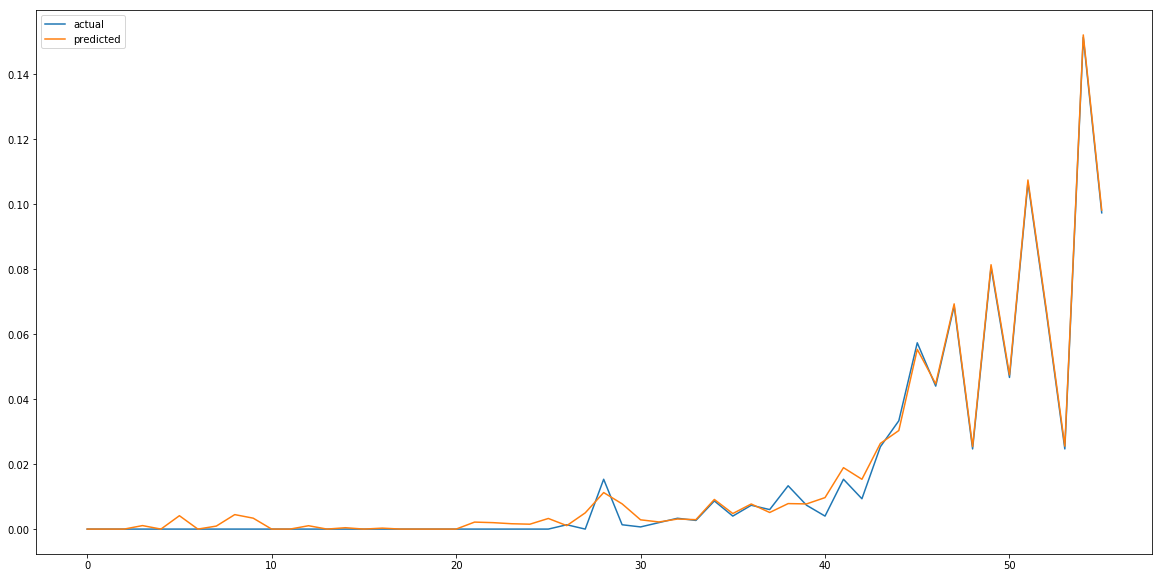

In [22]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pandas import DataFrame

def is_correct(value1, value2):
    correctness = False
    if value1 == value2:
        correctness = True
    elif abs(value1 - value2) <= 5:
        correctness = True
    elif value2 != 0 and value1/value2 <= 1.5 and value1/value2 >= (5/8):
        correctness = True
    return correctness

y_pred = model.predict(test_X, batch_size=batch_size)
i = 0

comparision_data = DataFrame()
correct = 0
total = 0
for x,y,actual in zip(test_X, y_pred,test_y):
    comparision_data.at[i,'Day']=i
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*1500)
    comparision_data.at[i,'Actual'] = (actual*1500)
    comparision_data.at[i,'State'] = 'Incorrect'
    if  is_correct(comparision_data.at[i,'Predicted'], comparision_data.at[i,'Actual']):
        correct+=1
        comparision_data.at[i,'State'] = 'Correct'
    total+=1
    i+=1

print(comparision_data)
print(correct/total)
plt.figure(figsize=(20,10))
#plt.plot(scaler.inverse_transform(scaled))
plt.plot(test_y,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()

In [23]:
# Test for April 1-15
df_test = pd.read_csv('../Timeseries-Data/test_data.csv')
columns_to_keep = ['Date','Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df_test = df_test.astype({"Population_Density":float ,"Lockdown": float,'Num_Cases':float,'Min_Temp':float,'Max_Temp':float})
df_test = df_test[columns_to_keep]

i=0
prev = 0.0
for ind in reversed(df_test.index):
    df_test.at[ind,'Min_Temp'] = (df_test.at[ind,'Min_Temp'] - temp_num)/temp_deno
    df_test.at[ind,'Max_Temp'] = (df_test.at[ind,'Max_Temp'] - temp_num)/temp_deno
    df_test.at[ind,'Lockdown'] = 1.0
    if ind != 0:
        df_test.at[ind,'Num_Cases'] -= df_test.at[ind-1,'Num_Cases']
df_test.at[0,'Num_Cases'] = 86
df_test['Num_Cases'] /= 1500

df_test = df_test.set_index('Date')

df_test

Population_Density  Min_Temp  Max_Temp  Lockdown  Num_Cases
Date                                                                  
3/25/2020                 1.0  0.687500  0.875000       1.0   0.057333
3/26/2020                 1.0  0.687500  0.833333       1.0   0.048667
3/27/2020                 1.0  0.625000  0.708333       1.0   0.102000
3/28/2020                 1.0  0.625000  0.833333       1.0   0.090667
3/29/2020                 1.0  0.687500  0.833333       1.0   0.080000
3/30/2020                 1.0  0.687500  0.833333       1.0   0.124667
3/31/2020                 1.0  0.666667  0.854167       1.0   0.206000
4/1/2020                  1.0  0.541667  0.770833       1.0   0.282667
4/2/2020                  1.0  0.583333  0.791667       1.0   0.324000
4/3/2020                  1.0  0.625000  0.791667       1.0   0.373333
4/4/2020                  1.0  0.625000  0.770833       1.0   0.386000
4/5/2020                  1.0  0.562500  0.770833       1.0   0.403333
4/6/2020                  1.0  0.416667  0.625000       1.0   0.326000
4/7/2020                  1.0  0.479167  0.645833       1.0   0.382000
4/8/2020                  1.0  0.604167  0.729167       1.0   0.376667
4/9/2020                  1.0  0.562500  0.729167       1.0   0.542000
4/10/2020                 1.0  0.562500  0.770833       1.0   0.580667
4/11/2020                 1.0  0.541667  0.729167       1.0   0.569333
4/12/2020                 1.0  0.583333  0.770833       1.0   0.000000
4/13/2020                 1.0  0.625000  0.791667       1.0   0.364000
4/14/2020                 1.0  0.541667  0.708333       1.0   0.666667
4/15/2020                 1.0  0.541667  0.729167       1.0   0.666667

In [24]:
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df_testing = df_test
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

new_df_test = series_to_supervised(df_testing,7,1,True)
# new_df.drop(new_df.columns[[-2,-3,-4,-5]], axis=1, inplace=True)
new_df_test

var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var1(t-6)  \
Date                                                                          
4/1/2020         1.0   0.687500   0.875000        1.0   0.057333        1.0   
4/2/2020         1.0   0.687500   0.833333        1.0   0.048667        1.0   
4/3/2020         1.0   0.625000   0.708333        1.0   0.102000        1.0   
4/4/2020         1.0   0.625000   0.833333        1.0   0.090667        1.0   
4/5/2020         1.0   0.687500   0.833333        1.0   0.080000        1.0   
4/6/2020         1.0   0.687500   0.833333        1.0   0.124667        1.0   
4/7/2020         1.0   0.666667   0.854167        1.0   0.206000        1.0   
4/8/2020         1.0   0.541667   0.770833        1.0   0.282667        1.0   
4/9/2020         1.0   0.583333   0.791667        1.0   0.324000        1.0   
4/10/2020        1.0   0.625000   0.791667        1.0   0.373333        1.0   
4/11/2020        1.0   0.625000   0.770833        1.0   0.386000        1.0   
4/12/2020        1.0   0.562500   0.770833        1.0   0.403333        1.0   
4/13/2020        1.0   0.416667   0.625000        1.0   0.326000        1.0   
4/14/2020        1.0   0.479167   0.645833        1.0   0.382000        1.0   
4/15/2020        1.0   0.604167   0.729167        1.0   0.376667        1.0   

           var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  ...  var1(t-1)  \
Date                                                   ...              
4/1/2020    0.687500   0.833333        1.0   0.048667  ...        1.0   
4/2/2020    0.625000   0.708333        1.0   0.102000  ...        1.0   
4/3/2020    0.625000   0.833333        1.0   0.090667  ...        1.0   
4/4/2020    0.687500   0.833333        1.0   0.080000  ...        1.0   
4/5/2020    0.687500   0.833333        1.0   0.124667  ...        1.0   
4/6/2020    0.666667   0.854167        1.0   0.206000  ...        1.0   
4/7/2020    0.541667   0.770833        1.0   0.282667  ...        1.0   
4/8/2020    0.583333   0.791667        1.0   0.324000  ...        1.0   
4/9/2020    0.625000   0.791667        1.0   0.373333  ...        1.0   
4/10/2020   0.625000   0.770833        1.0   0.386000  ...        1.0   
4/11/2020   0.562500   0.770833        1.0   0.403333  ...        1.0   
4/12/2020   0.416667   0.625000        1.0   0.326000  ...        1.0   
4/13/2020   0.479167   0.645833        1.0   0.382000  ...        1.0   
4/14/2020   0.604167   0.729167        1.0   0.376667  ...        1.0   
4/15/2020   0.562500   0.729167        1.0   0.542000  ...        1.0   

           var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var1(t)   var2(t)  \
Date                                                                       
4/1/2020    0.666667   0.854167        1.0   0.206000      1.0  0.541667   
4/2/2020    0.541667   0.770833        1.0   0.282667      1.0  0.583333   
4/3/2020    0.583333   0.791667        1.0   0.324000      1.0  0.625000   
4/4/2020    0.625000   0.791667        1.0   0.373333      1.0  0.625000   
4/5/2020    0.625000   0.770833        1.0   0.386000      1.0  0.562500   
4/6/2020    0.562500   0.770833        1.0   0.403333      1.0  0.416667   
4/7/2020    0.416667   0.625000        1.0   0.326000      1.0  0.479167   
4/8/2020    0.479167   0.645833        1.0   0.382000      1.0  0.604167   
4/9/2020    0.604167   0.729167        1.0   0.376667      1.0  0.562500   
4/10/2020   0.562500   0.729167        1.0   0.542000      1.0  0.562500   
4/11/2020   0.562500   0.770833        1.0   0.580667      1.0  0.541667   
4/12/2020   0.541667   0.729167        1.0   0.569333      1.0  0.583333   
4/13/2020   0.583333   0.770833        1.0   0.000000      1.0  0.625000   
4/14/2020   0.625000   0.791667        1.0   0.364000      1.0  0.541667   
4/15/2020   0.541667   0.708333        1.0   0.666667      1.0  0.541667   

            var3(t)  var4(t)   var5(t)  
Date                                    
4/1/2020   0.770833      1.0  0.282667  
4/2/2020 

         Day  Predicted  Actual      State
0    1 April      179.0   424.0  Incorrect
1    2 April      304.0   486.0    Correct
2    3 April      380.0   560.0    Correct
3    4 April      572.0   579.0    Correct
4    5 April      670.0   605.0    Correct
5    6 April      679.0   489.0    Correct
6    7 April      771.0   573.0    Correct
7    8 April      700.0   565.0    Correct
8    9 April      767.0   813.0    Correct
9   10 April      968.0   871.0    Correct
10  11 April      827.0   854.0    Correct
11  12 April      858.0     0.0  Incorrect
12  13 April     1183.0   546.0  Incorrect
13  14 April      626.0  1000.0    Correct
14  15 April      333.0  1000.0  Incorrect
0.7333333333333333


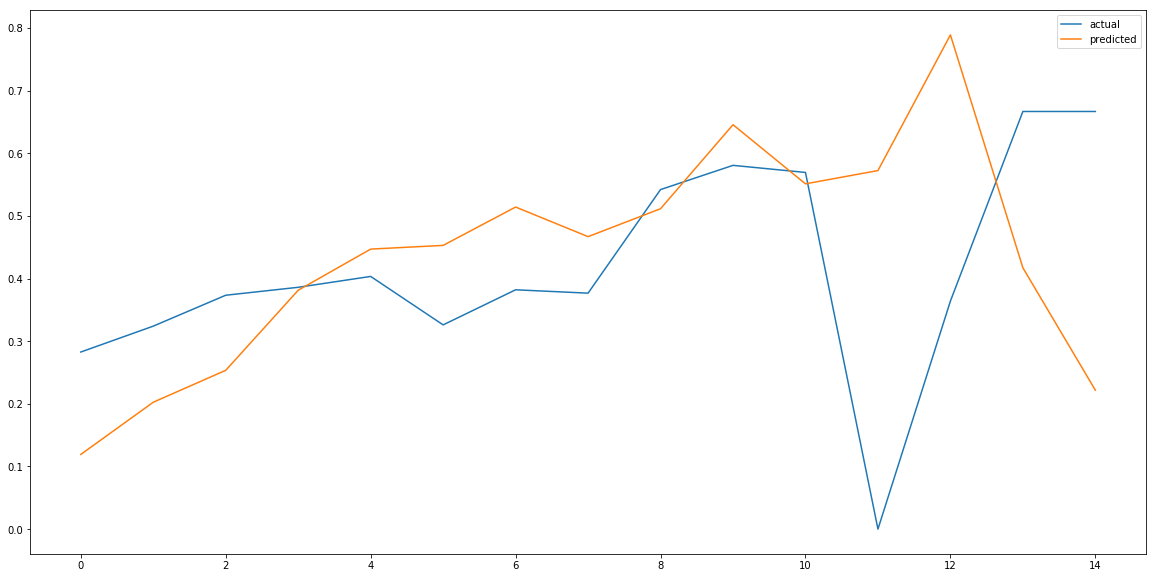

In [25]:
values = new_df_test.values
test_x, test_y = values[:, :-1], values[:, -1]
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
y_pred = model.predict(test_X, batch_size=batch_size)
i = 0

comparision_data = DataFrame()
correct = 0
total = 0
for x,y,actual in zip(test_X, y_pred,test_y):
    comparision_data.at[i,'Day']=str(i+1)+' April'
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*1500)
    comparision_data.at[i,'Actual'] = actual*1500
    comparision_data.at[i,'State'] = 'Incorrect'
    if is_correct(comparision_data.at[i,'Predicted'],comparision_data.at[i,'Actual']):
        correct+=1
        comparision_data.at[i,'State'] = 'Correct'
    total+=1
    i+=1

print(comparision_data)
print(correct/total)
plt.figure(figsize=(20,10))
#plt.plot(scaler.inverse_transform(scaled))
plt.plot(test_y,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()